## This notebook contains all the preprocessing , visualization, training, testing model and model evalution.

## I have used RandomForestRegressor in the final notebook because it performed far better than other models. Detailed comparison is in the doc file.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('TASK-ML-INTERN.CSV')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [4]:
df.head(10)

hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   
5  imagoai_corn_5  0.403326  0.399065  0.392410  0.393671  0.375779  0.369329   
6  imagoai_corn_6  0.369181  0.398294  0.382156  0.355960  0.357118  0.347124   
7  imagoai_corn_7  0.386569  0.408519  0.394123  0.394363  0.390526  0.379103   
8  imagoai_corn_8  0.439140  0.432694  0.423883  0.421475  0.411783  0.407528   
9  imagoai_corn_9  0.439308  0.430286  0.419468  0.402224  0.401832  0.399487   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   
5  0.366484  0.379903  0.329242  ...  0.703310  0.698116  0.695797  0.697344   
6  0.347773  0.323305  0.346832  ...  0.673438  0.658581  0.676906  0.671280   
7  0.383645  0.370810  0.361250  ...  0.819083  0.807260  0.786323  0.794155   
8  0.385764  0.389579  0.367873  ...  0.706239  0.705595  0.718282  0.707036   
9  0.362857  0.351145  0.351157  ...  0.700342  0.705466  0.705582  0.688853   

        443       444       445       446       447  vomitoxin_ppb  
0  0.696691  0.692793  0.711369  0.697679  0.704520         1100.0  
1  0.701012  0.677418  0.696921  0.696544  0.689054         1000.0  
2  0.676591  0.655951  0.658945  0.670989  0.665176         1300.0  
3  0.751437  0.738497  0.742446  0.754657  0.733474         1300.0  
4  0.762473  0.744012  0.775486  0.760431  0.751988          220.0  
5  0.694916  0.682640  0.675877  0.695633  0.694361         1400.0  
6  0.661223  0.659227  0.662984  0.674590  0.667481         1100.0  
7  0.784517  0.798741  0.800099  0.810282  0.770466          500.0  
8  0.712581  0.720497  0.701015  0.704241  0.731010          100.0  
9  0.715501  0.706368  0.690124  0.698683  0.689356         1100.0  

[10 rows x 450 columns]

In [5]:
missing_val = df.isnull().sum().sum()
missing_val

0

In [6]:
spectral_data = df.iloc[:, 1:-1]


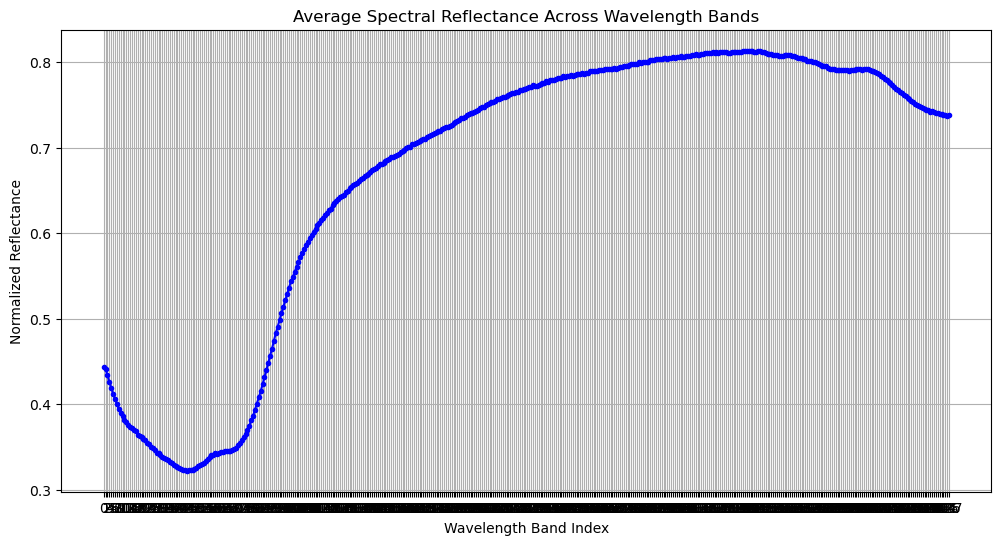

In [74]:
avg_spectral_reflectance = spectral_data.mean(axis=0)

plt.figure(figsize=(12, 6))
plt.plot(avg_spectral_reflectance, marker='o', linestyle='-', color='b', markersize=3)
plt.xlabel("Wavelength Band Index")
plt.ylabel("Normalized Reflectance")
plt.title("Average Spectral Reflectance Across Wavelength Bands")
plt.grid(True)
plt.show()

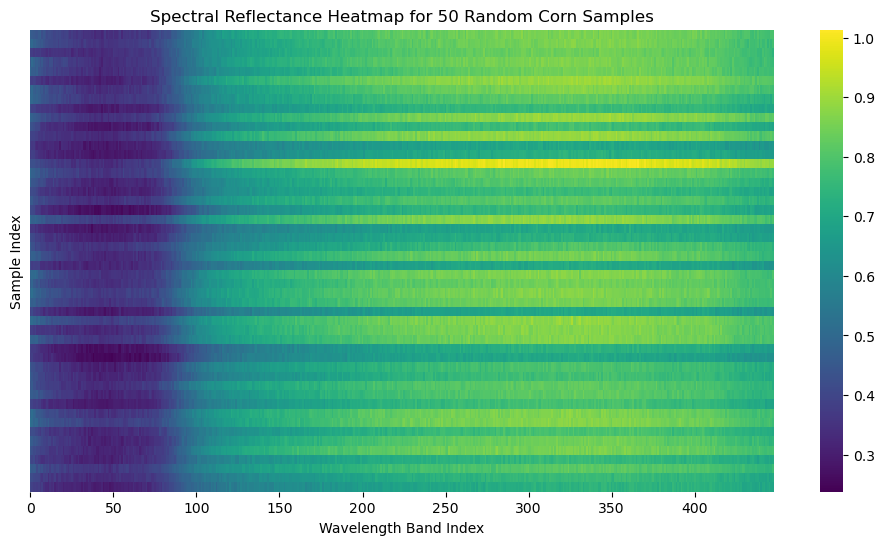

In [8]:
subset_spectral_data = spectral_data.sample(n=50, random_state=42)

plt.figure(figsize=(12, 6))
sns.heatmap(subset_spectral_data, cmap="viridis", xticklabels=50, yticklabels=False)
plt.xlabel("Wavelength Band Index")
plt.ylabel("Sample Index")
plt.title("Spectral Reflectance Heatmap for 50 Random Corn Samples")
plt.show()

In [9]:
numeric_cols = df.select_dtypes(include=[np.number])

In [10]:
numeric_cols.head()

0         1         2         3         4         5         6  \
0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390  0.355226   
1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634  0.375671   
2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709  0.333882   
3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824  0.458194   
4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152  0.458229   

          7         8         9  ...       439       440       441       442  \
0  0.343350  0.344837  0.361567  ...  0.710280  0.717482  0.715078  0.705379   
1  0.363689  0.373883  0.359674  ...  0.684011  0.697271  0.701995  0.696077   
2  0.330841  0.328925  0.323854  ...  0.683054  0.669286  0.663179  0.676165   
3  0.427737  0.415360  0.413106  ...  0.742782  0.730801  0.736787  0.730044   
4  0.440782  0.426193  0.430482  ...  0.770227  0.773013  0.761431  0.763488   

        443       444       445       446       447  vomitoxin_ppb  
0  0.696691  0.692793  0.711369  0.697679  0.704520         1100.0  
1  0.701012  0.677418  0.696921  0.696544  0.689054         1000.0  
2  0.676591  0.655951  0.658945  0.670989  0.665176         1300.0  
3  0.751437  0.738497  0.742446  0.754657  0.733474         1300.0  
4  0.762473  0.744012  0.775486  0.760431  0.751988          220.0  

[5 rows x 449 columns]

## Outlier Detection

In [11]:
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

In [12]:
import seaborn as sns

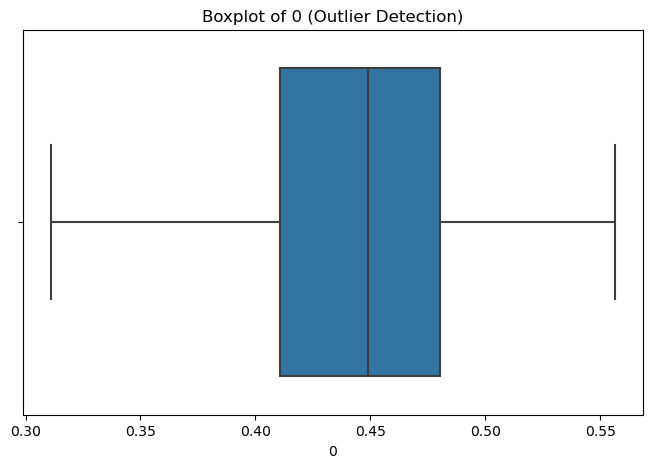

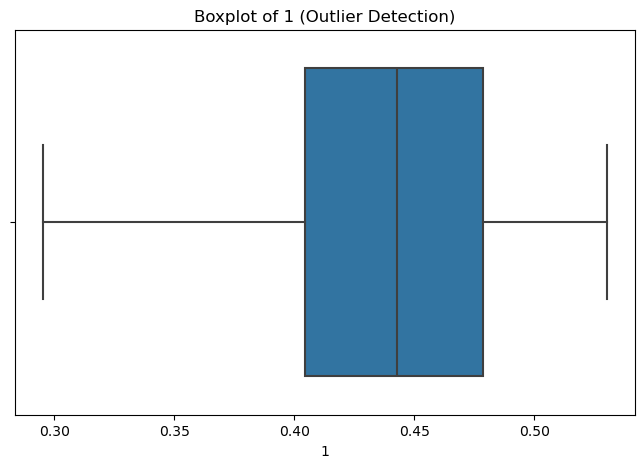

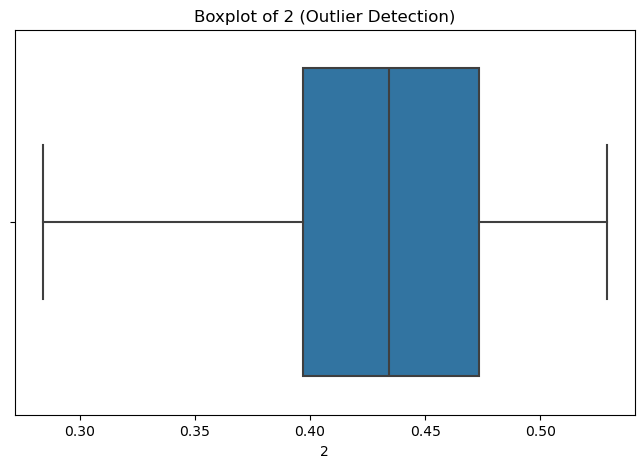

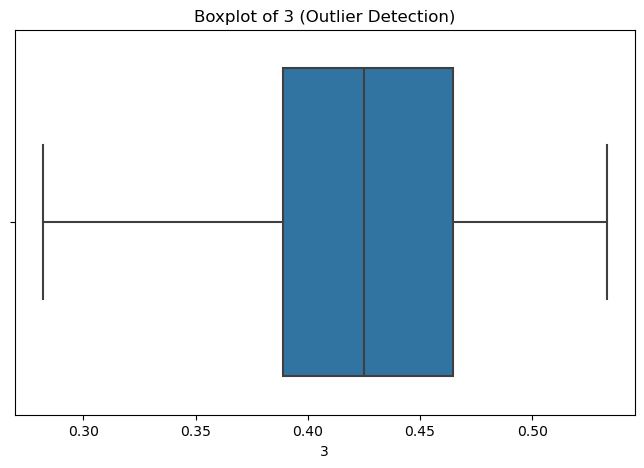

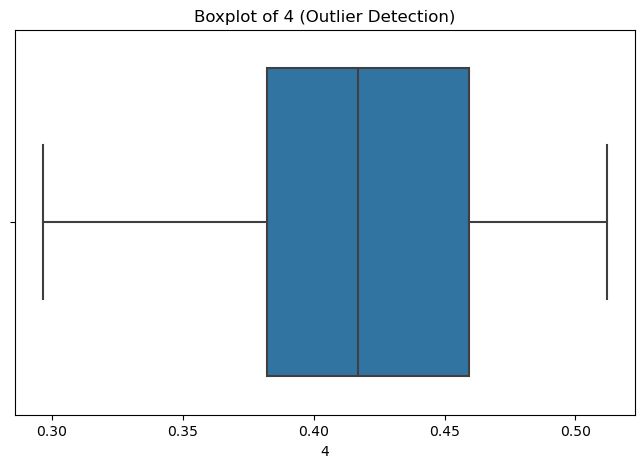

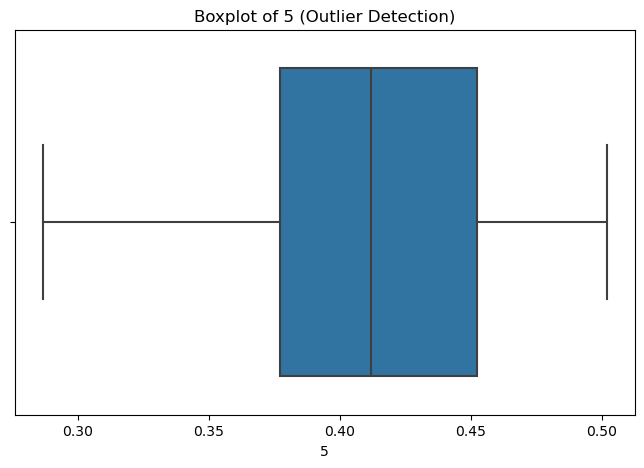

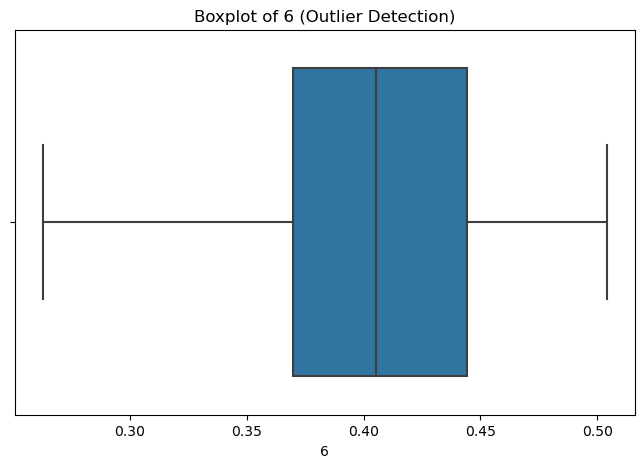

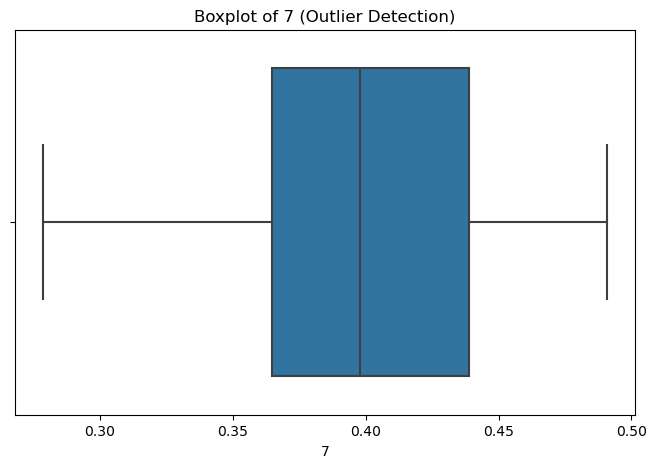

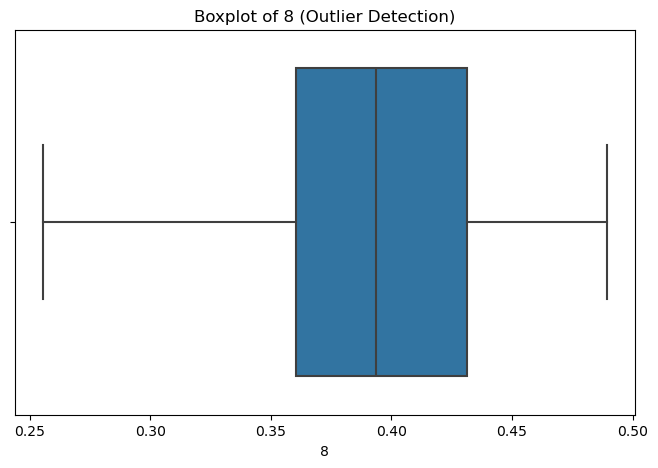

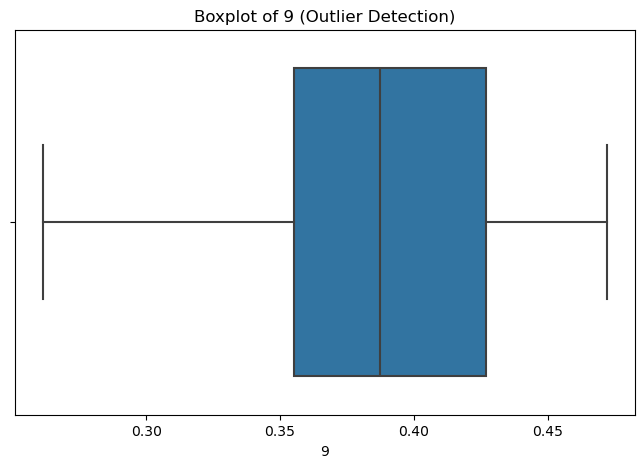

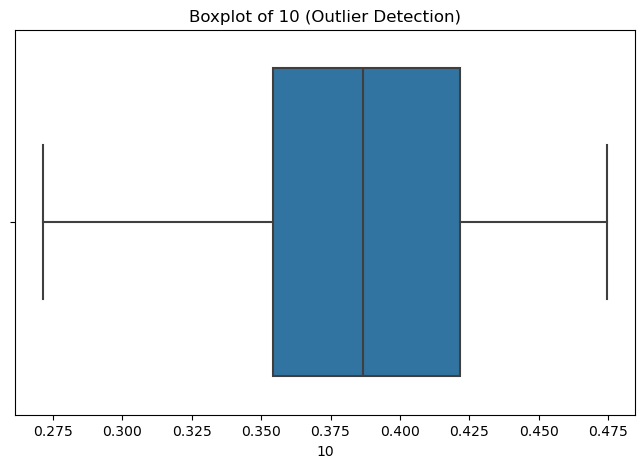

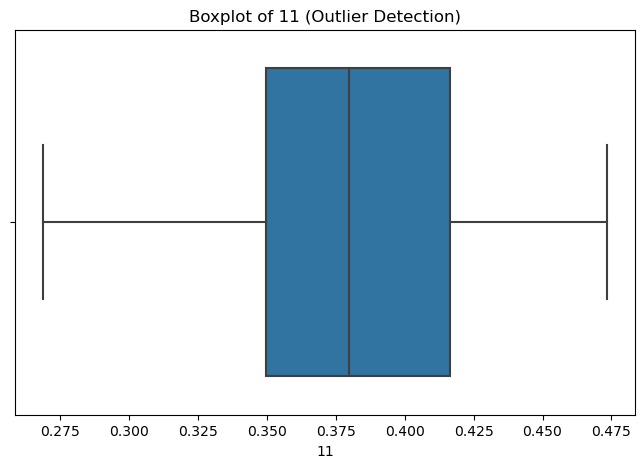

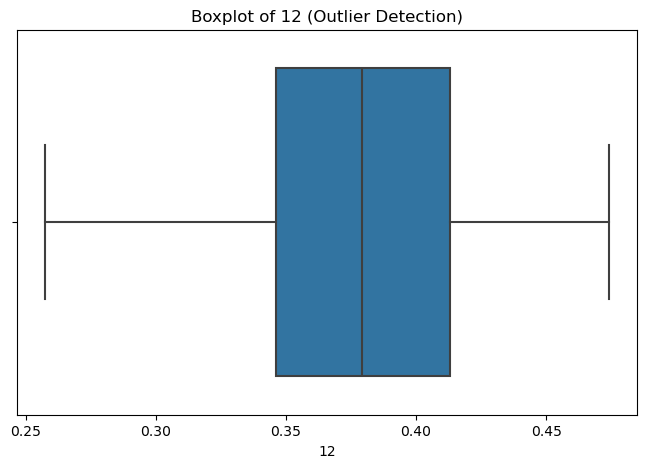

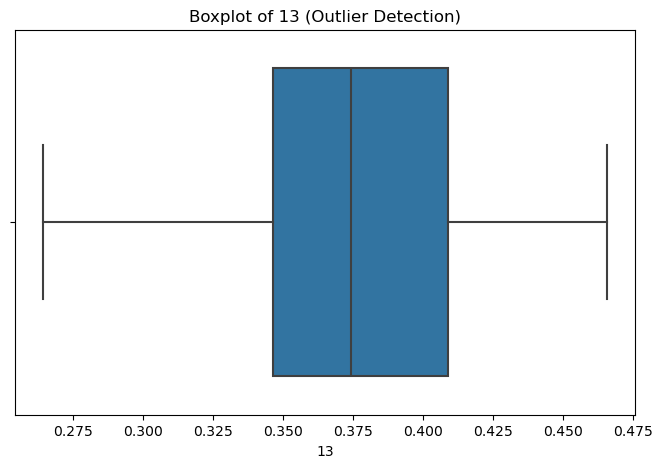

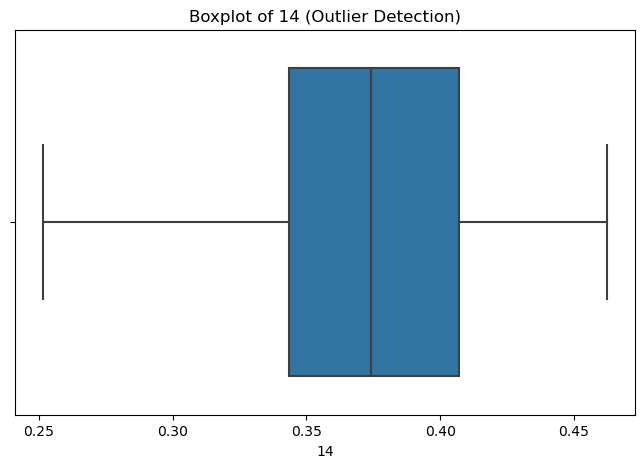

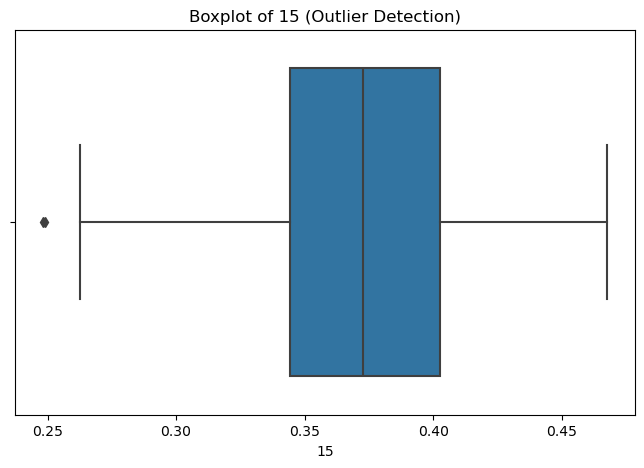

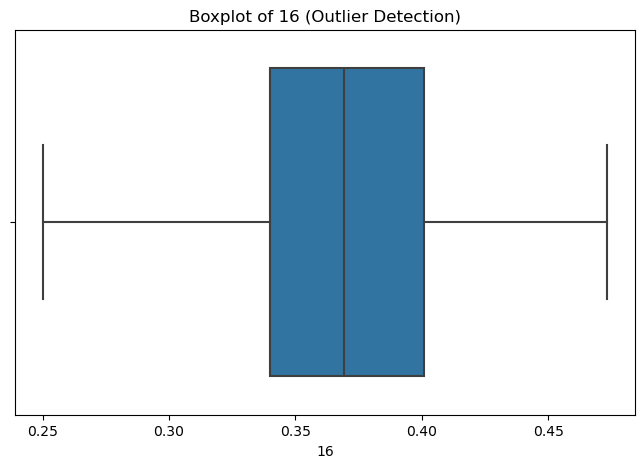

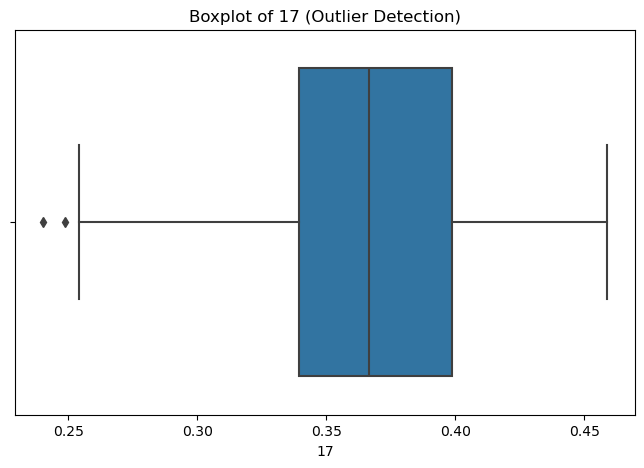

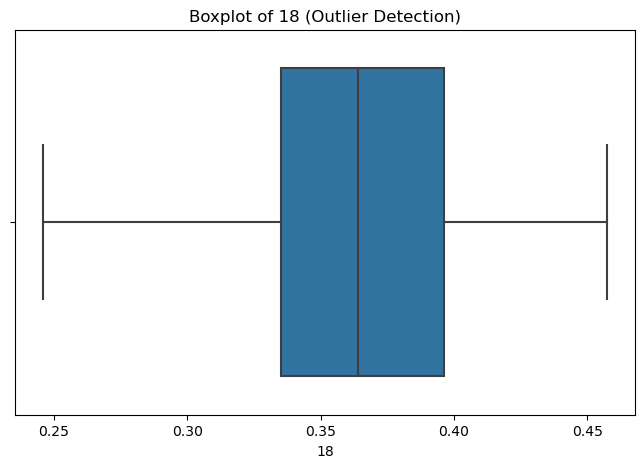

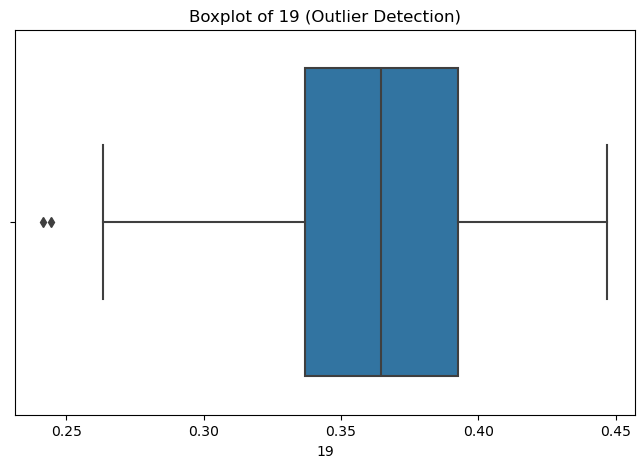

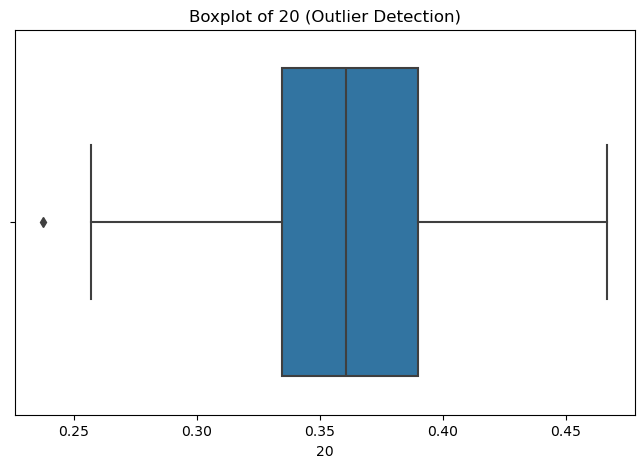

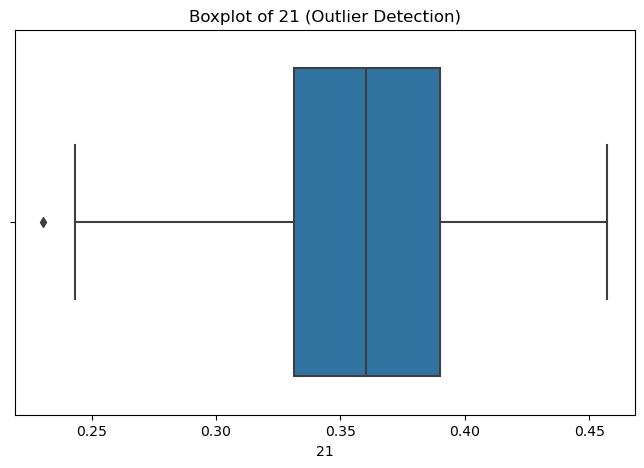

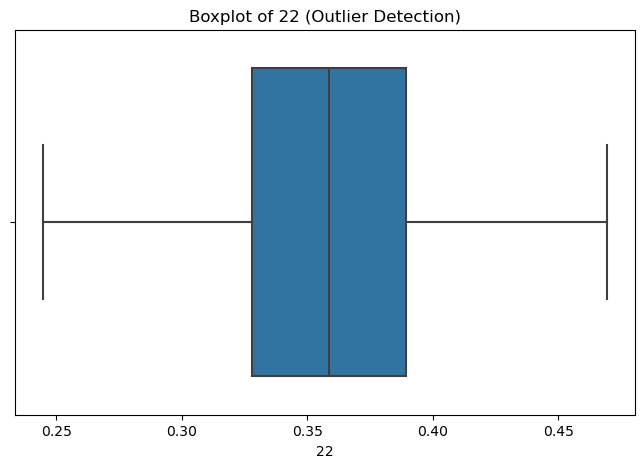

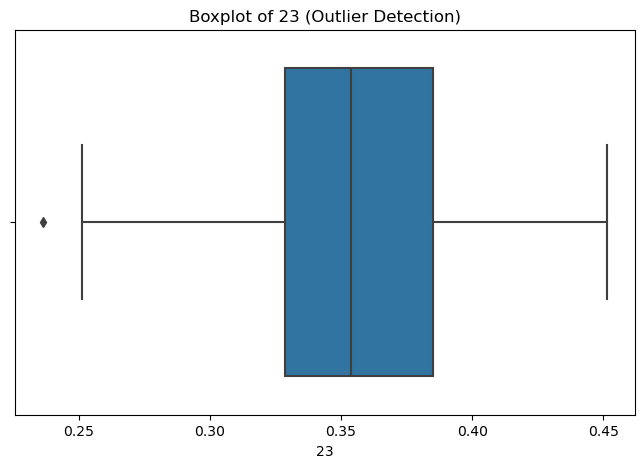

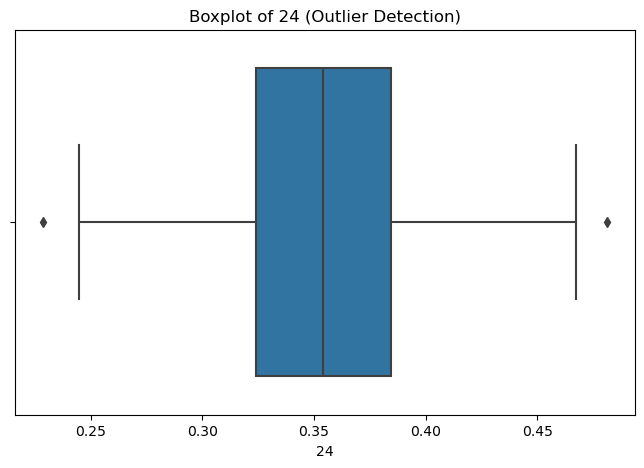

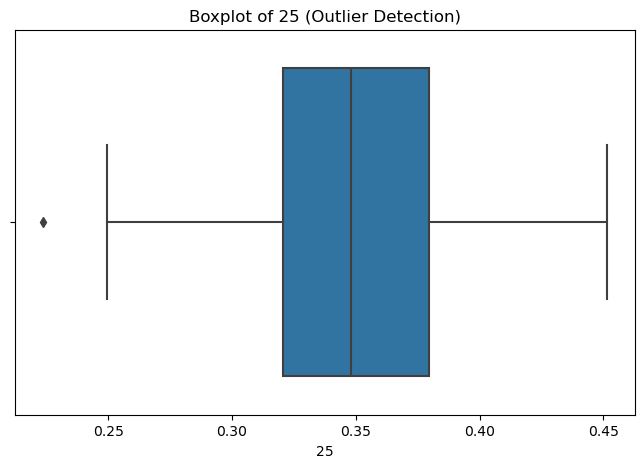

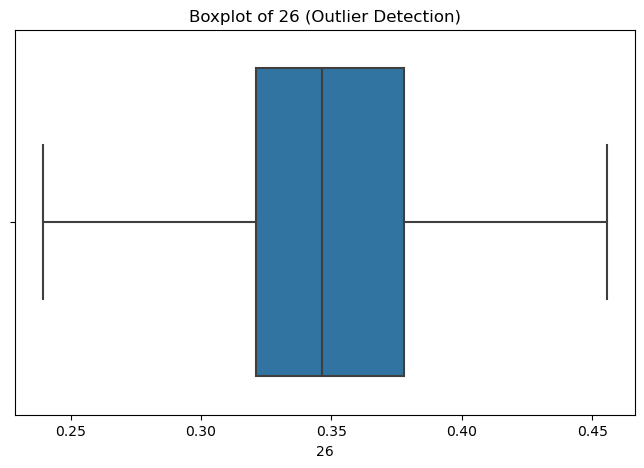

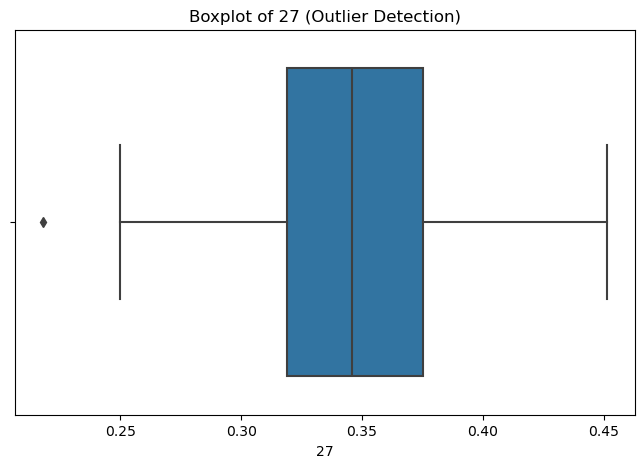

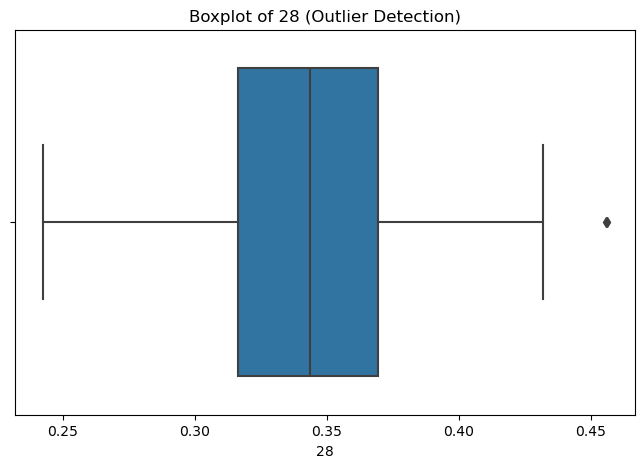

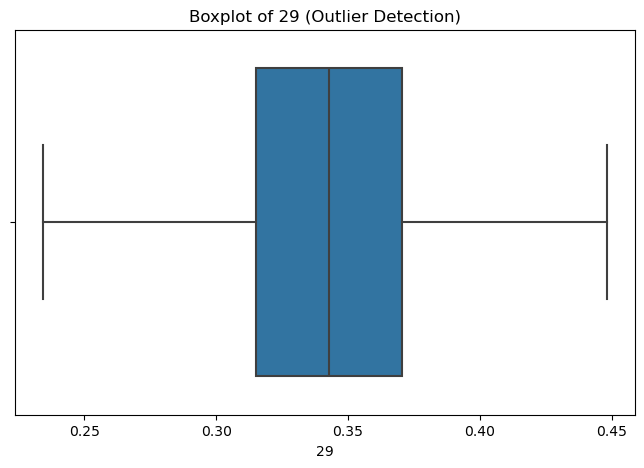

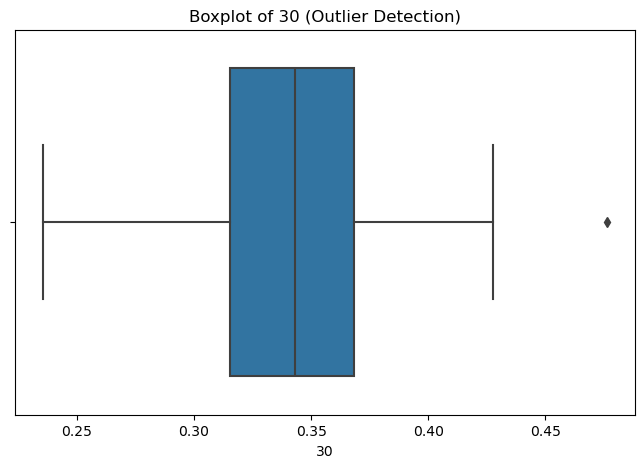

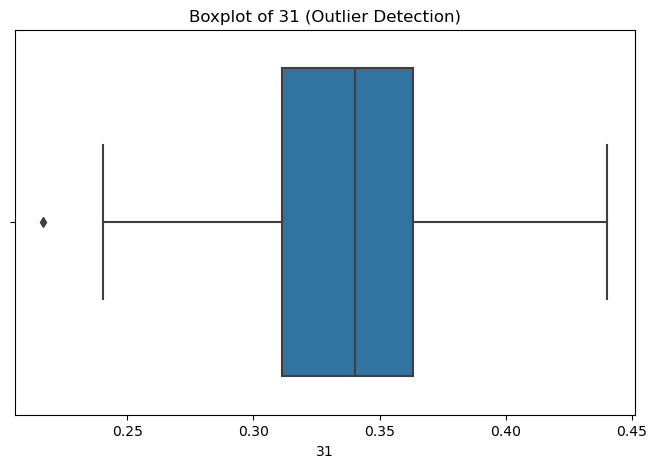

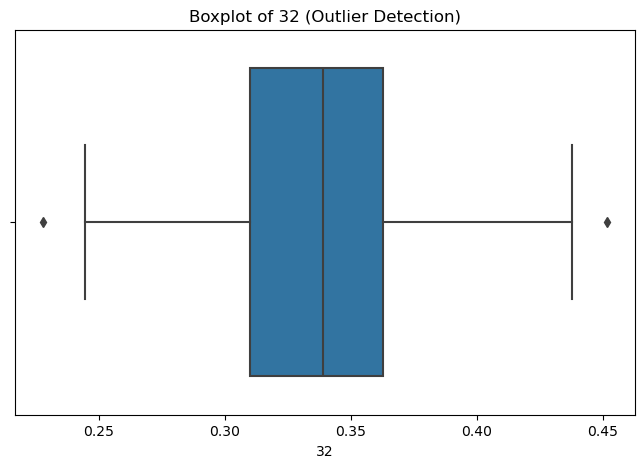

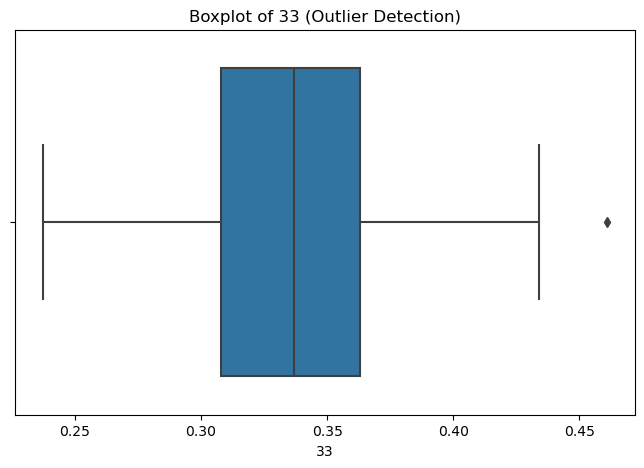

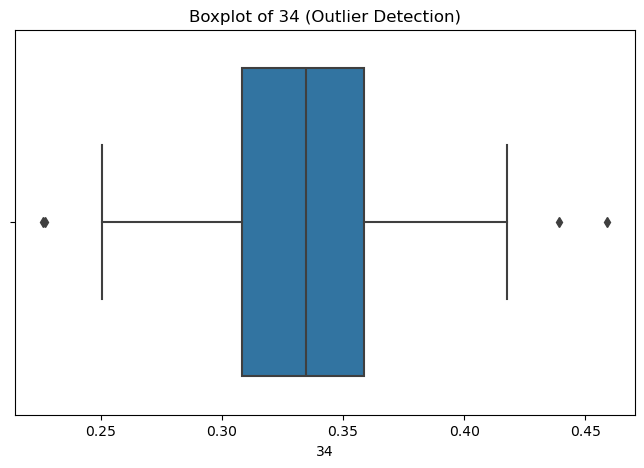

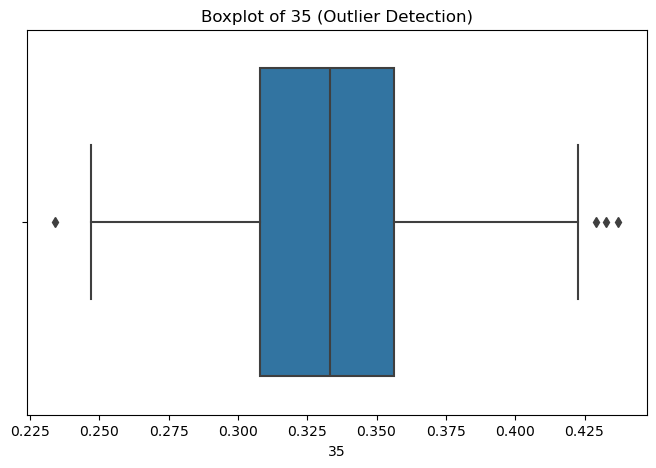

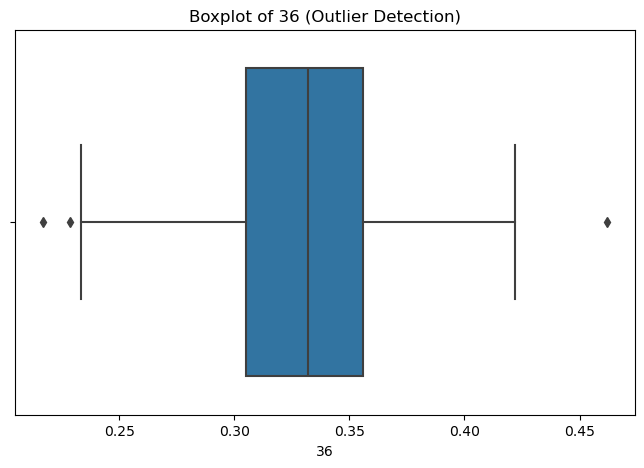

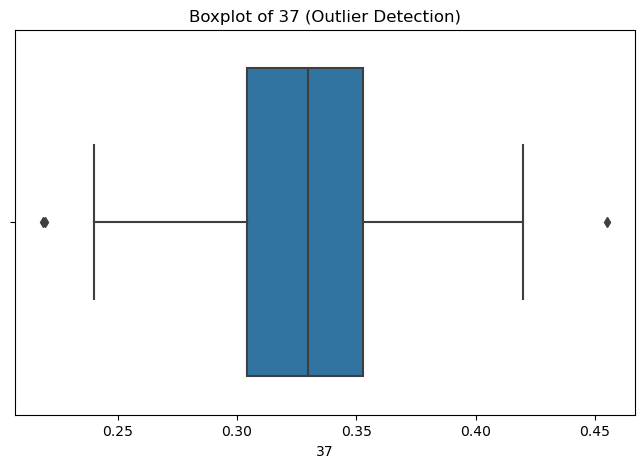

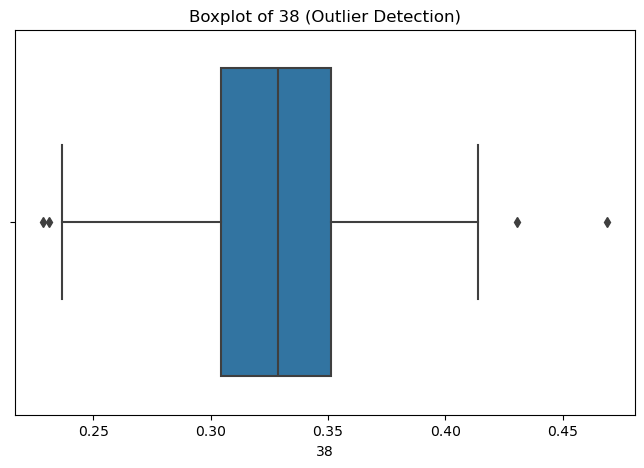

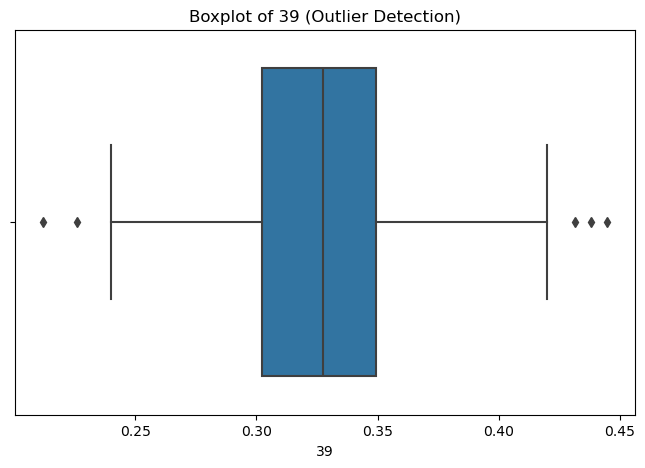

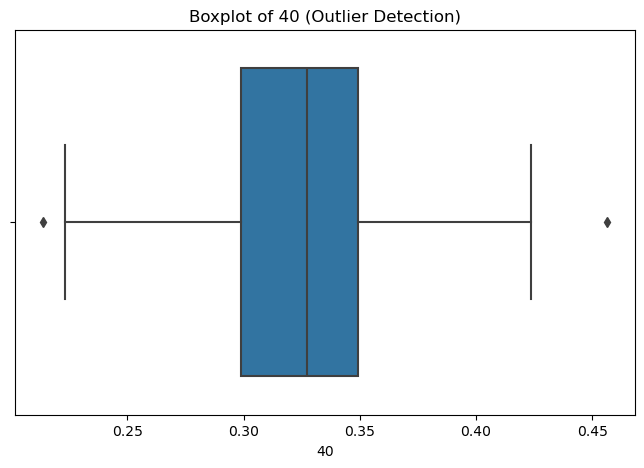

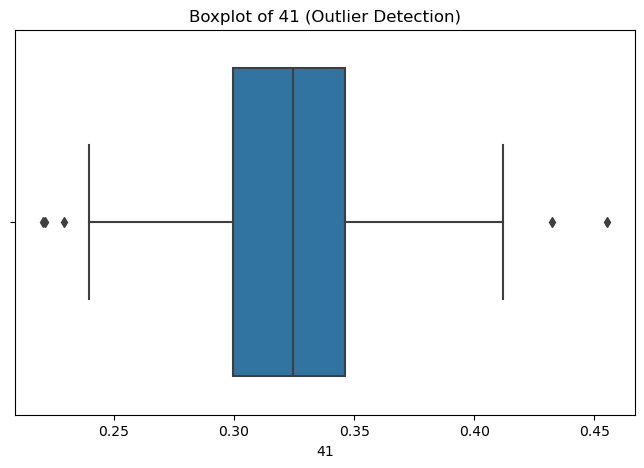

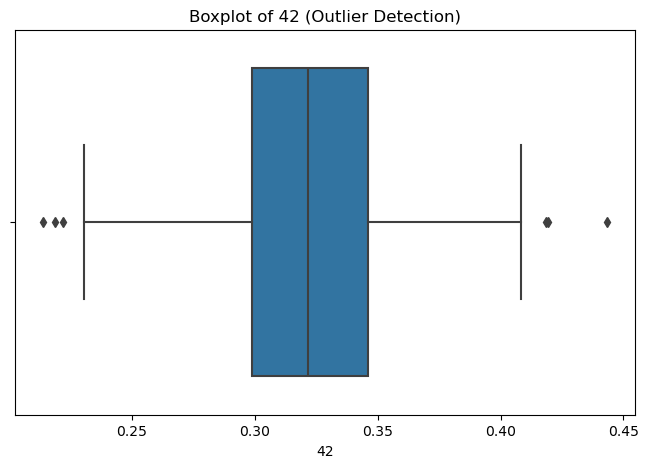

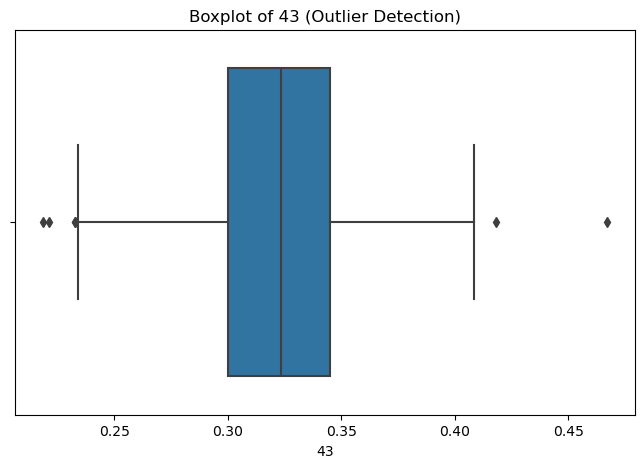

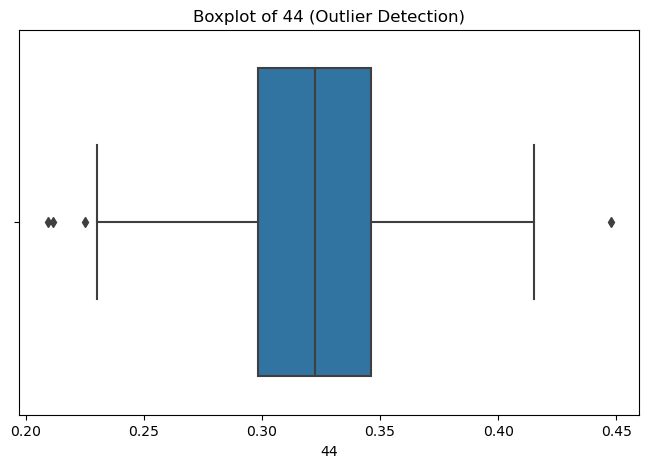

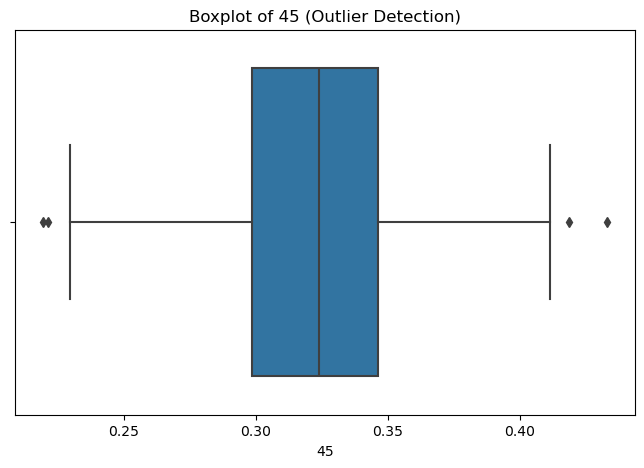

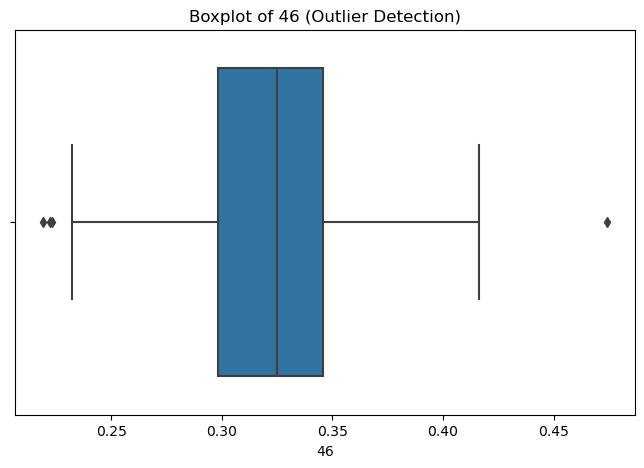

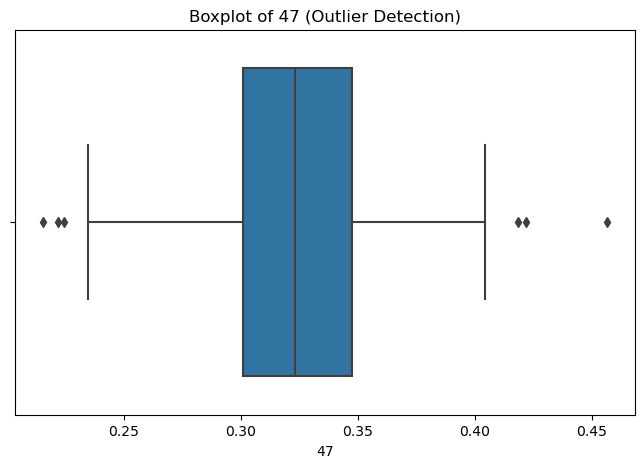

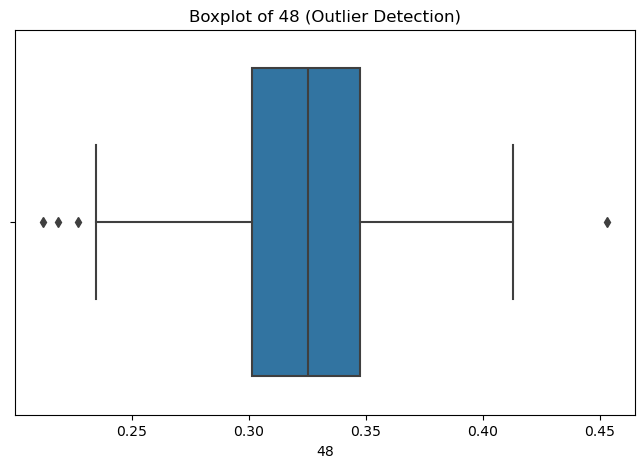

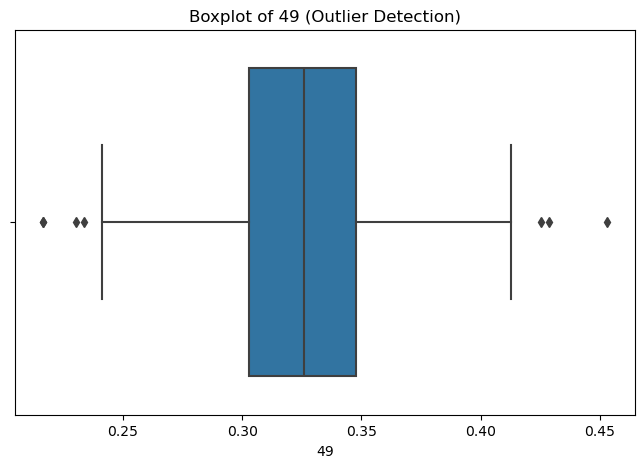

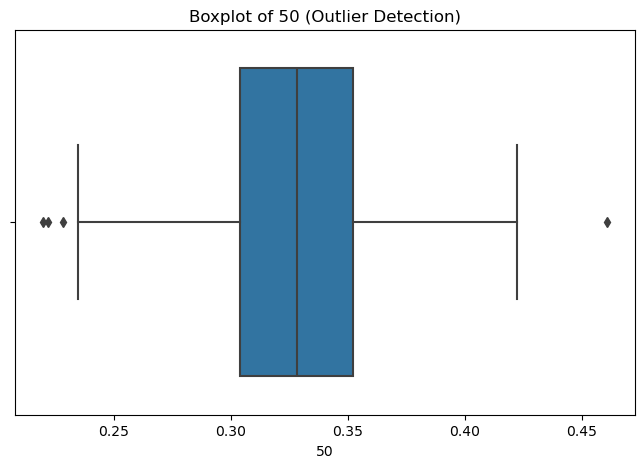

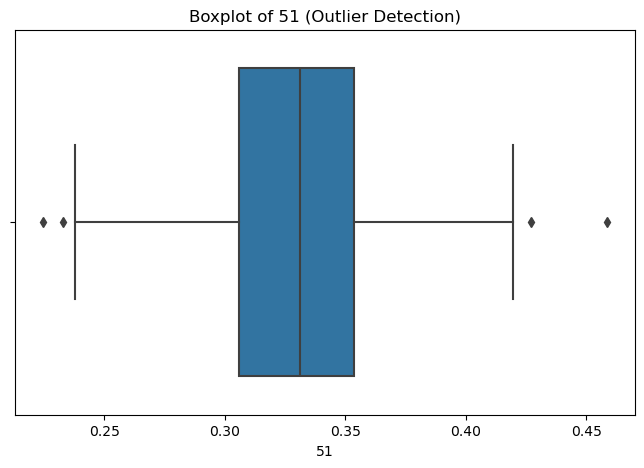

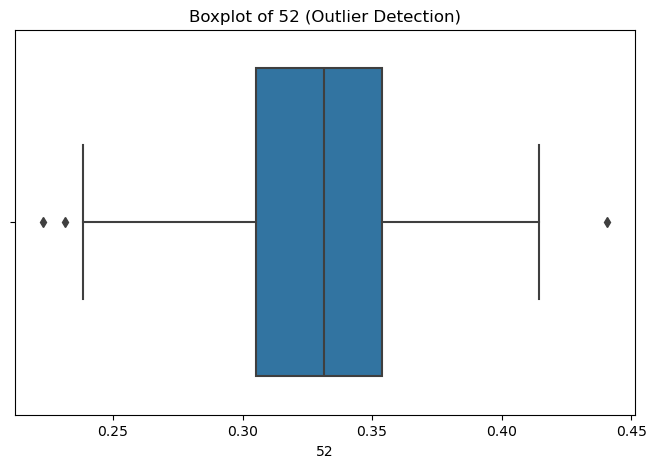

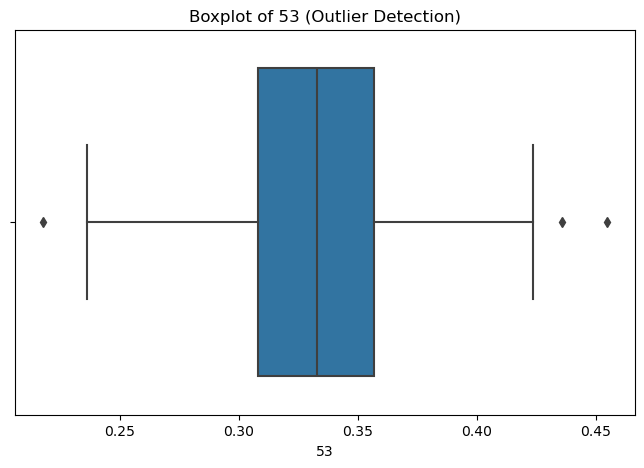

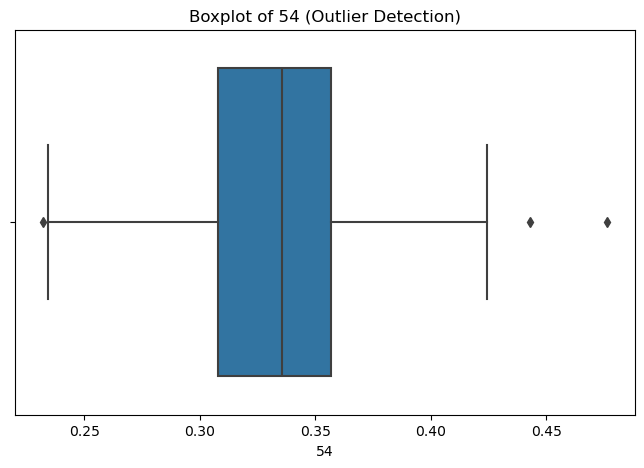

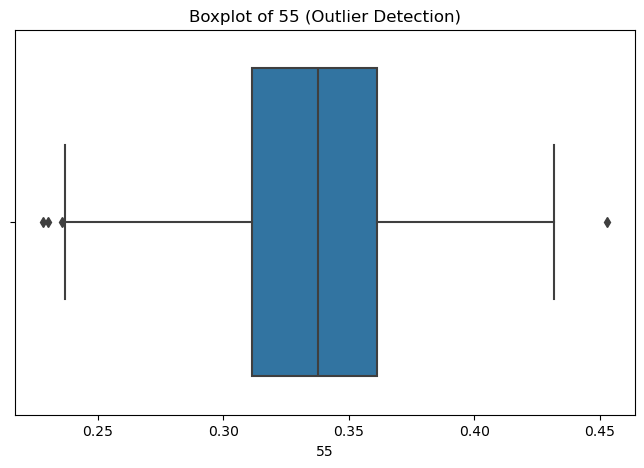

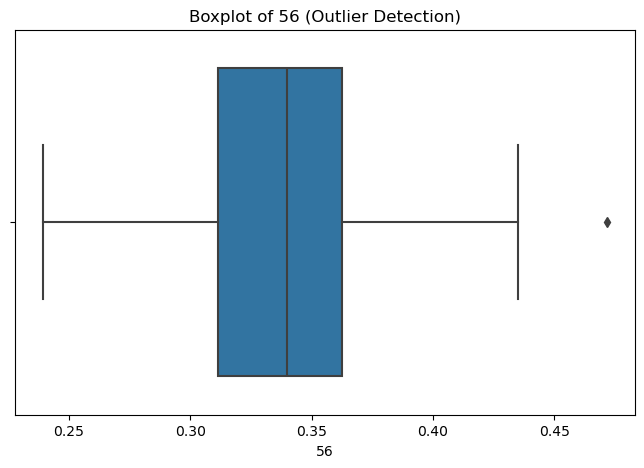

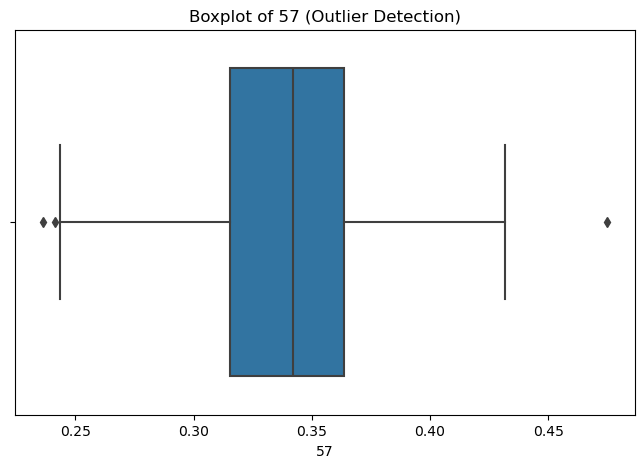

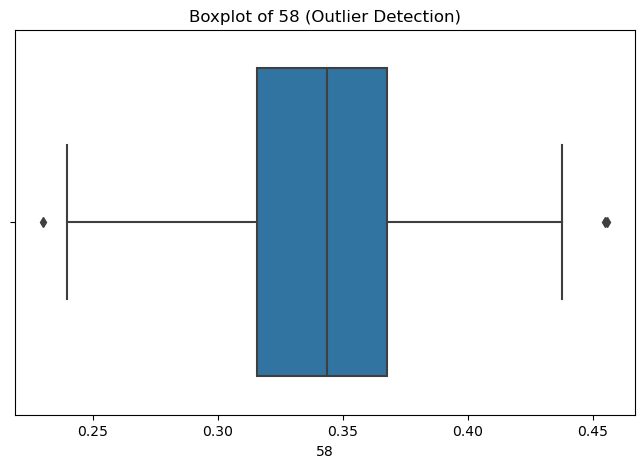

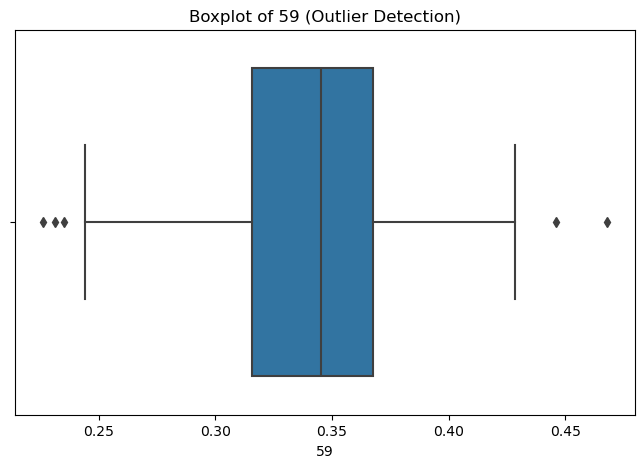

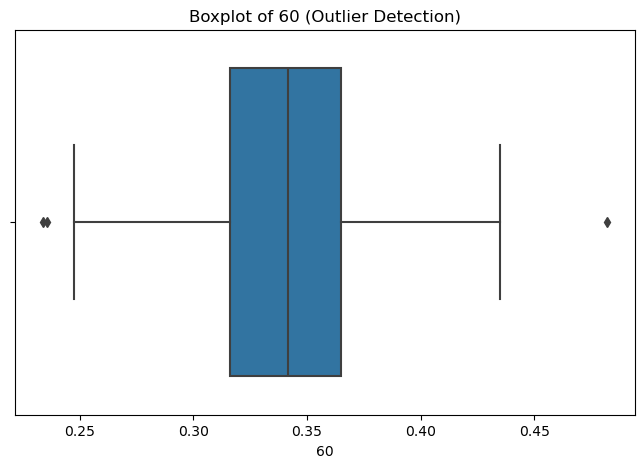

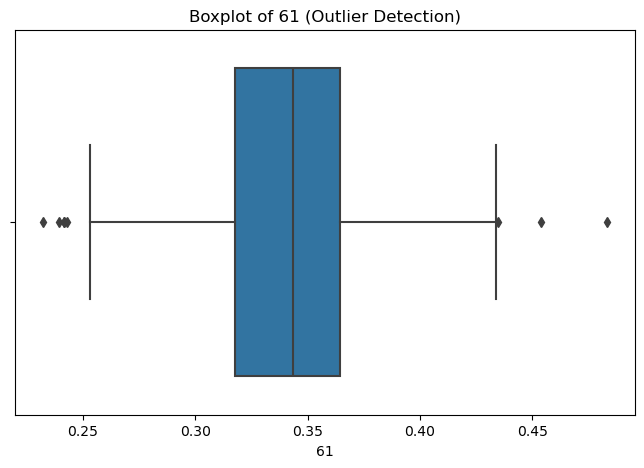

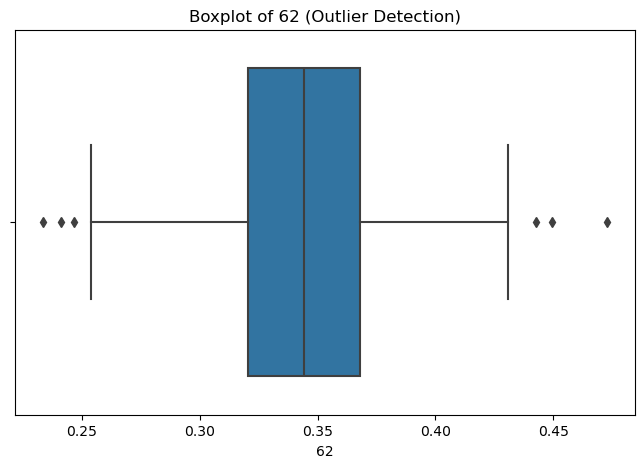

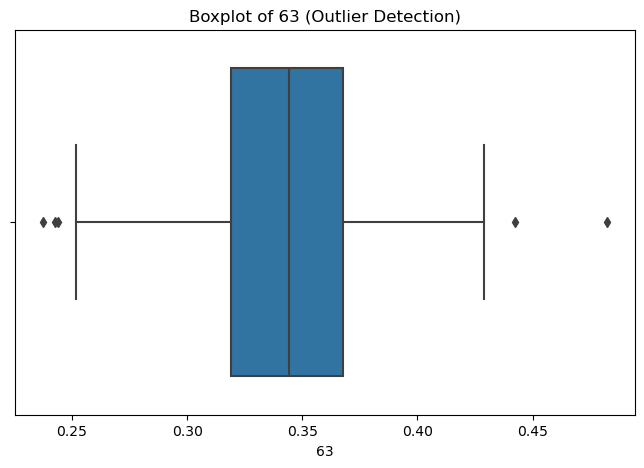

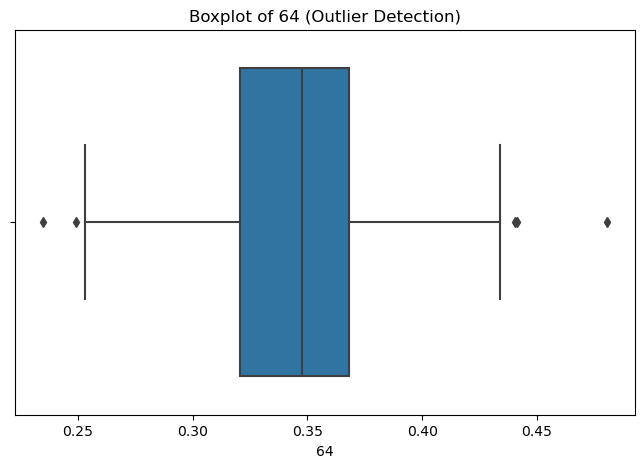

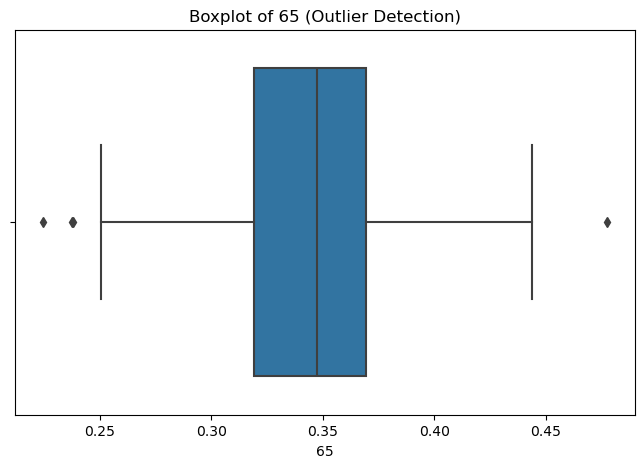

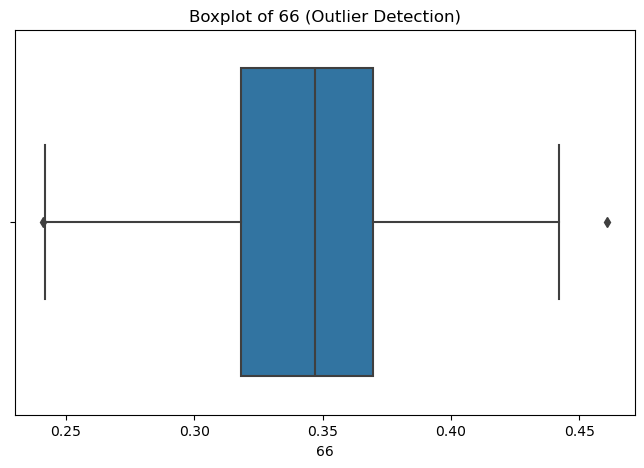

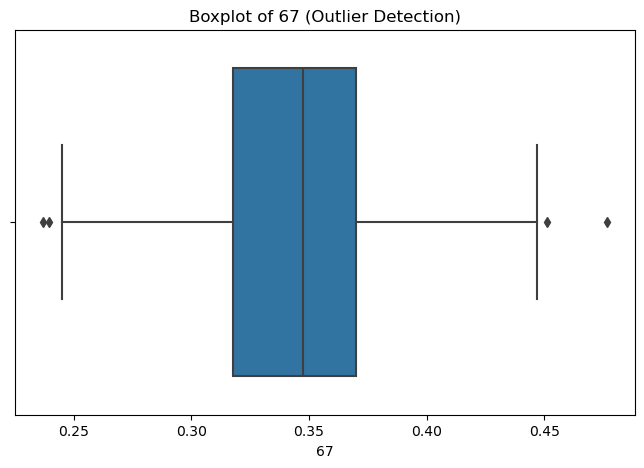

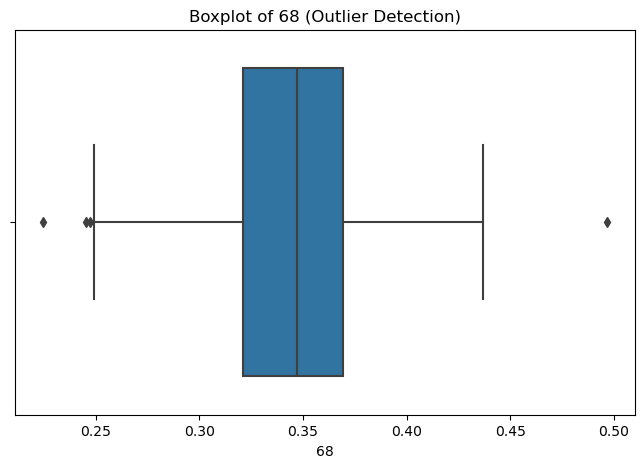

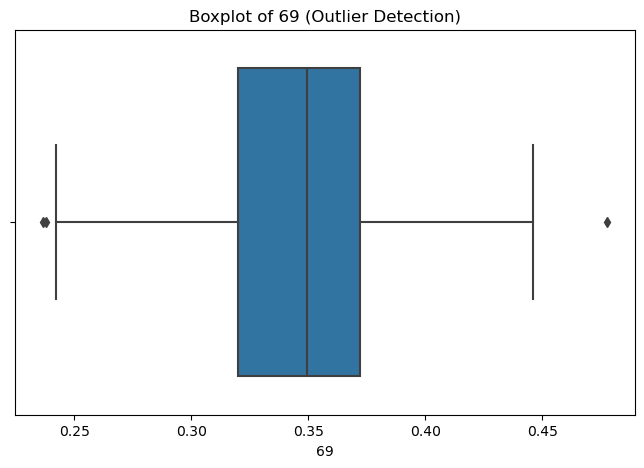

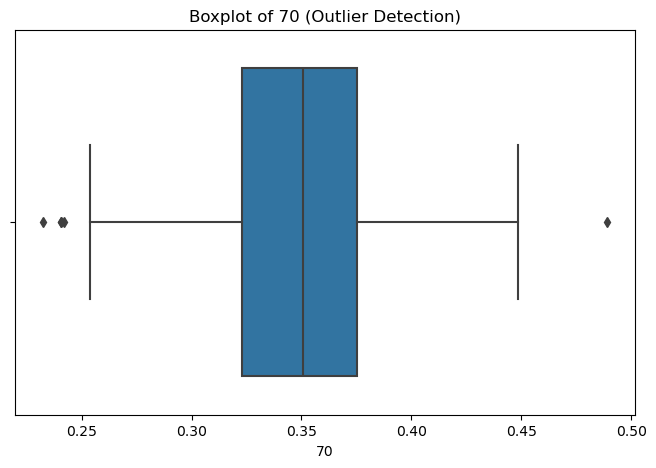

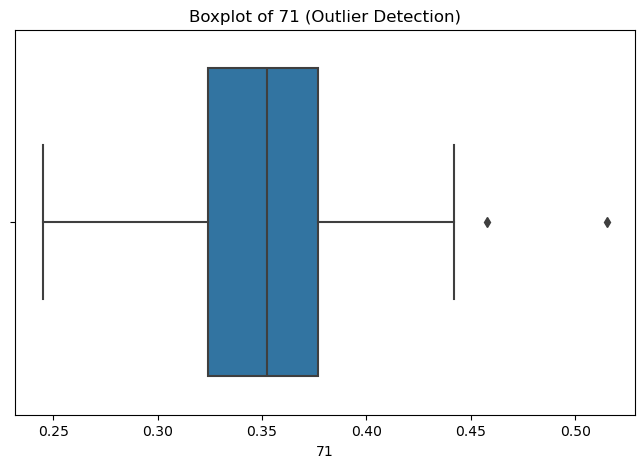

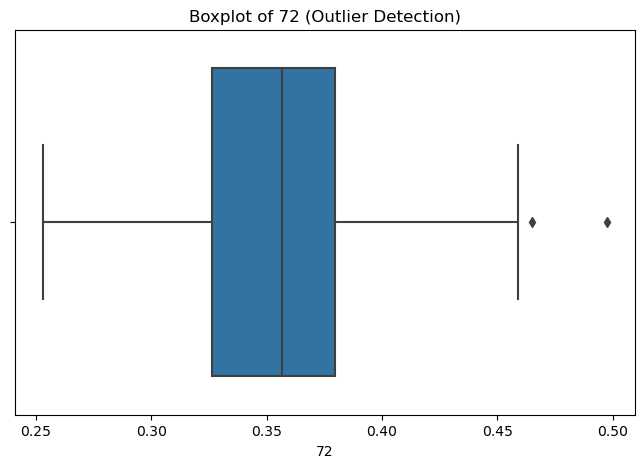

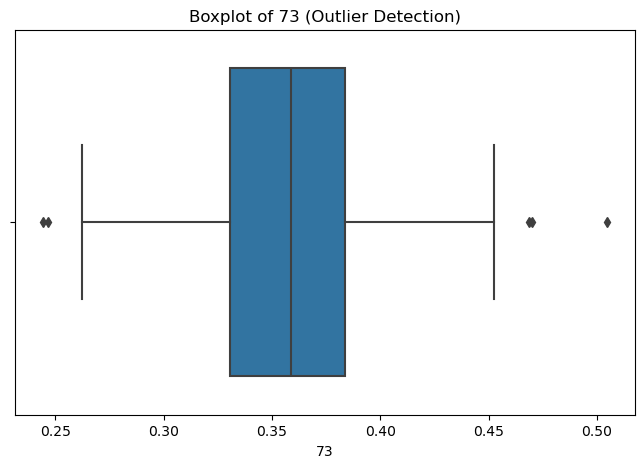

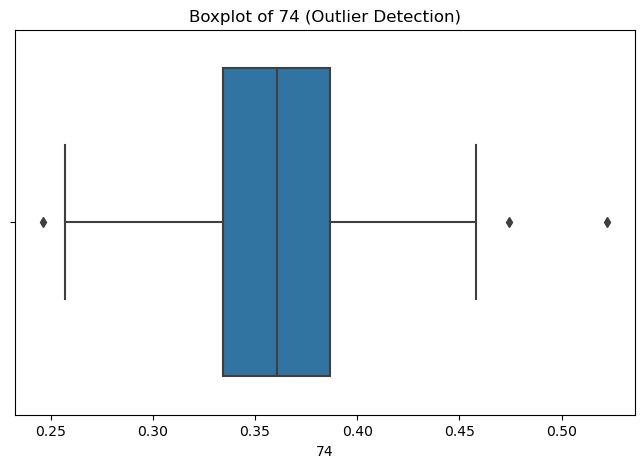

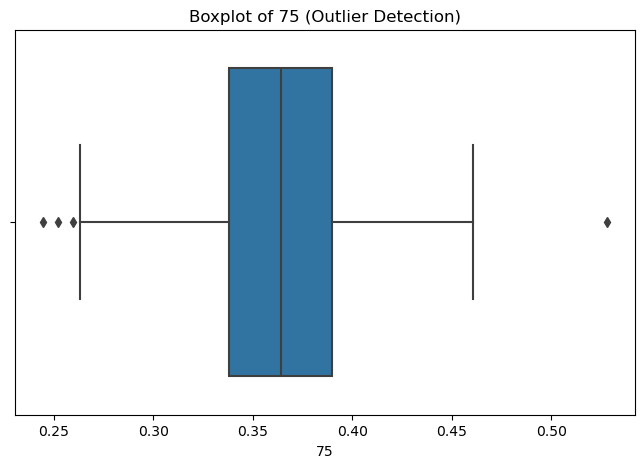

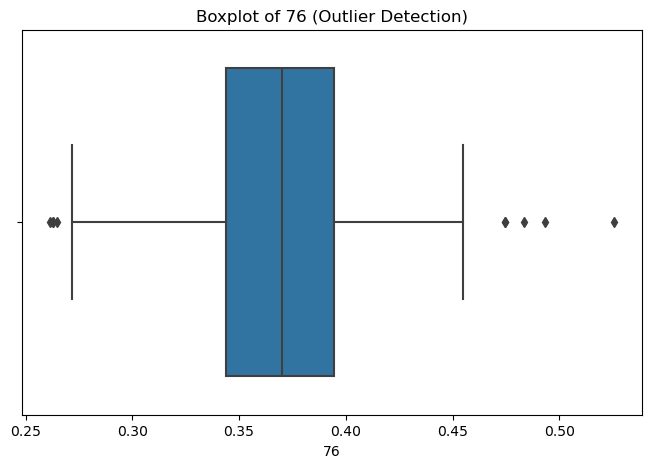

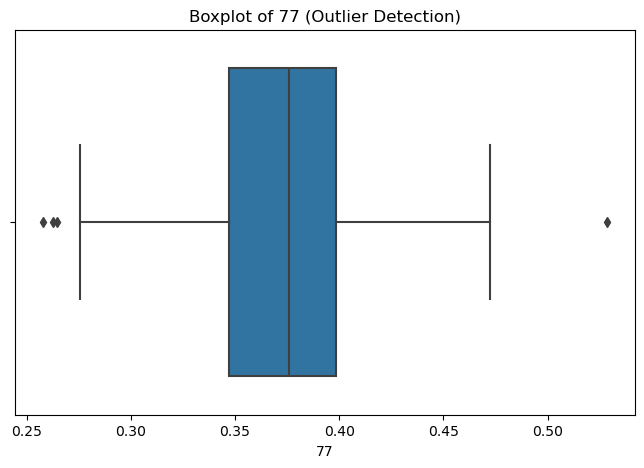

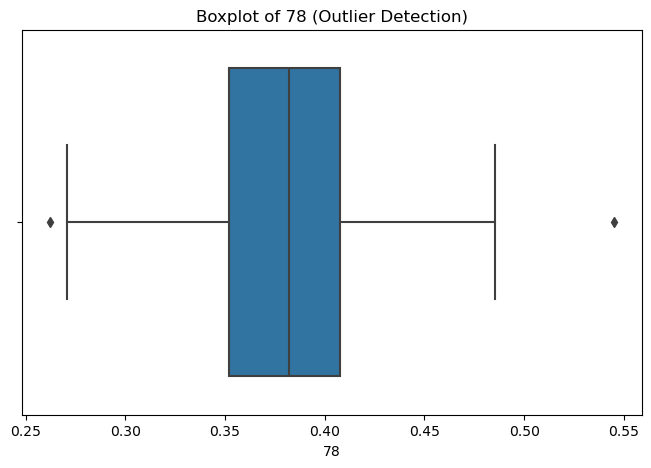

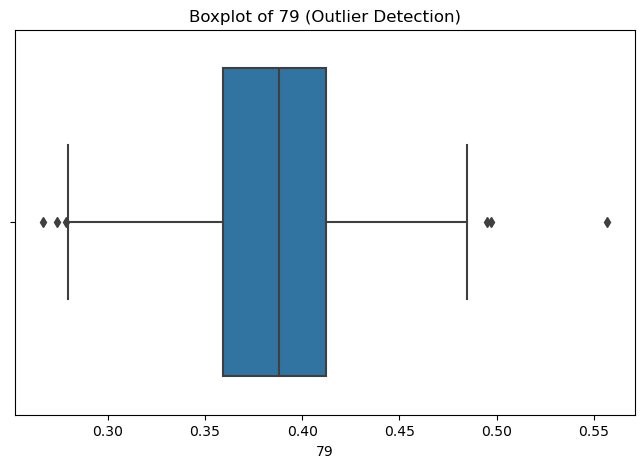

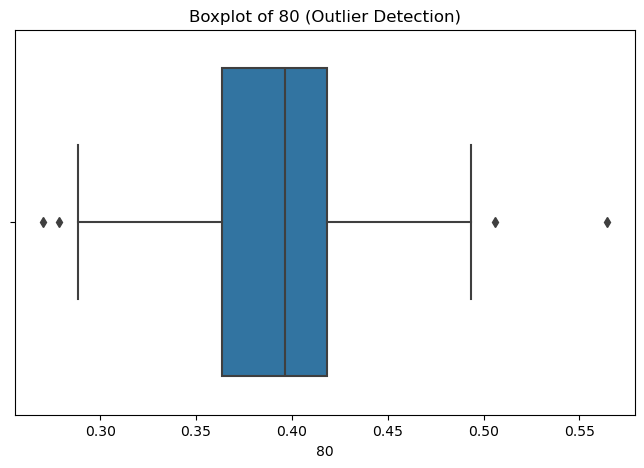

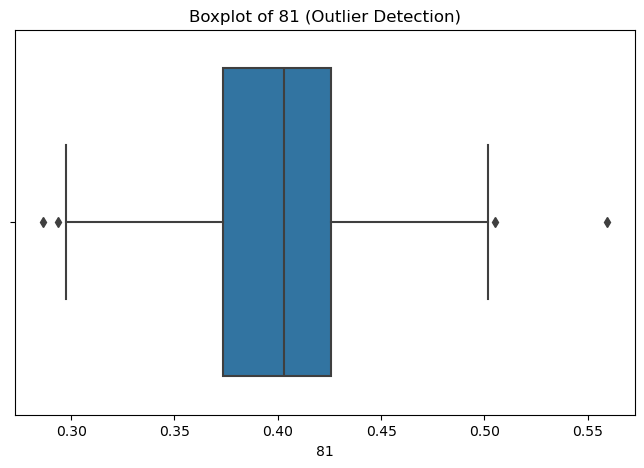

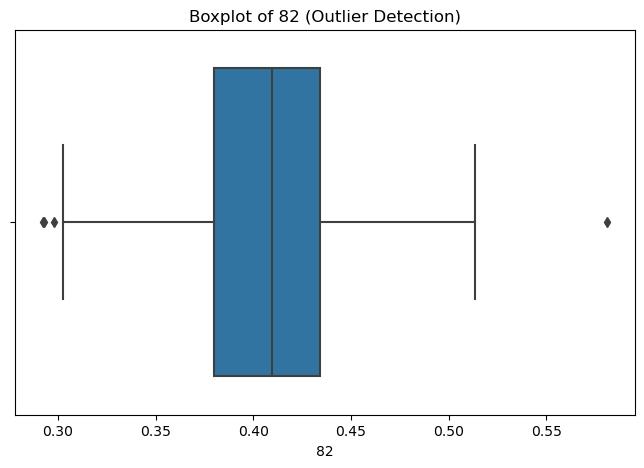

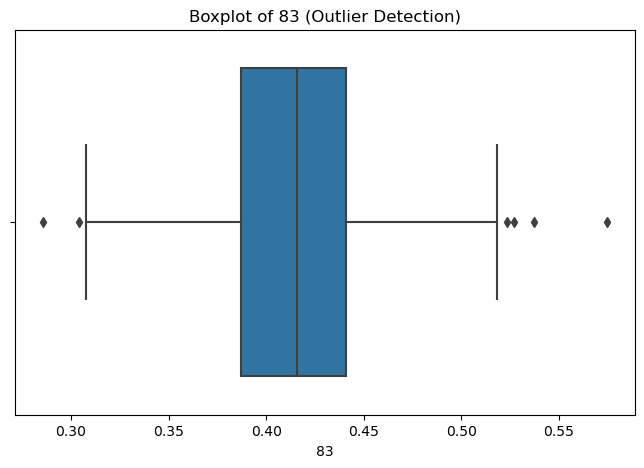

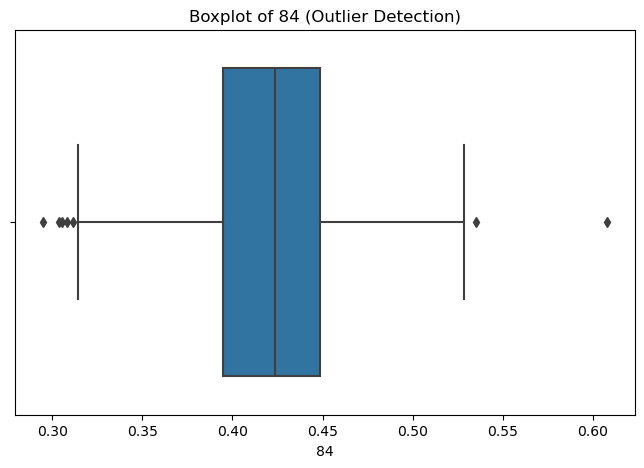

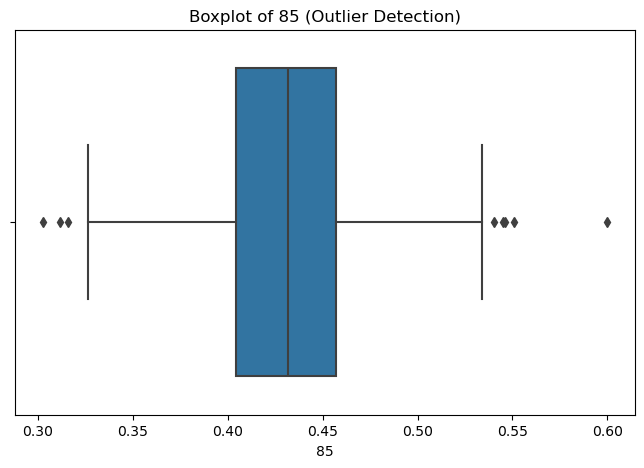

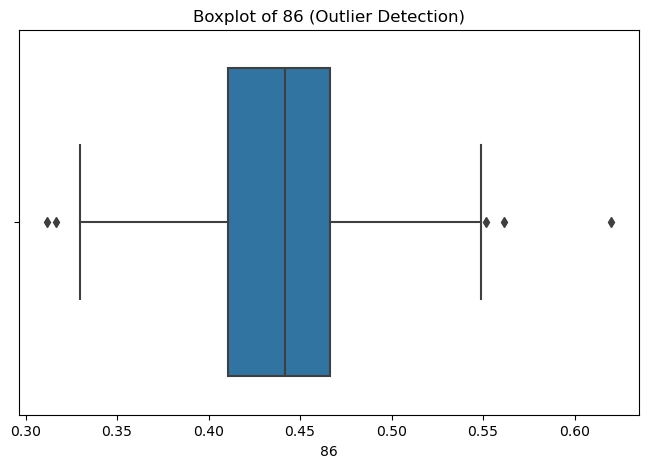

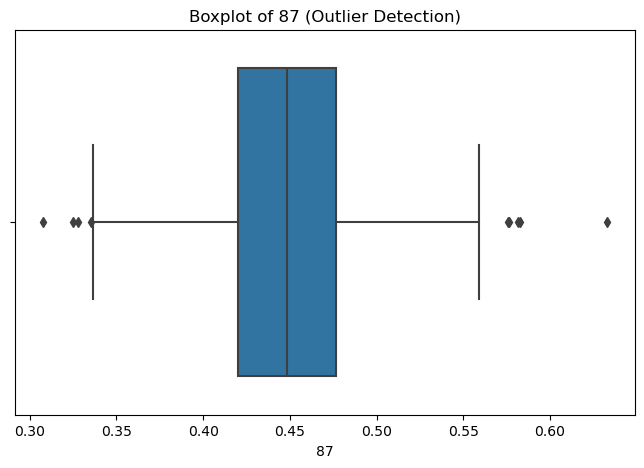

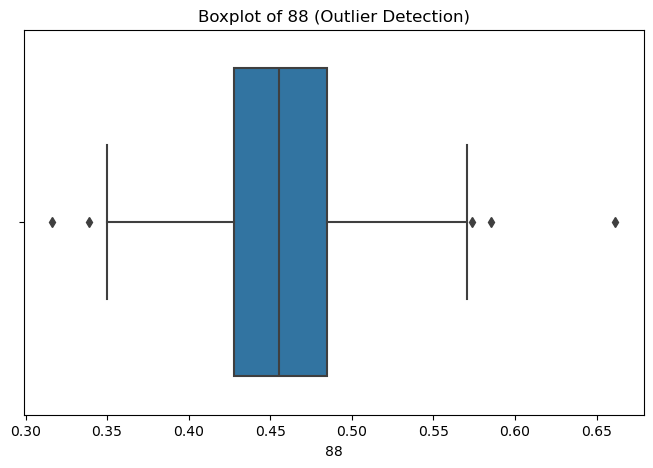

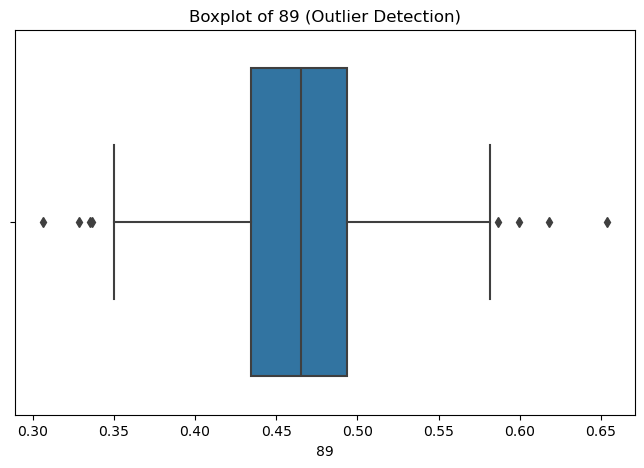

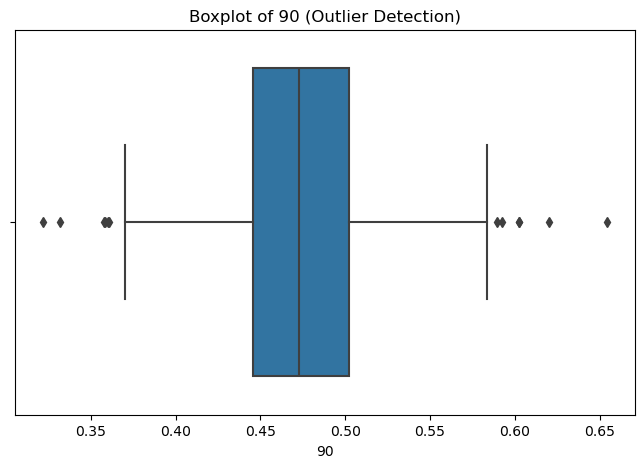

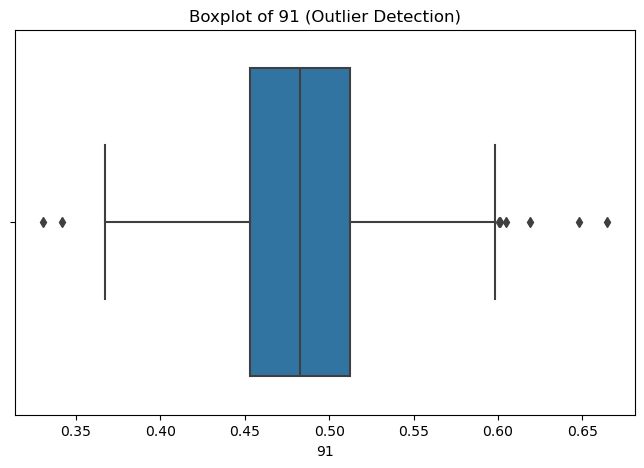

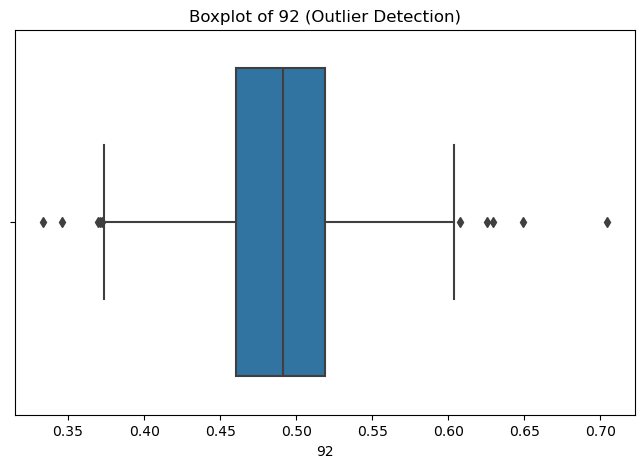

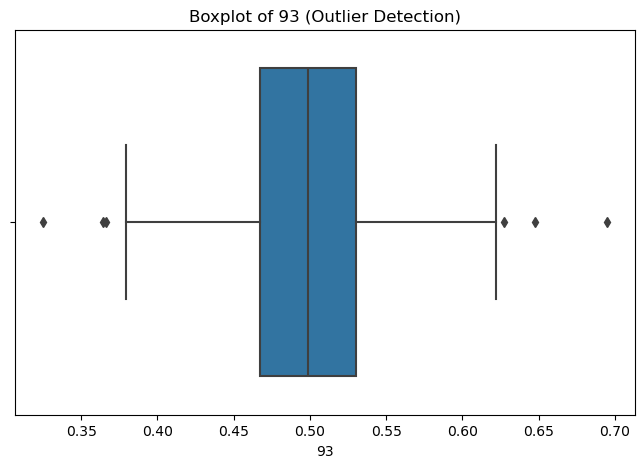

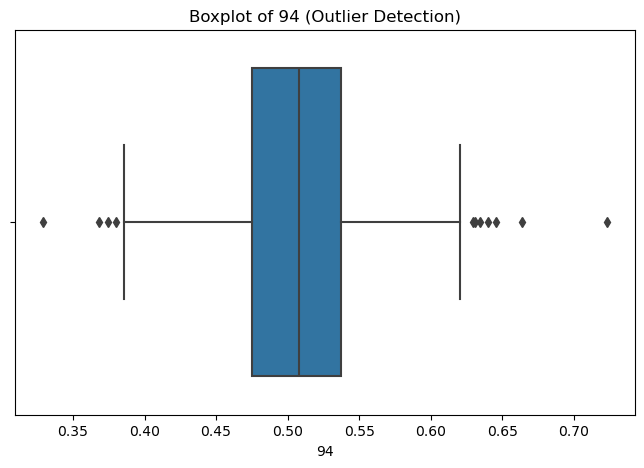

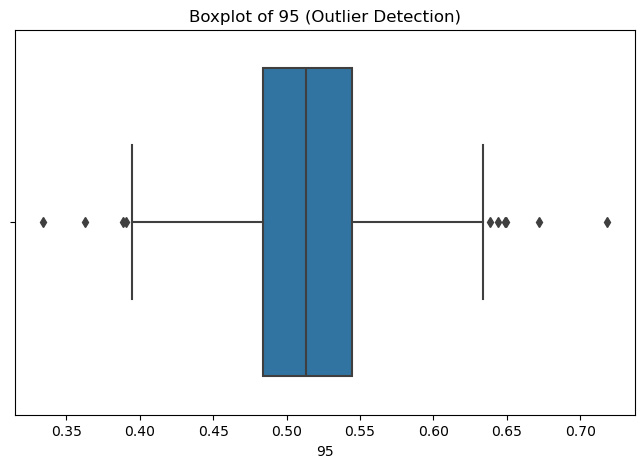

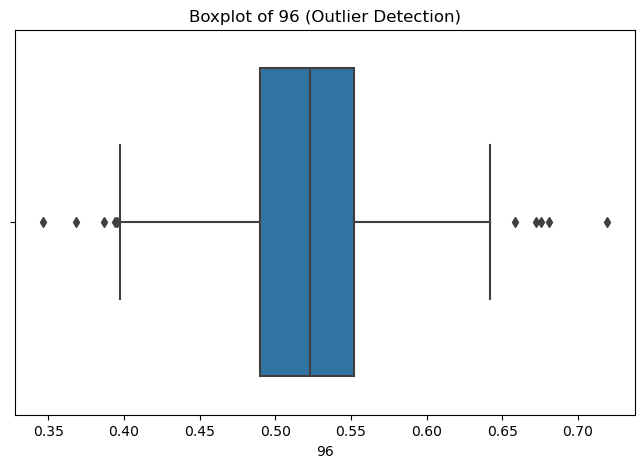

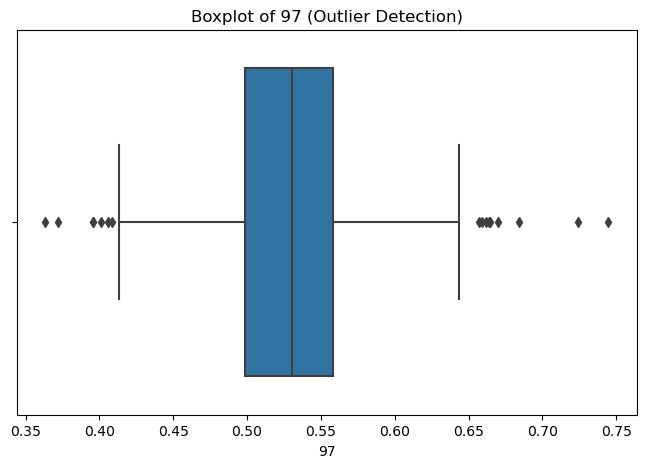

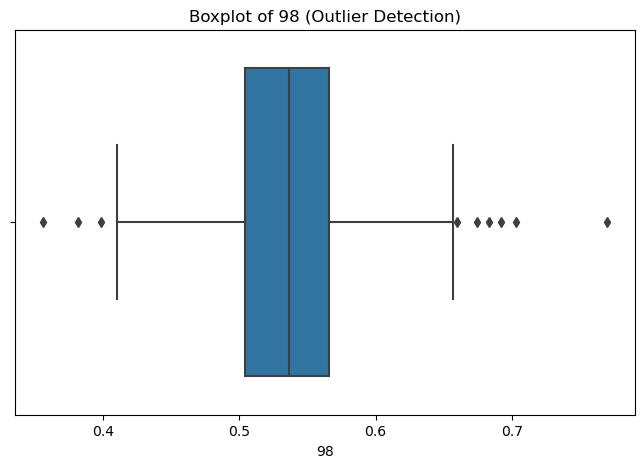

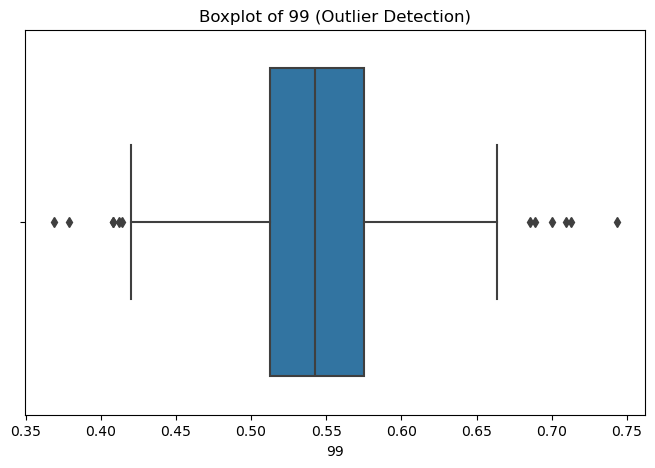

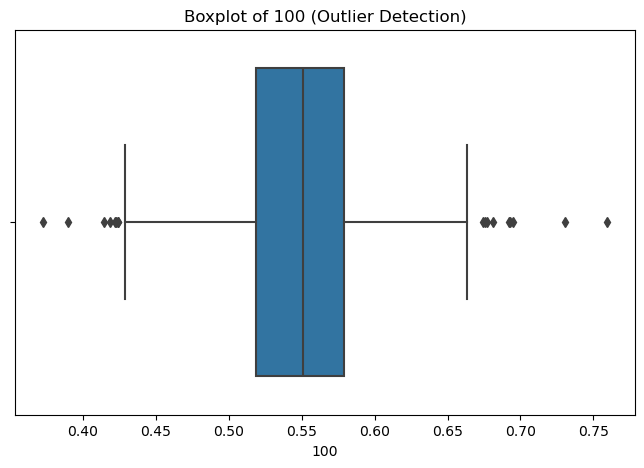

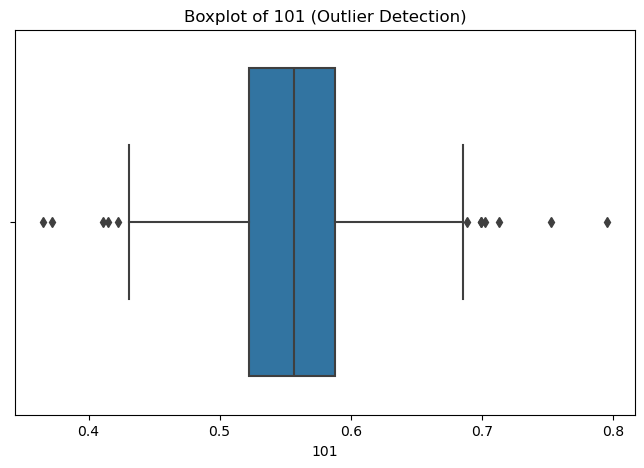

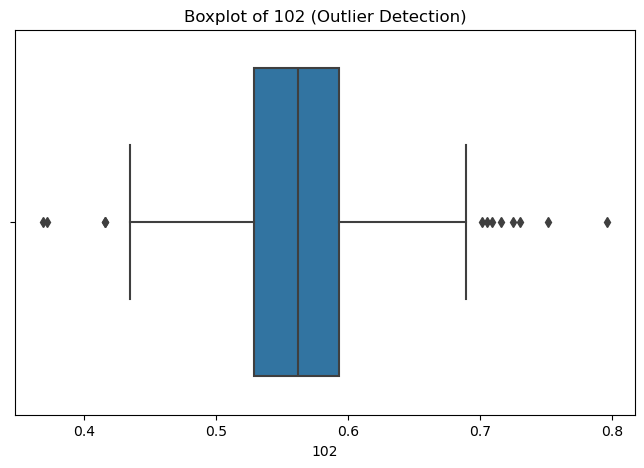

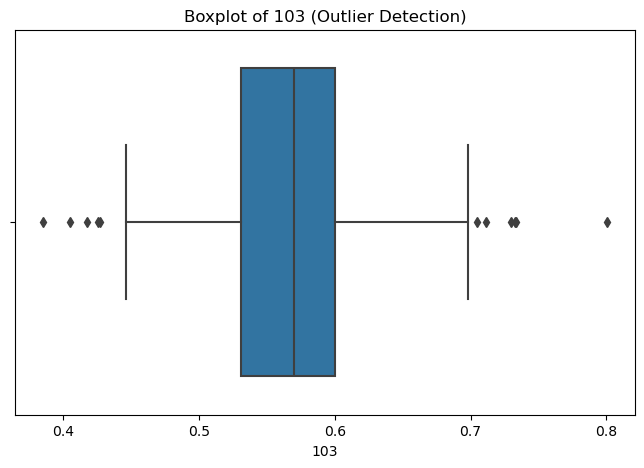

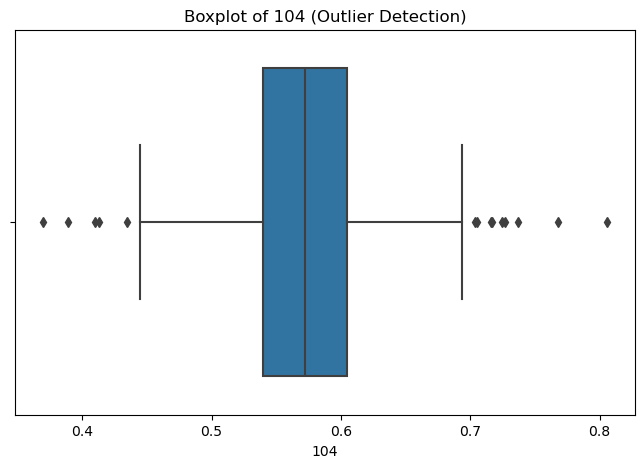

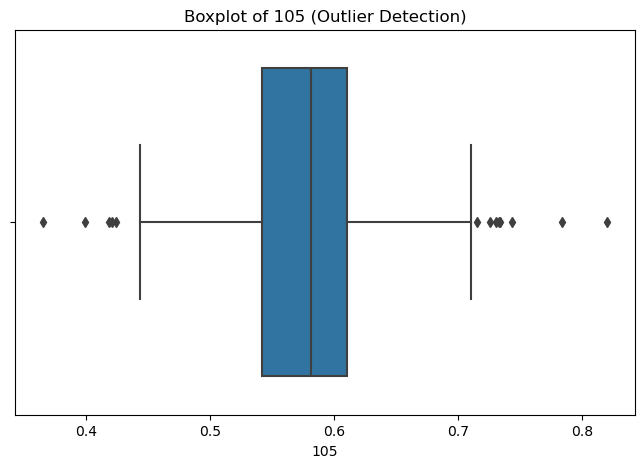

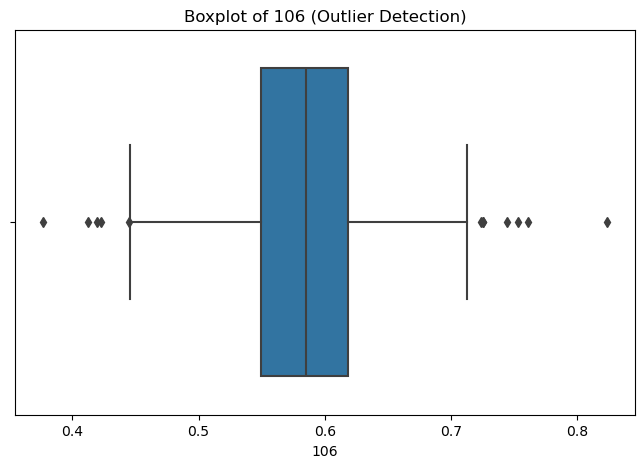

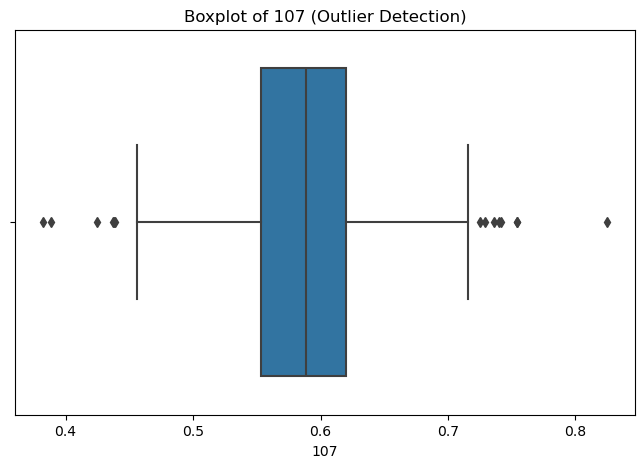

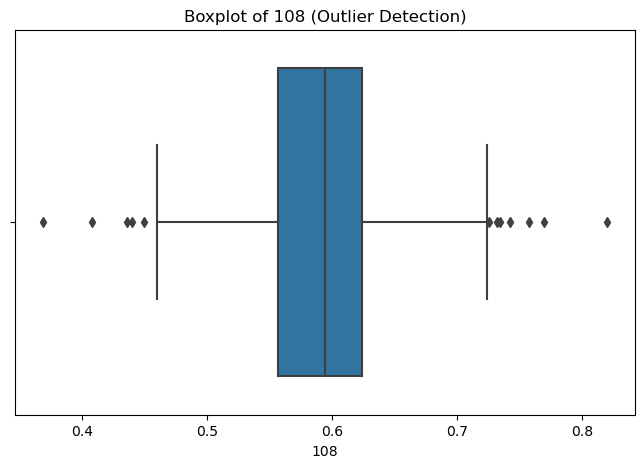

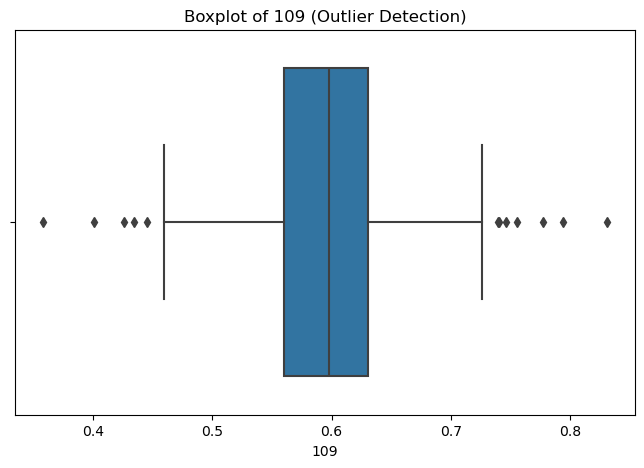

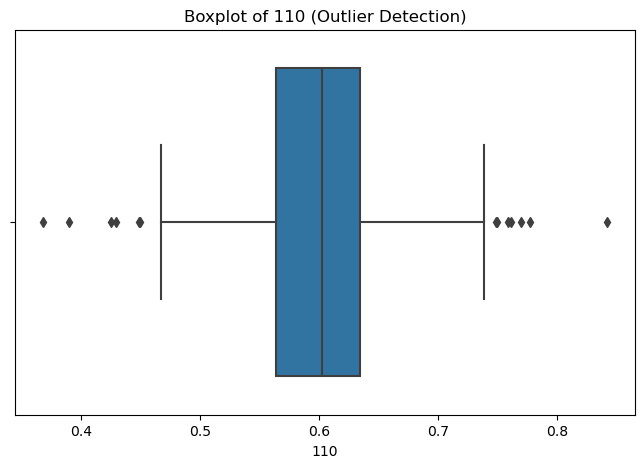

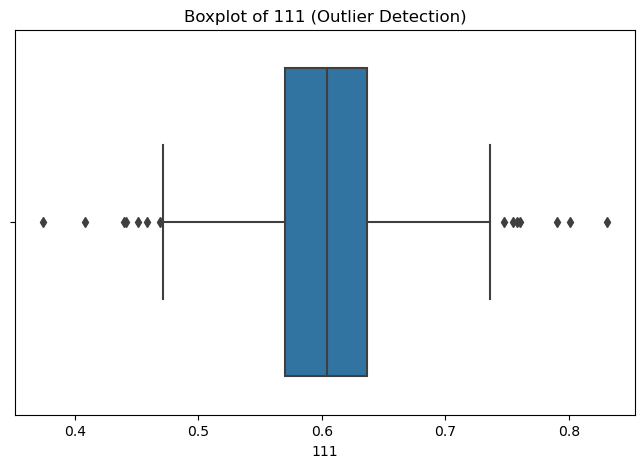

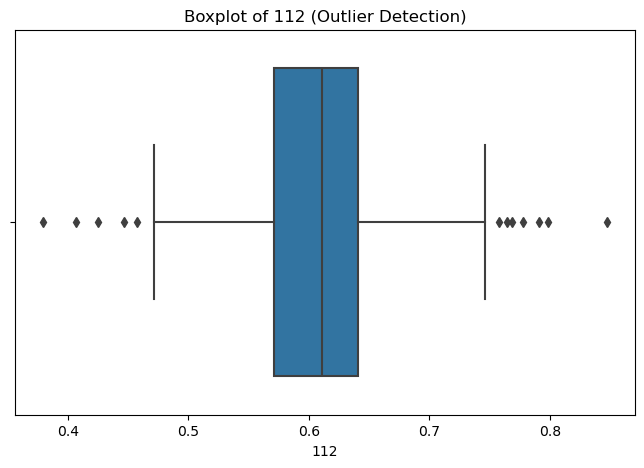

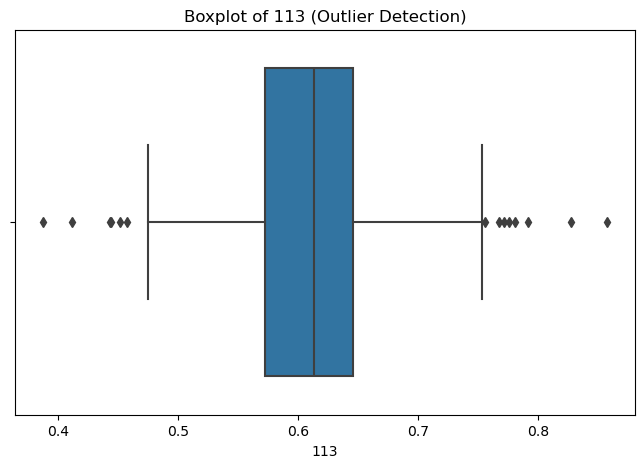

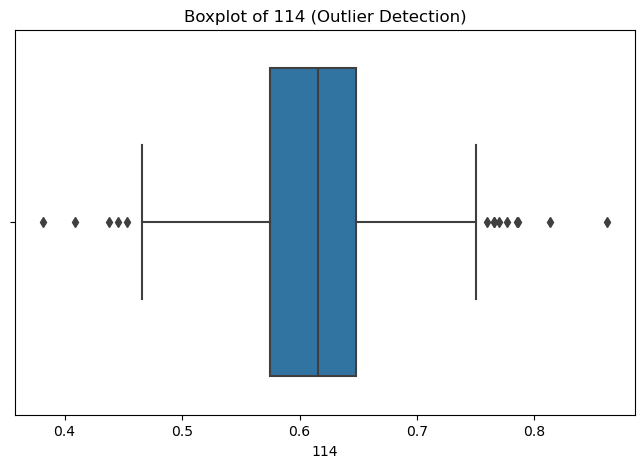

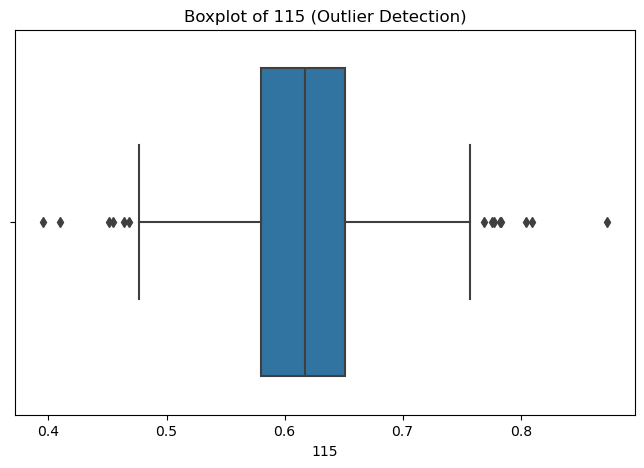

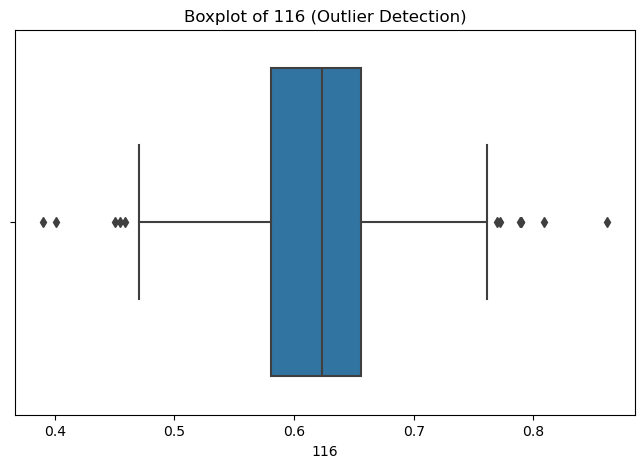

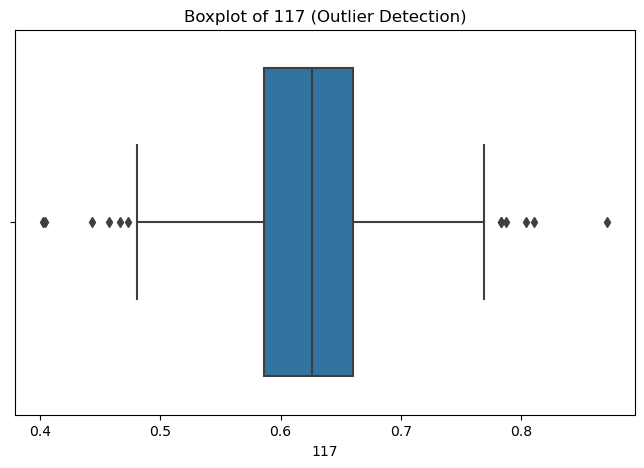

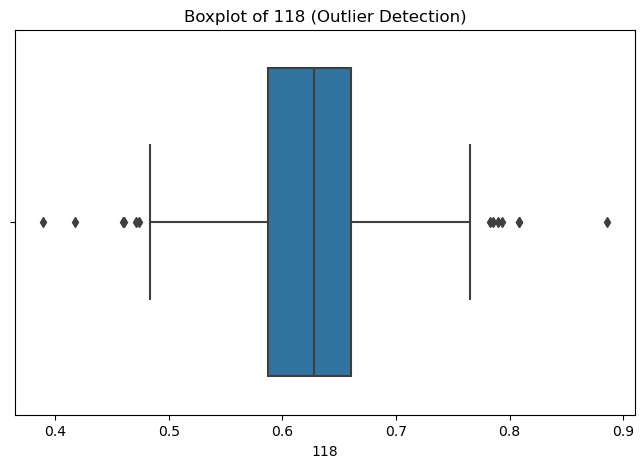

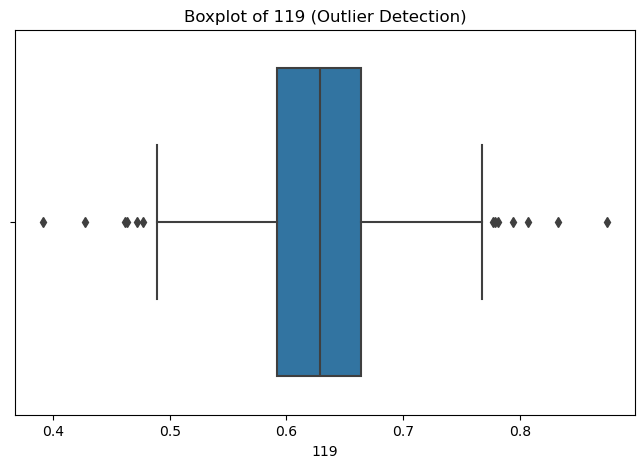

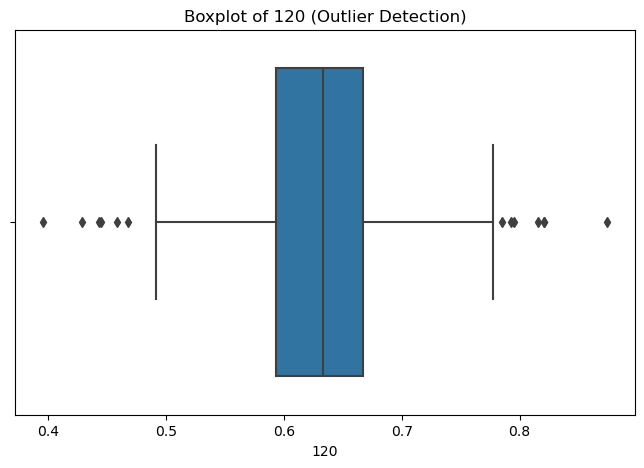

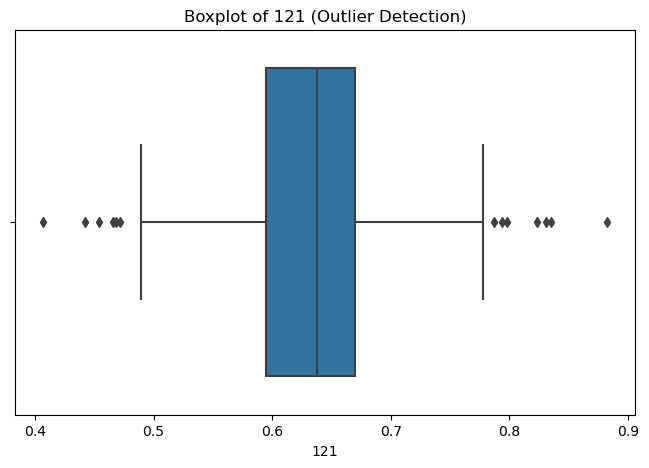

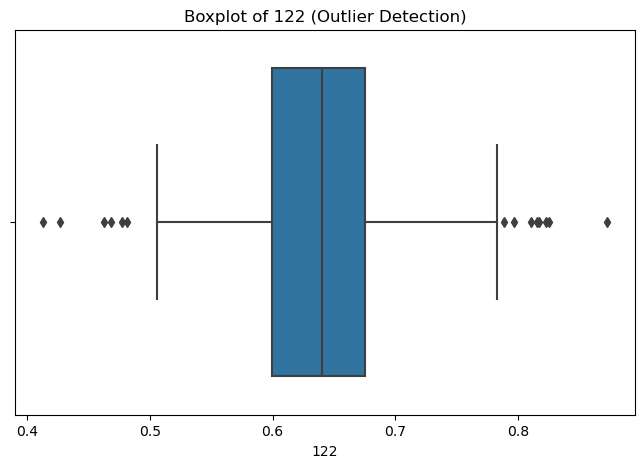

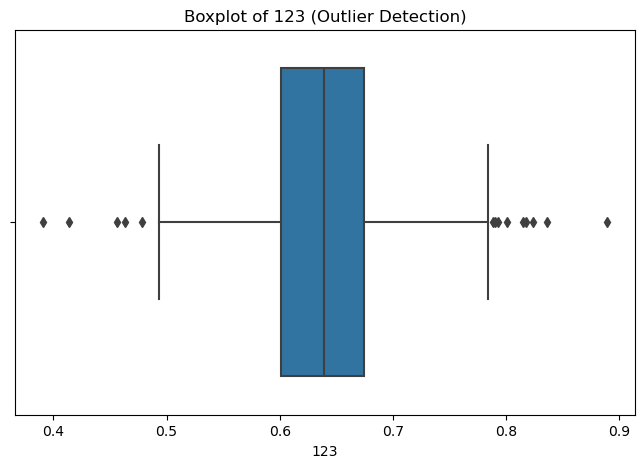

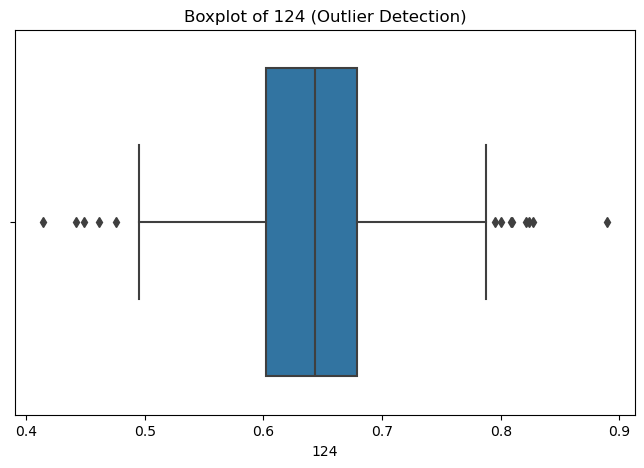

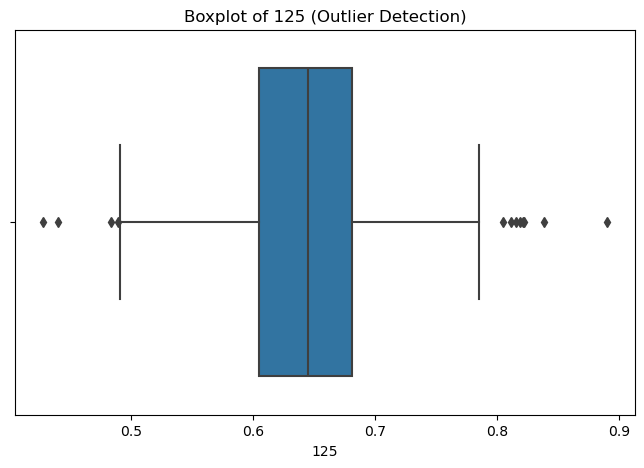

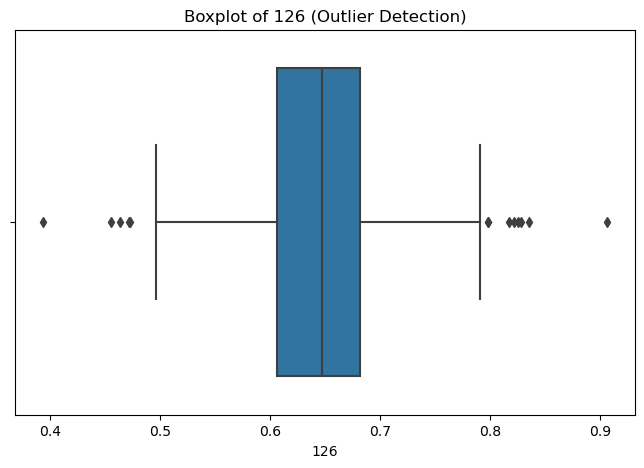

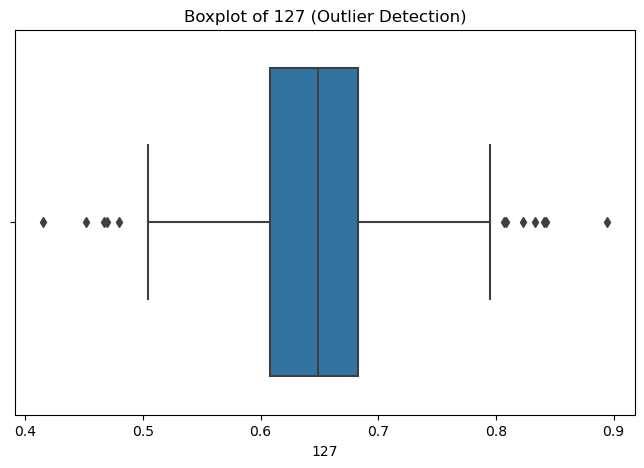

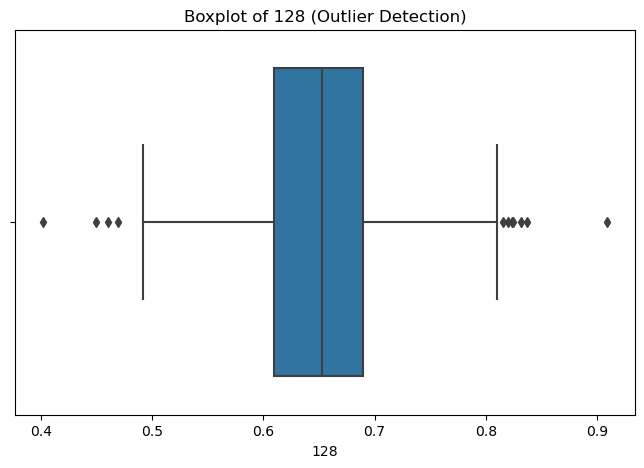

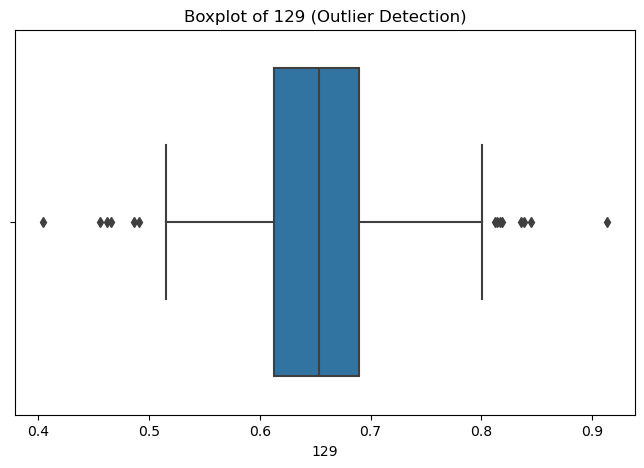

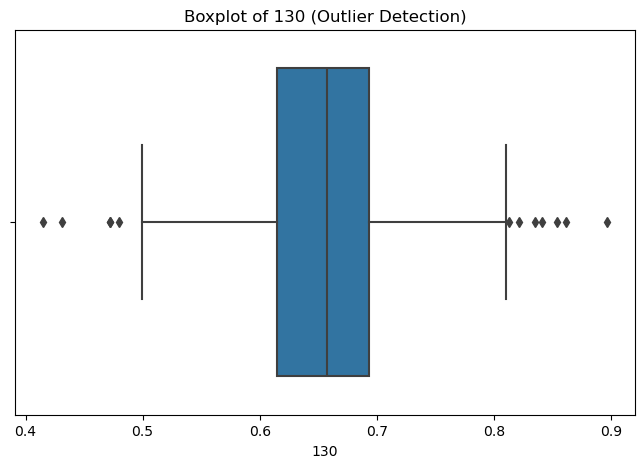

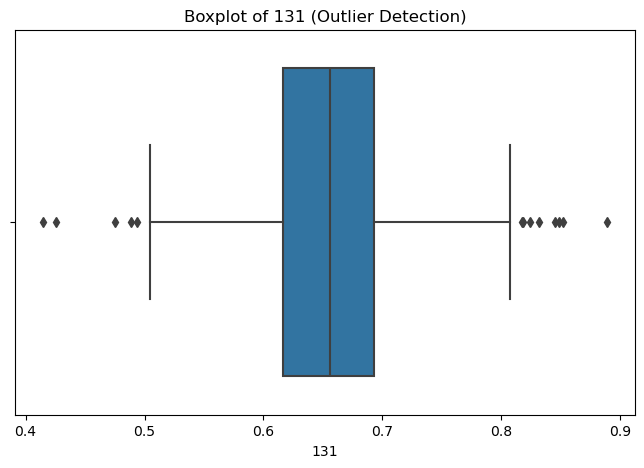

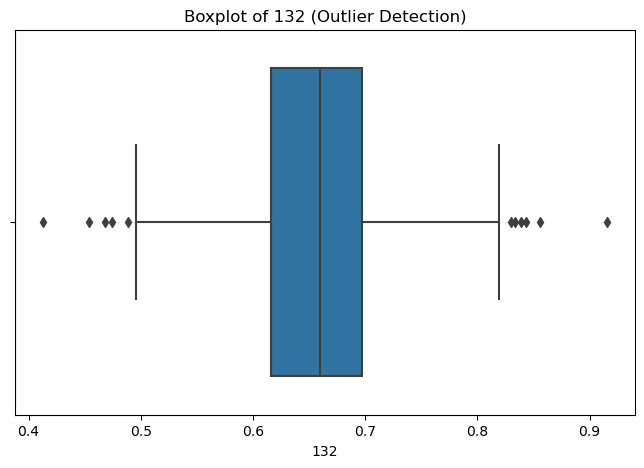

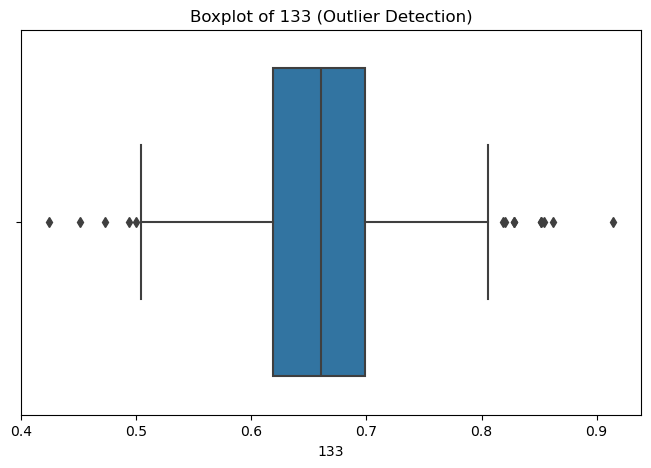

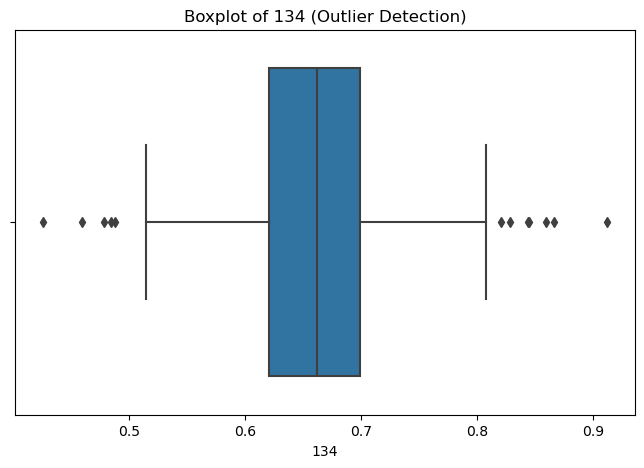

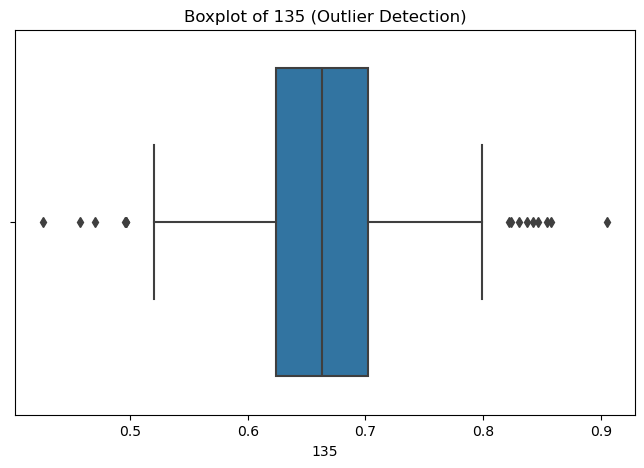

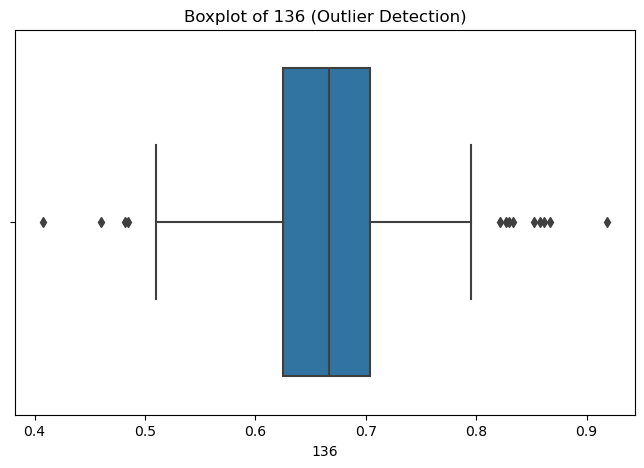

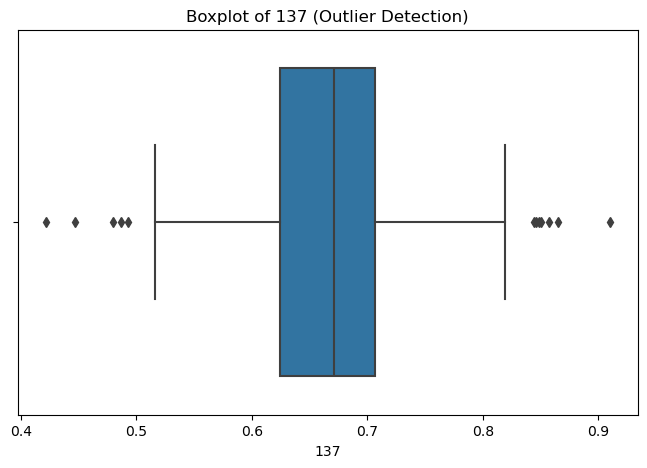

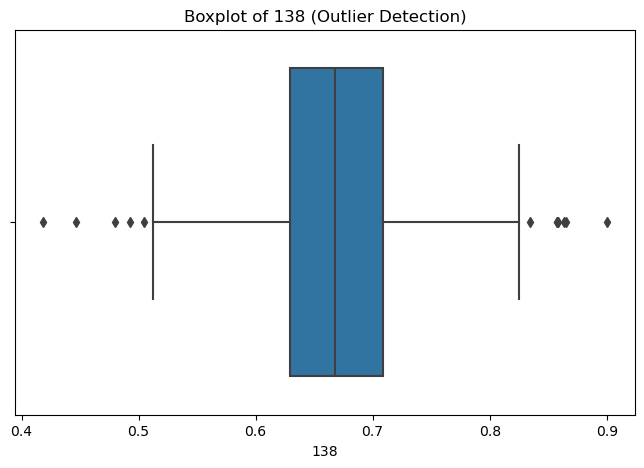

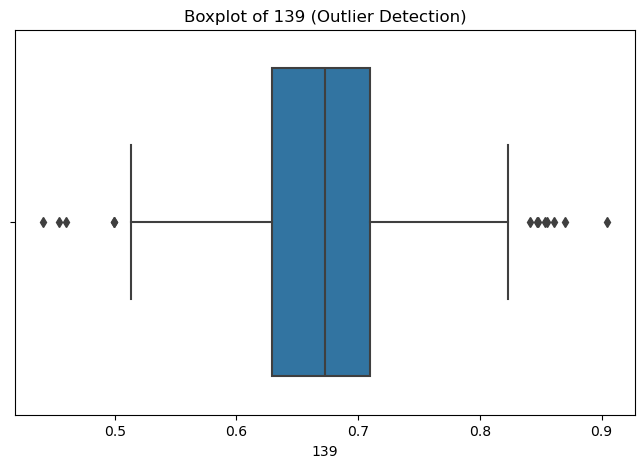

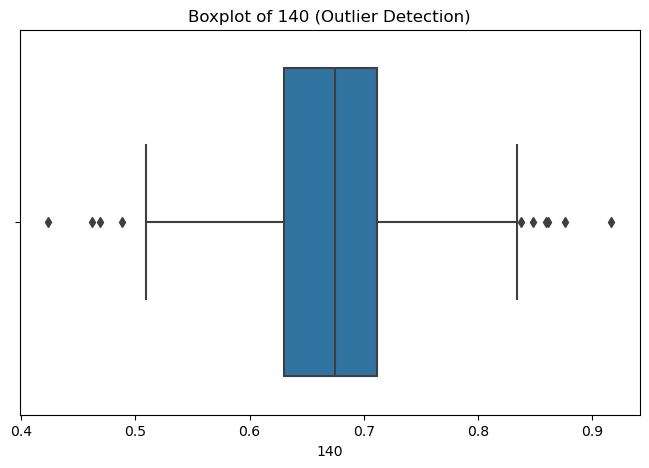

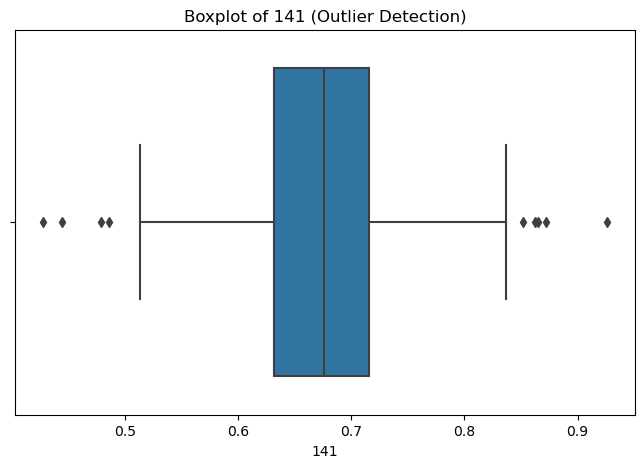

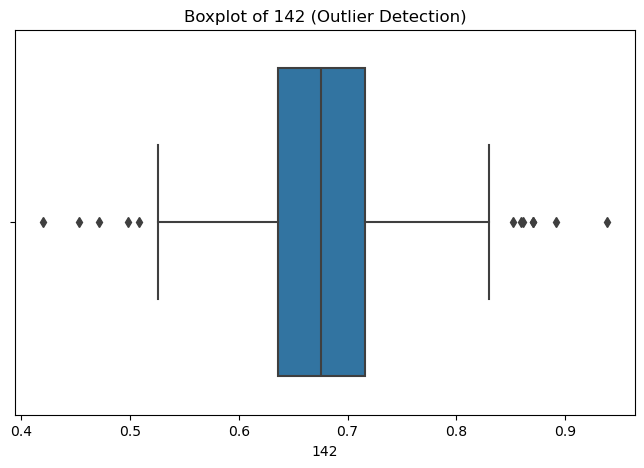

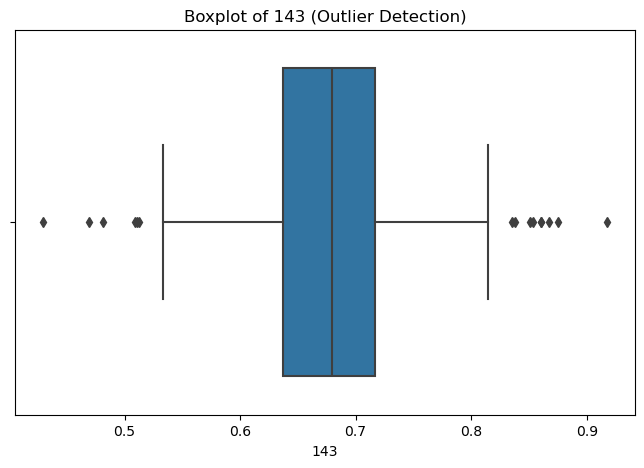

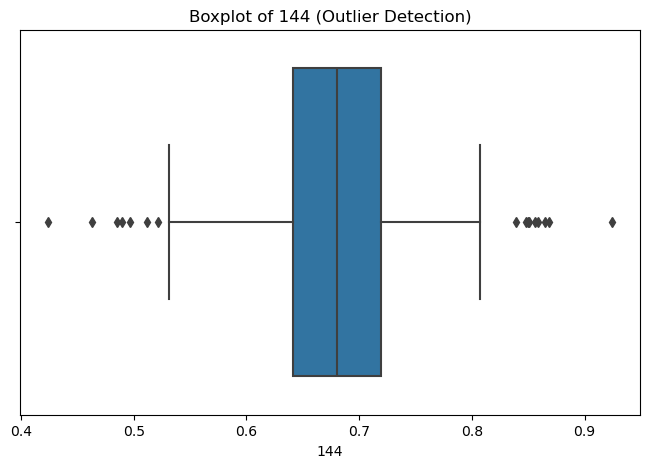

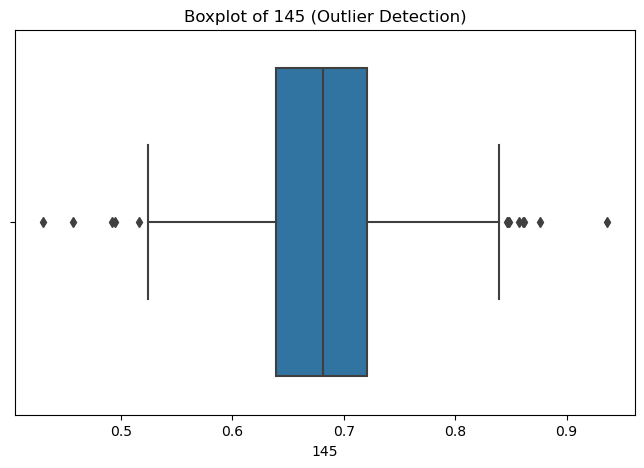

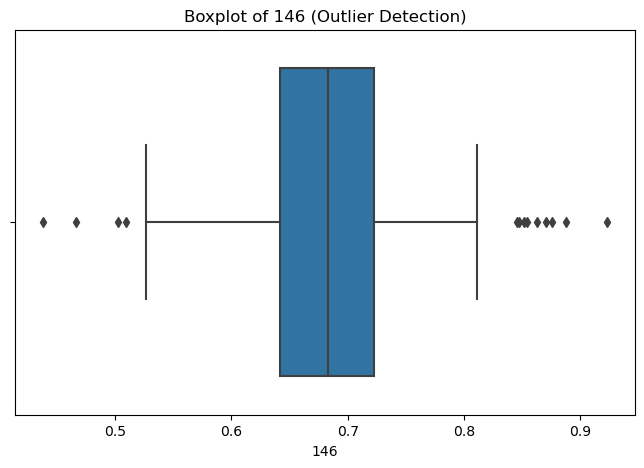

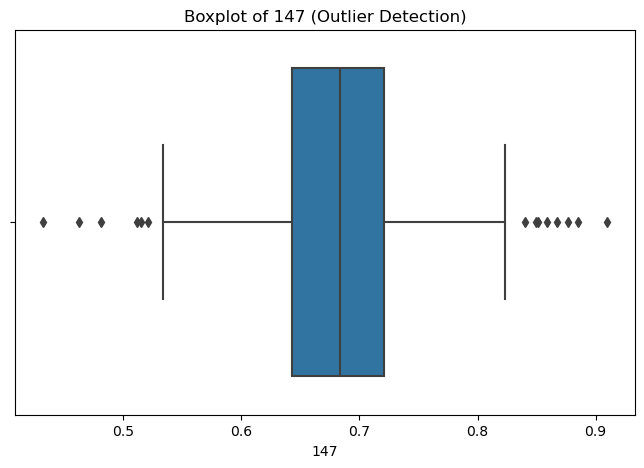

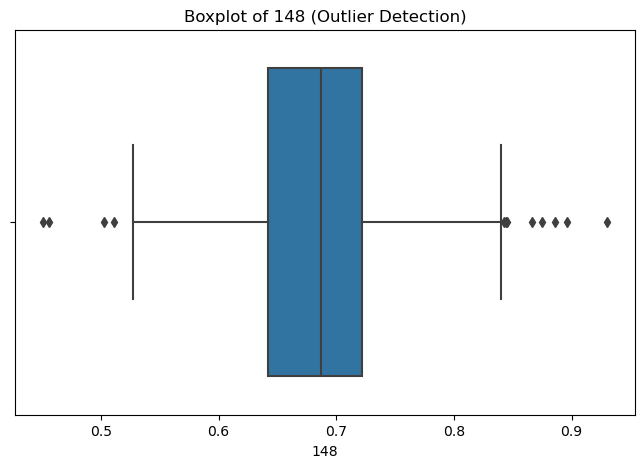

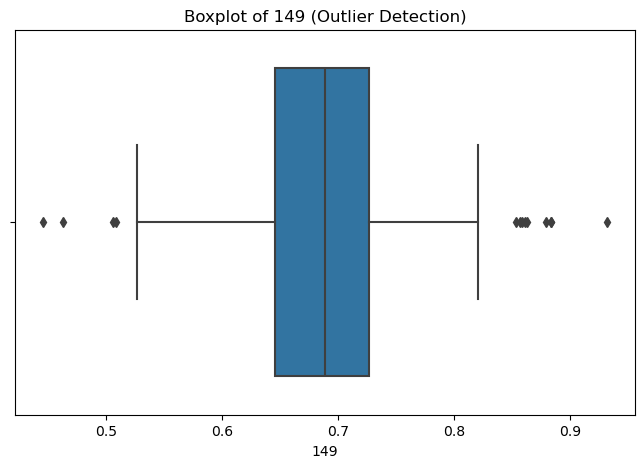

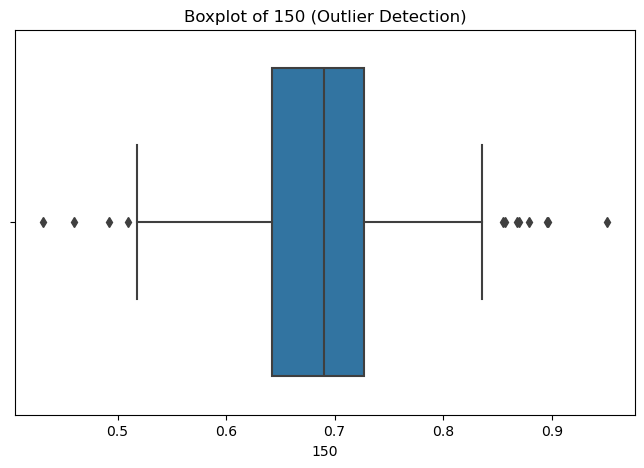

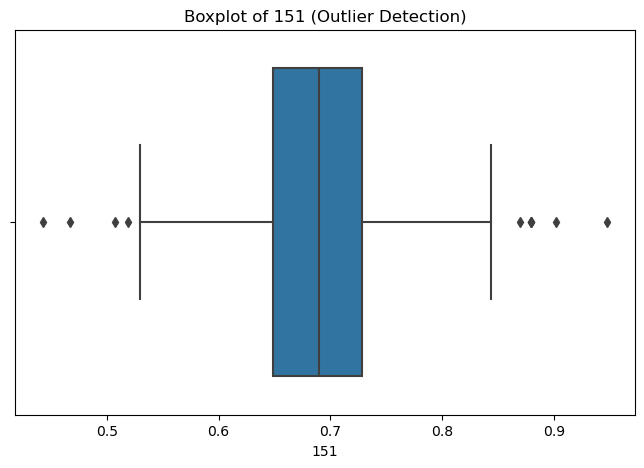

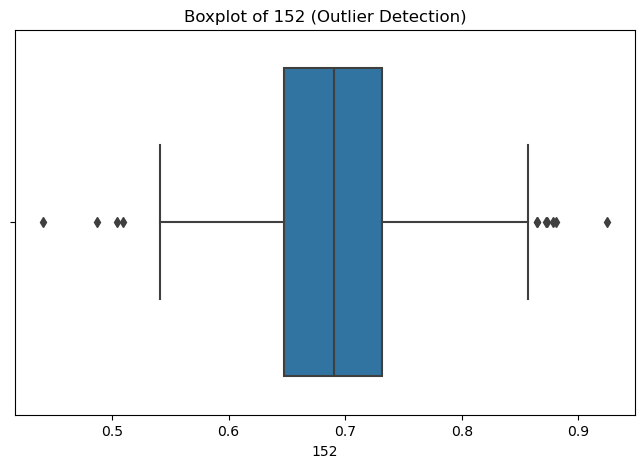

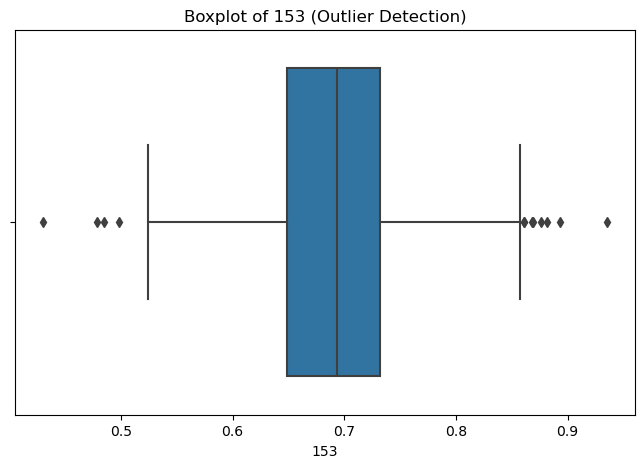

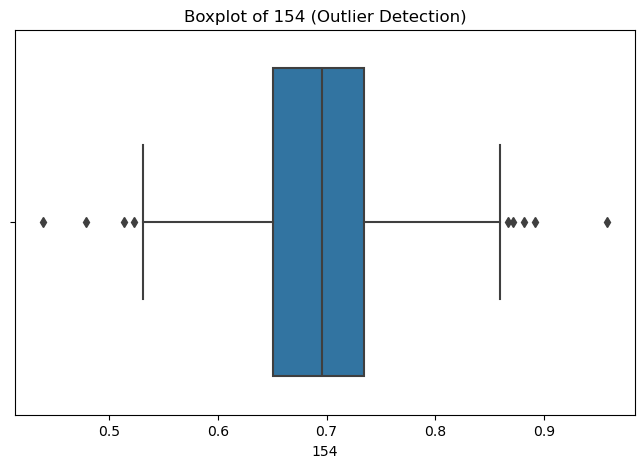

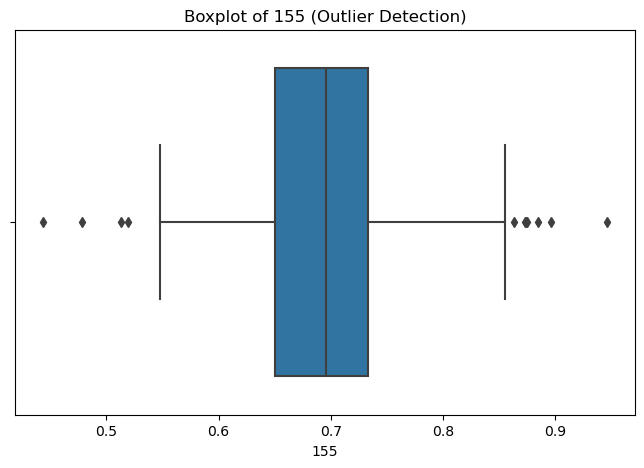

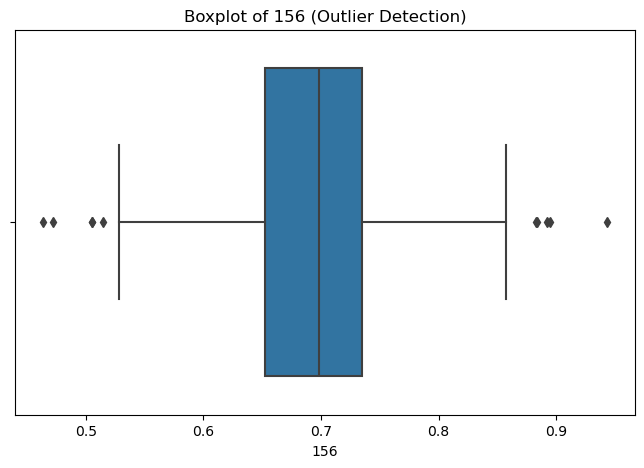

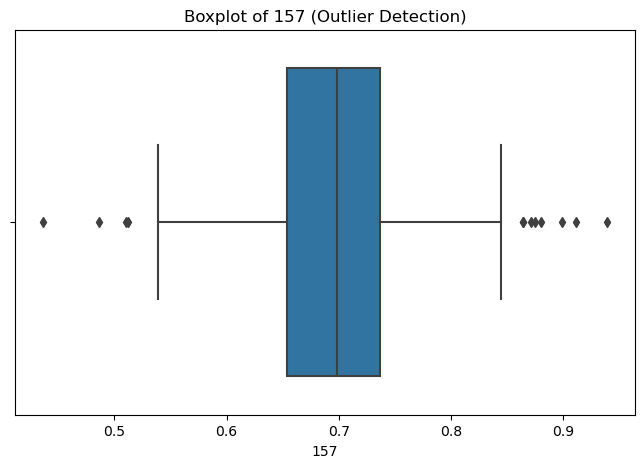

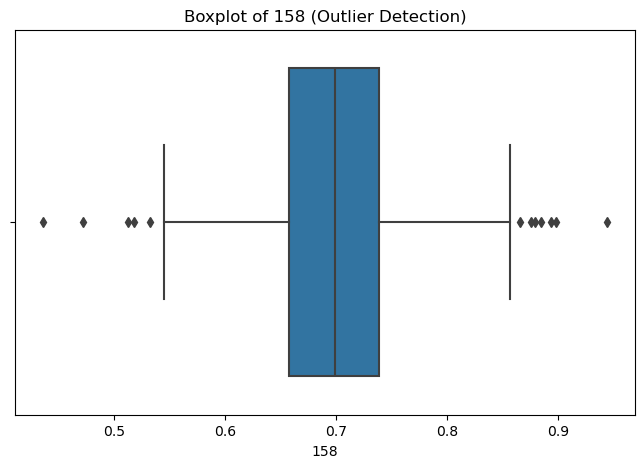

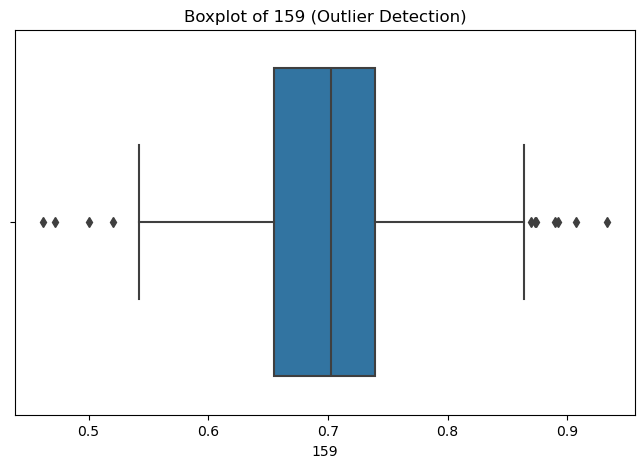

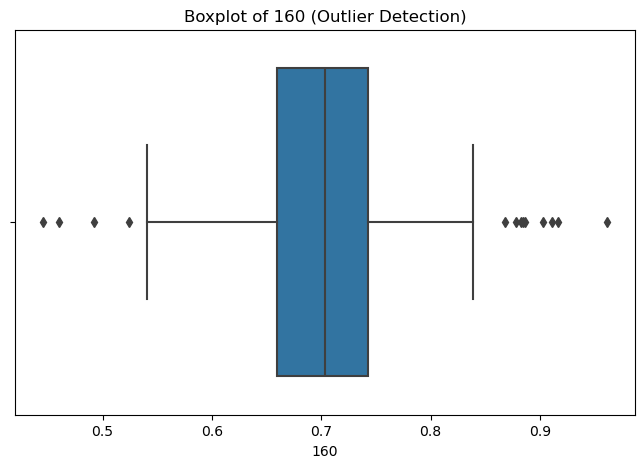

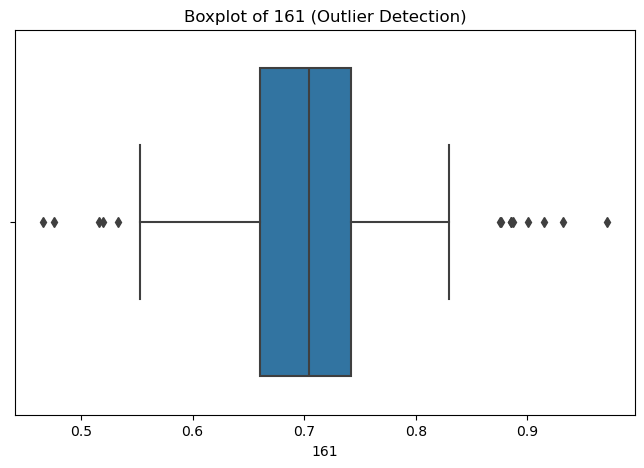

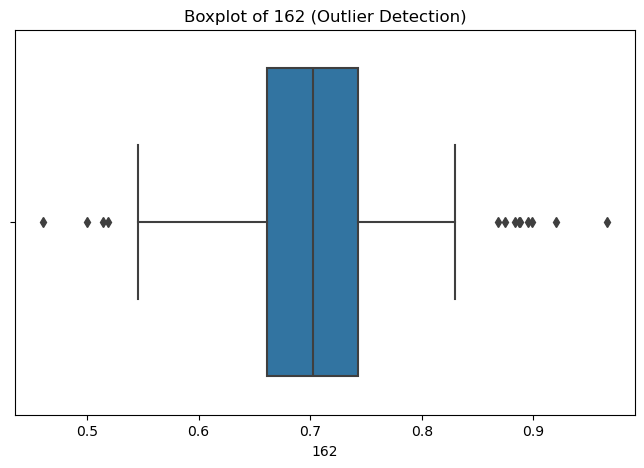

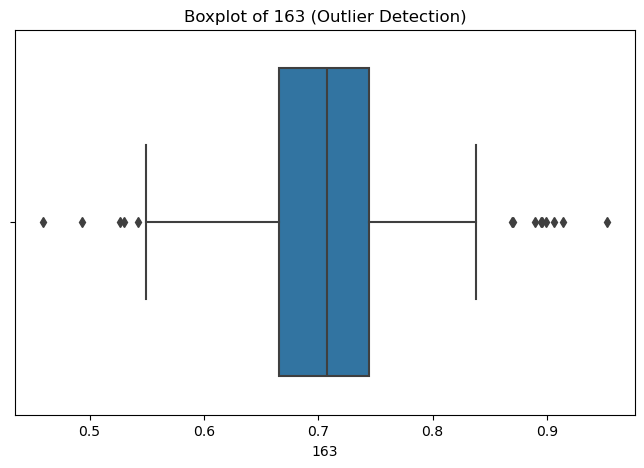

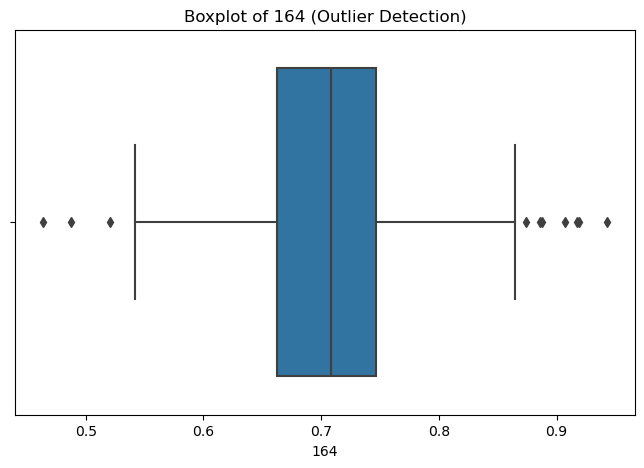

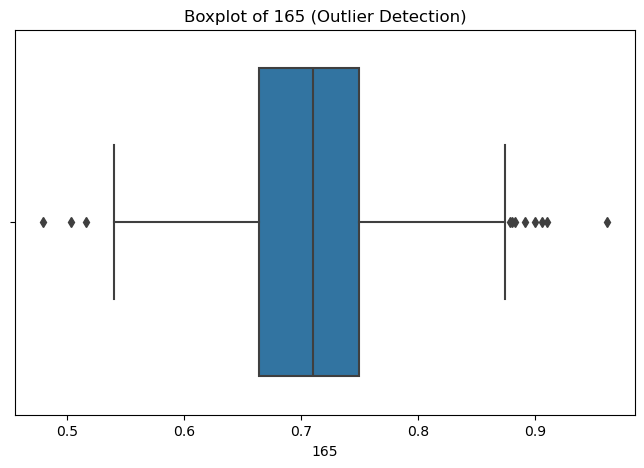

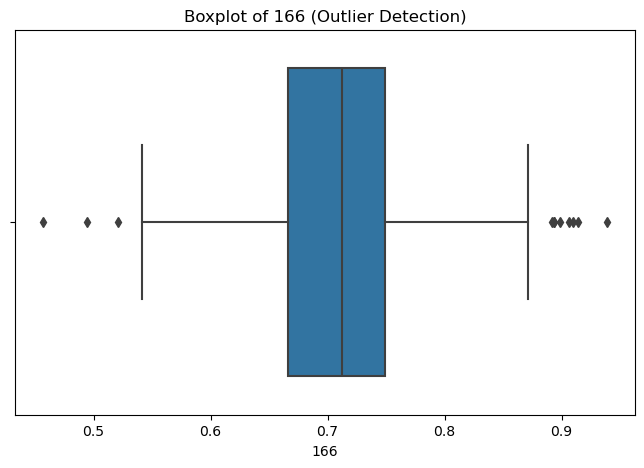

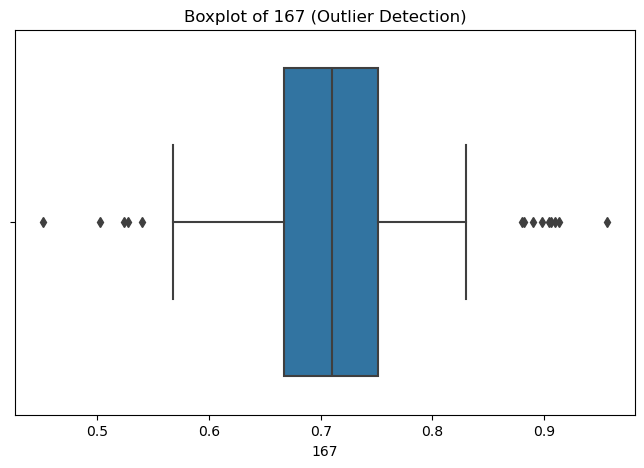

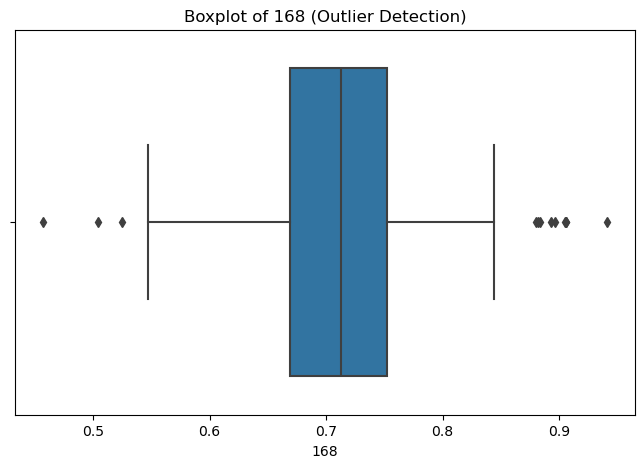

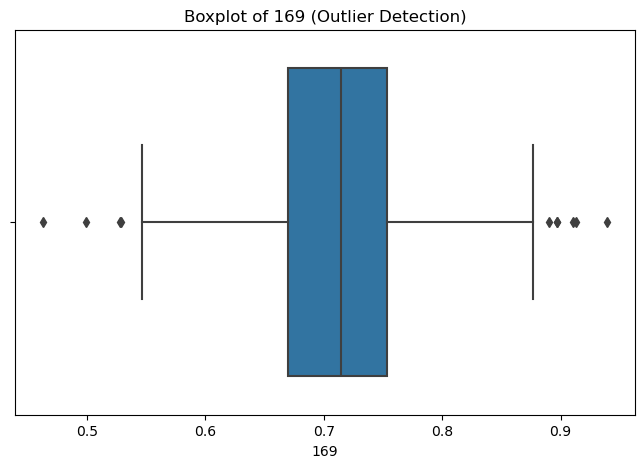

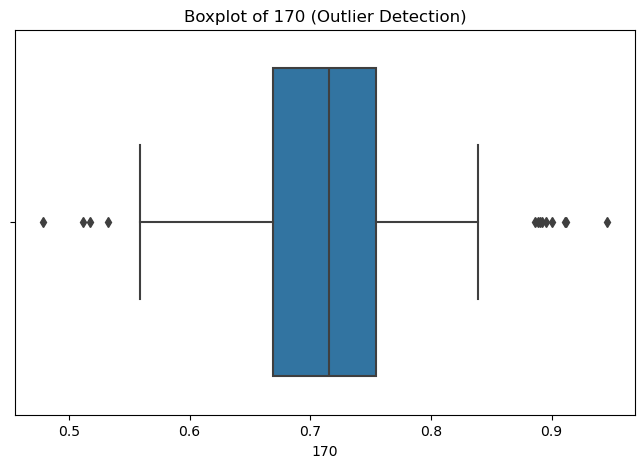

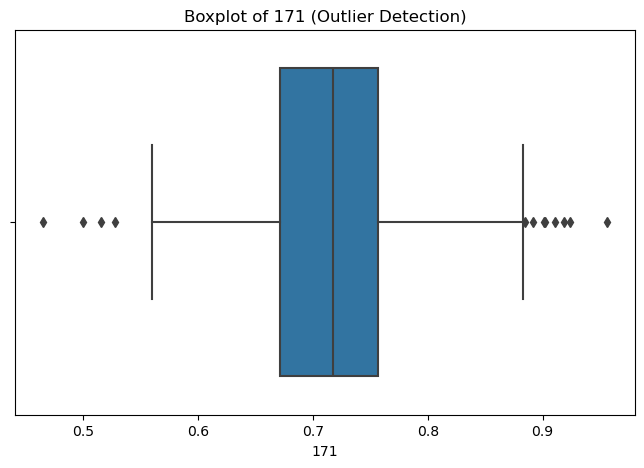

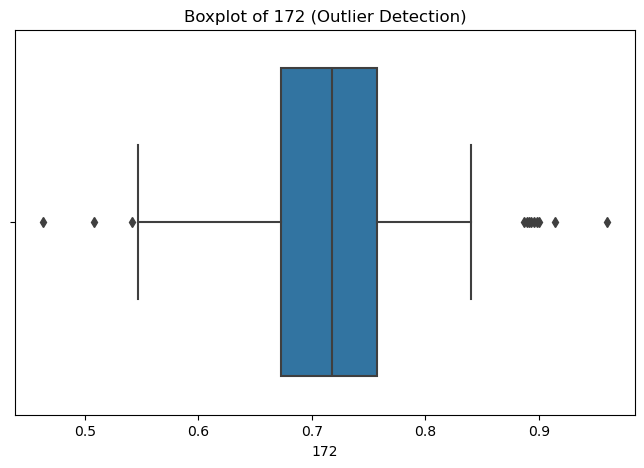

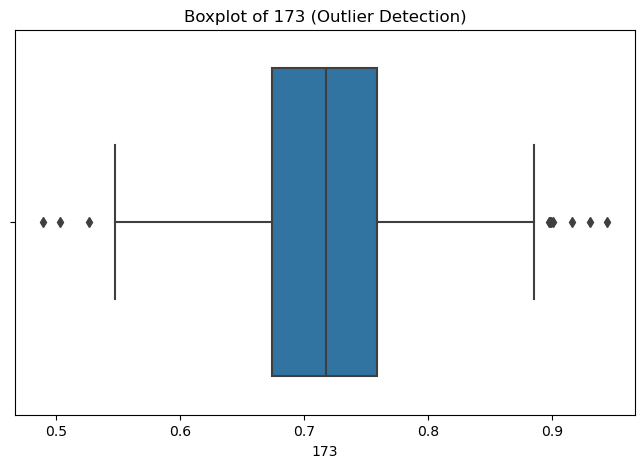

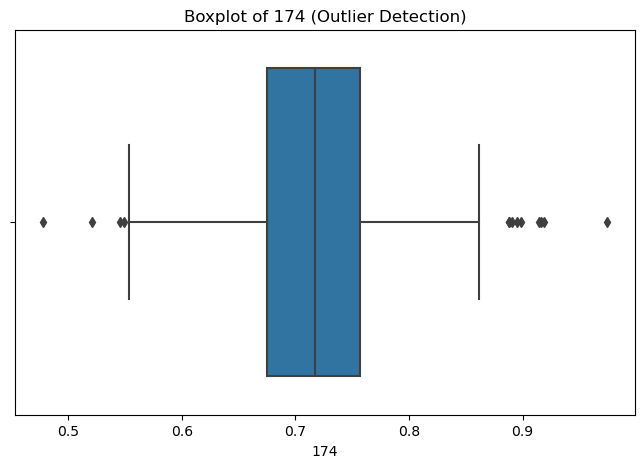

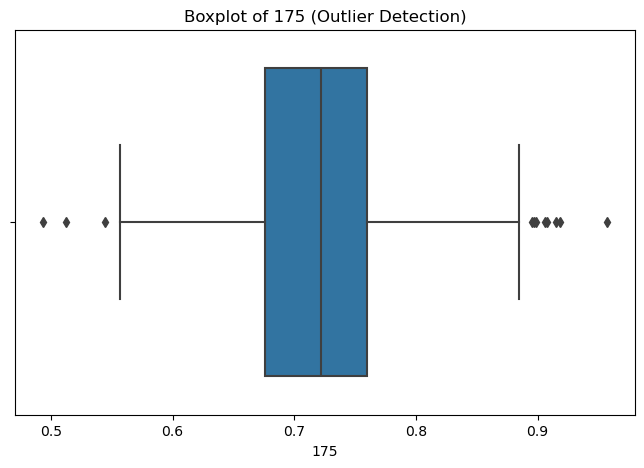

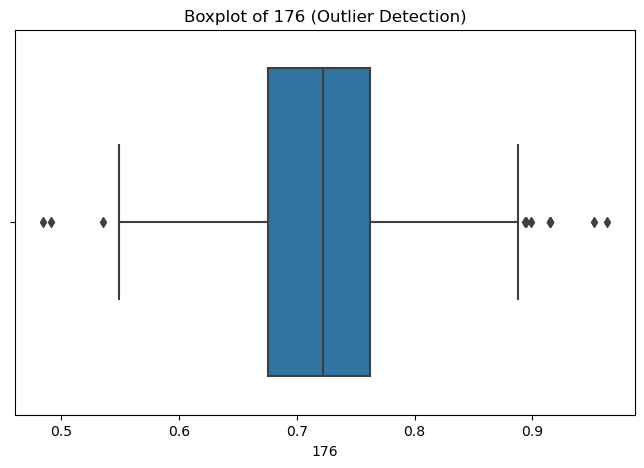

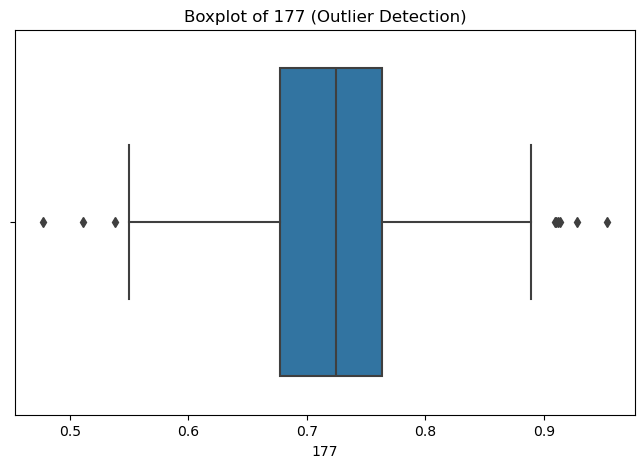

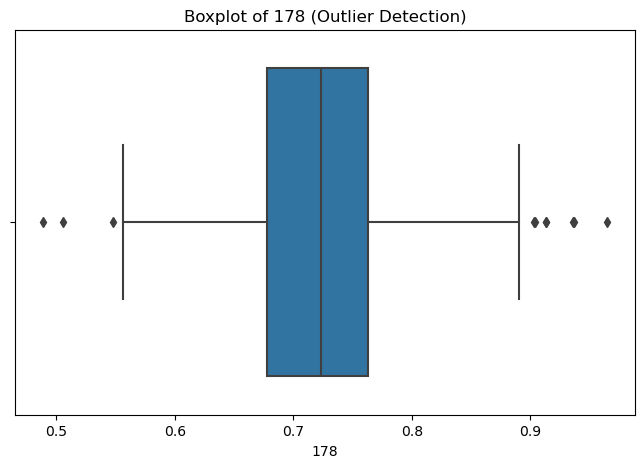

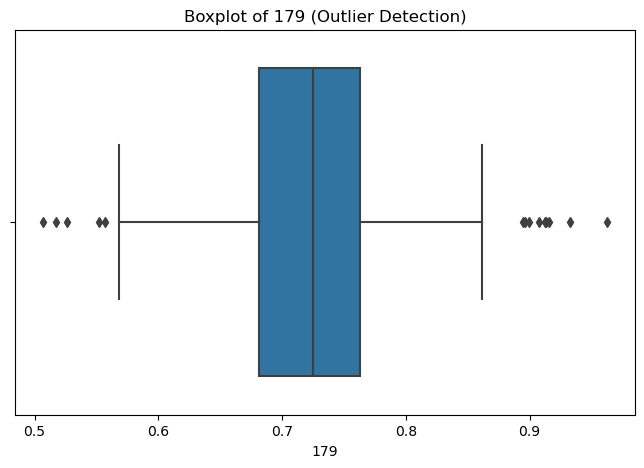

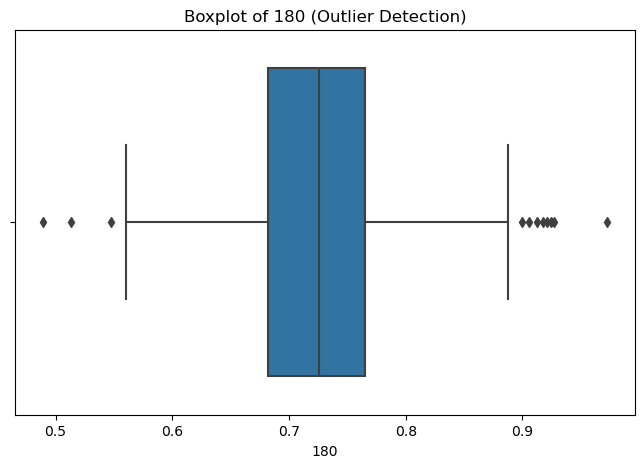

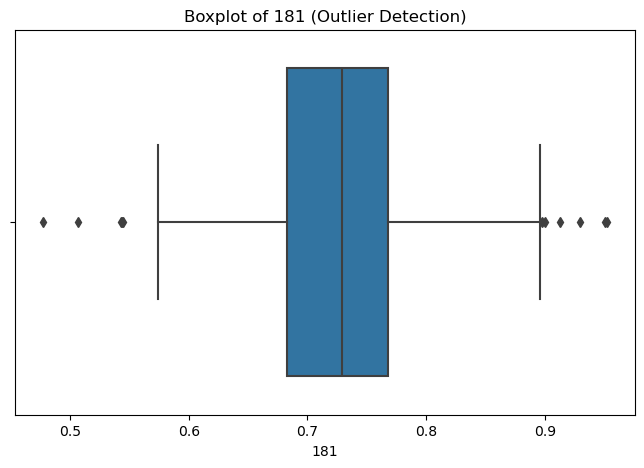

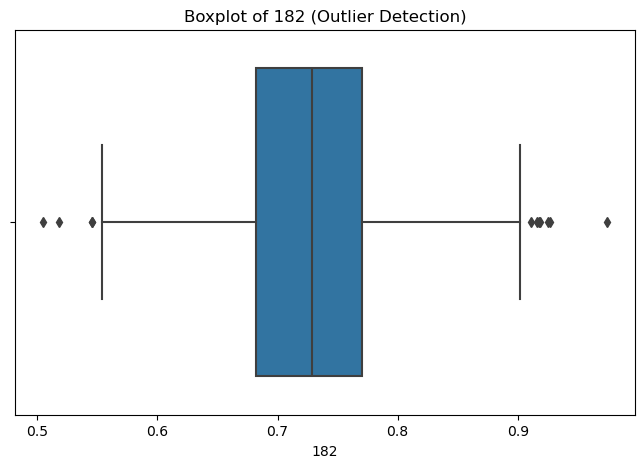

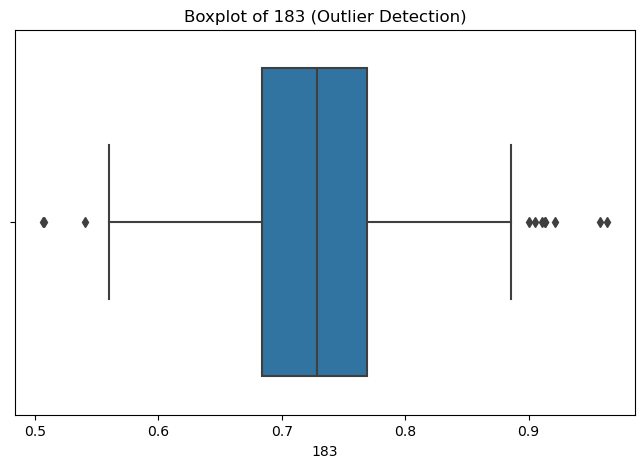

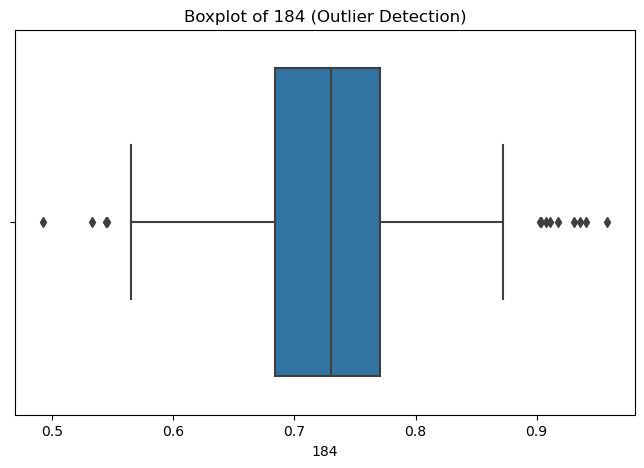

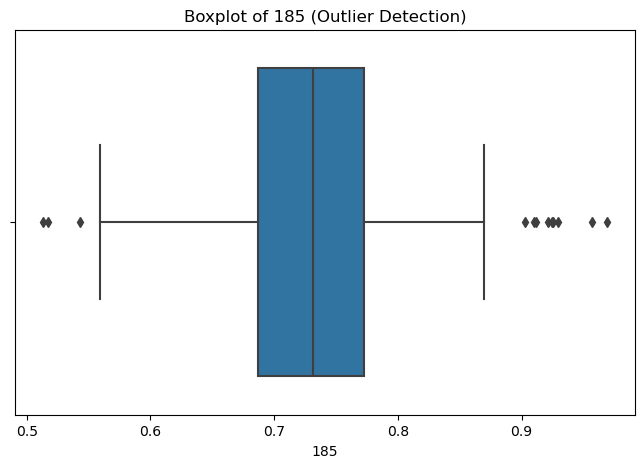

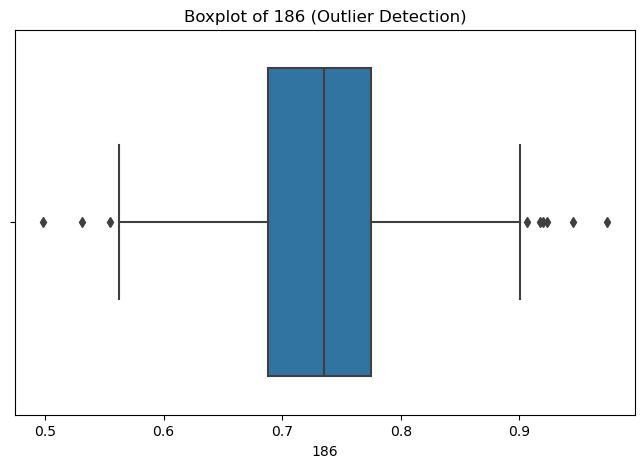

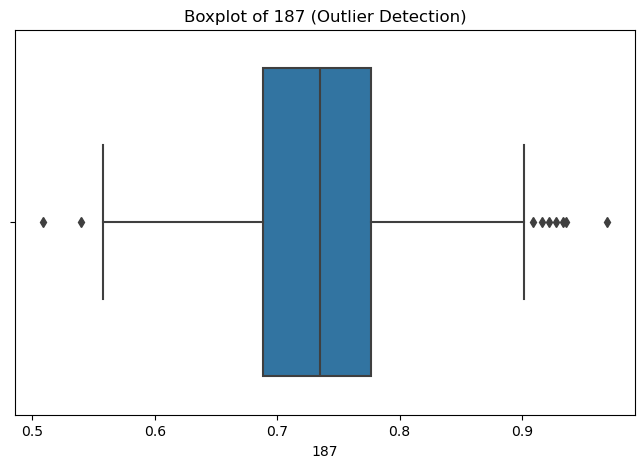

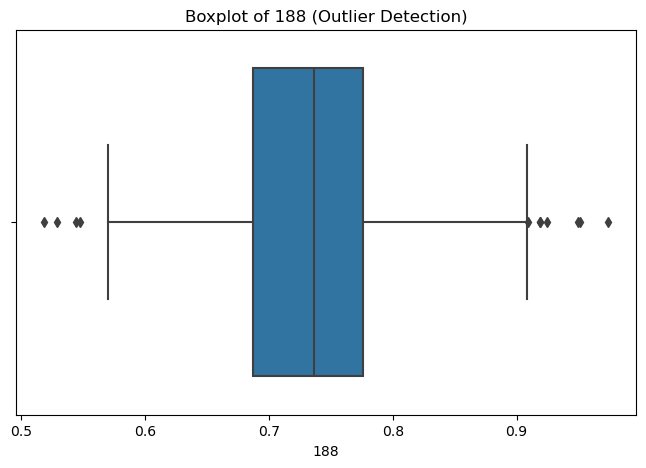

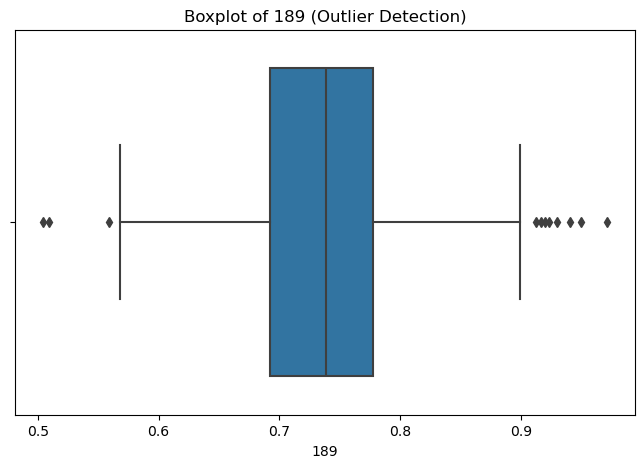

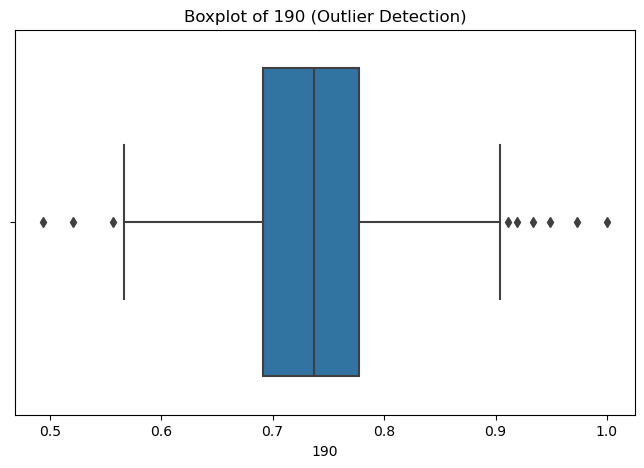

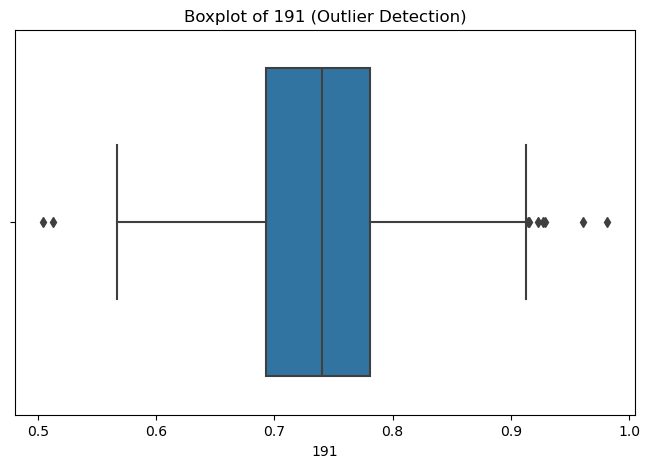

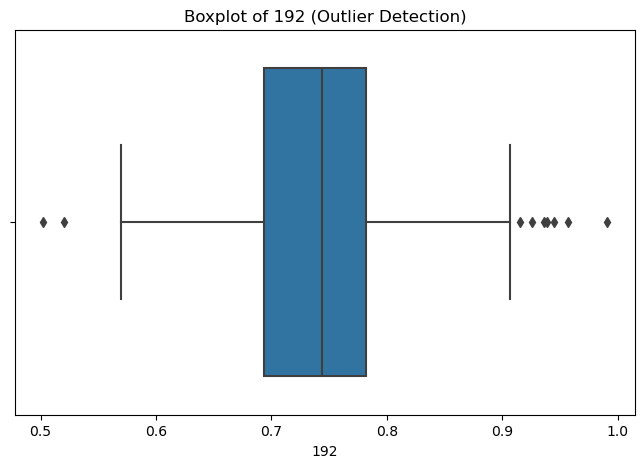

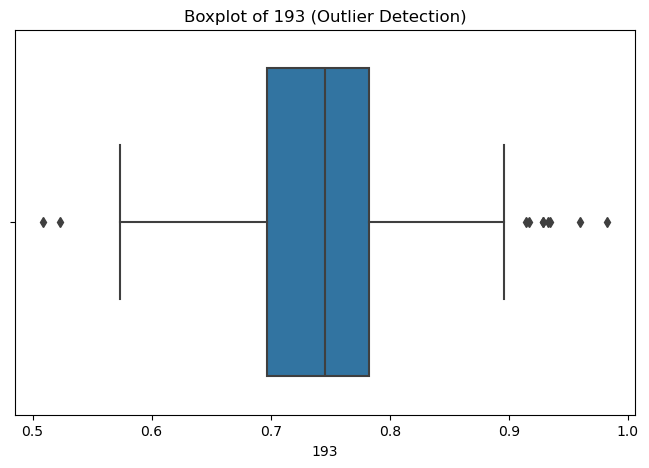

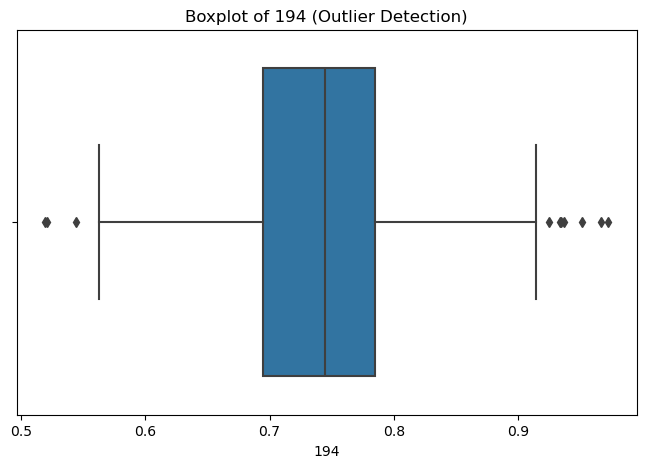

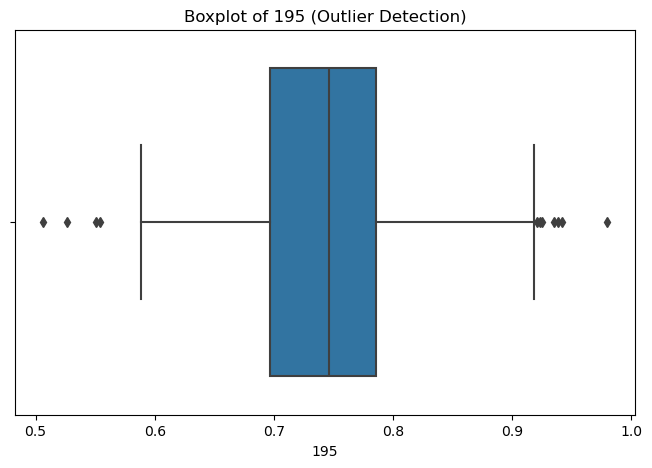

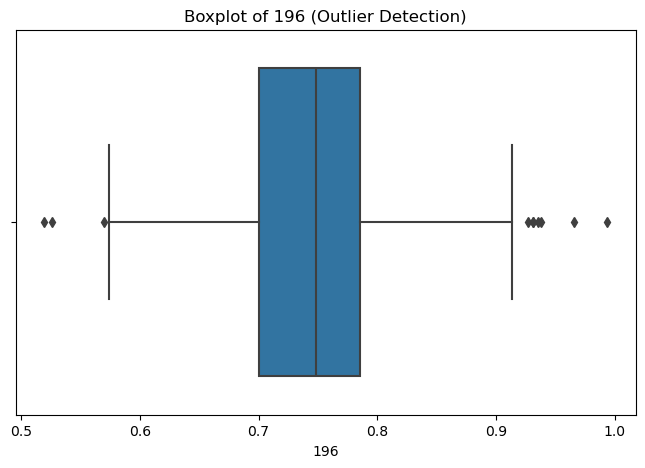

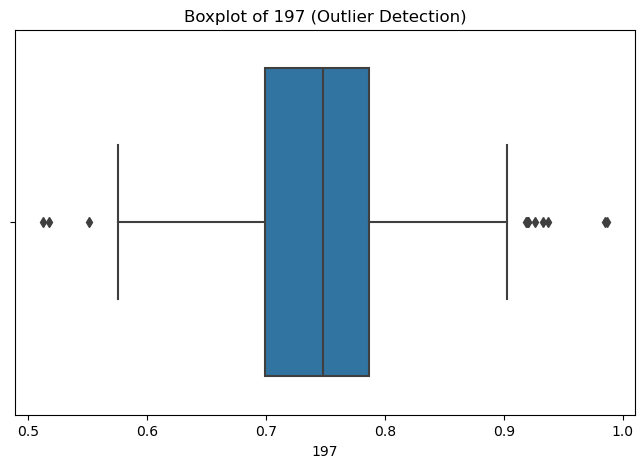

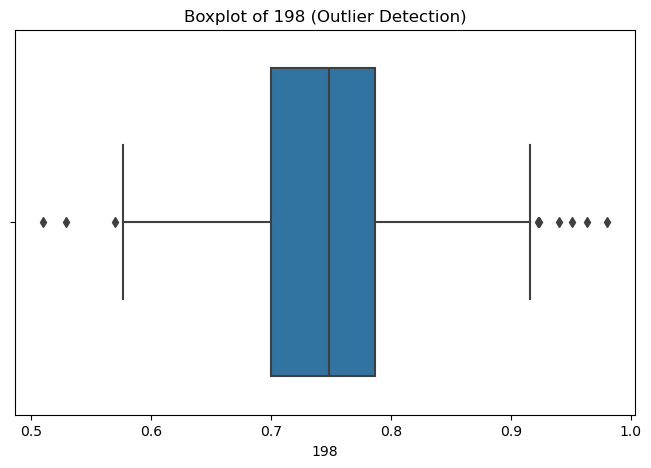

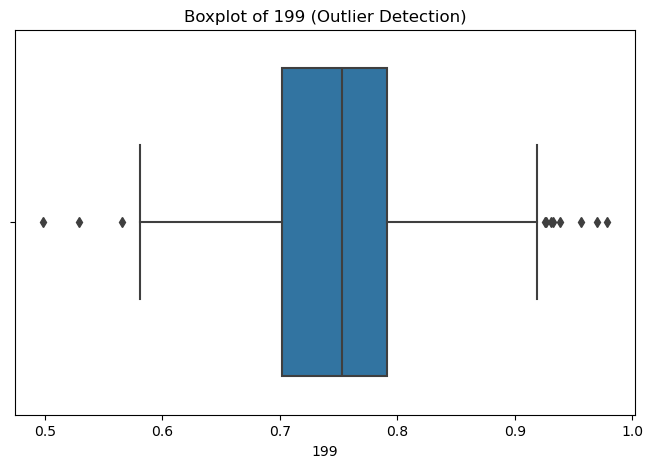

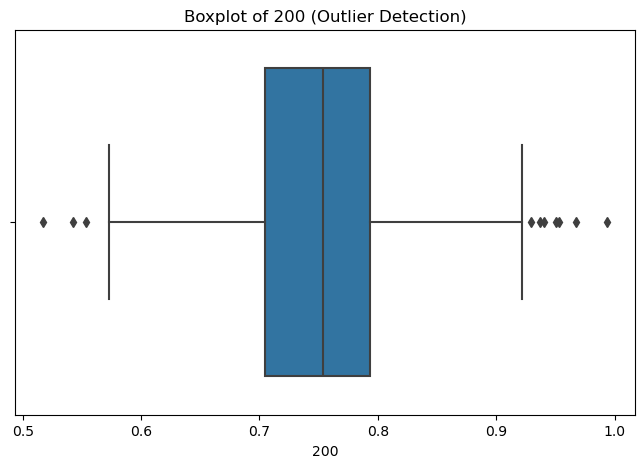

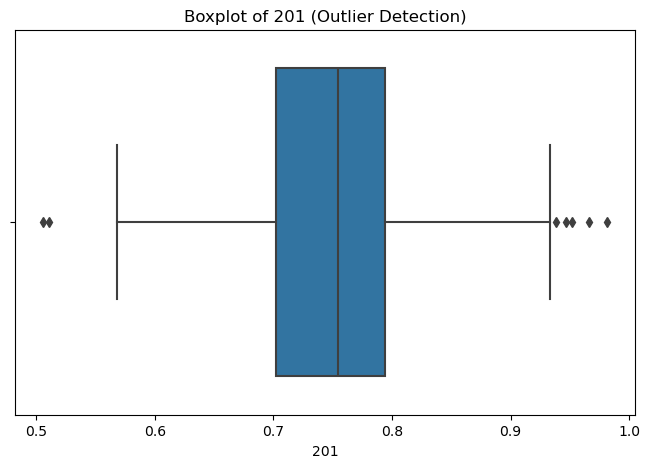

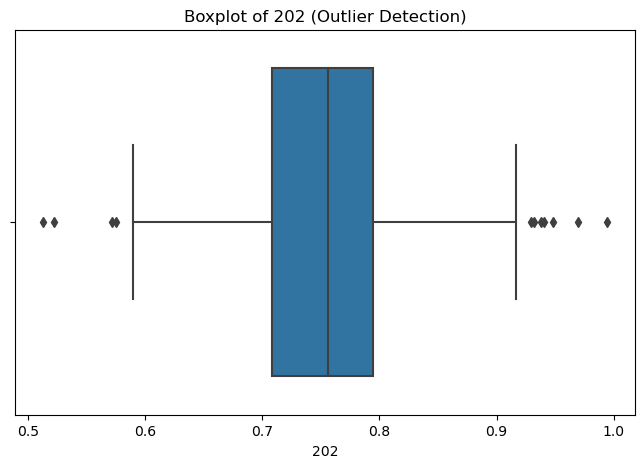

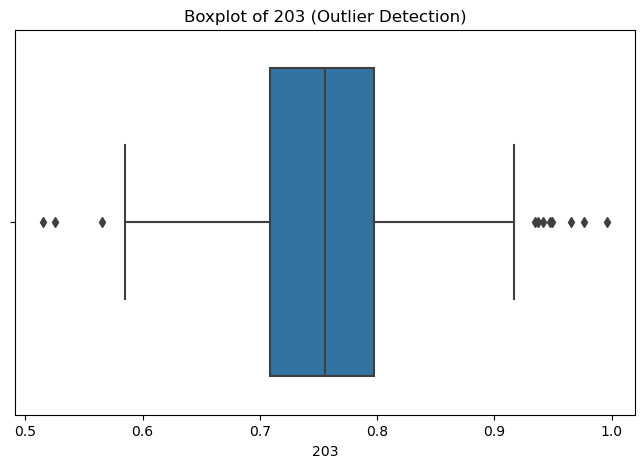

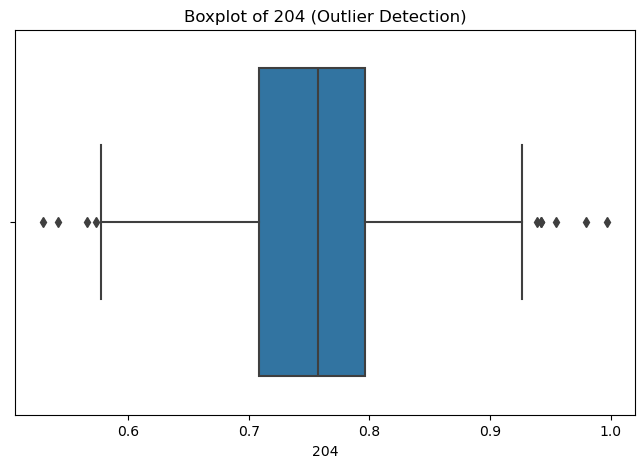

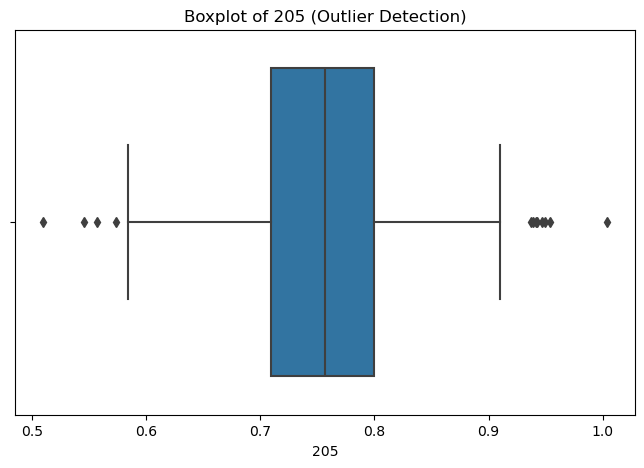

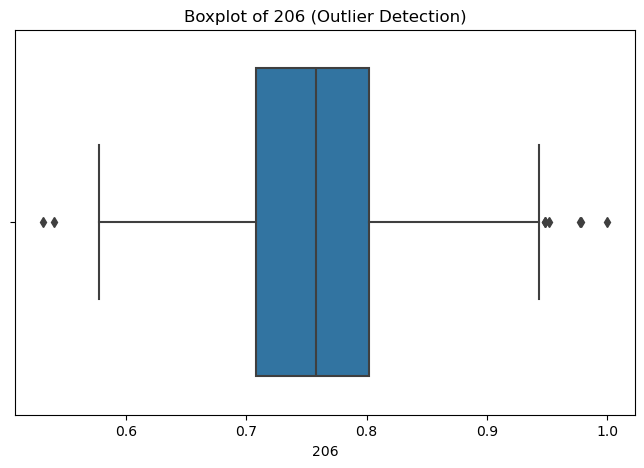

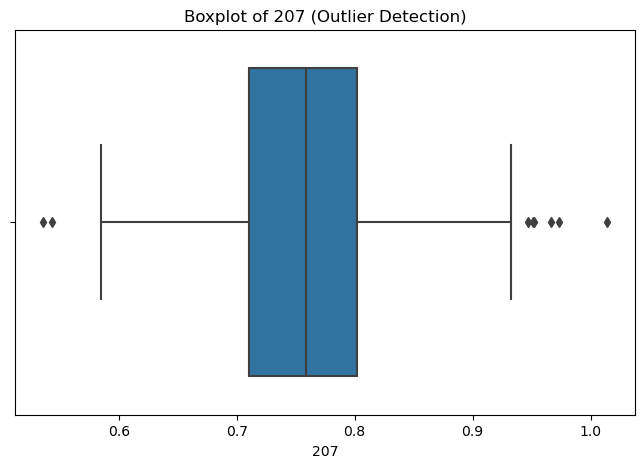

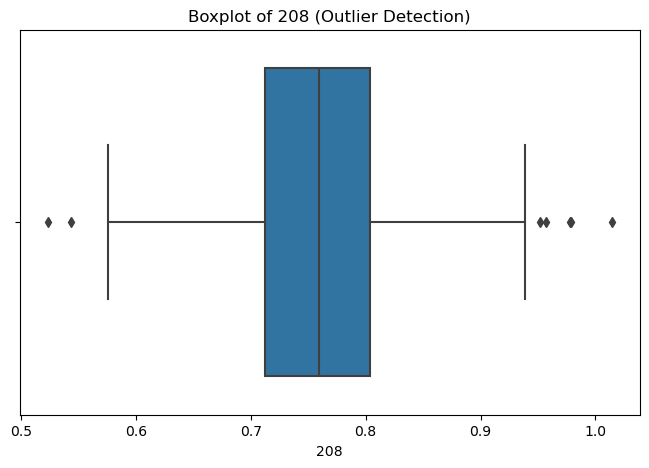

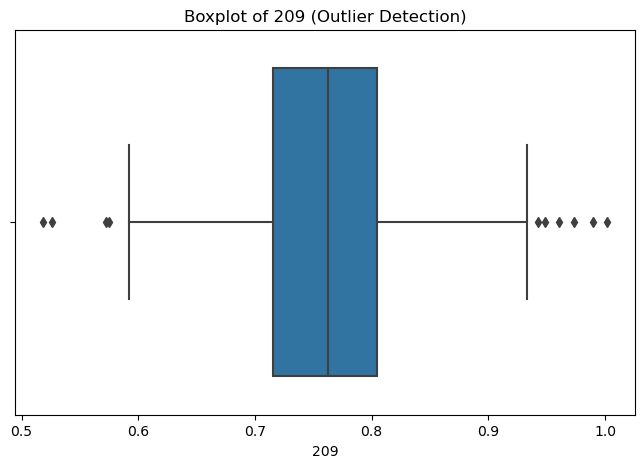

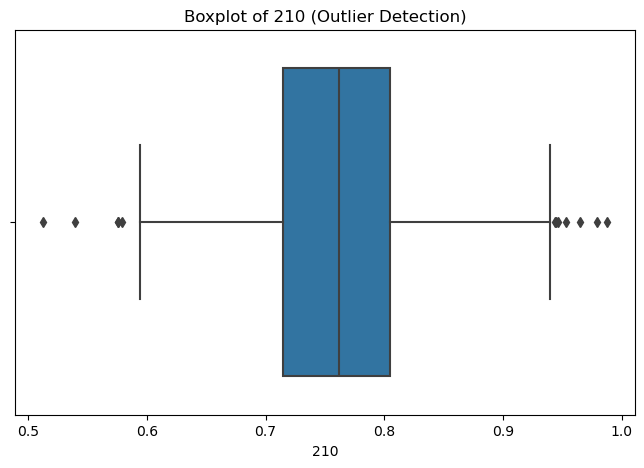

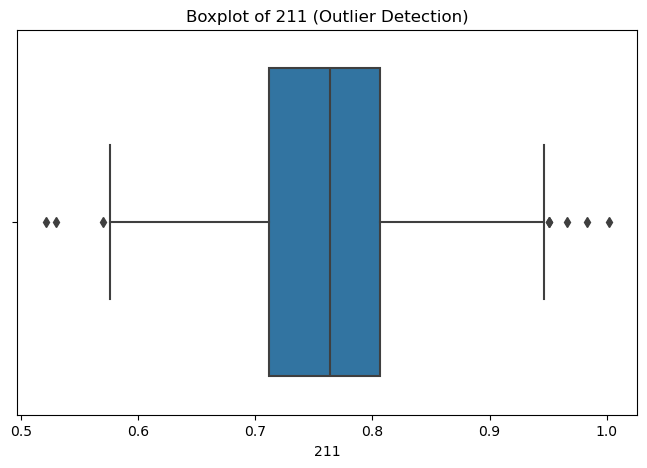

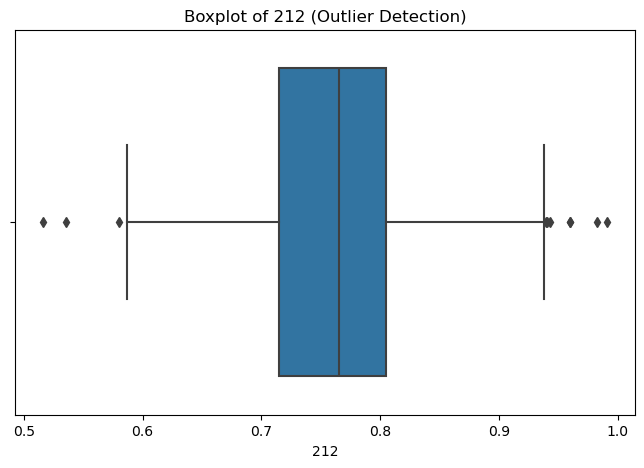

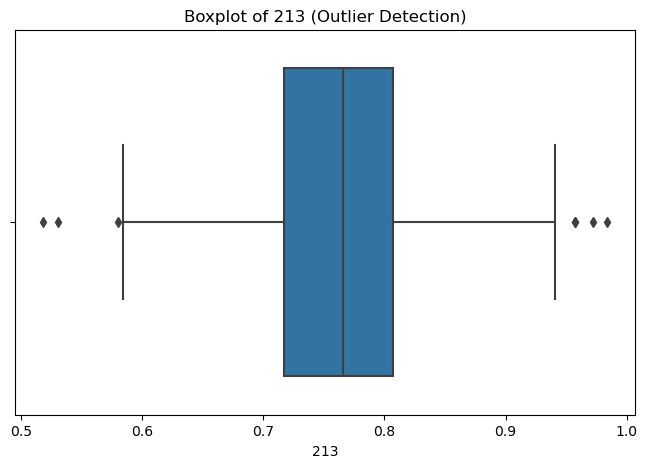

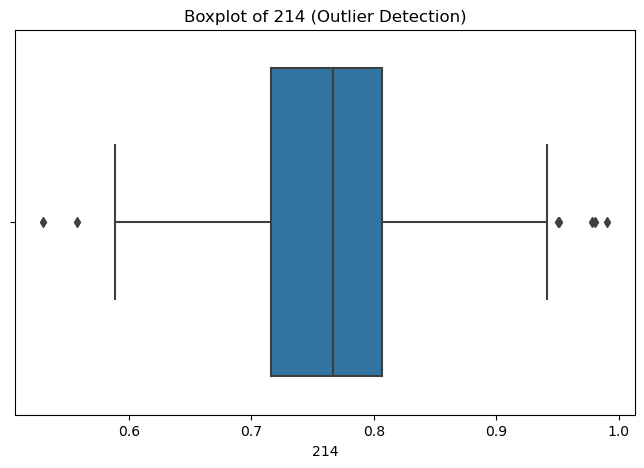

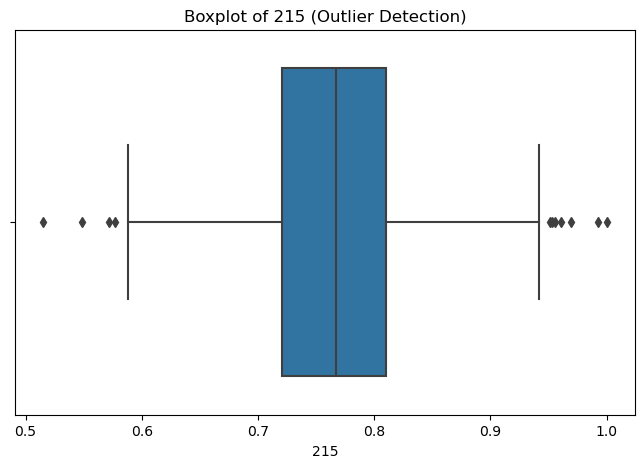

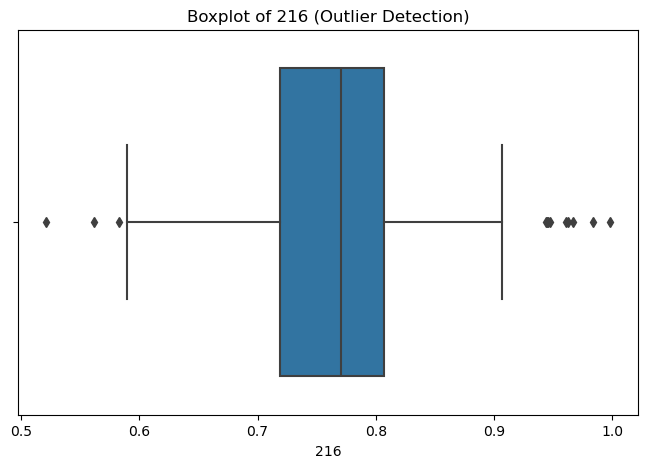

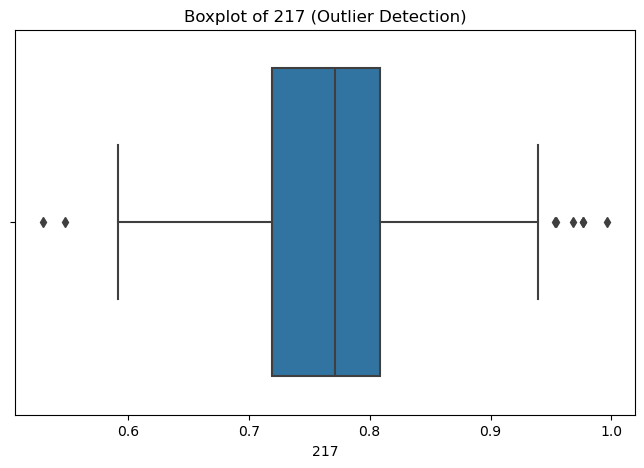

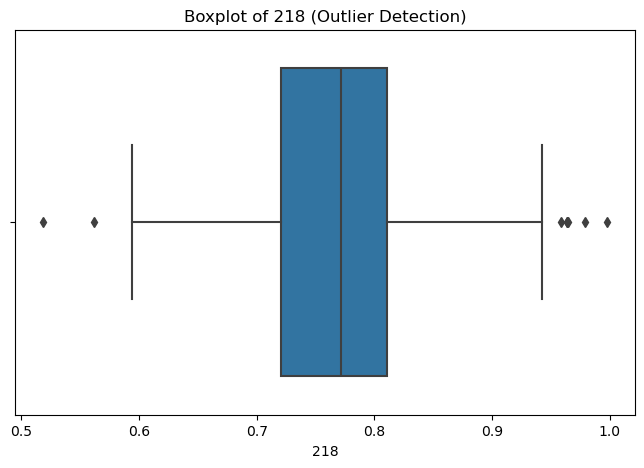

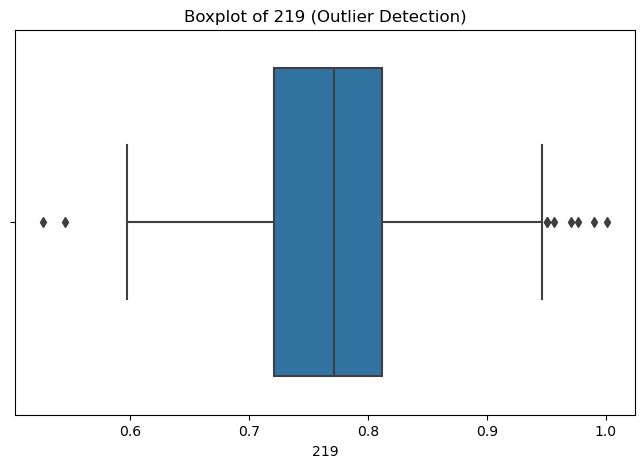

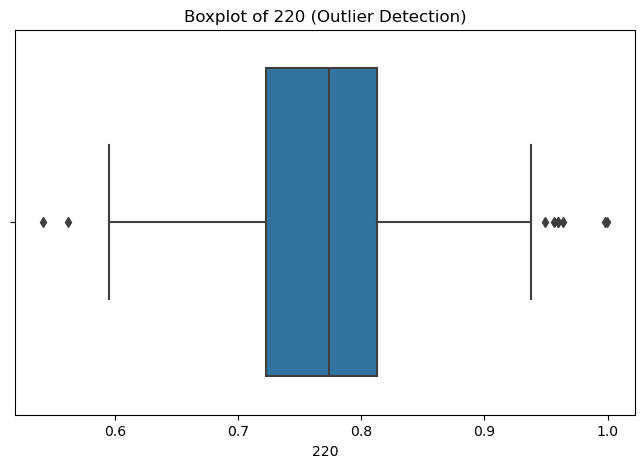

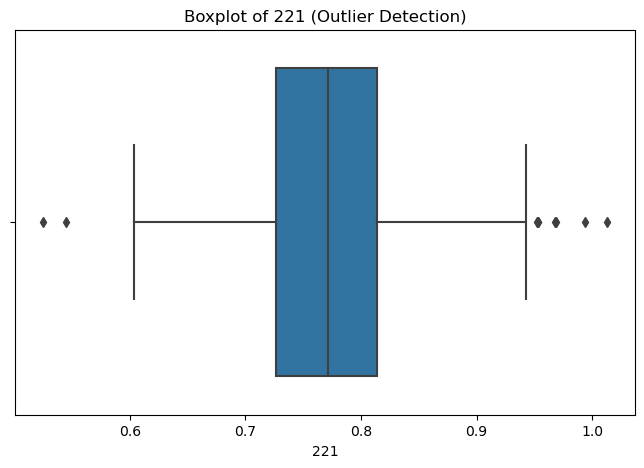

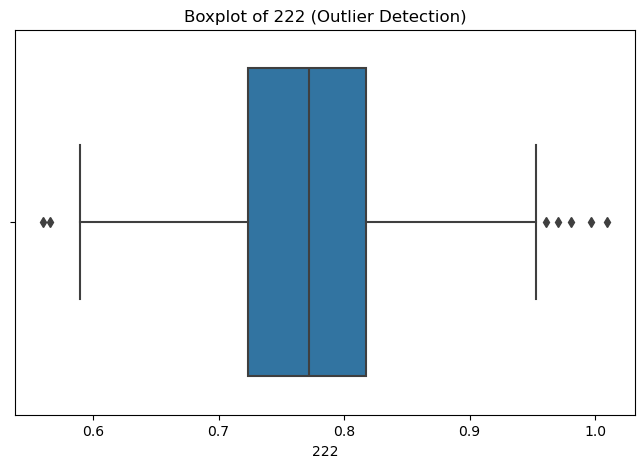

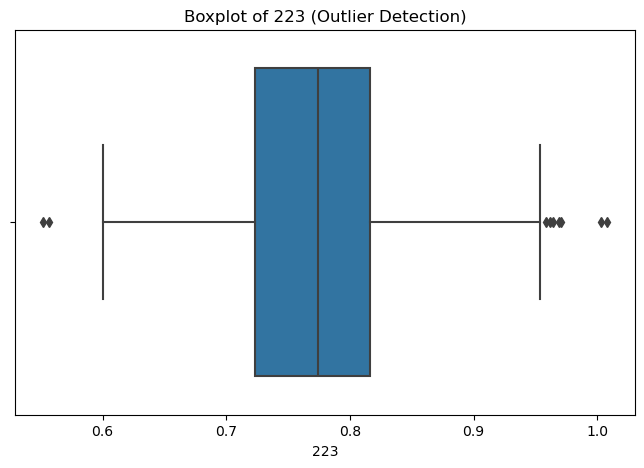

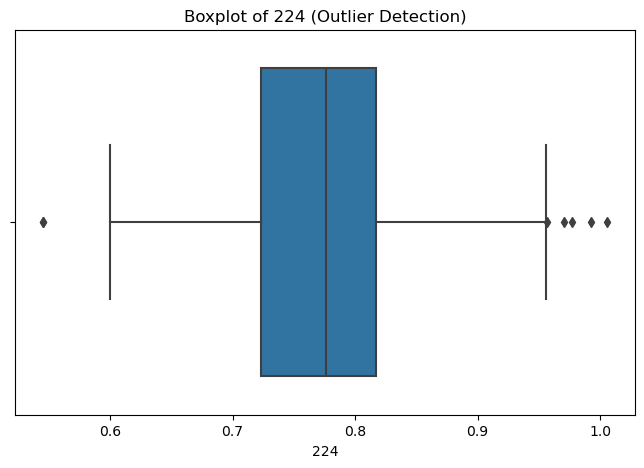

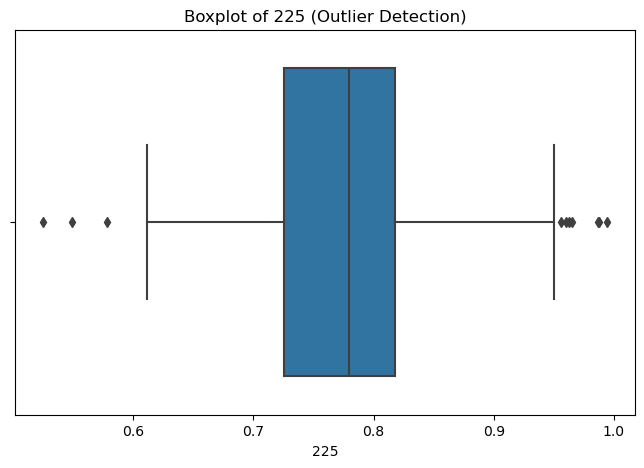

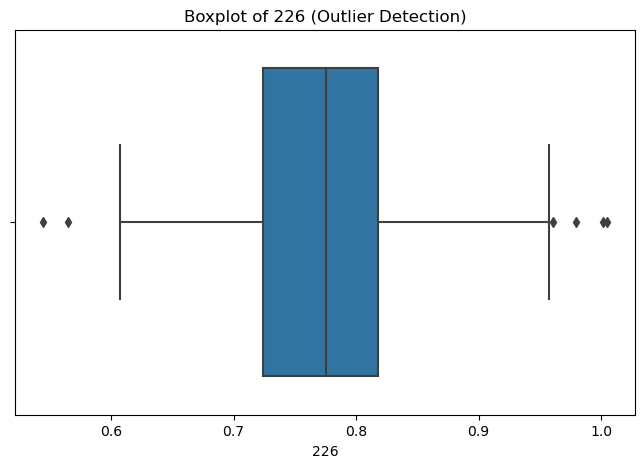

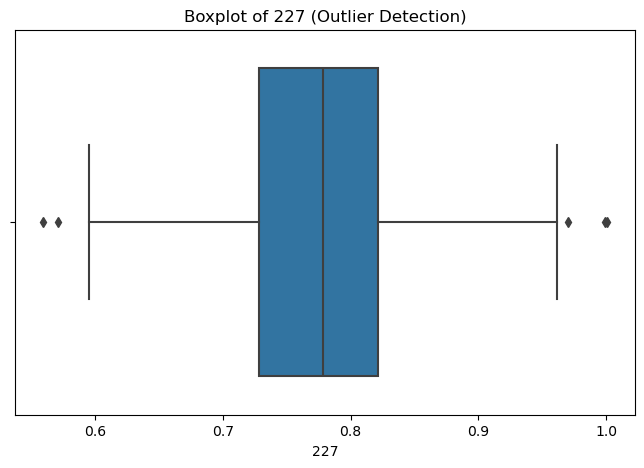

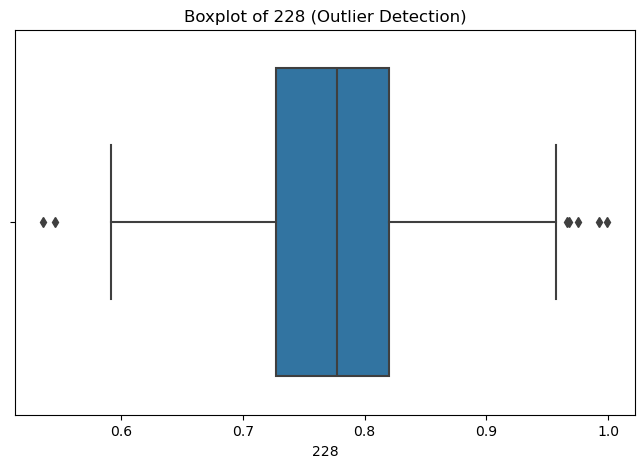

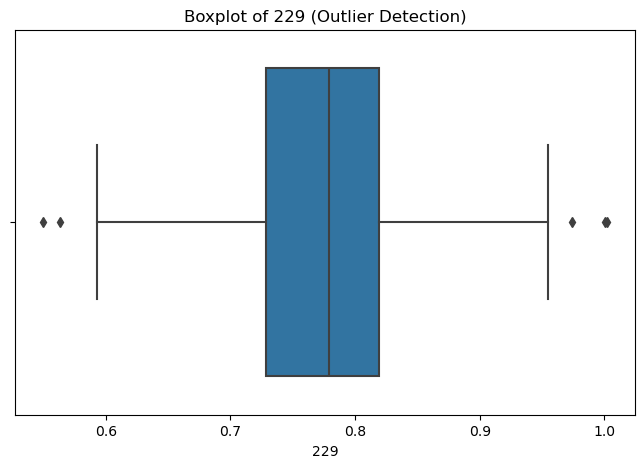

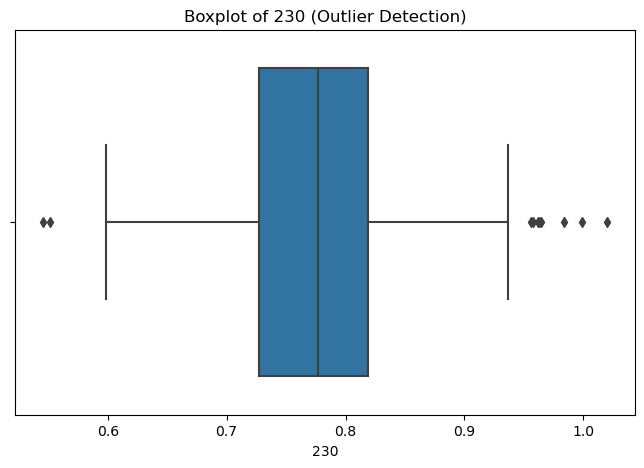

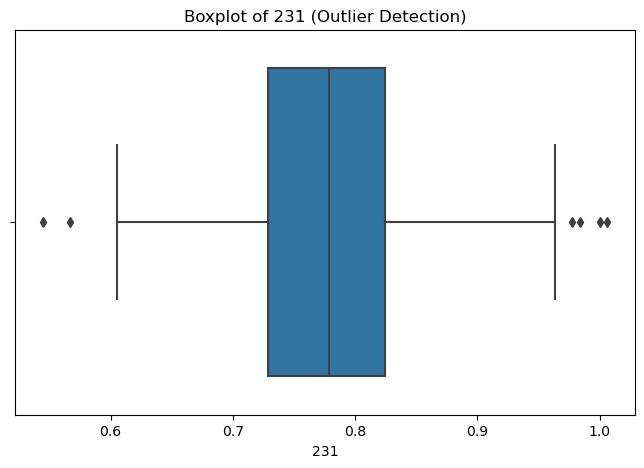

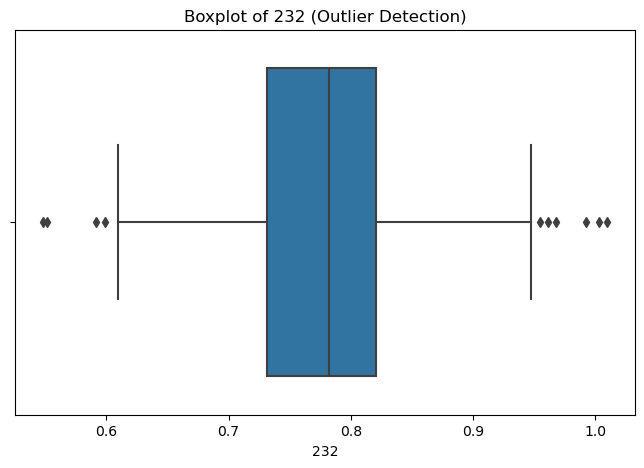

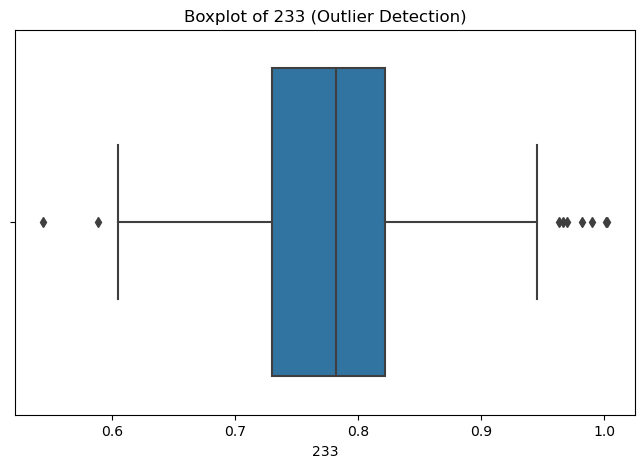

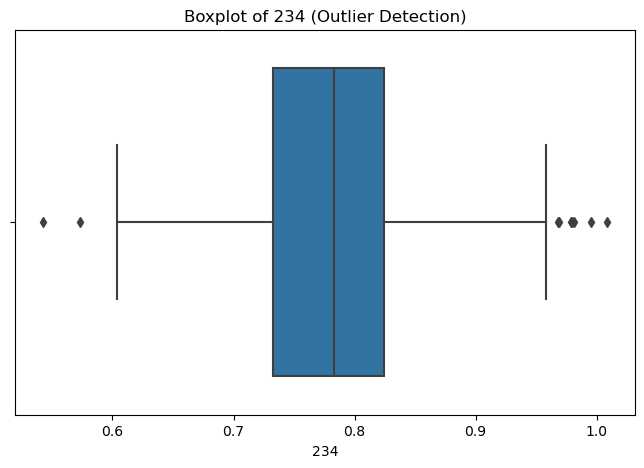

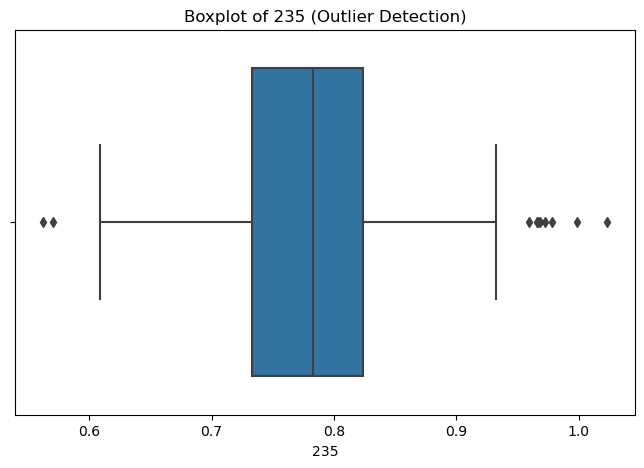

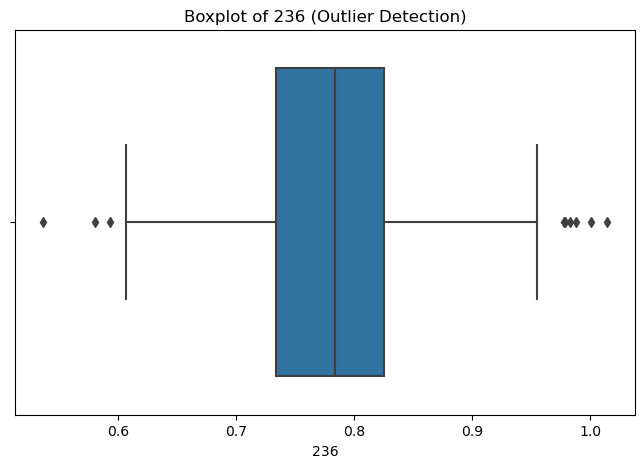

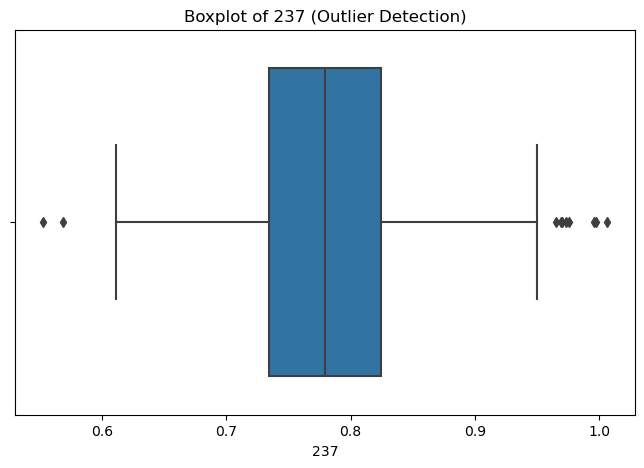

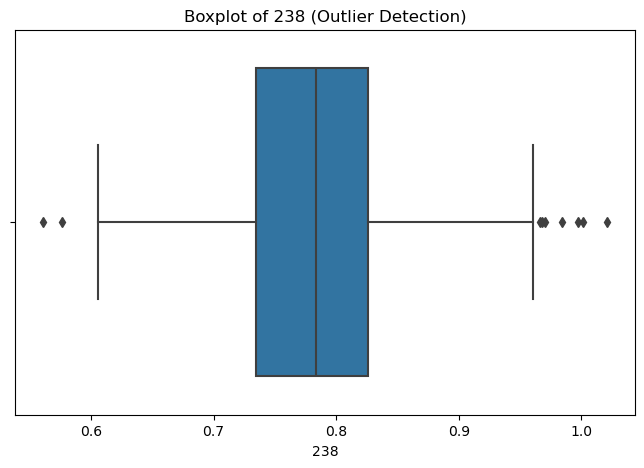

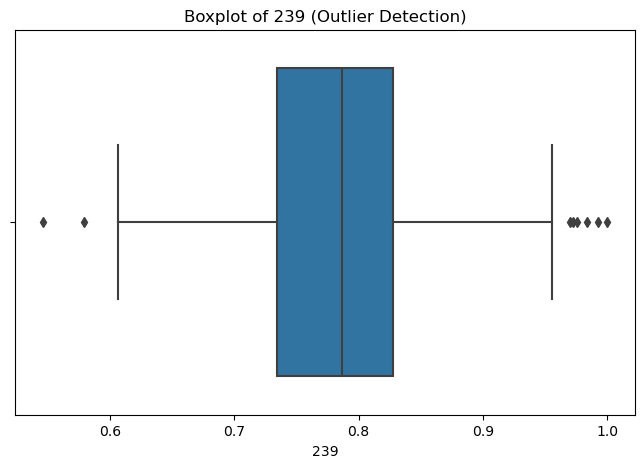

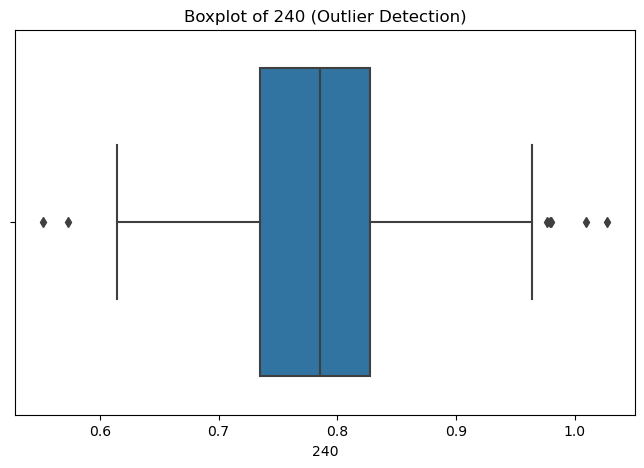

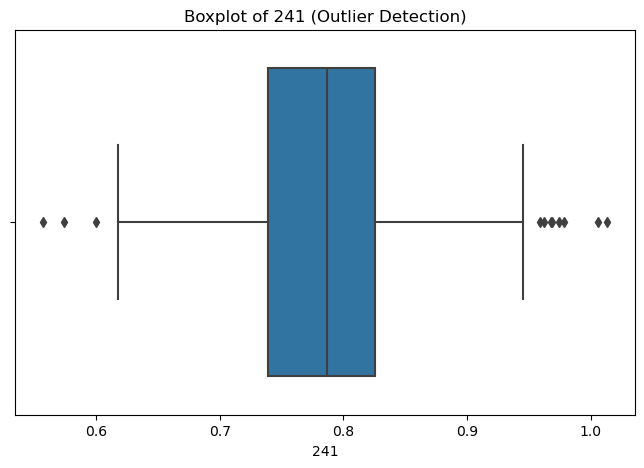

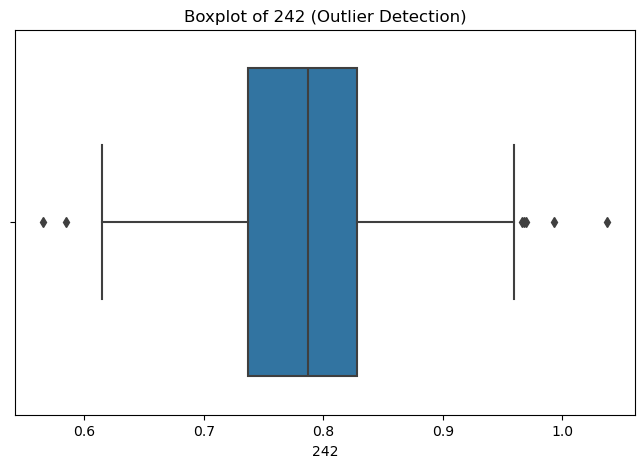

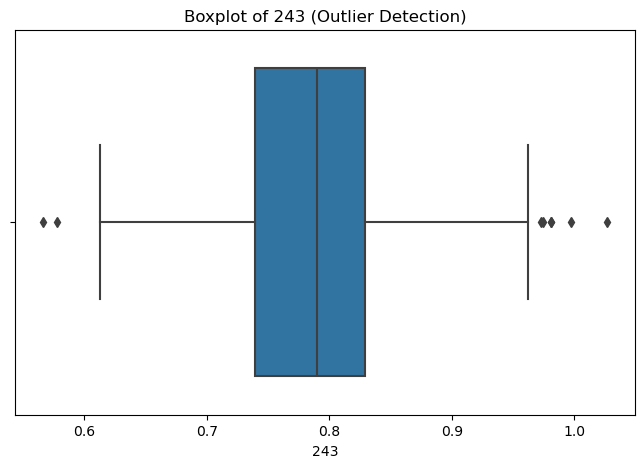

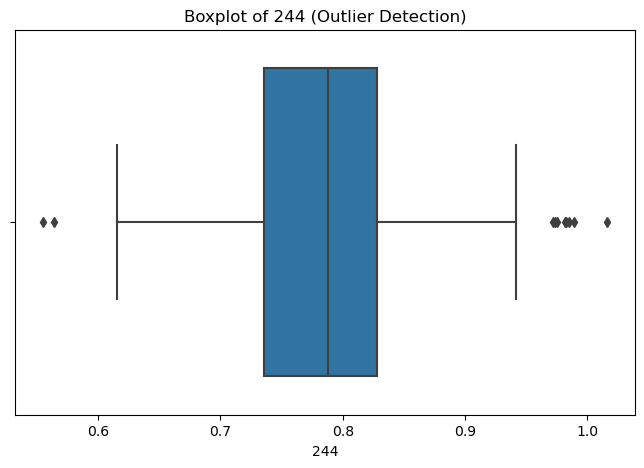

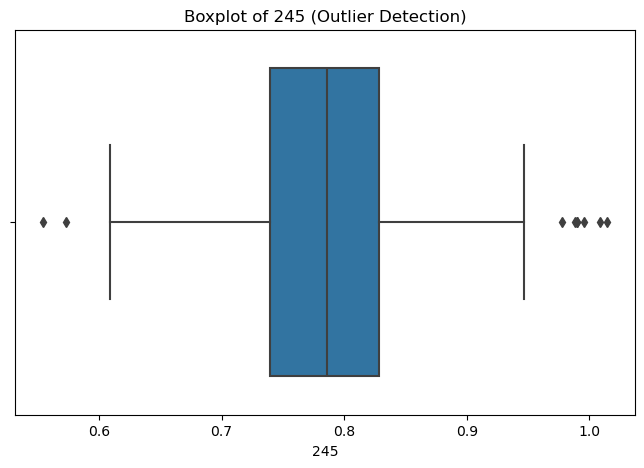

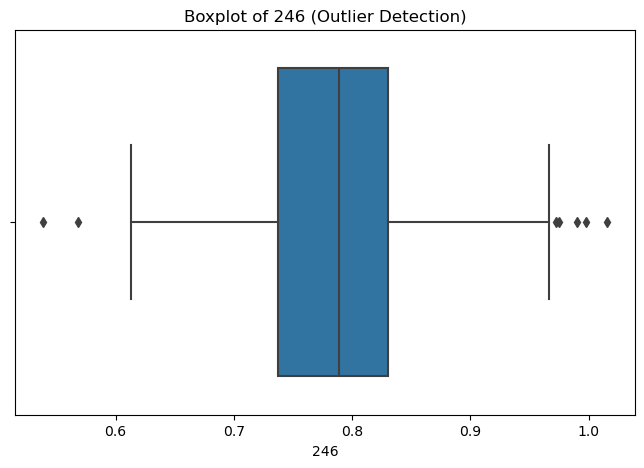

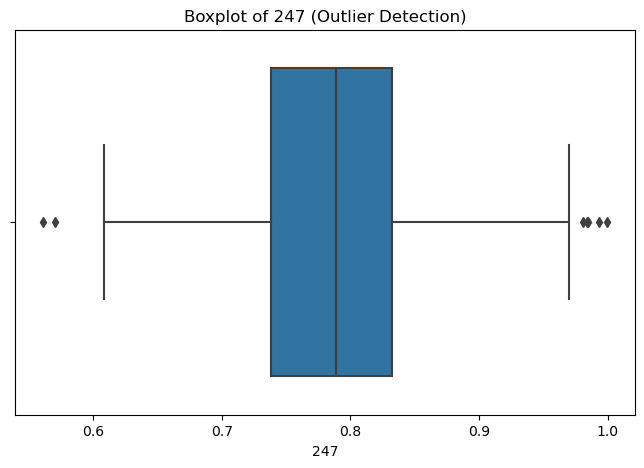

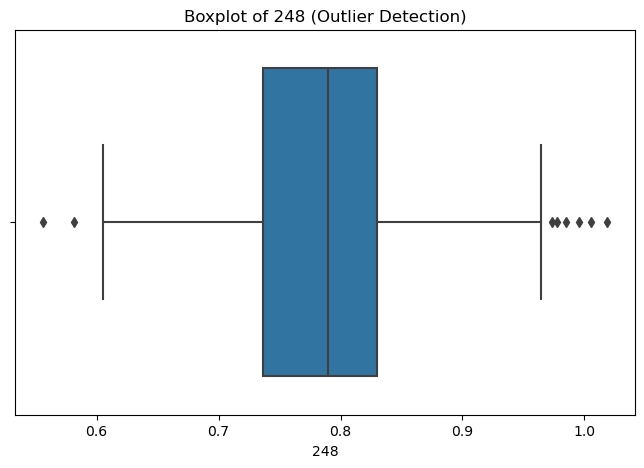

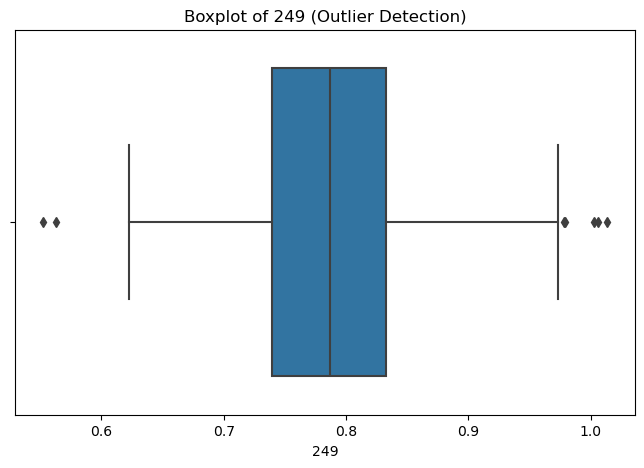

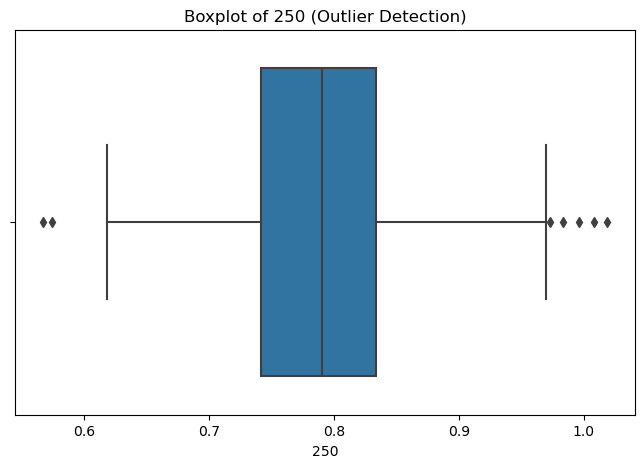

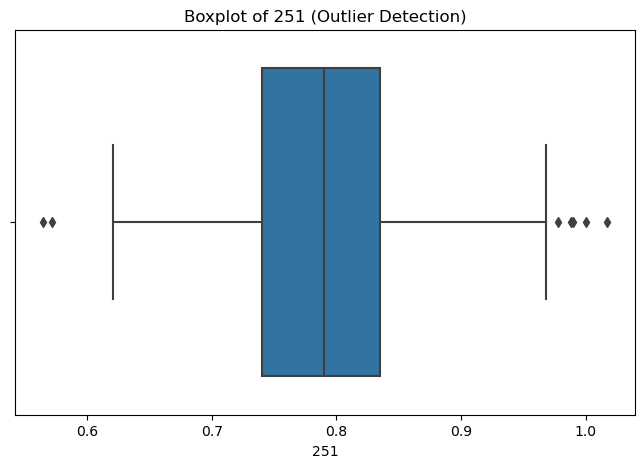

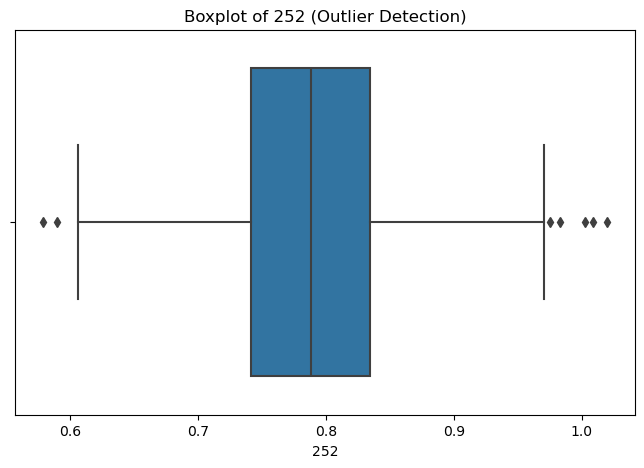

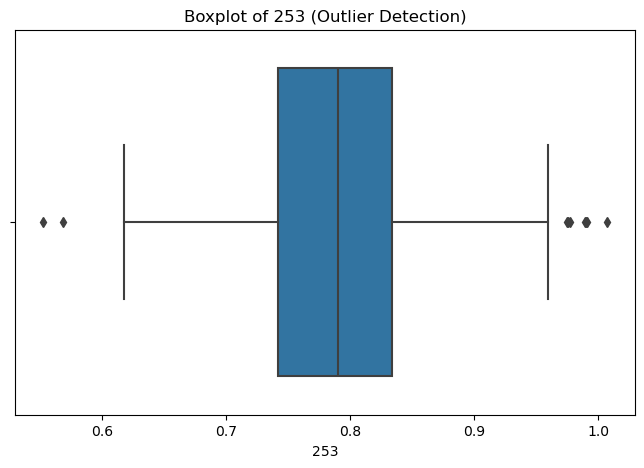

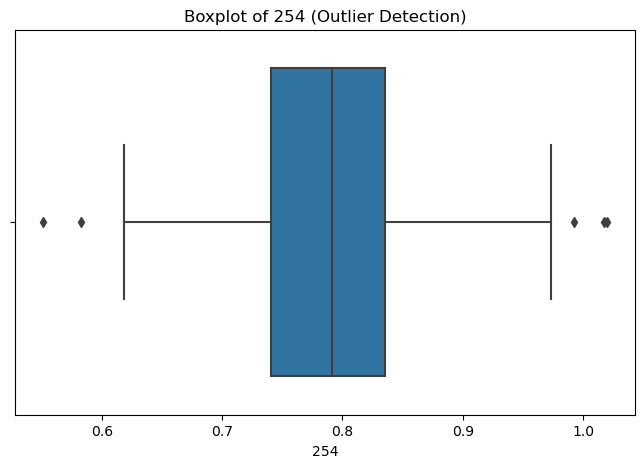

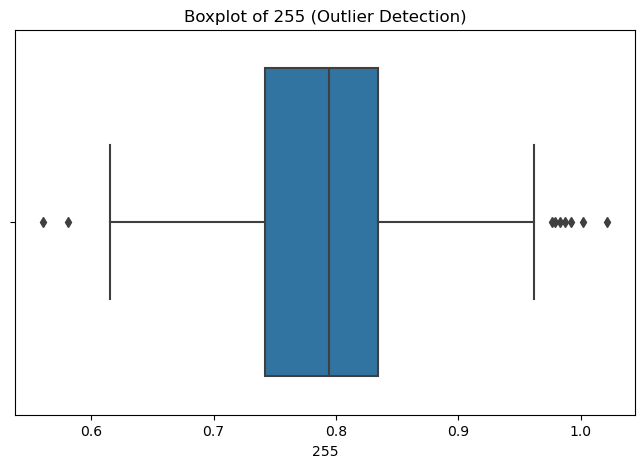

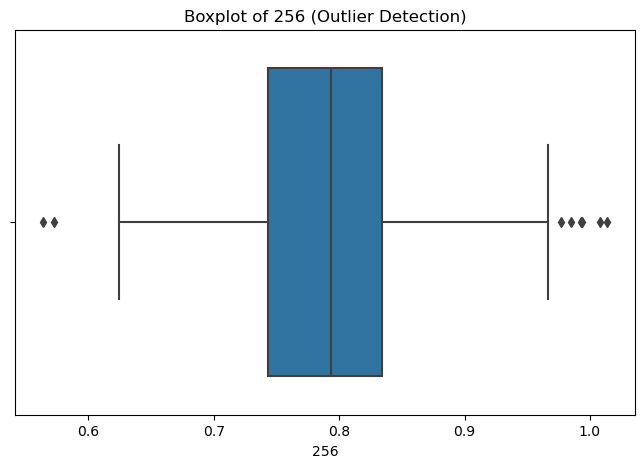

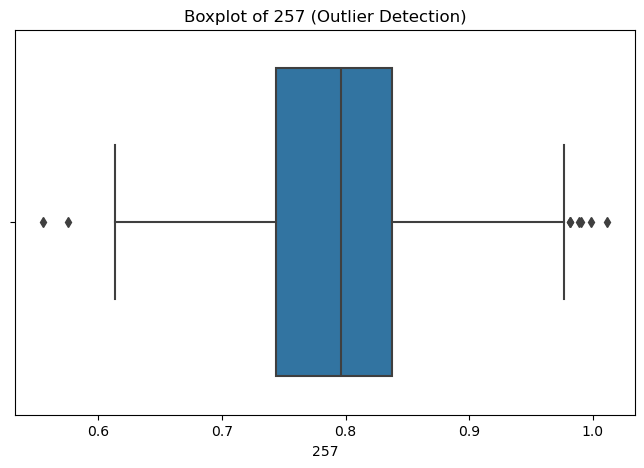

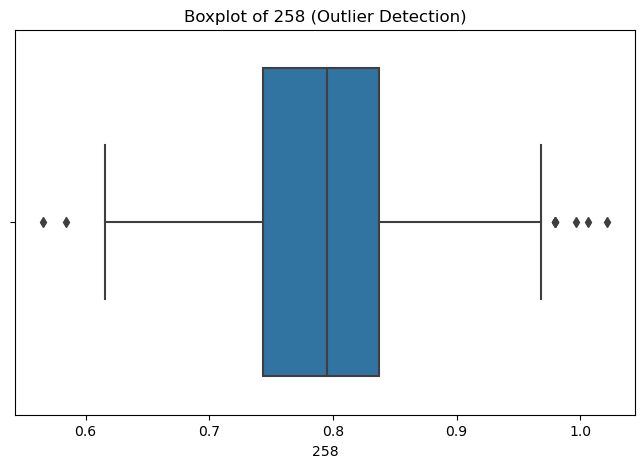

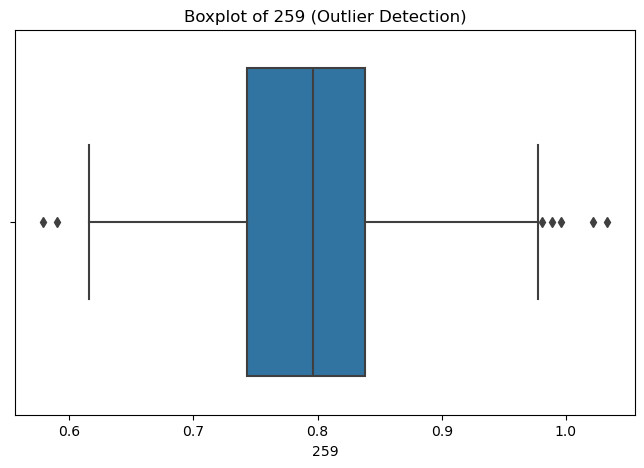

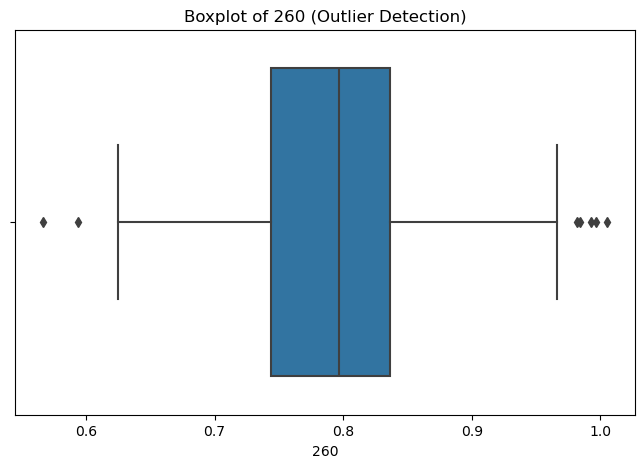

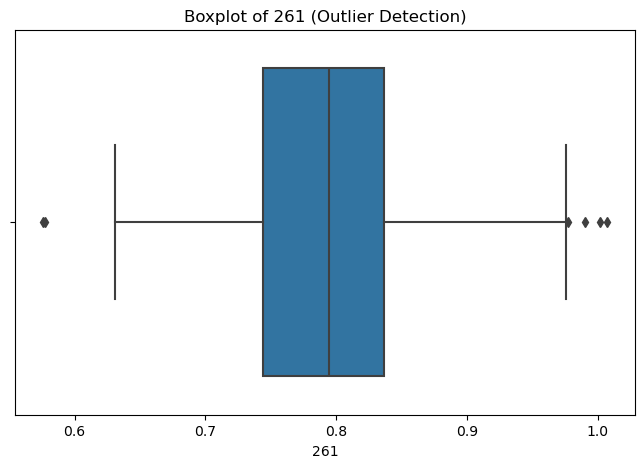

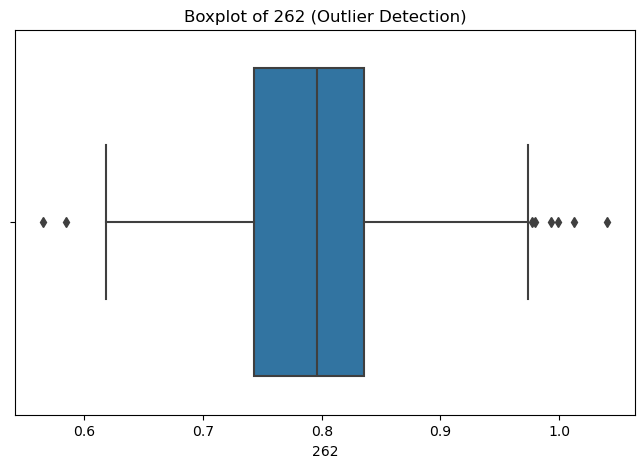

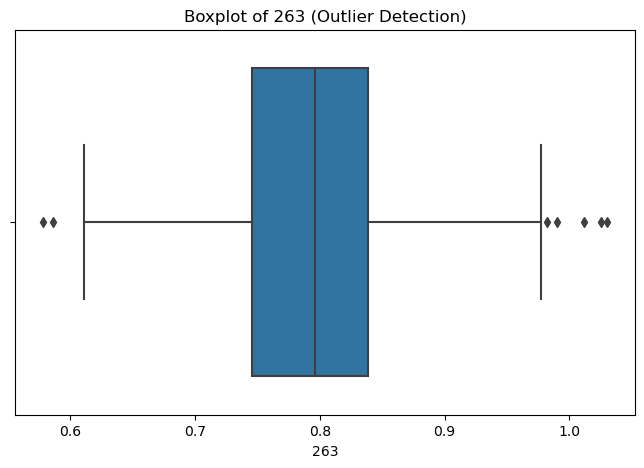

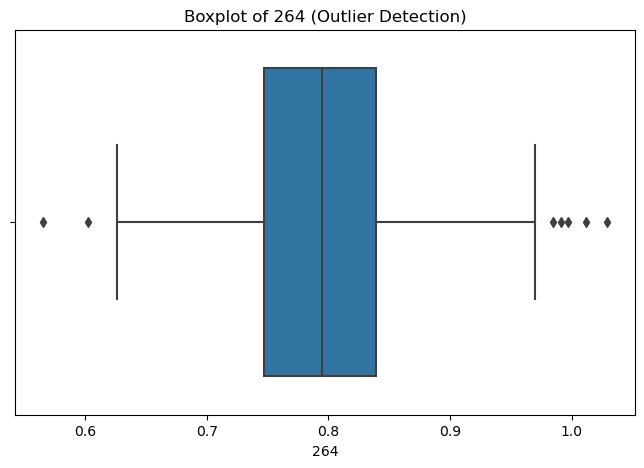

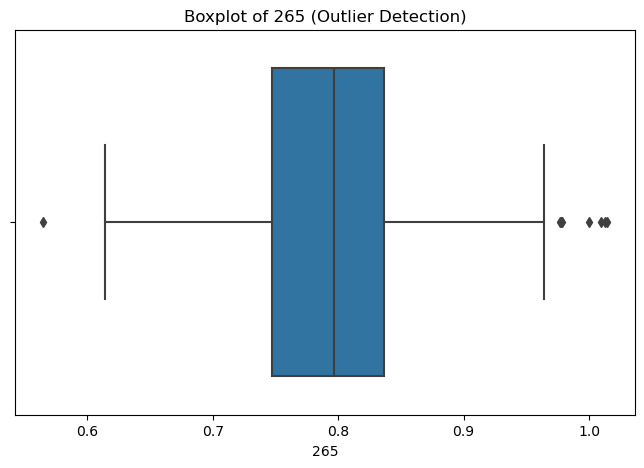

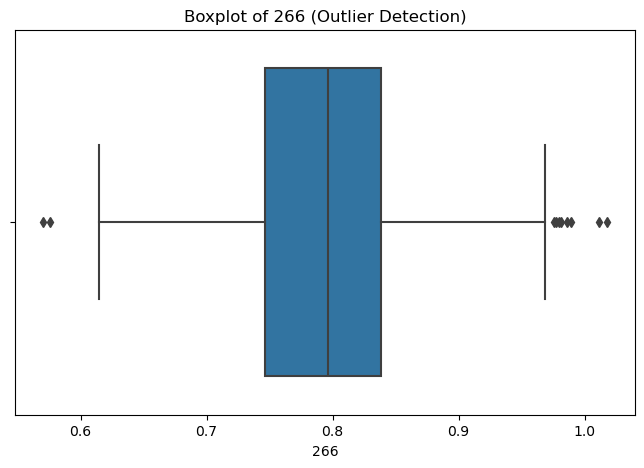

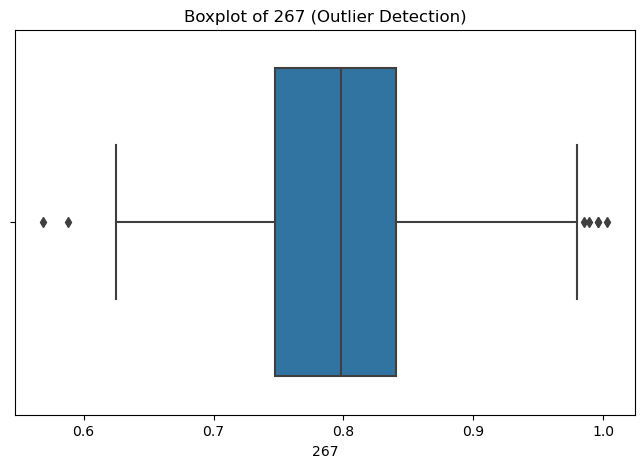

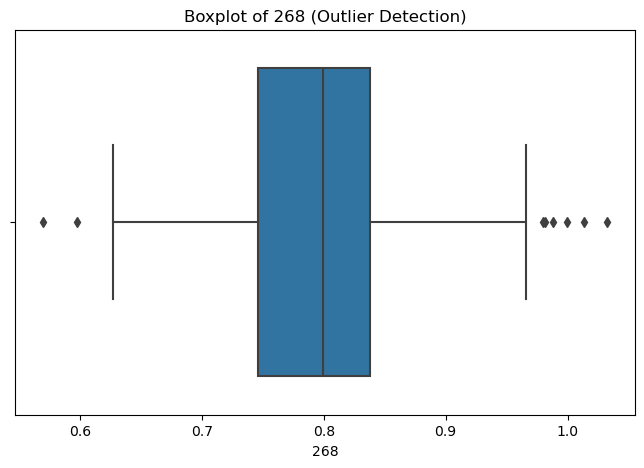

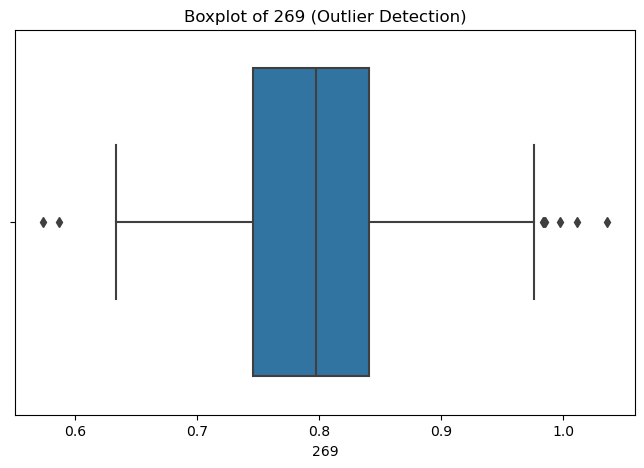

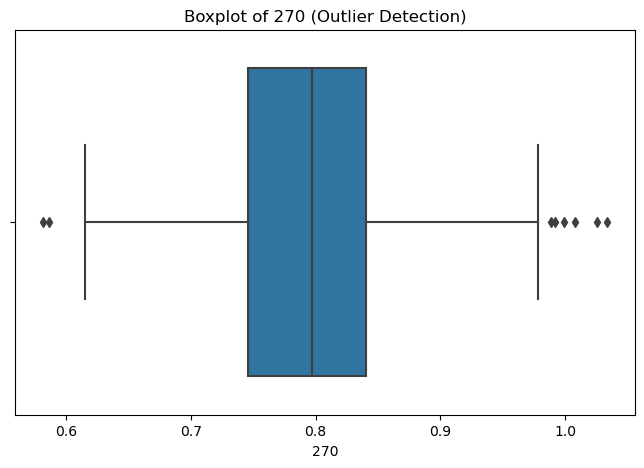

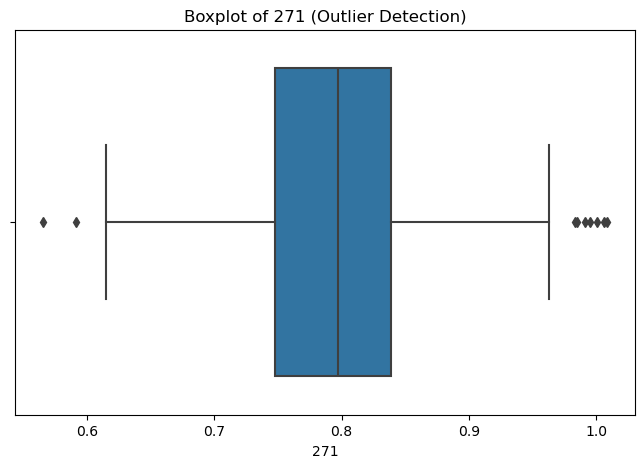

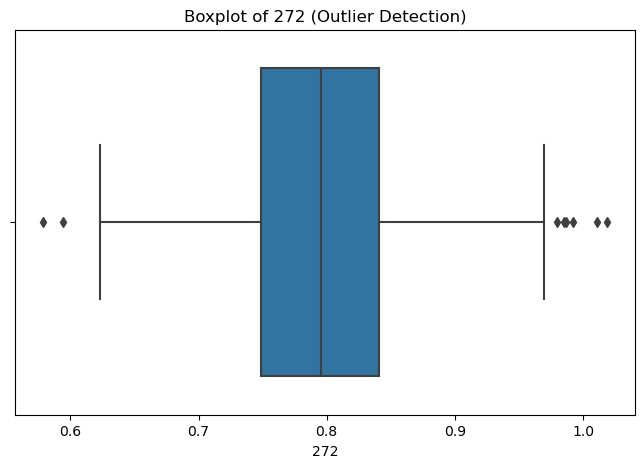

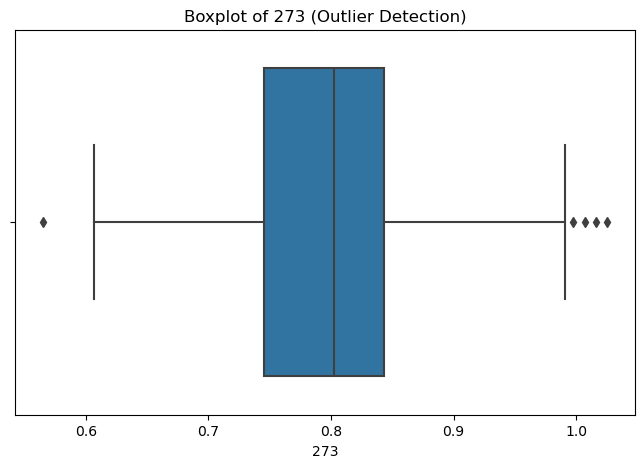

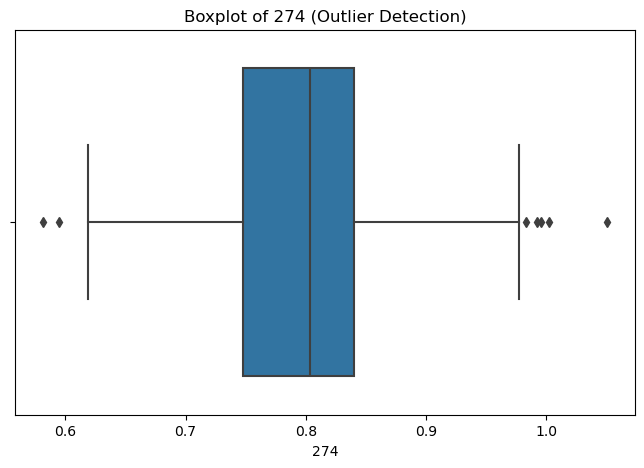

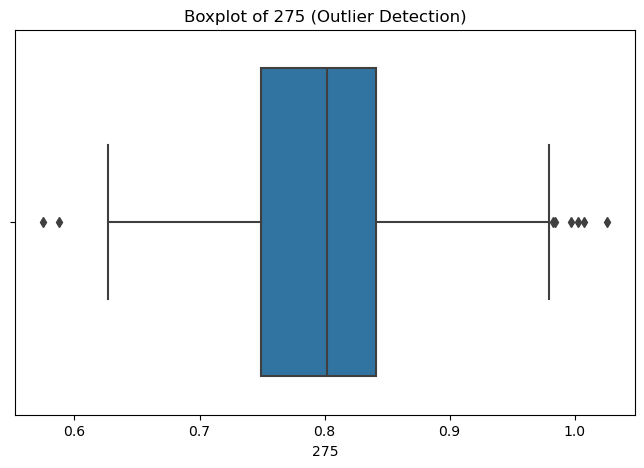

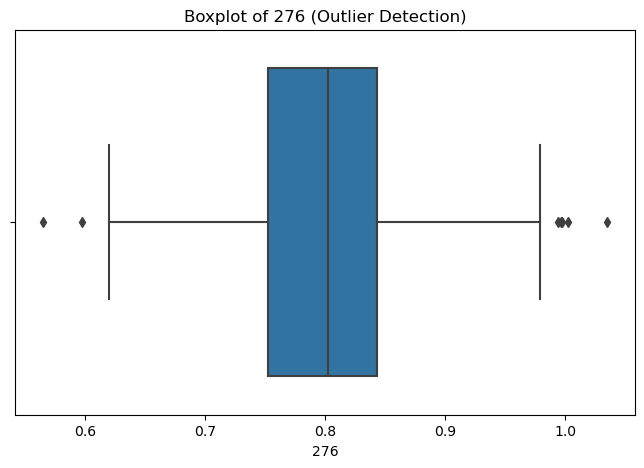

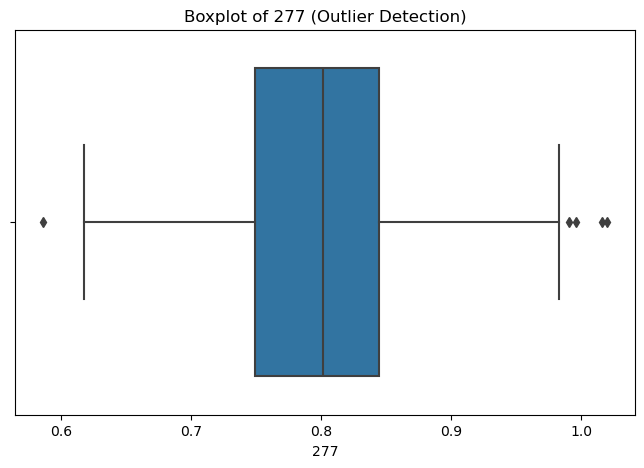

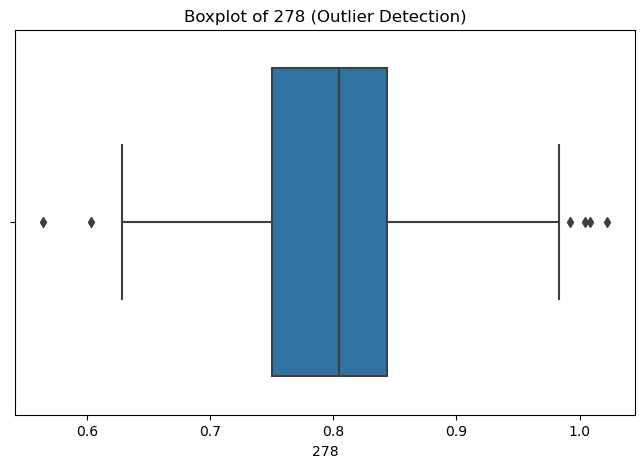

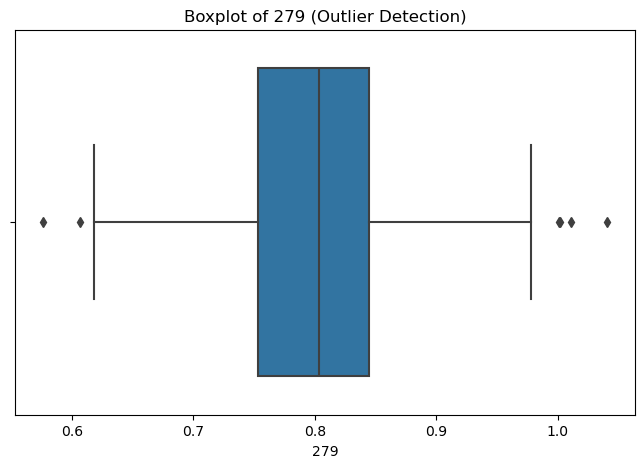

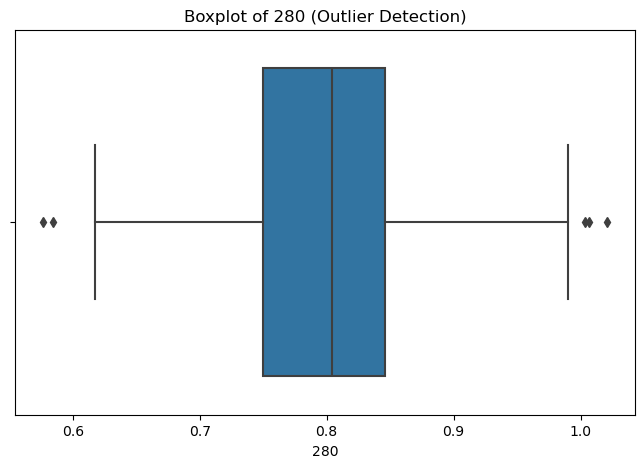

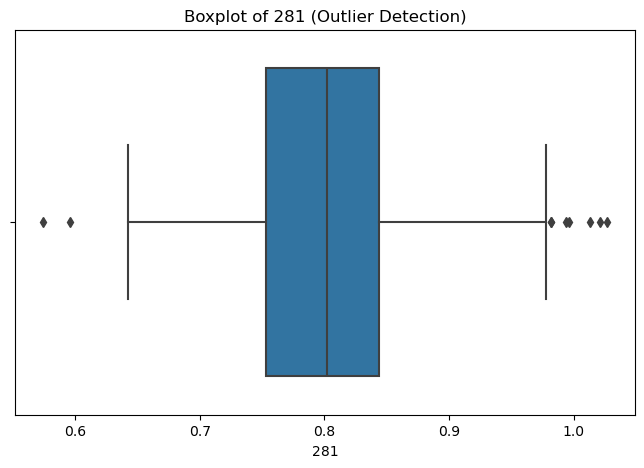

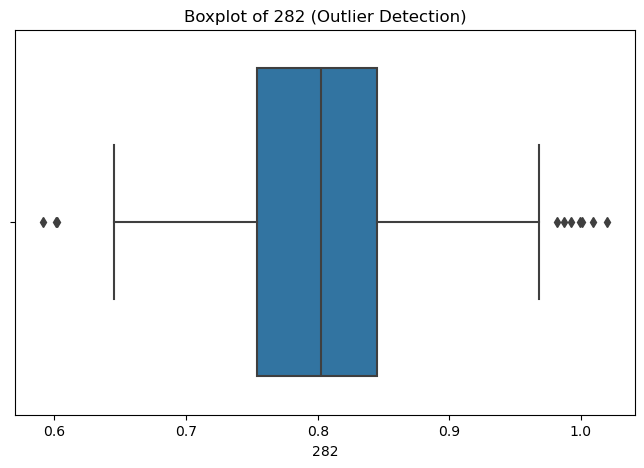

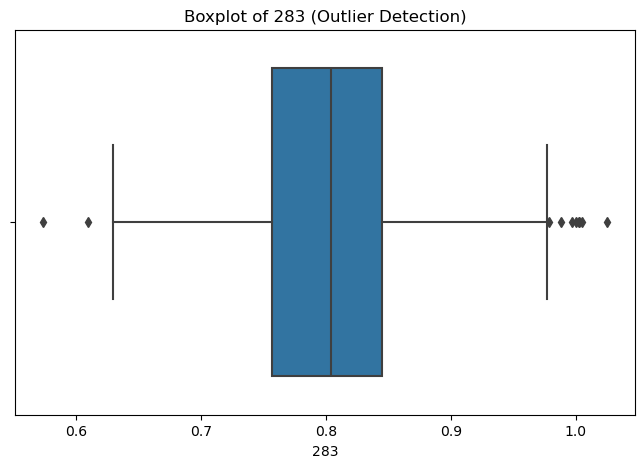

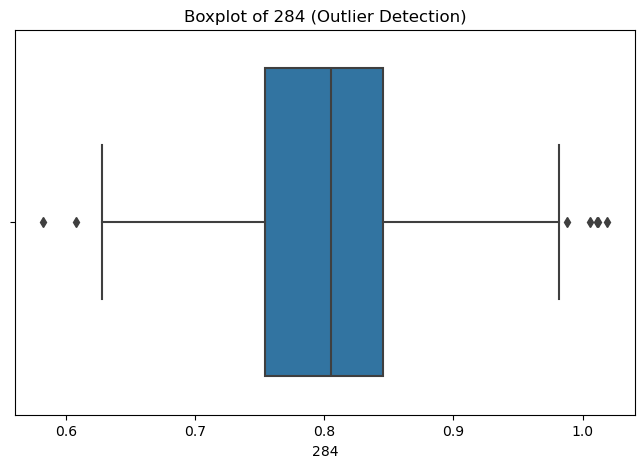

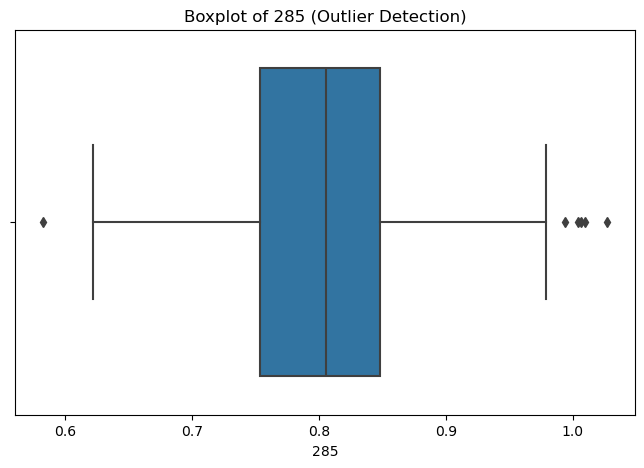

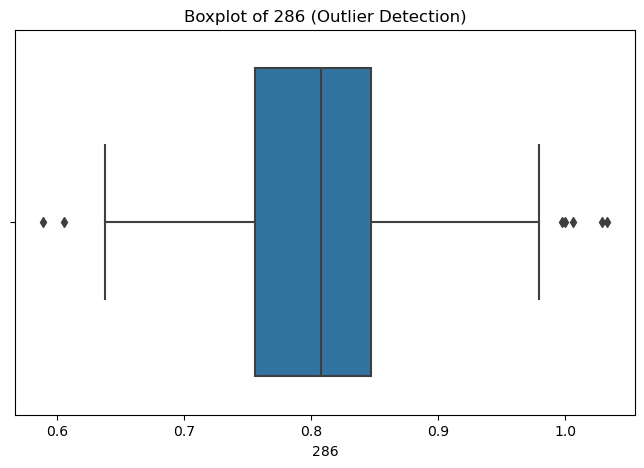

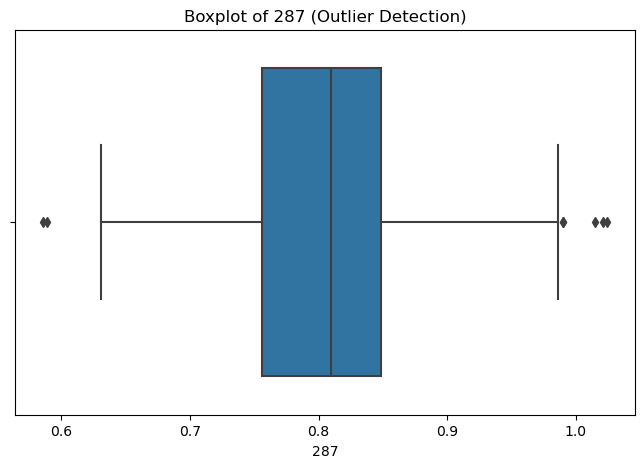

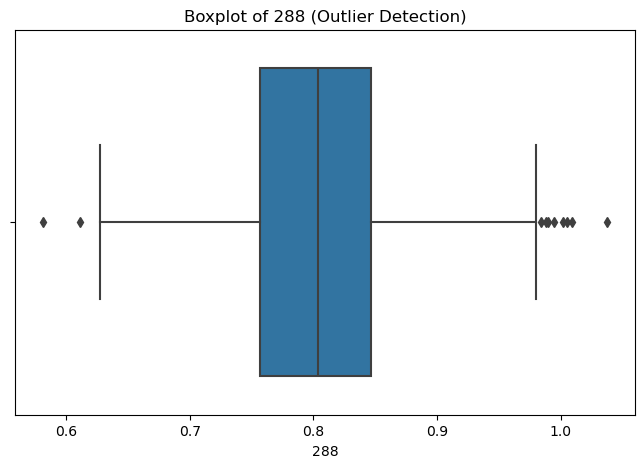

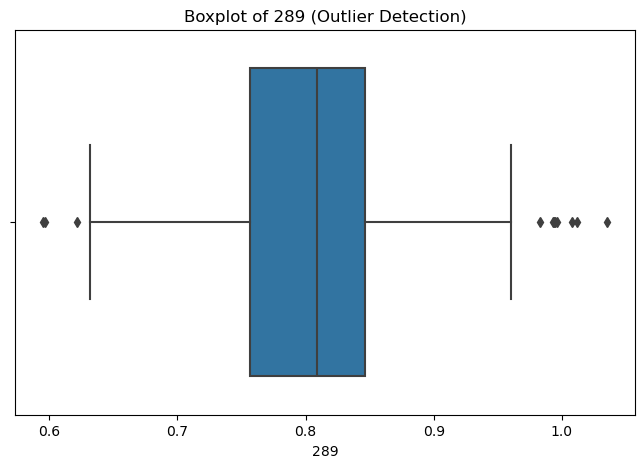

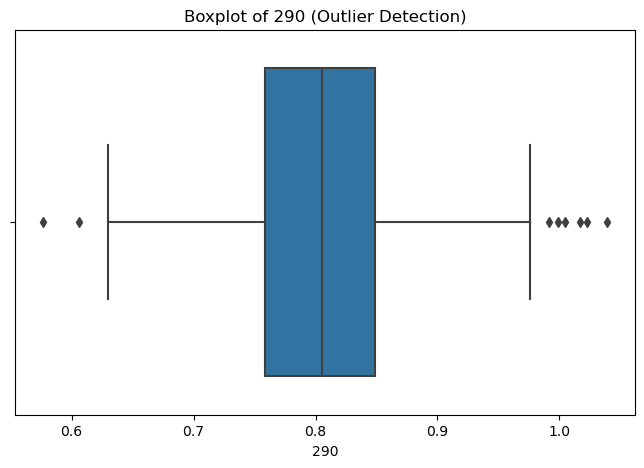

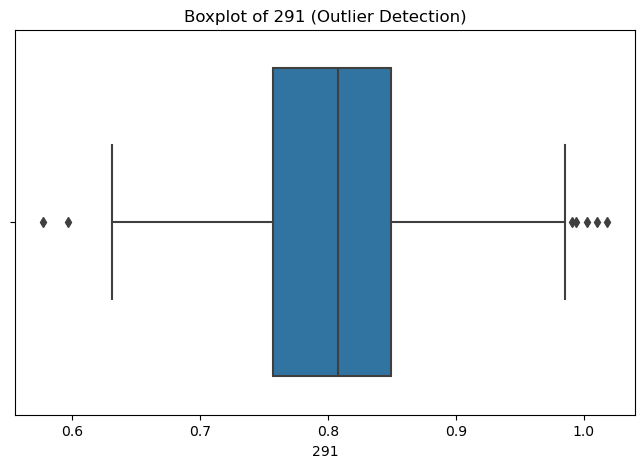

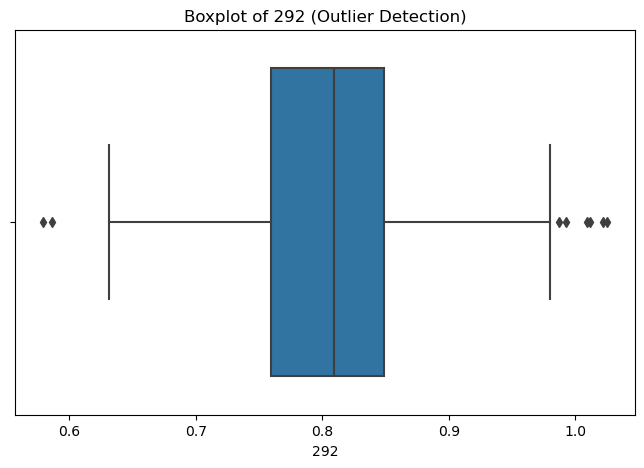

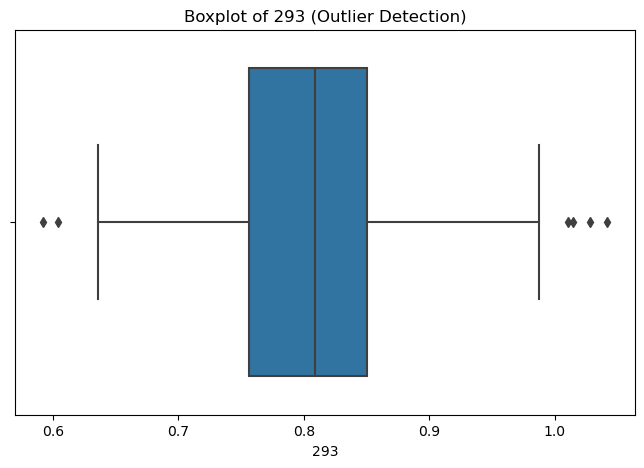

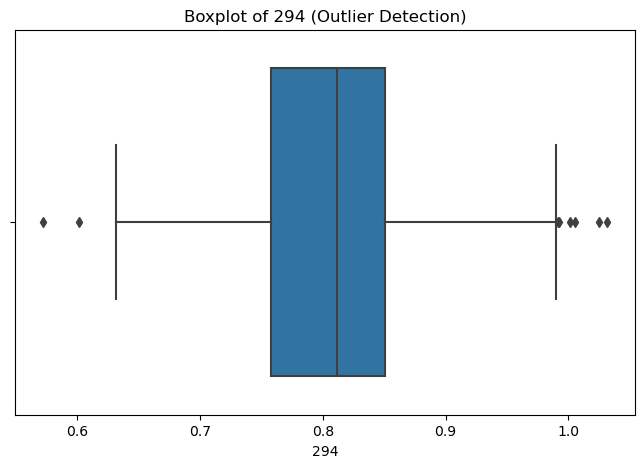

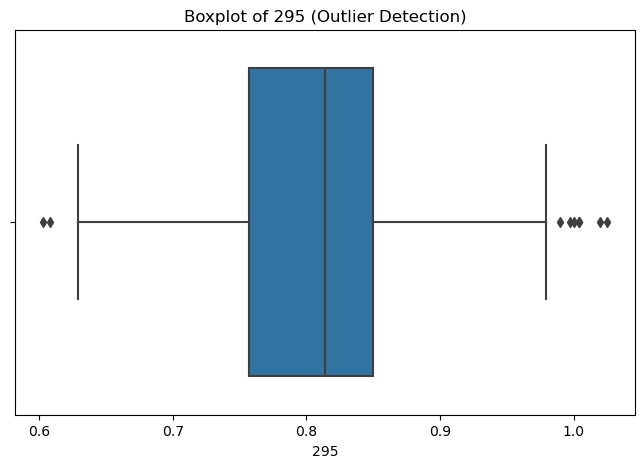

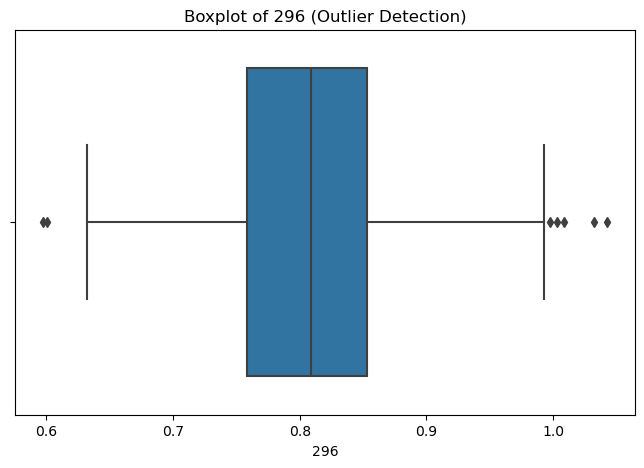

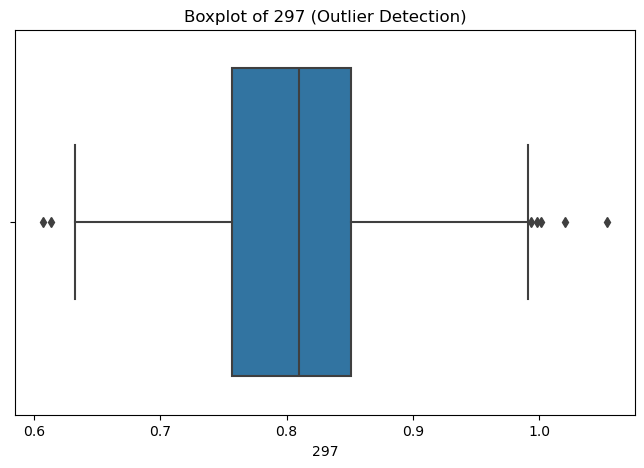

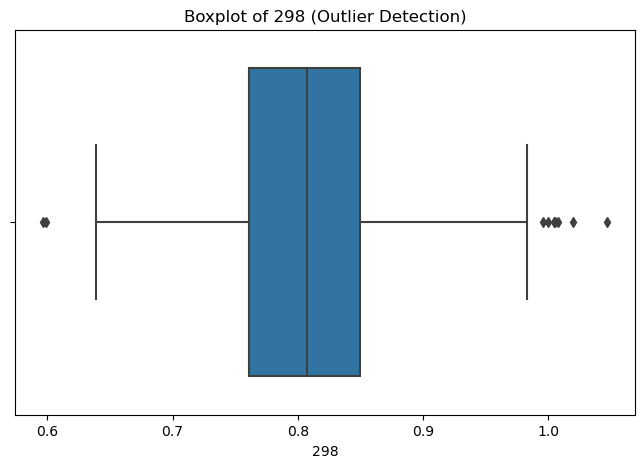

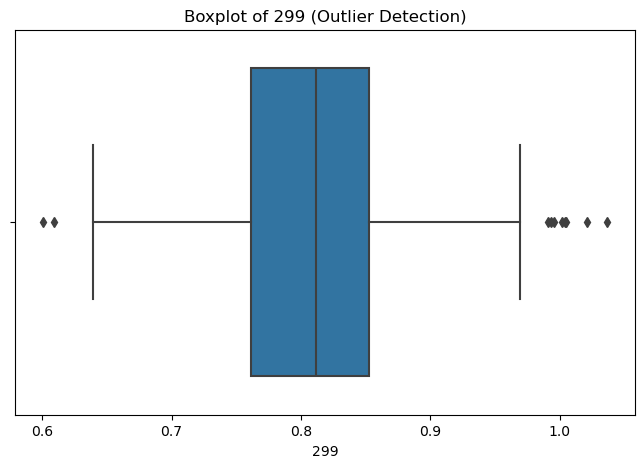

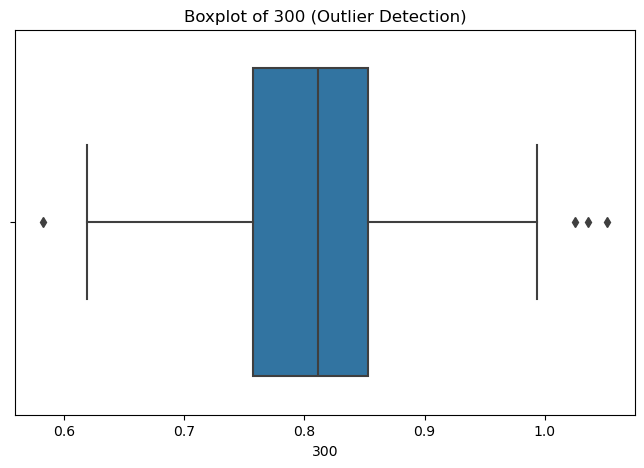

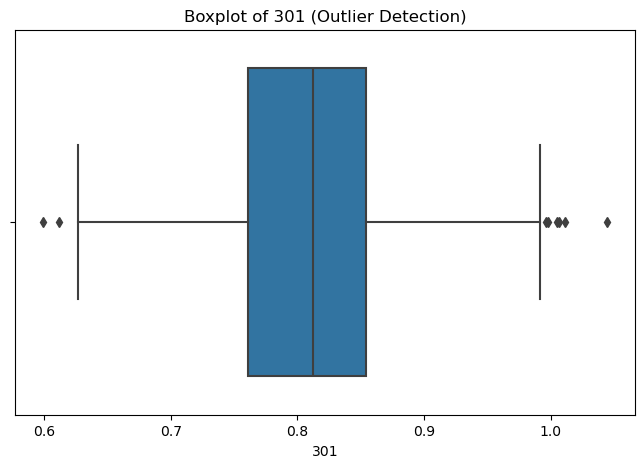

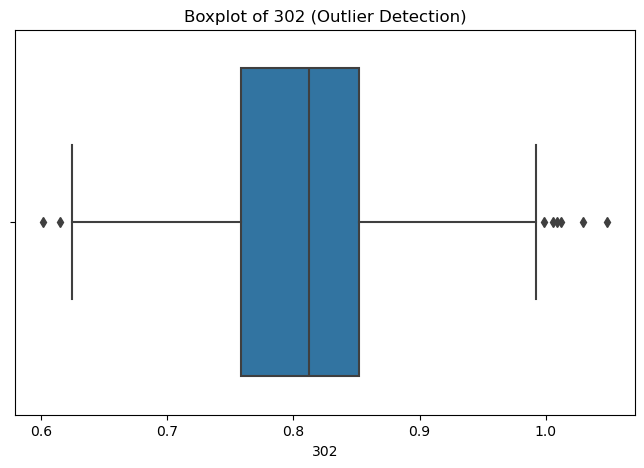

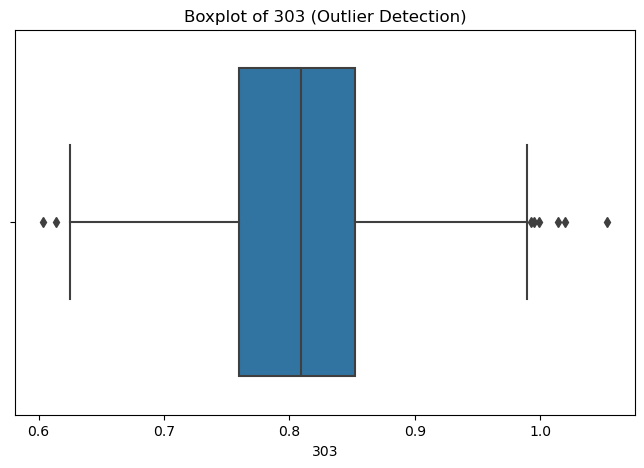

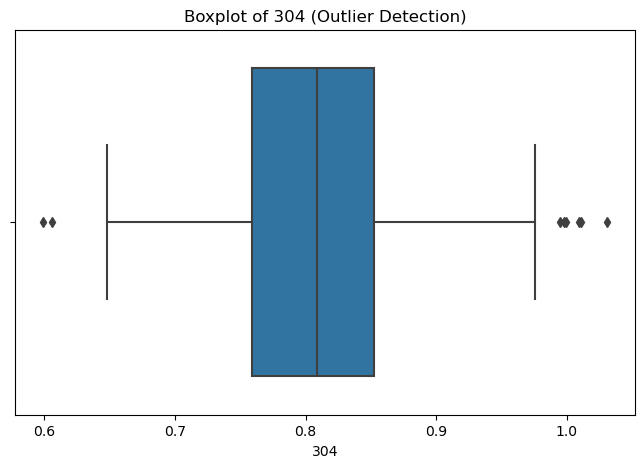

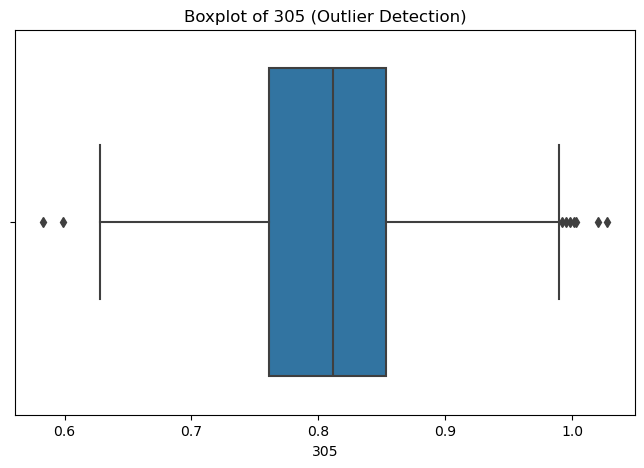

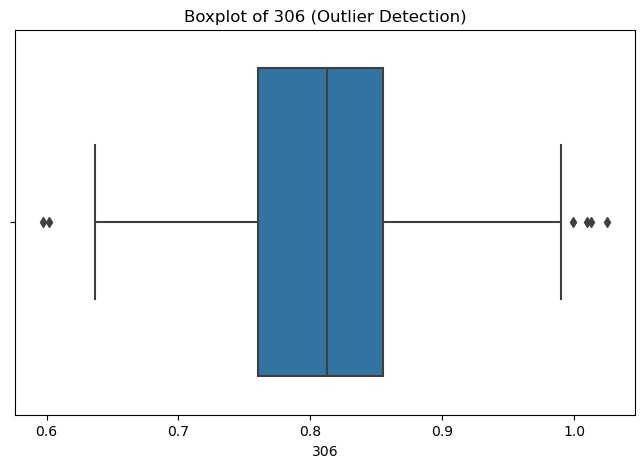

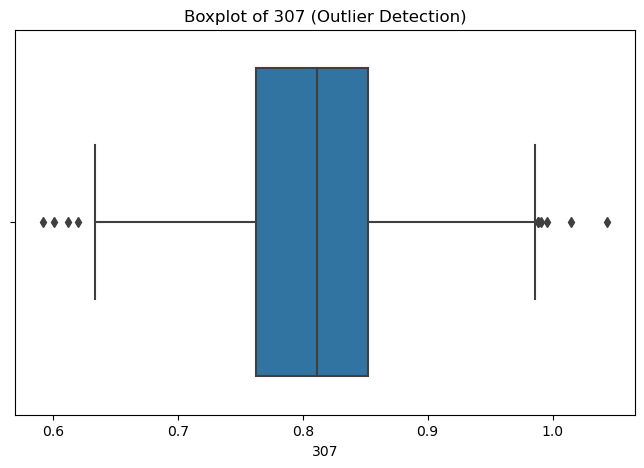

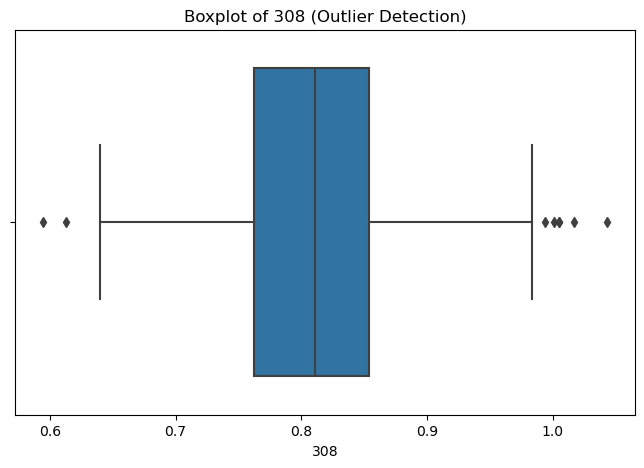

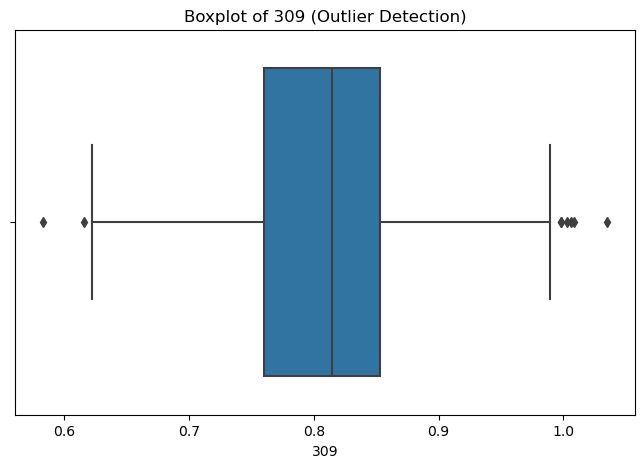

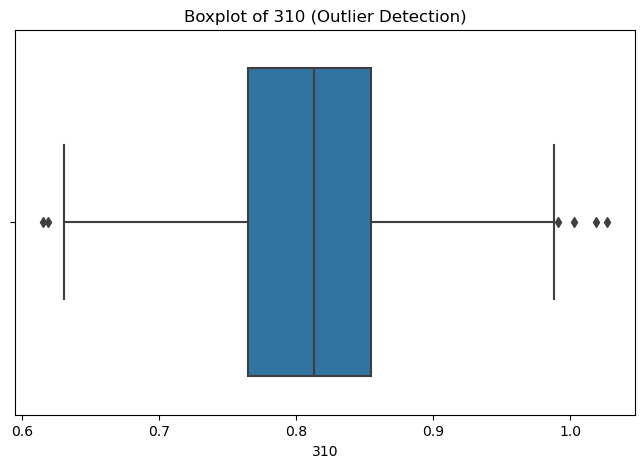

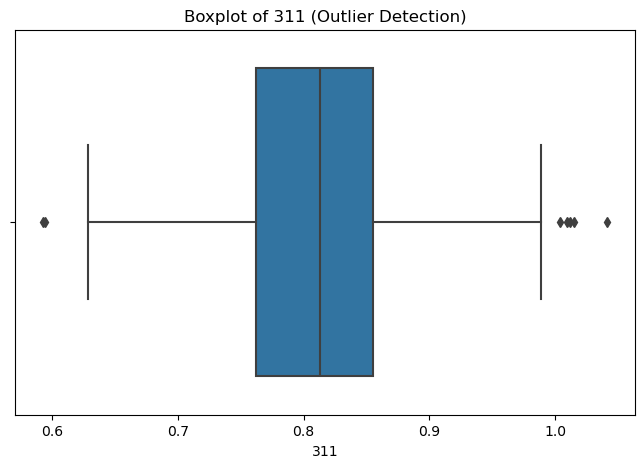

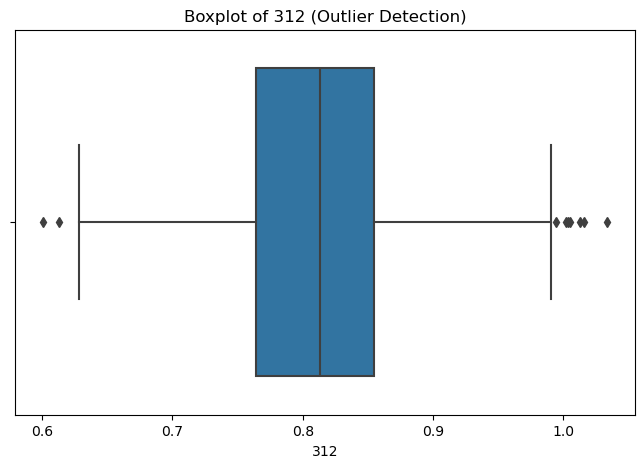

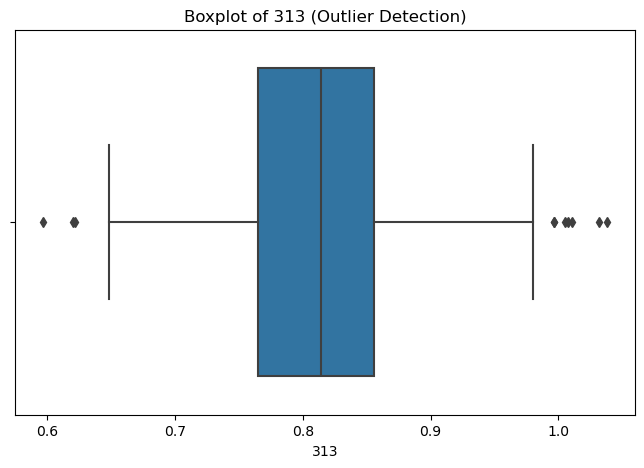

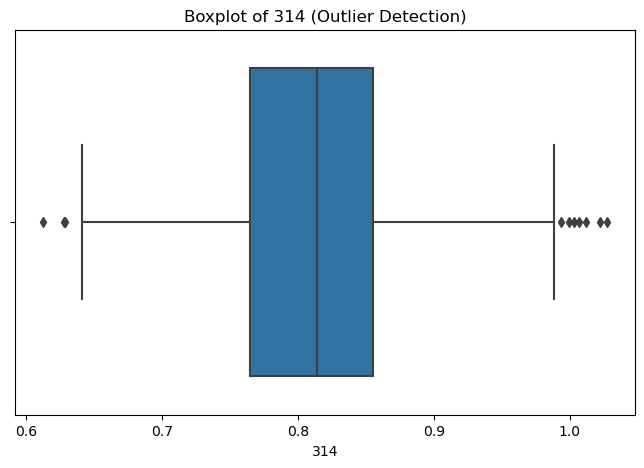

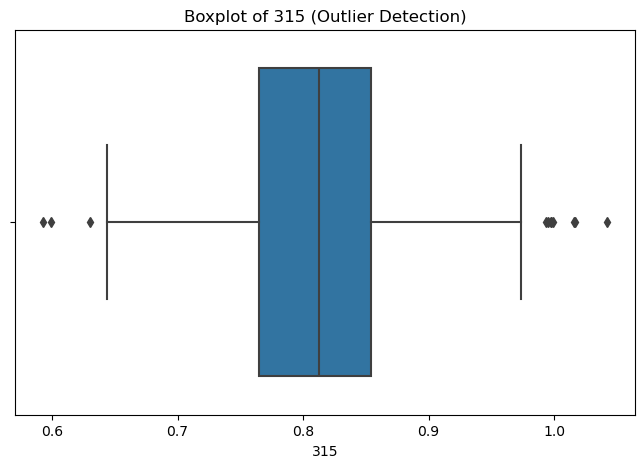

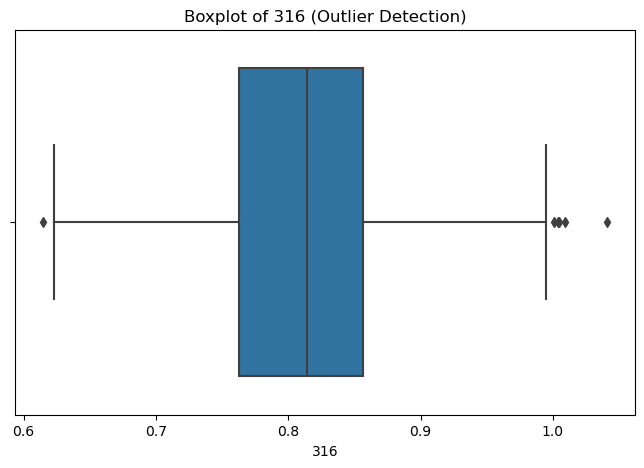

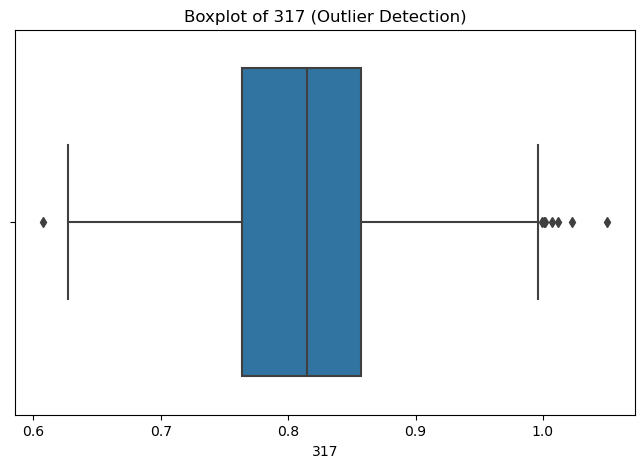

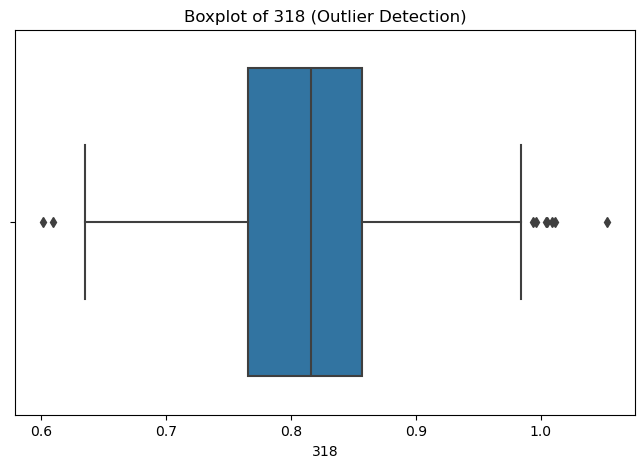

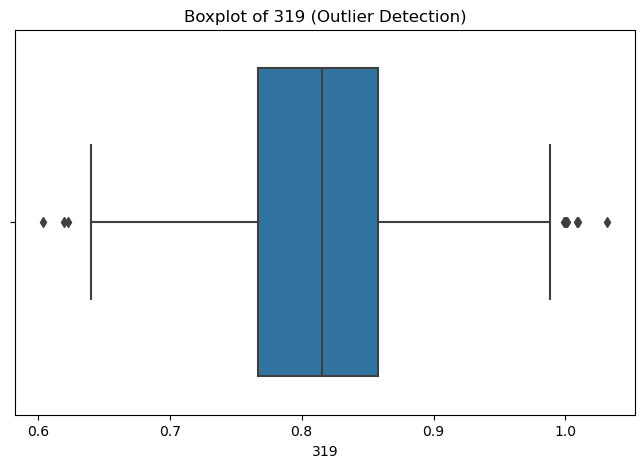

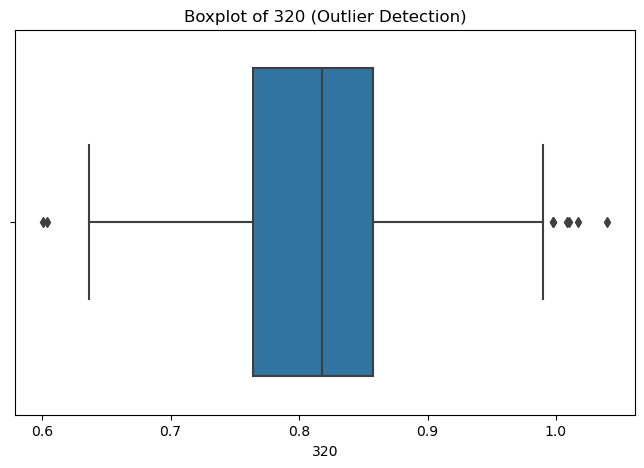

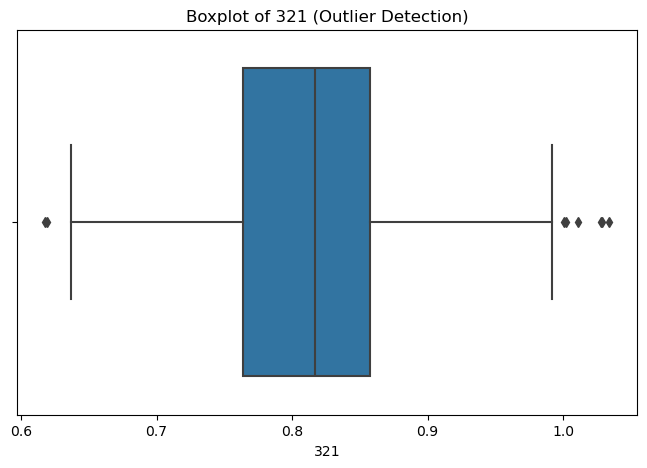

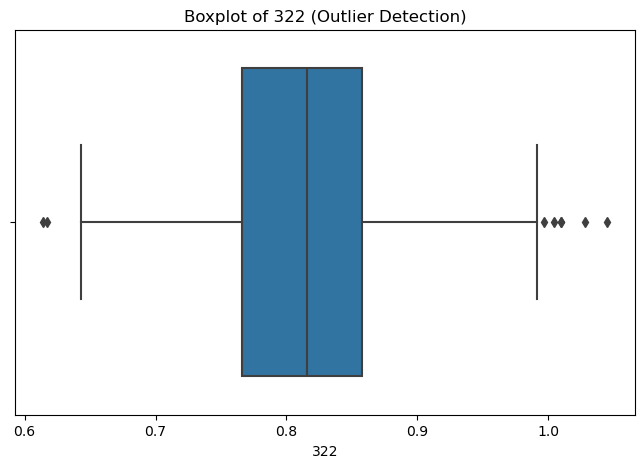

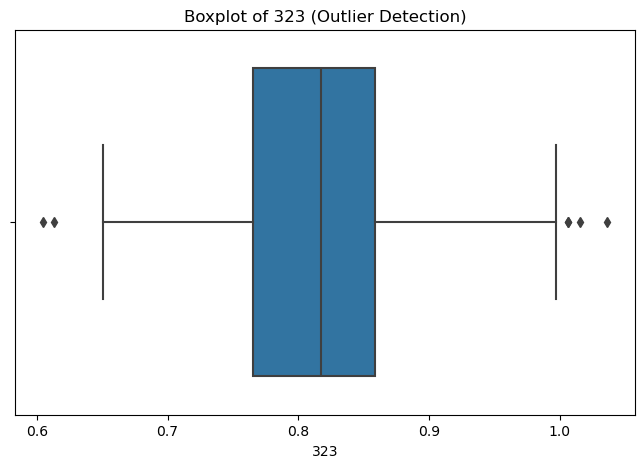

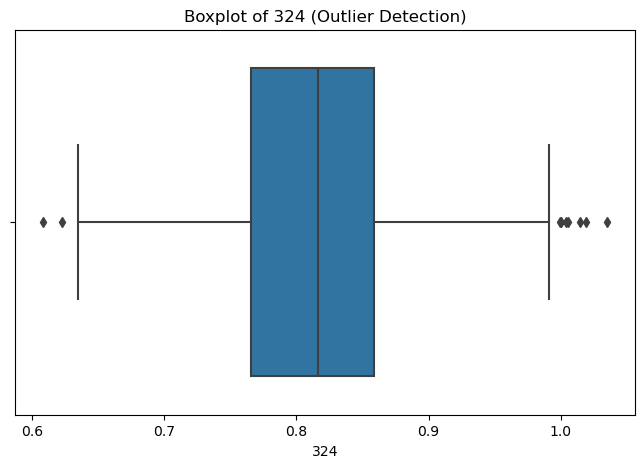

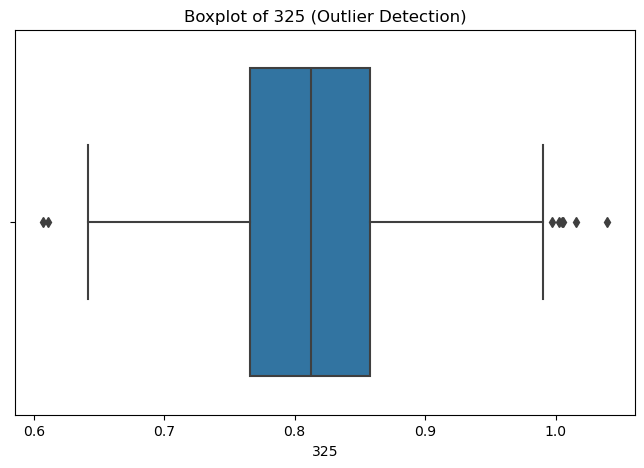

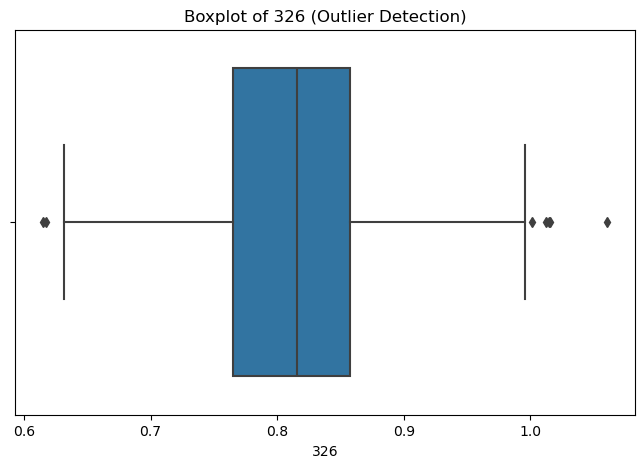

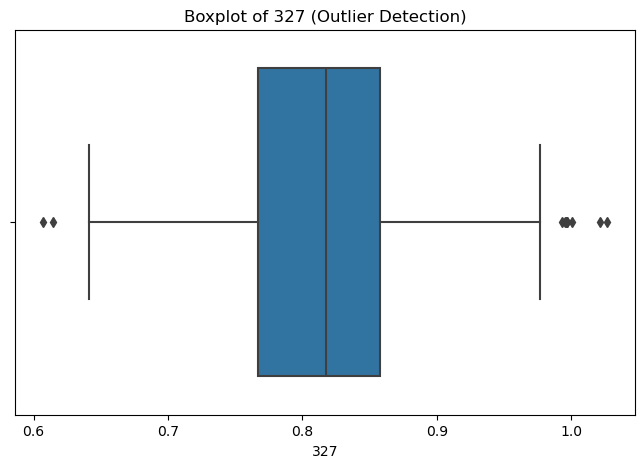

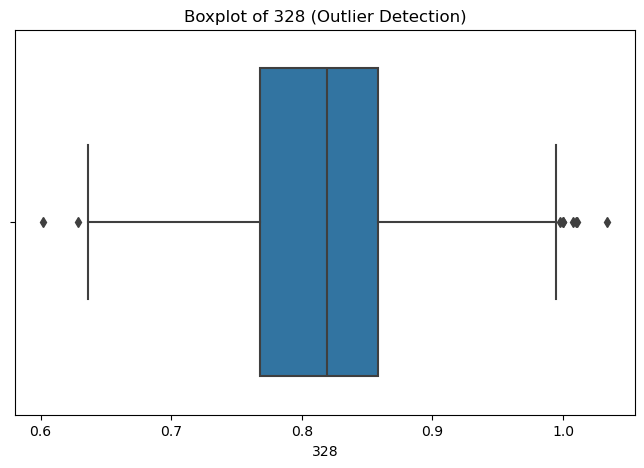

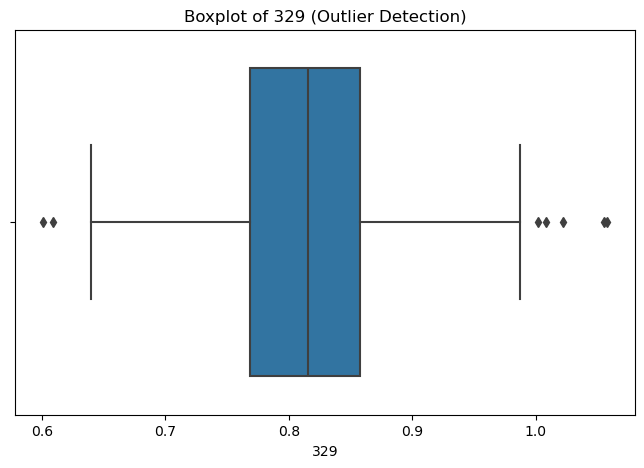

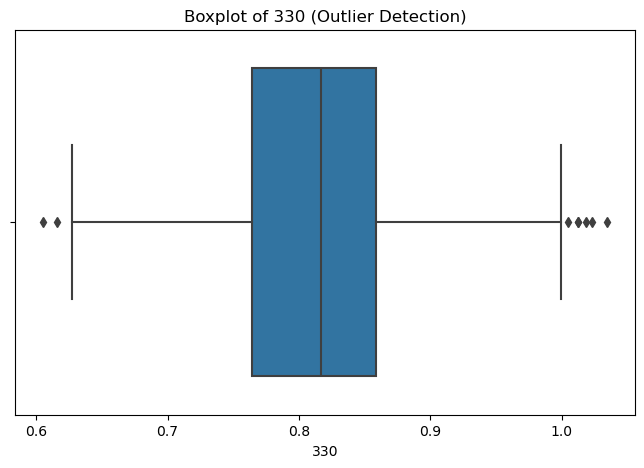

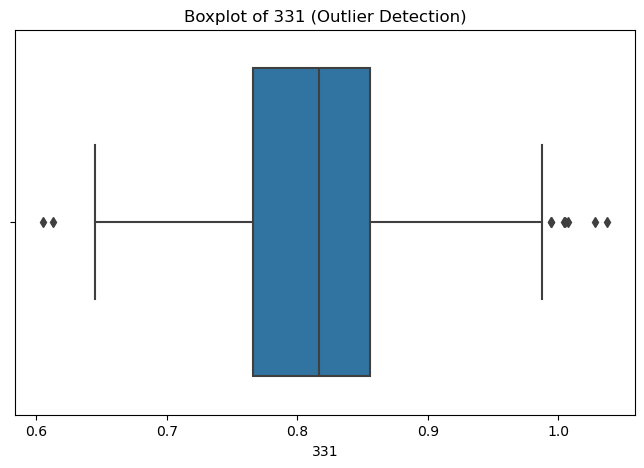

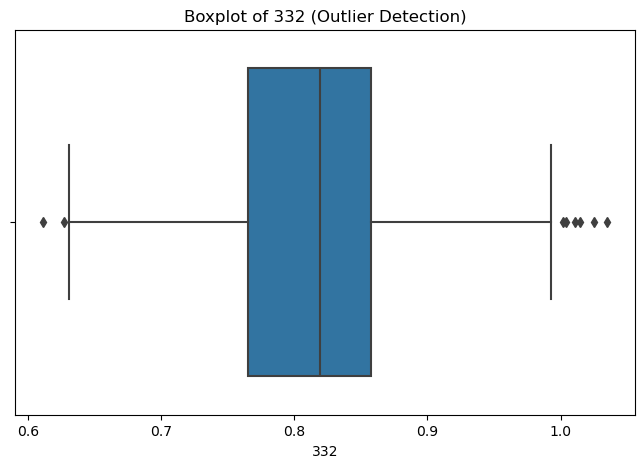

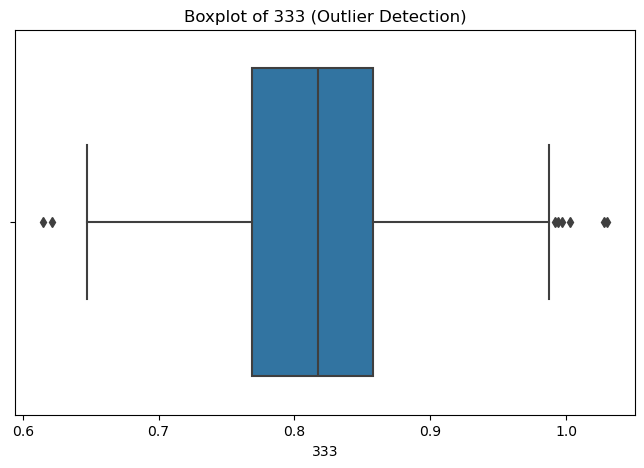

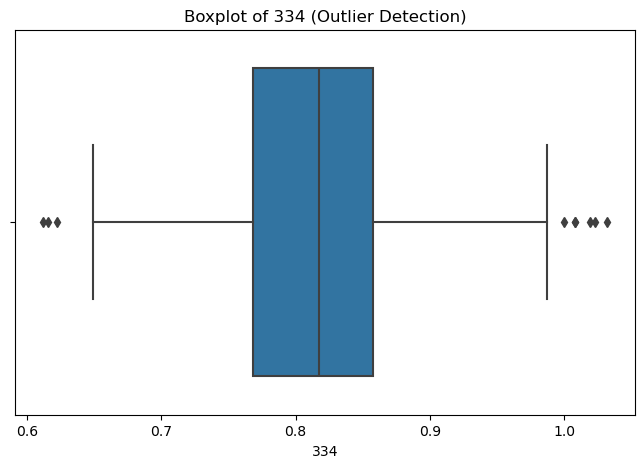

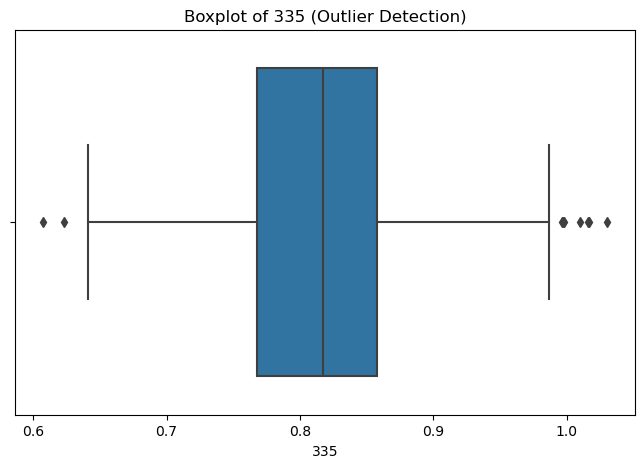

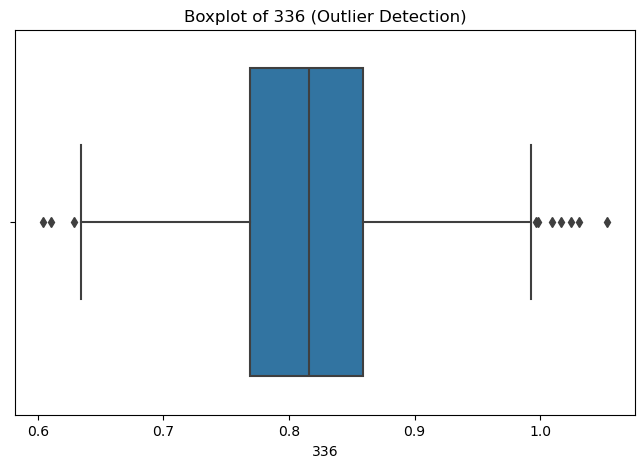

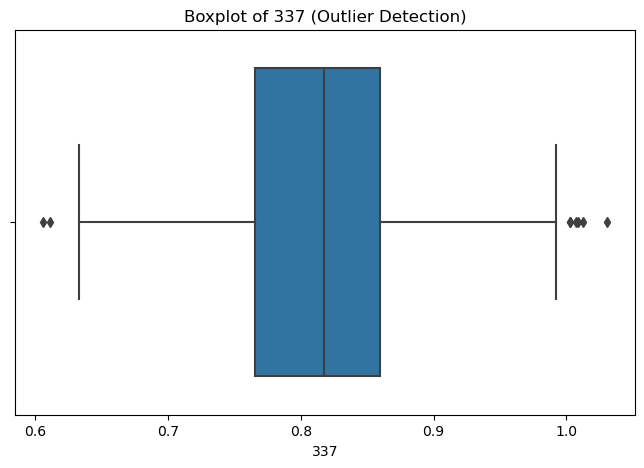

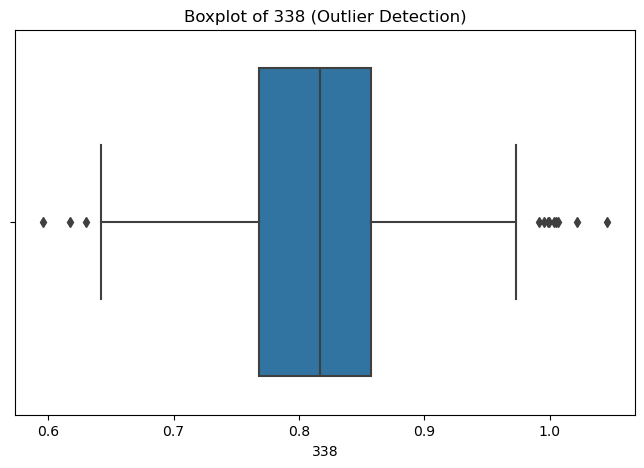

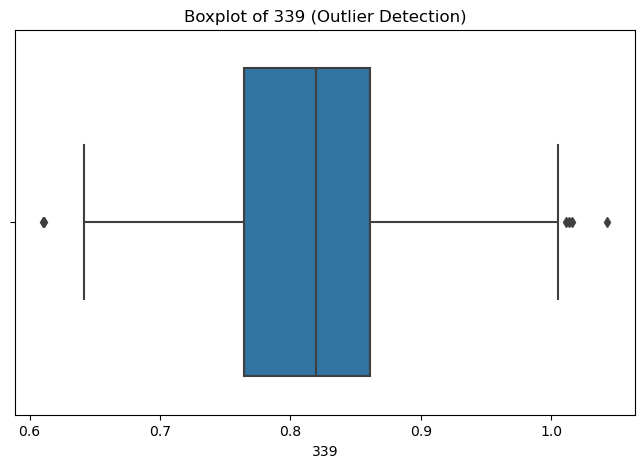

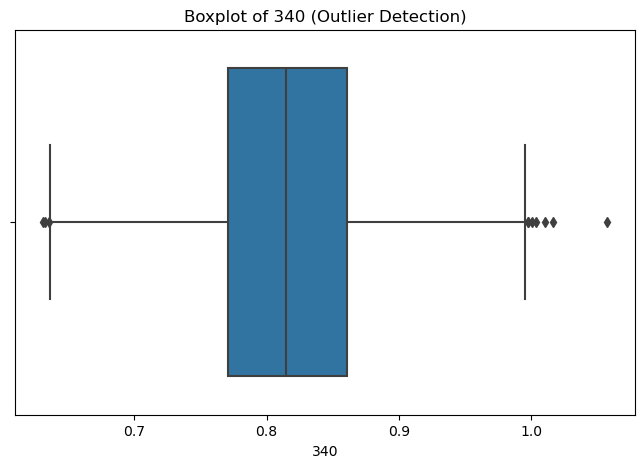

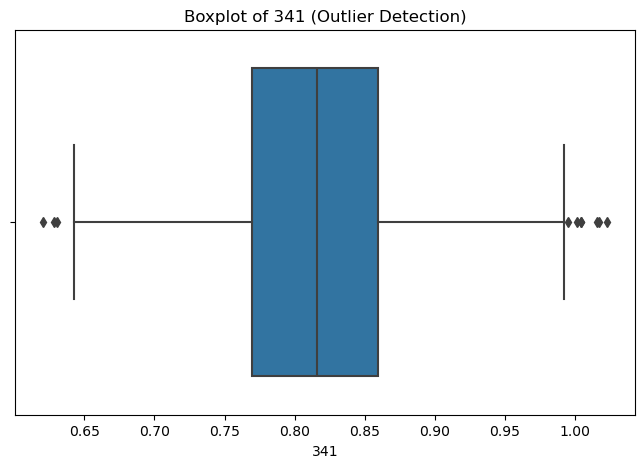

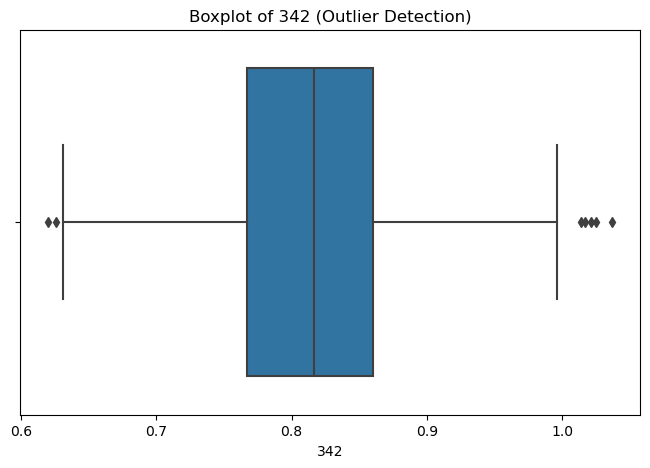

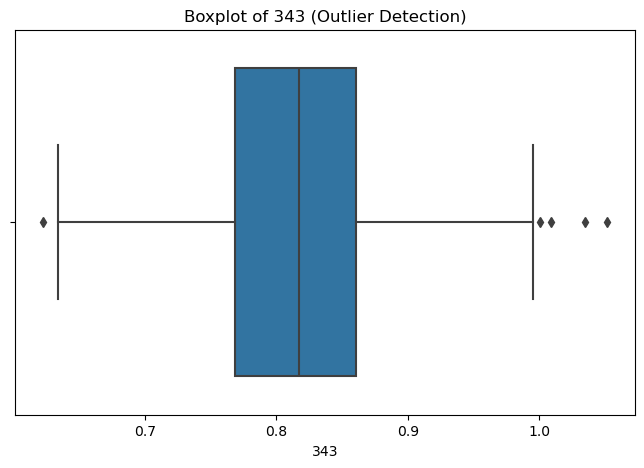

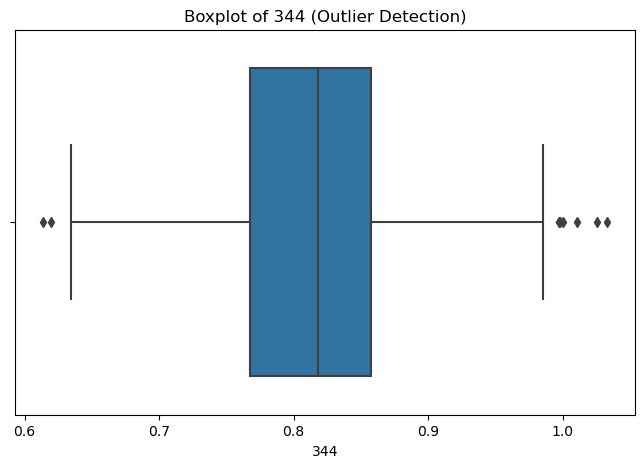

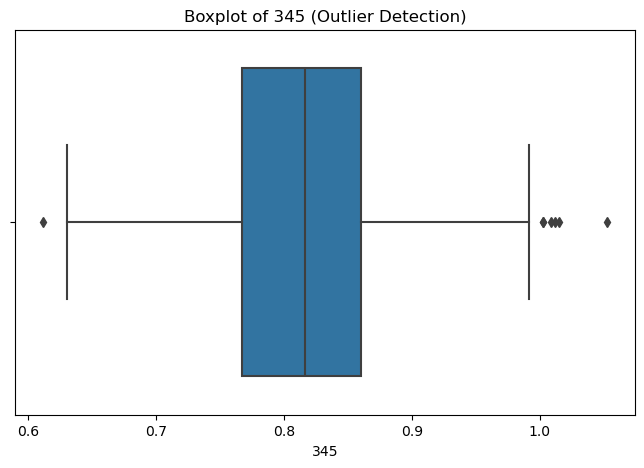

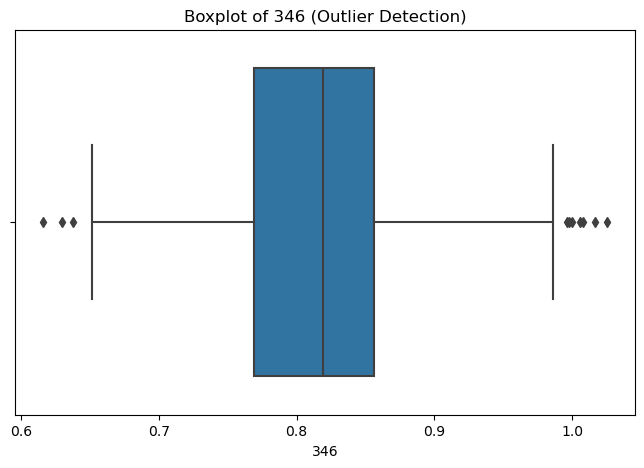

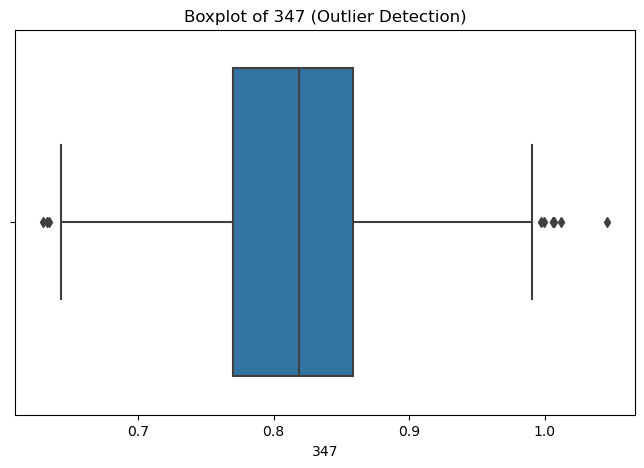

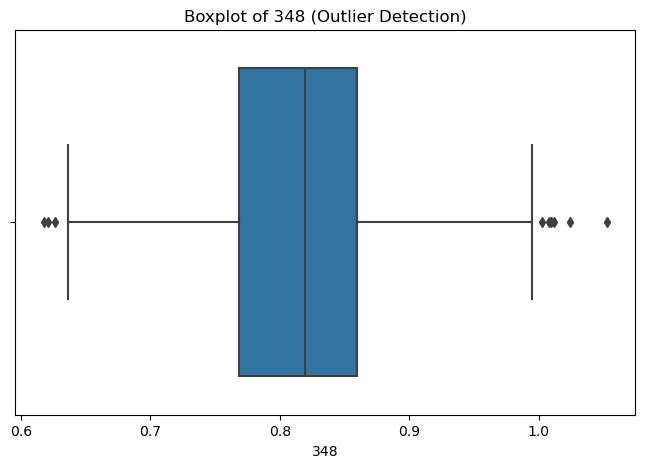

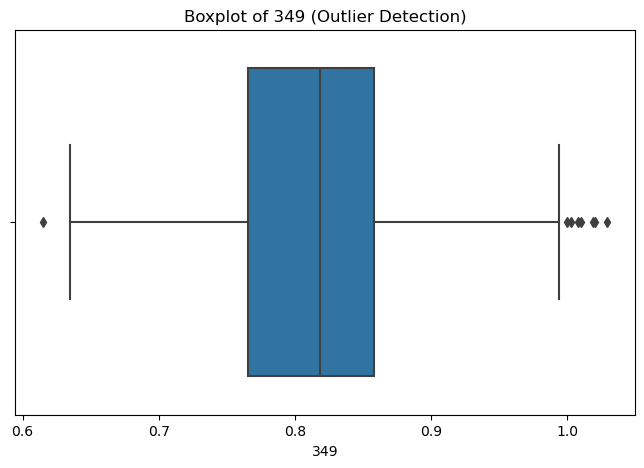

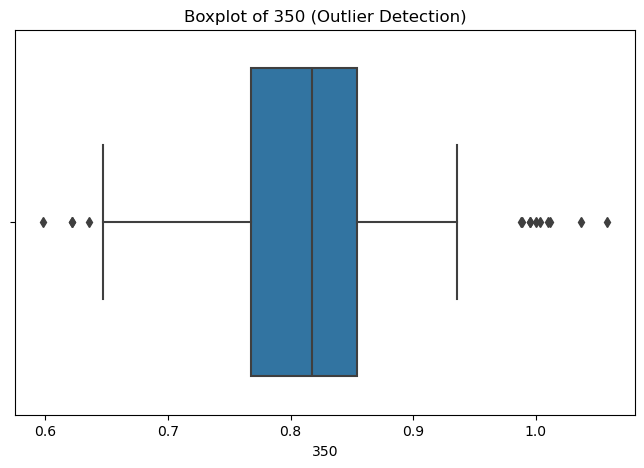

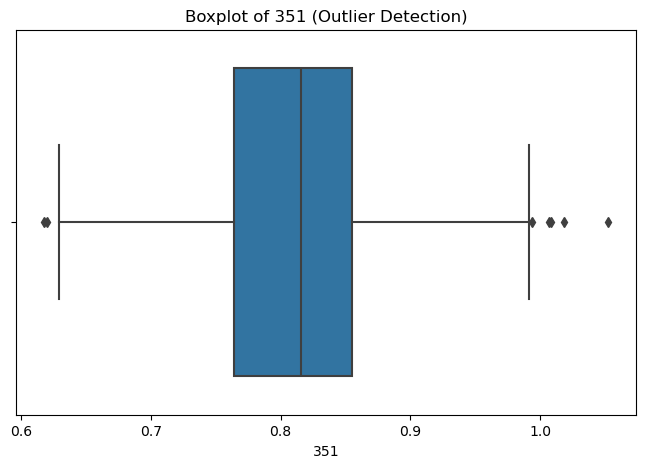

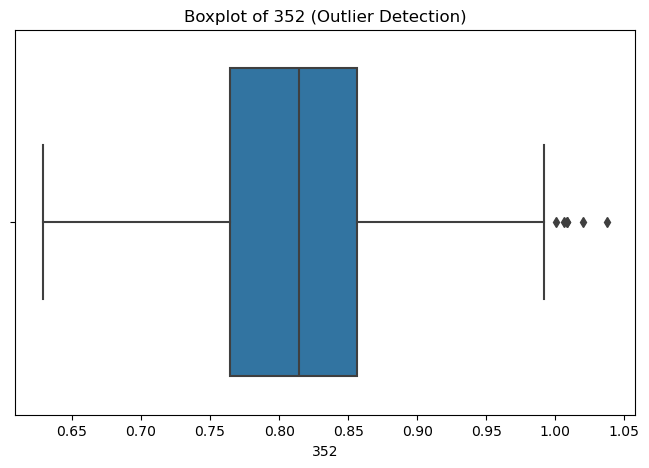

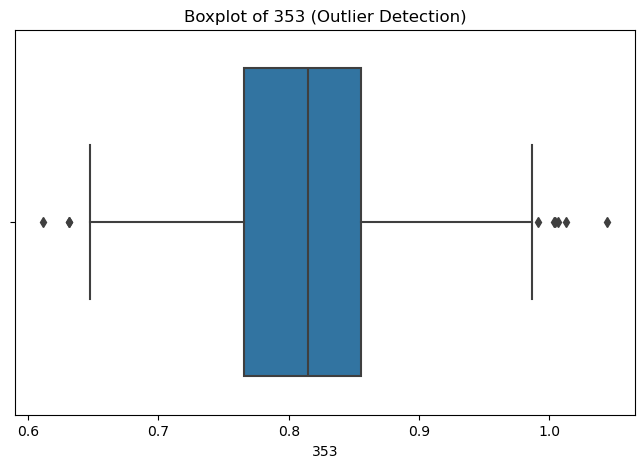

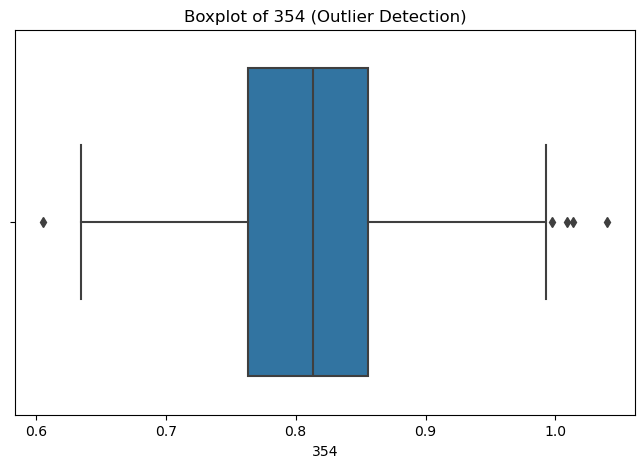

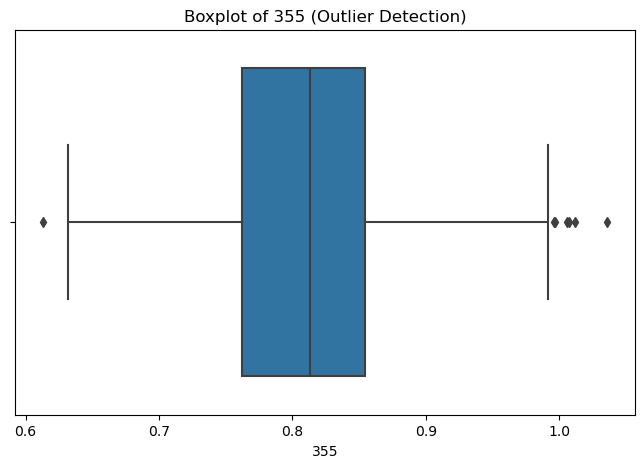

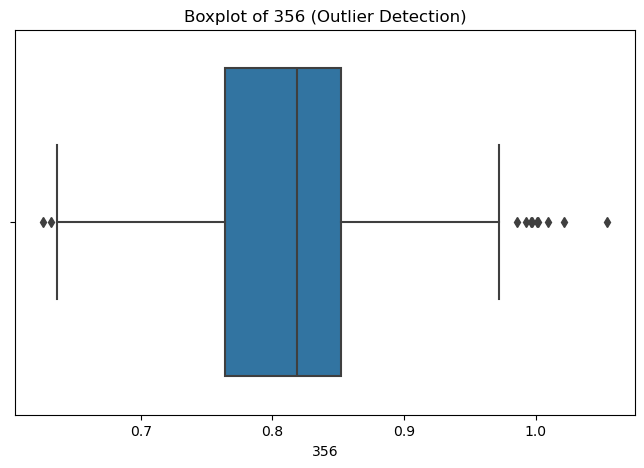

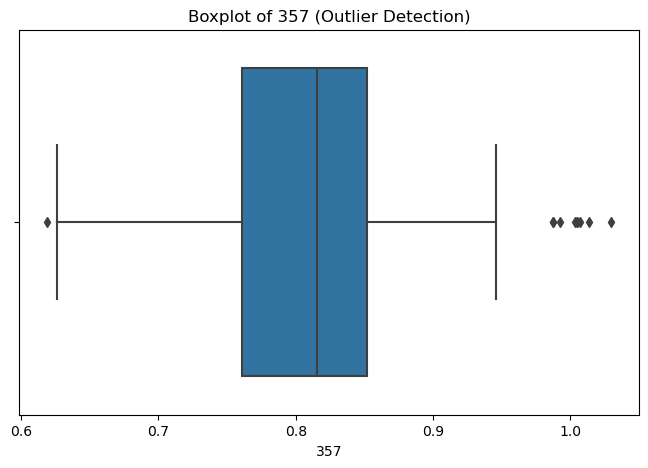

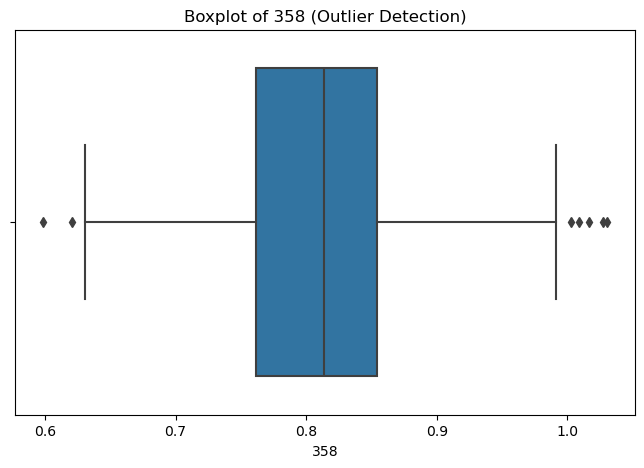

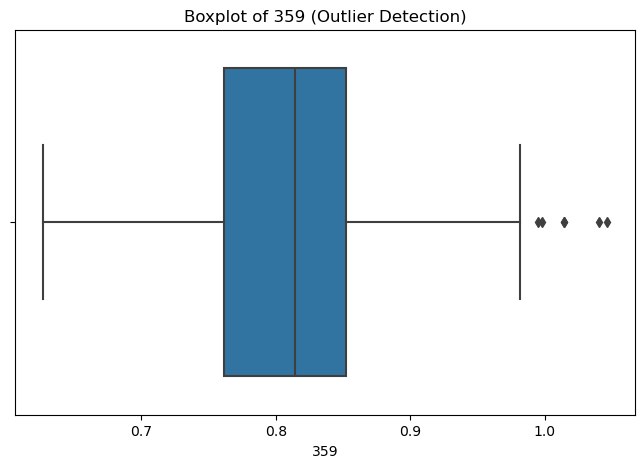

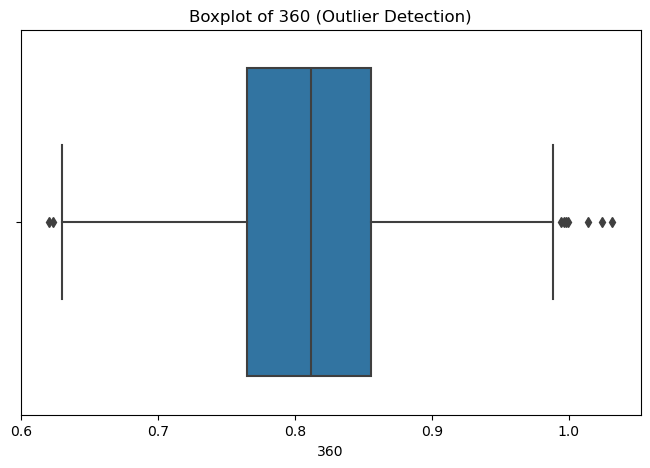

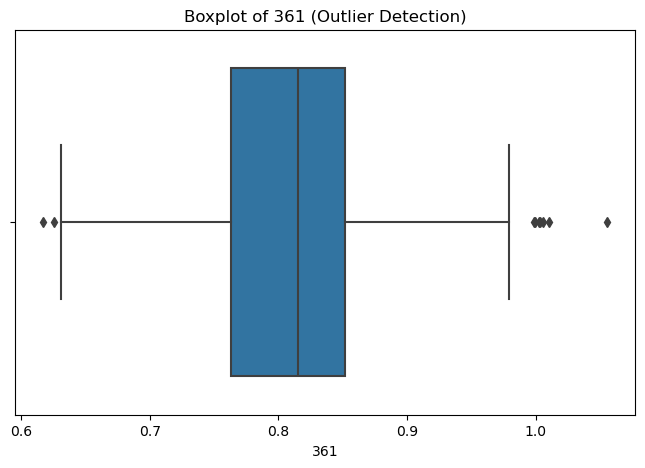

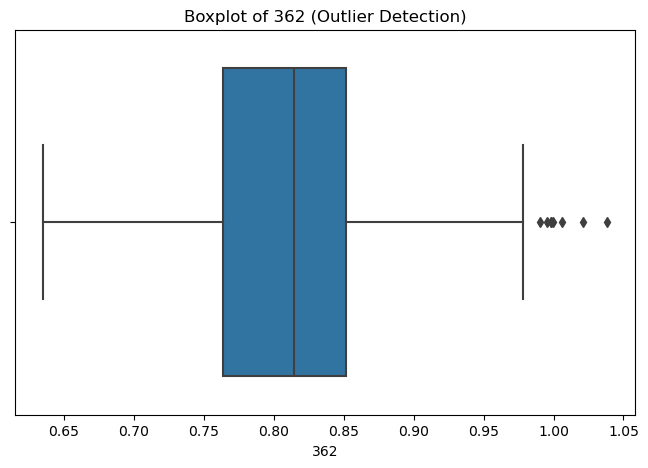

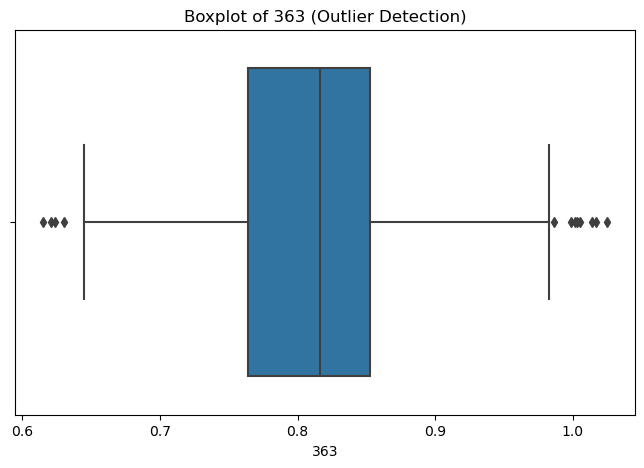

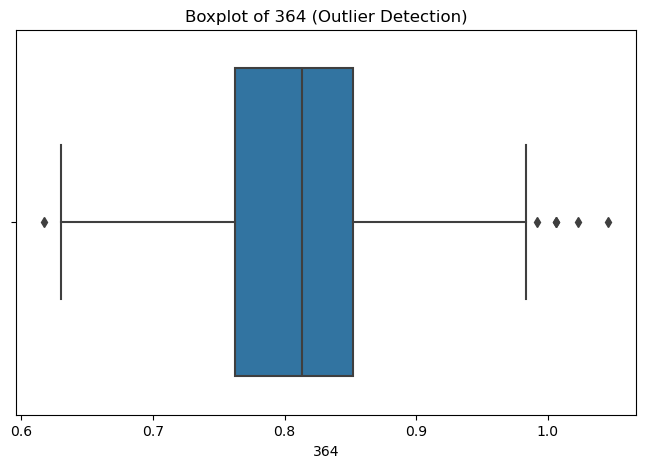

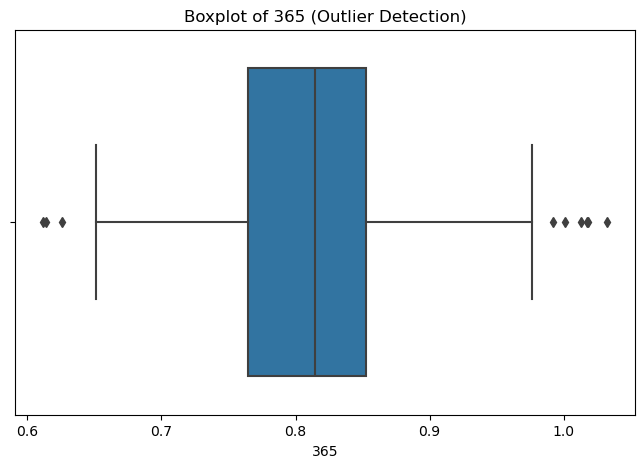

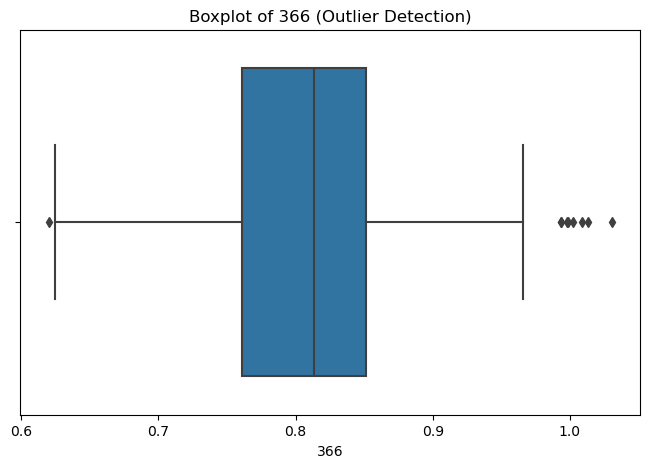

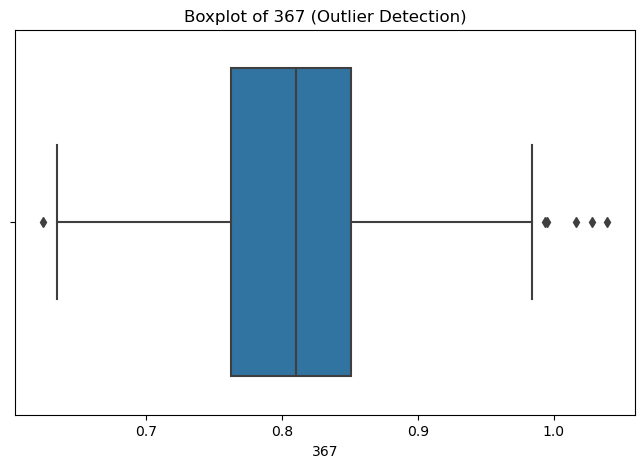

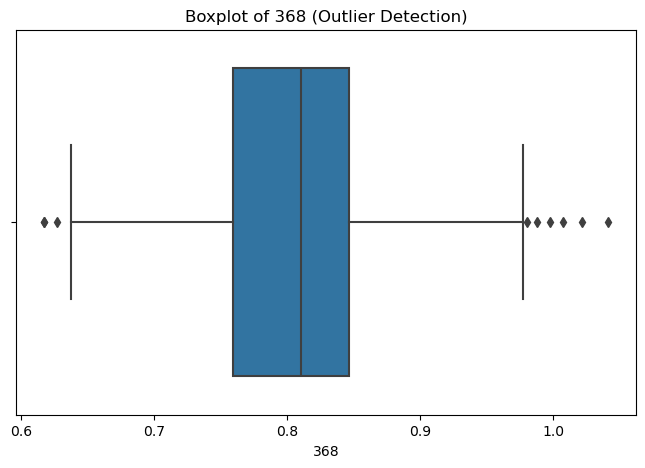

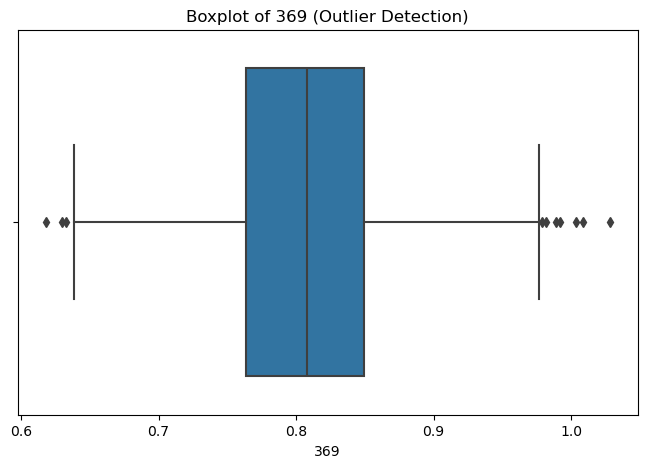

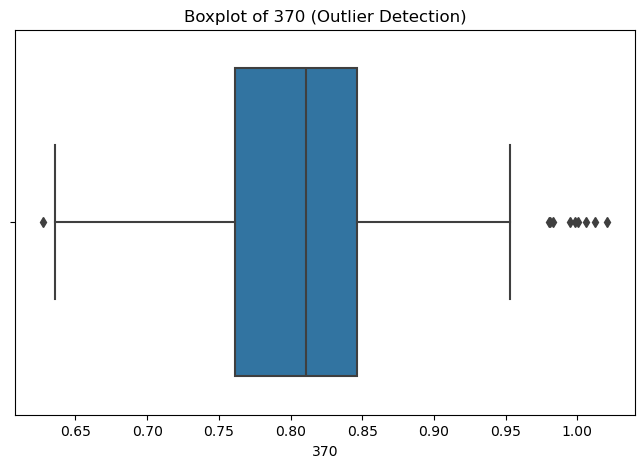

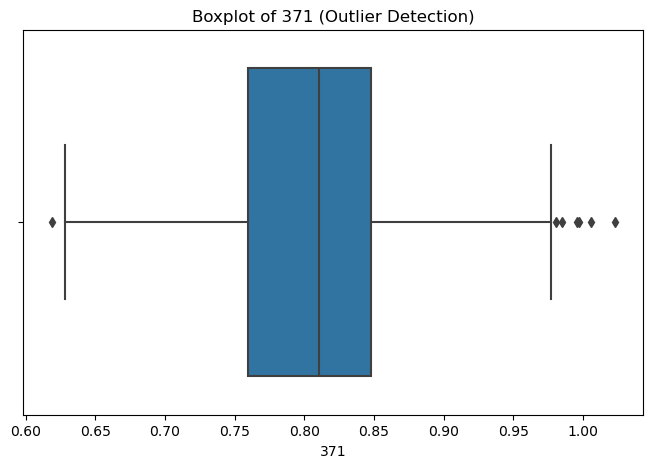

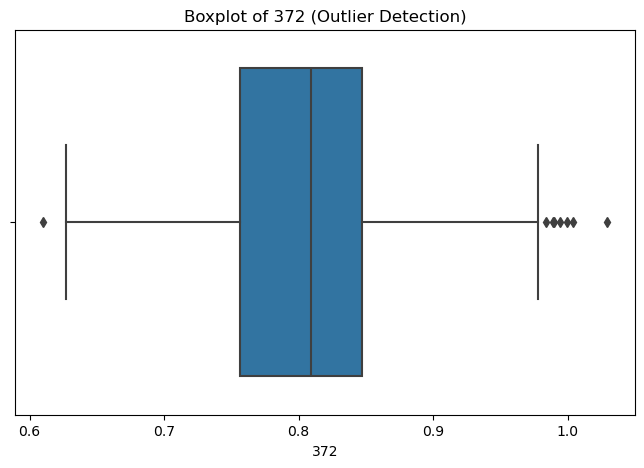

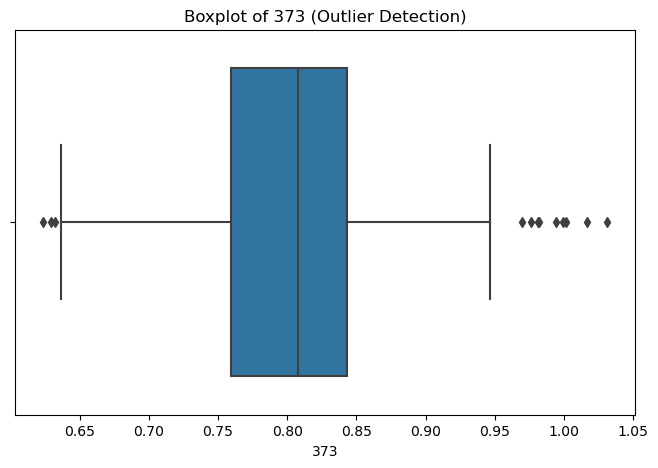

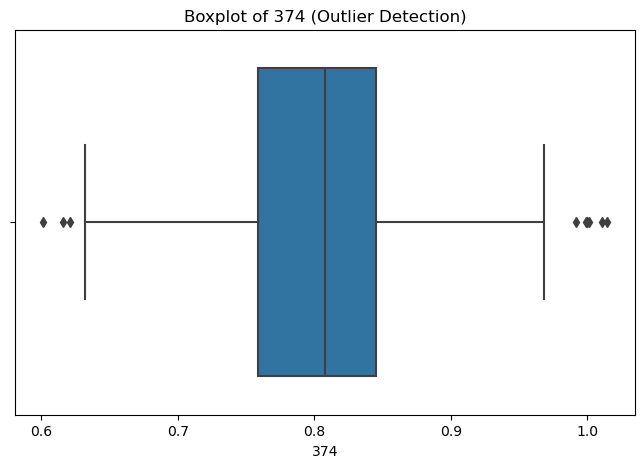

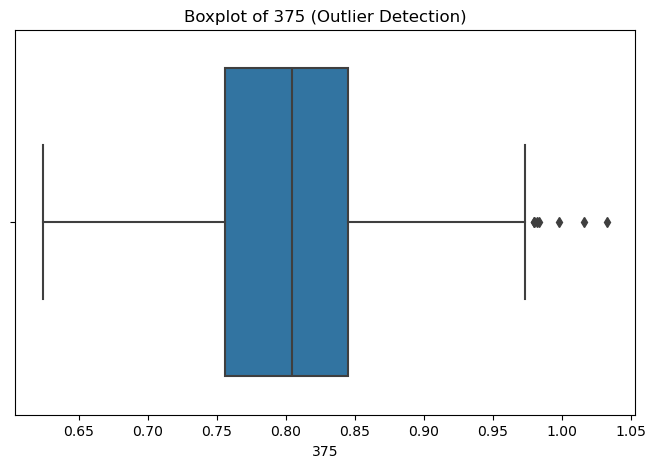

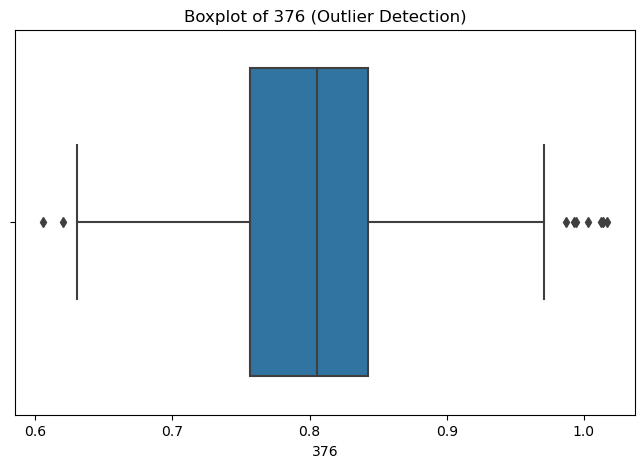

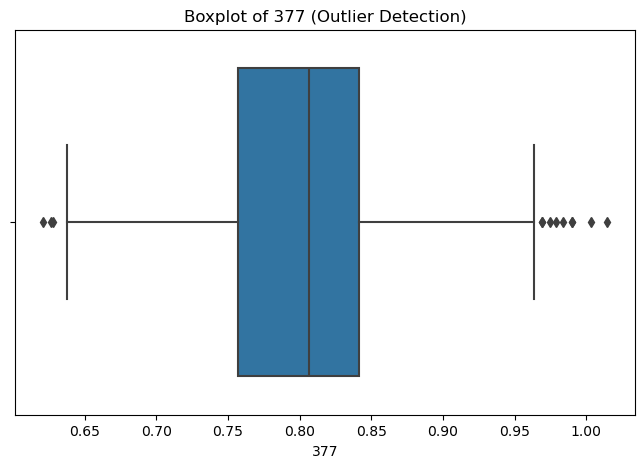

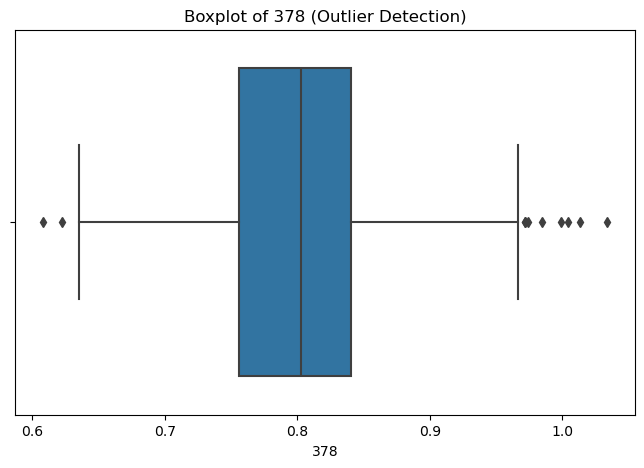

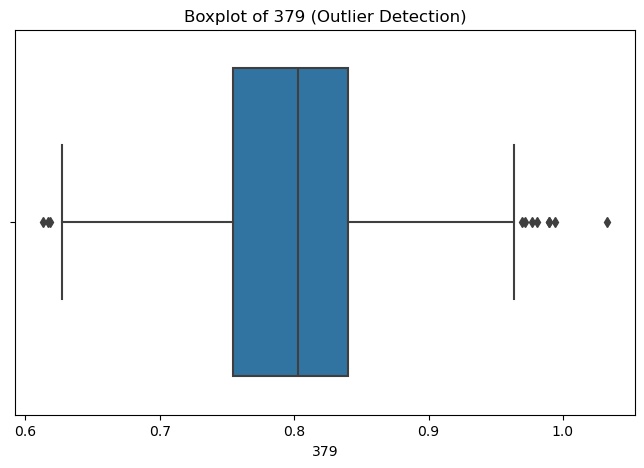

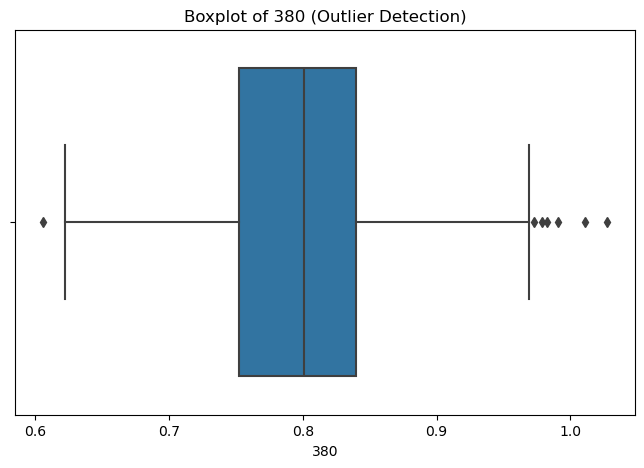

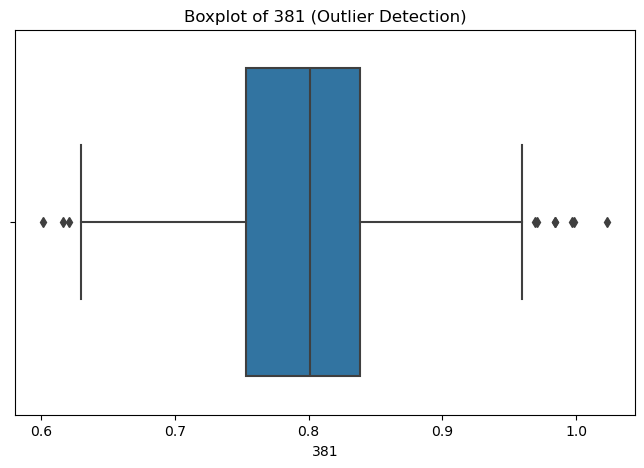

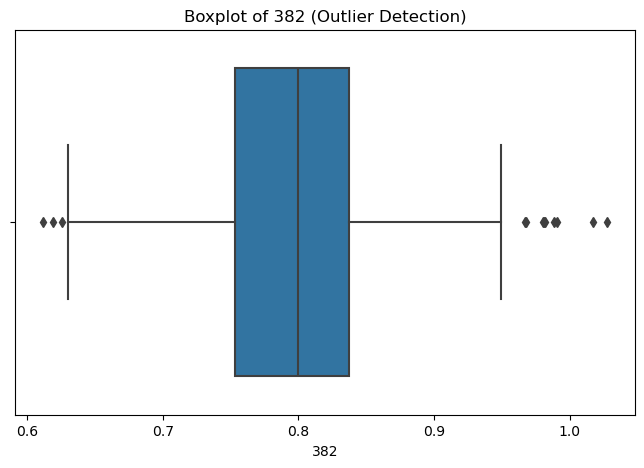

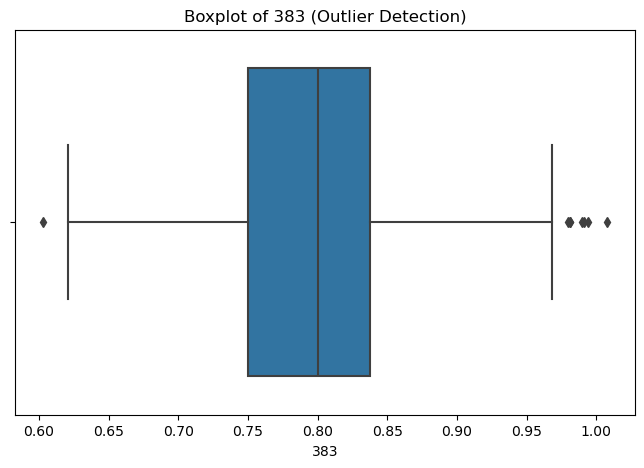

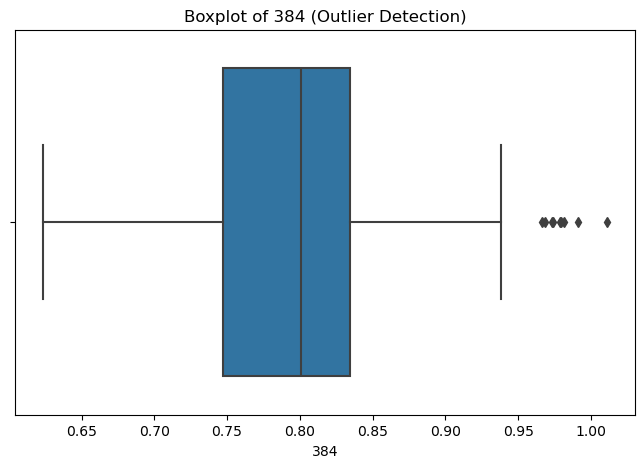

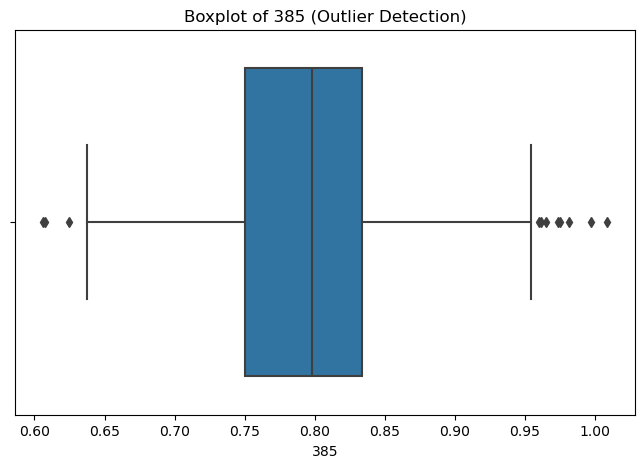

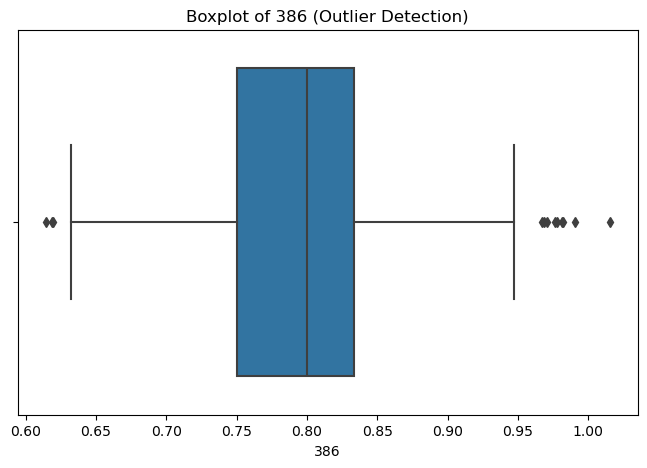

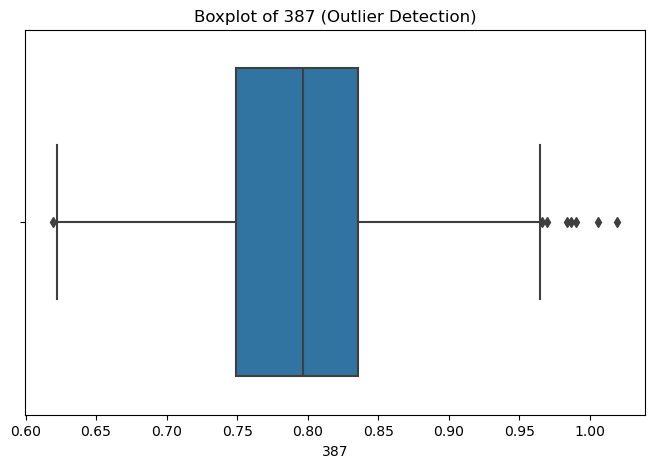

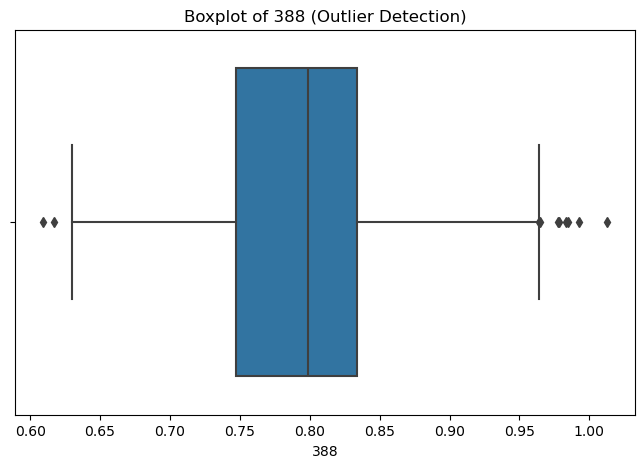

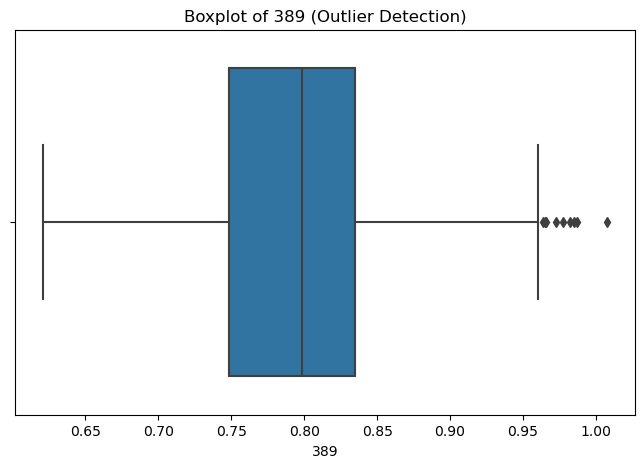

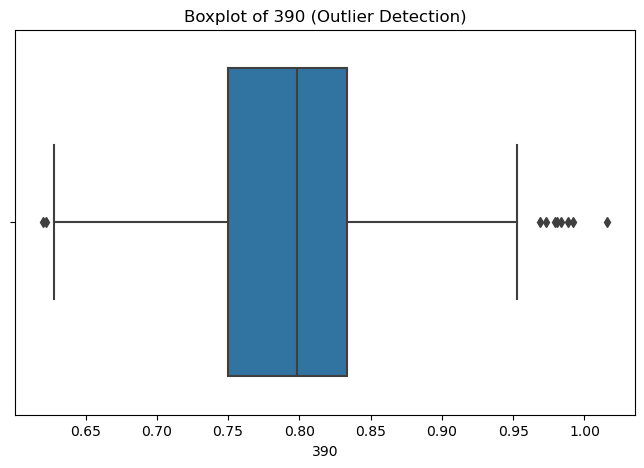

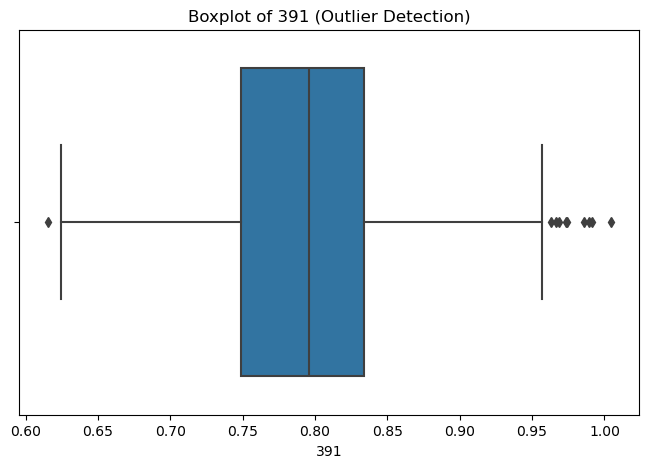

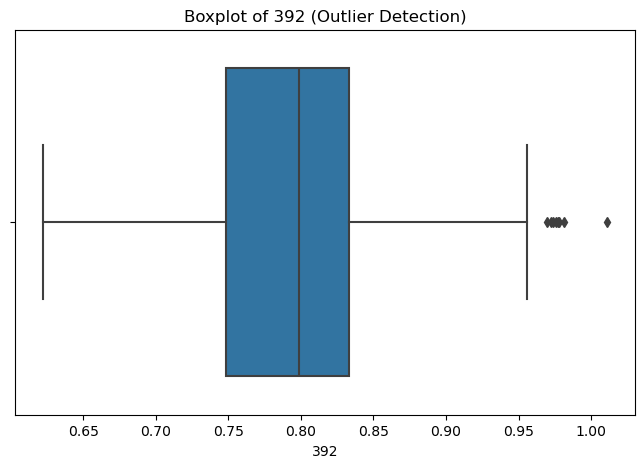

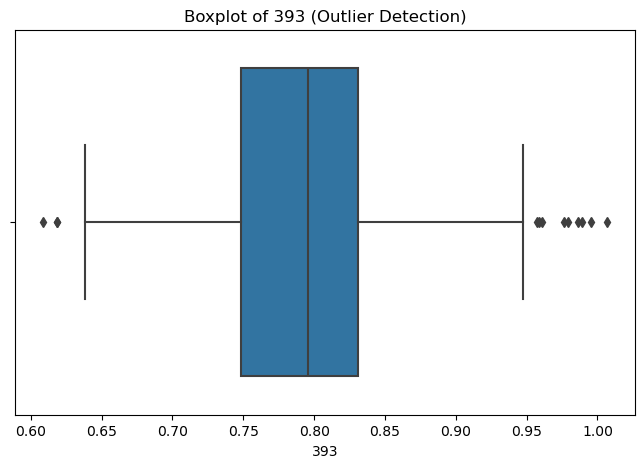

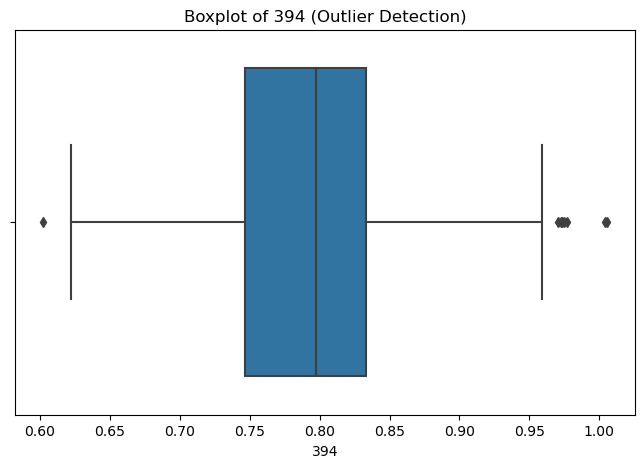

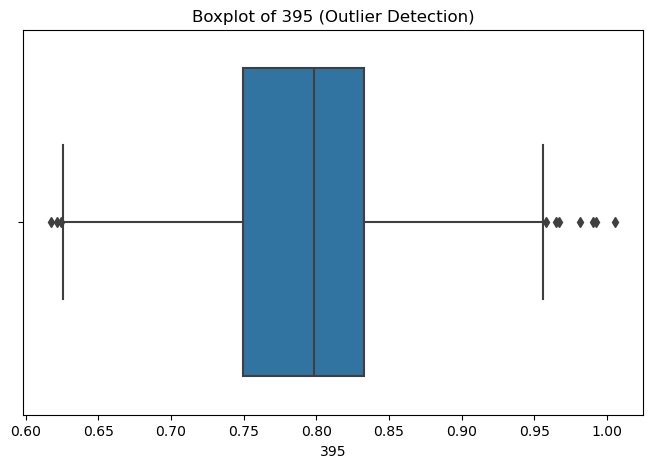

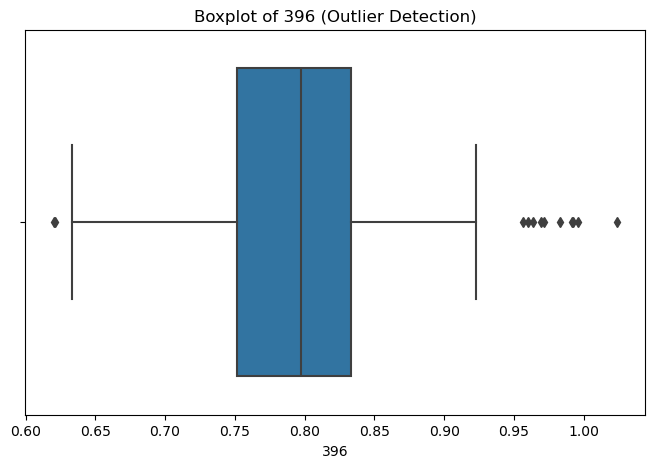

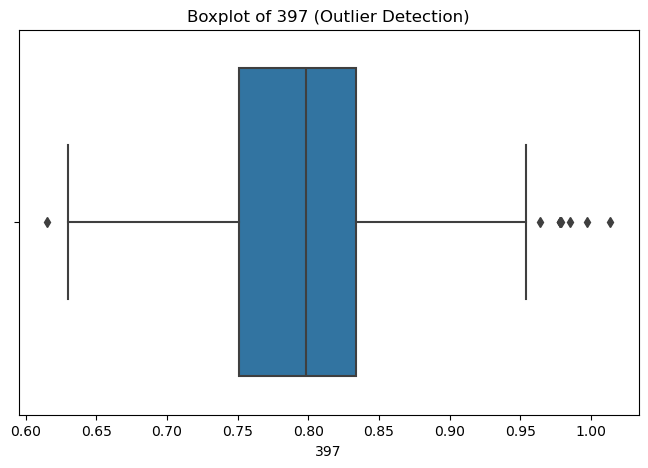

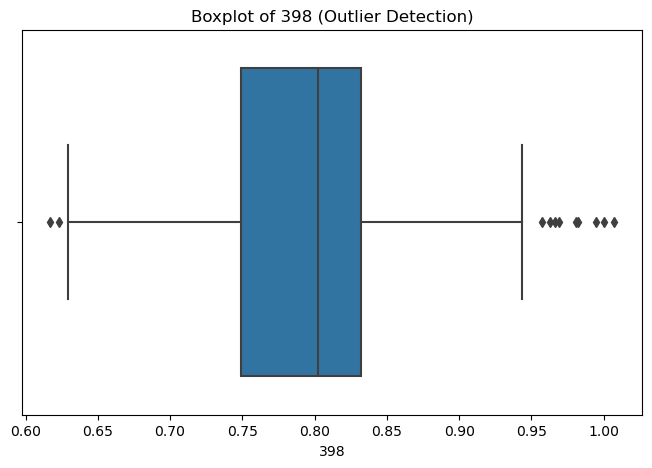

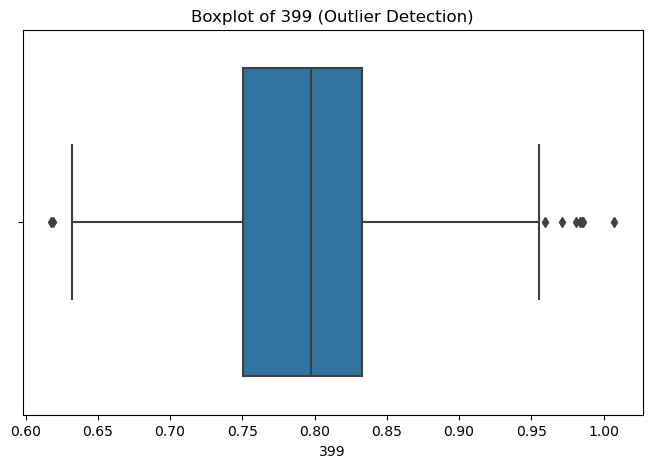

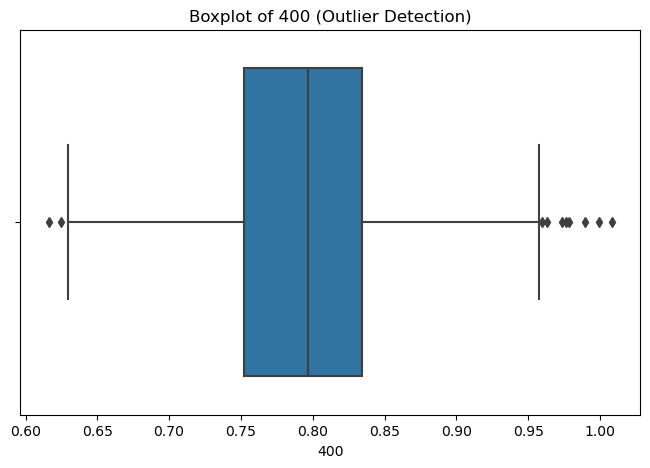

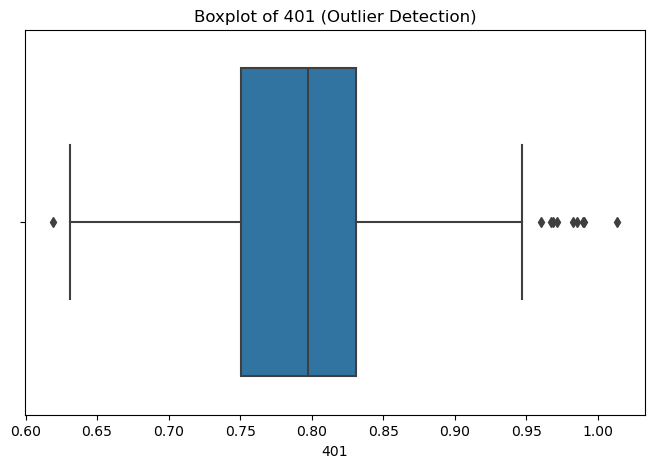

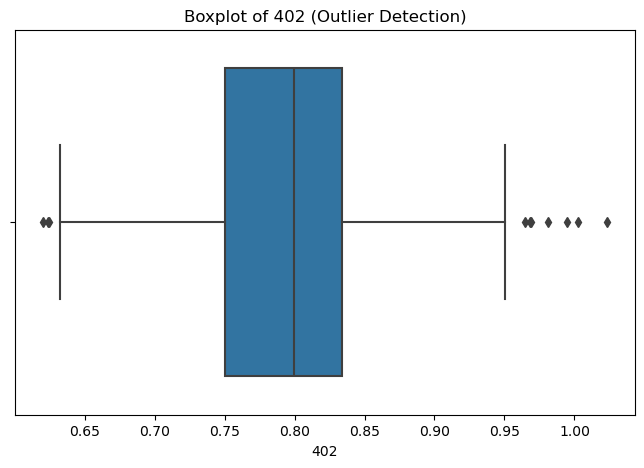

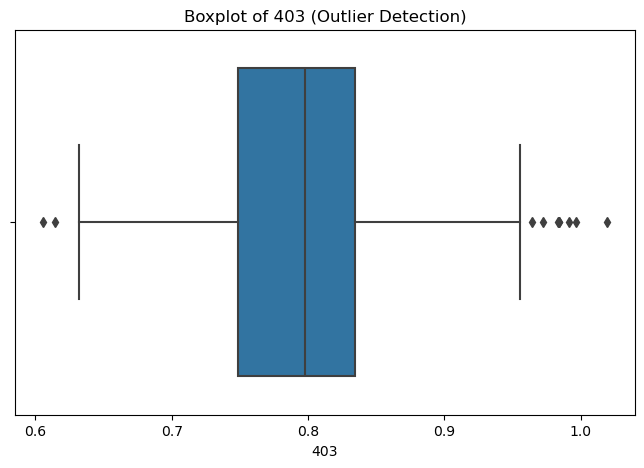

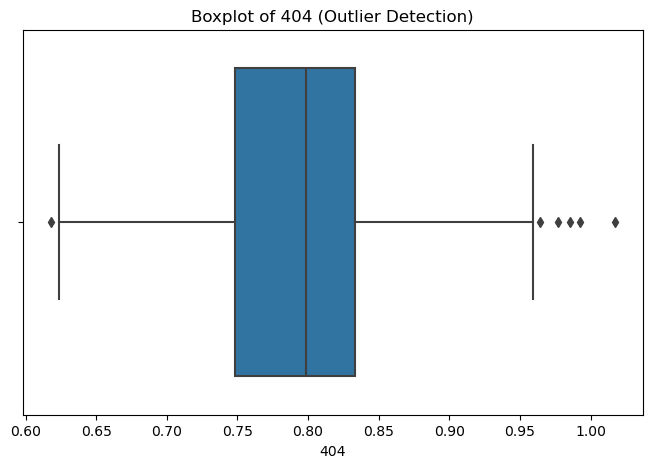

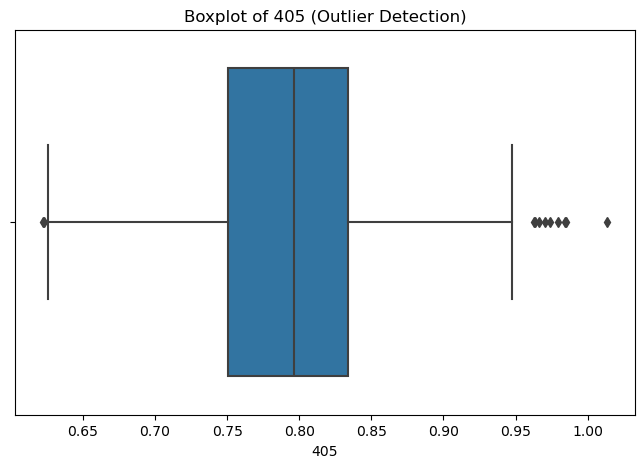

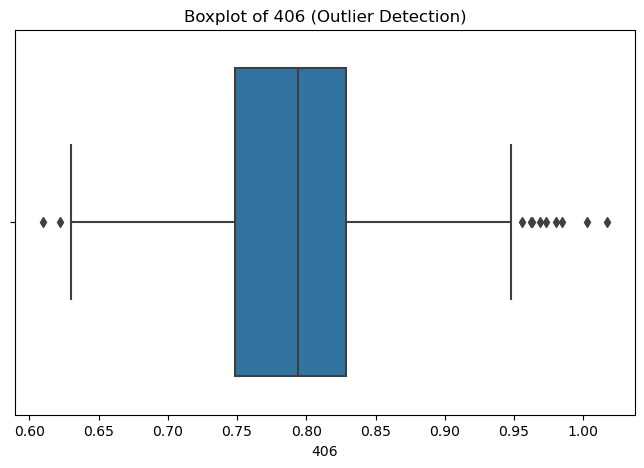

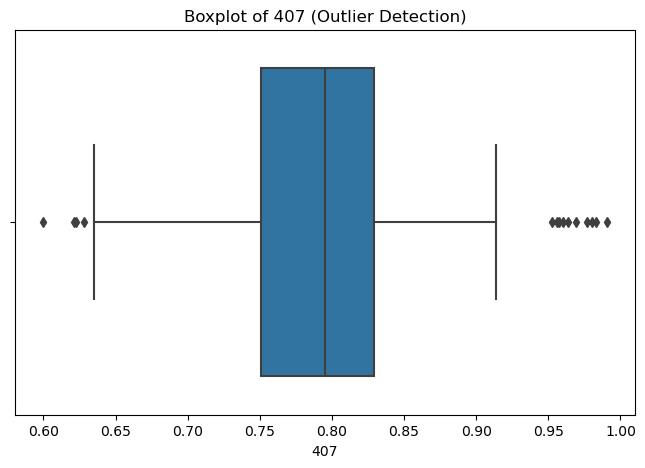

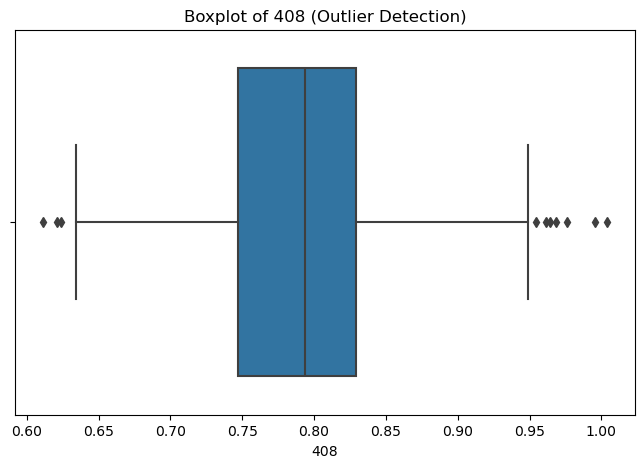

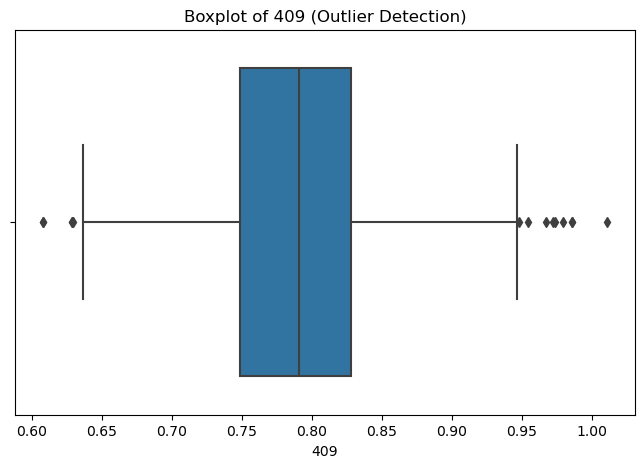

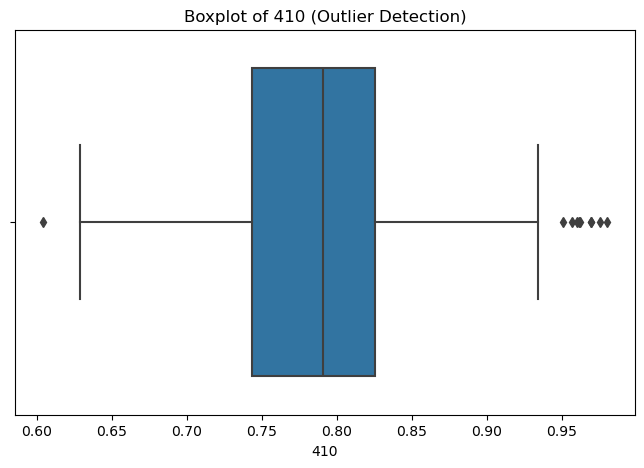

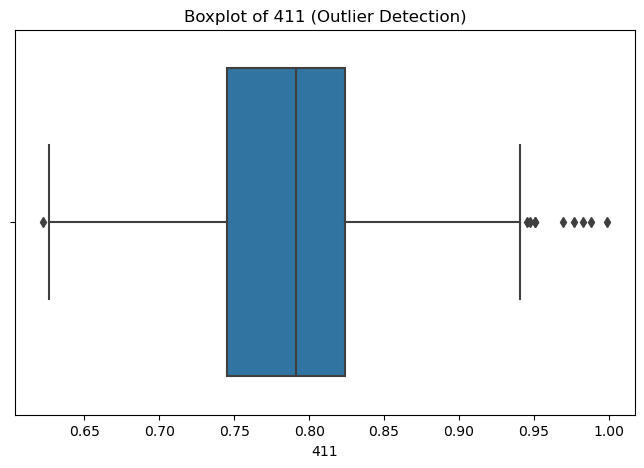

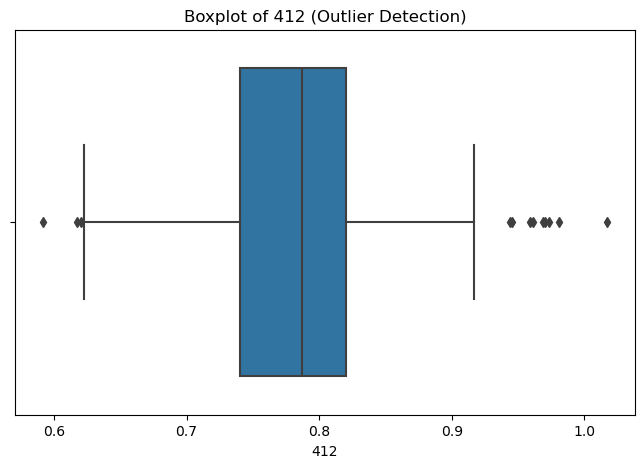

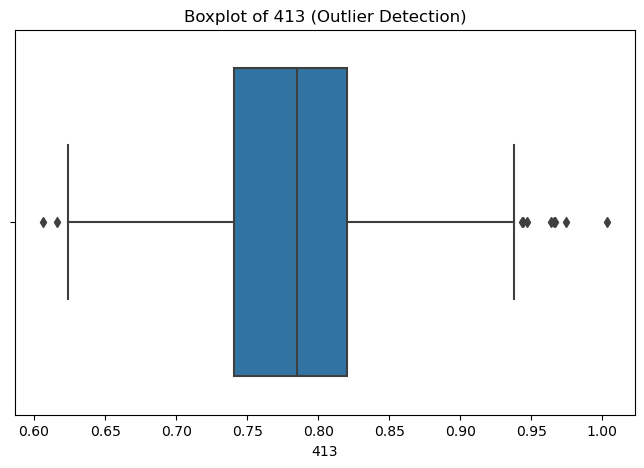

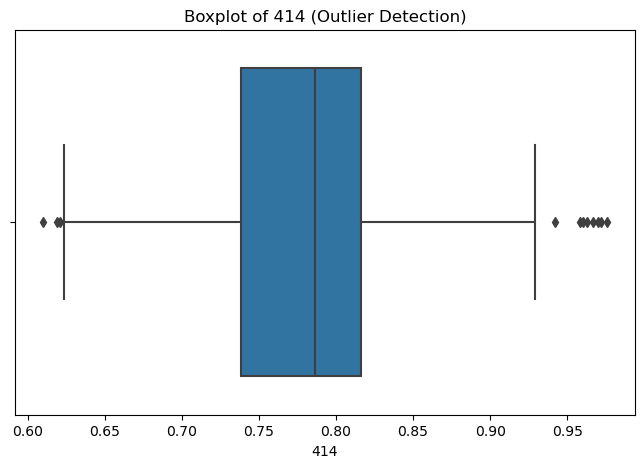

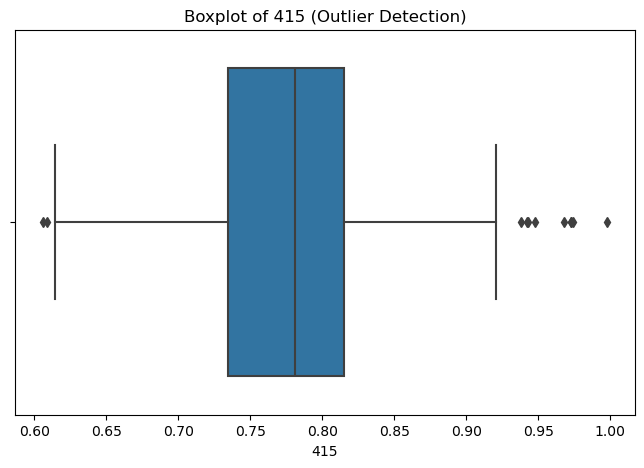

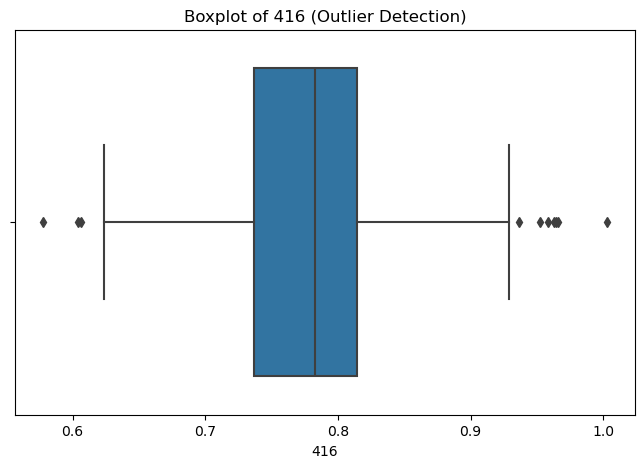

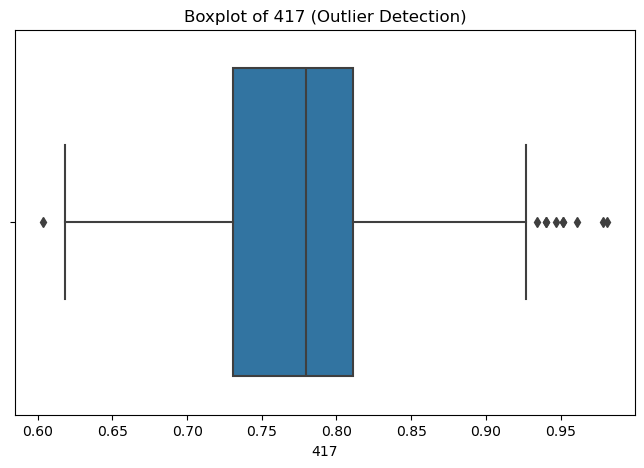

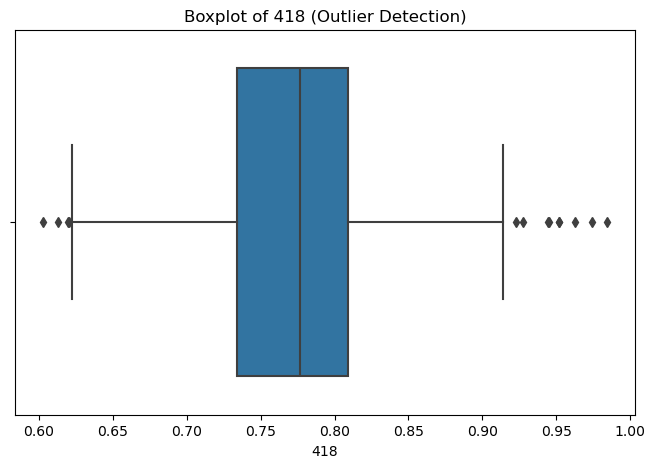

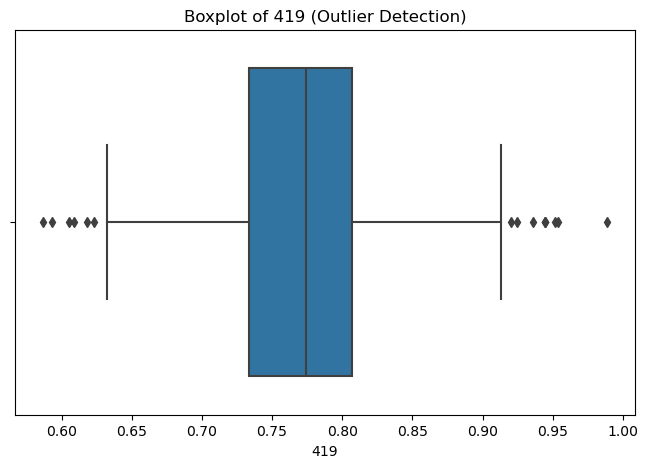

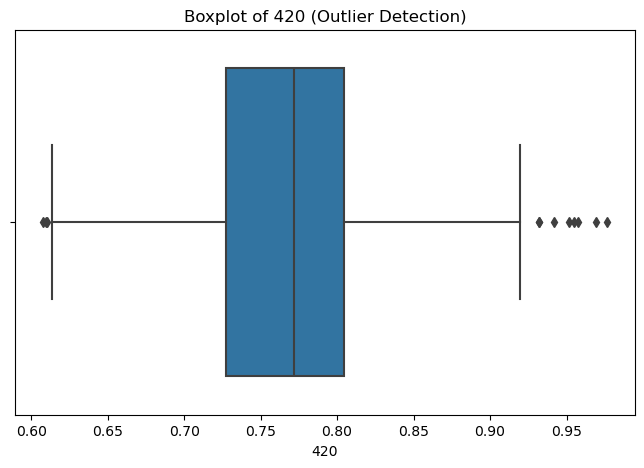

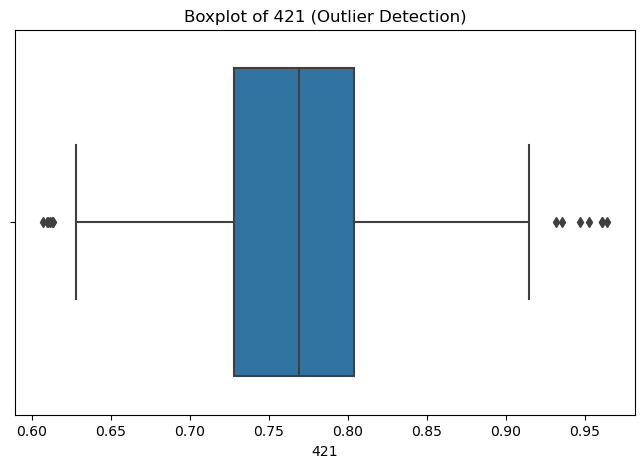

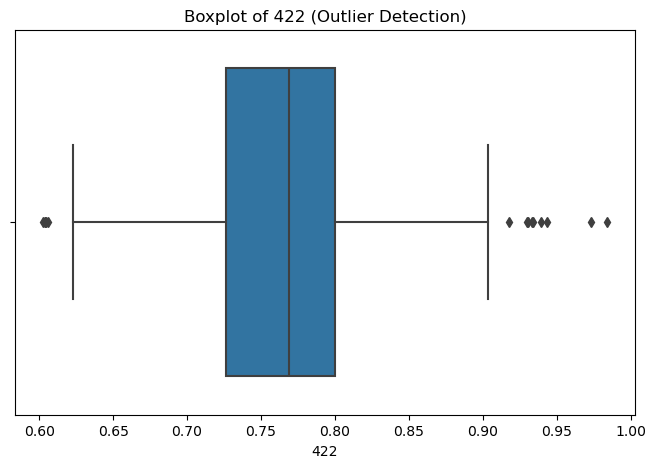

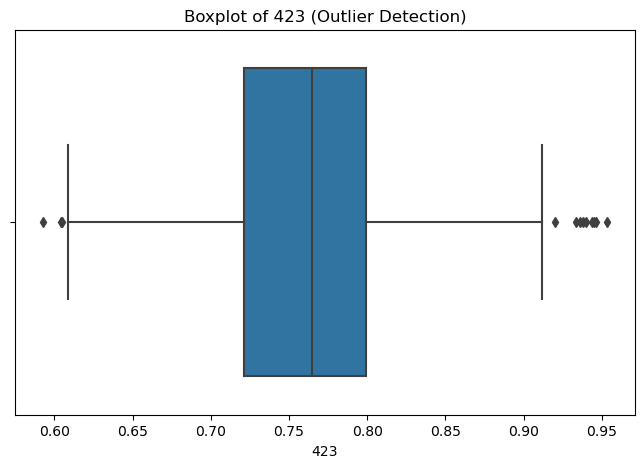

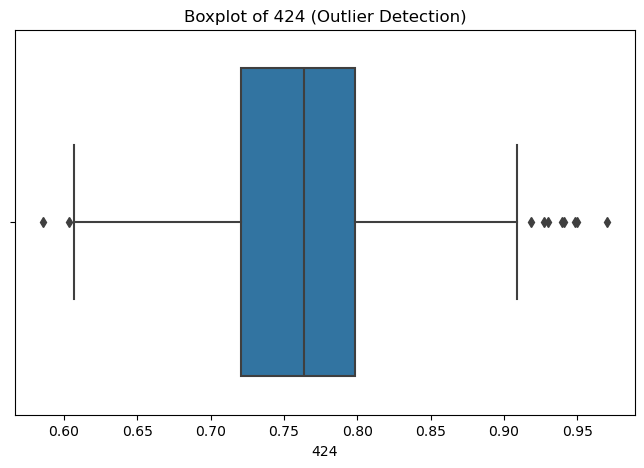

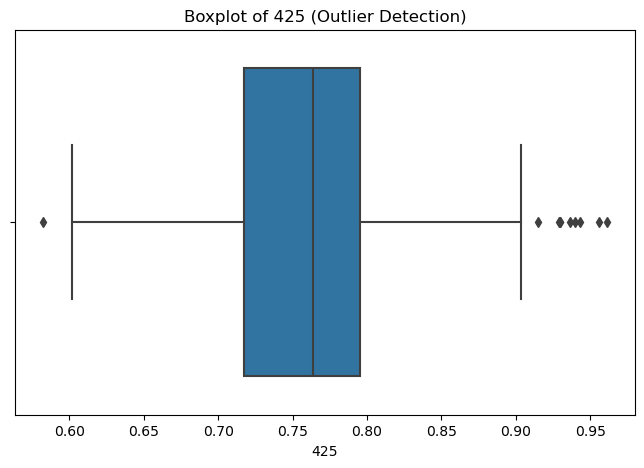

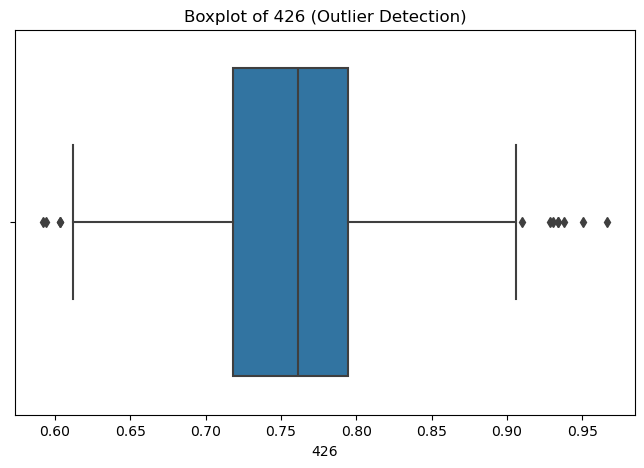

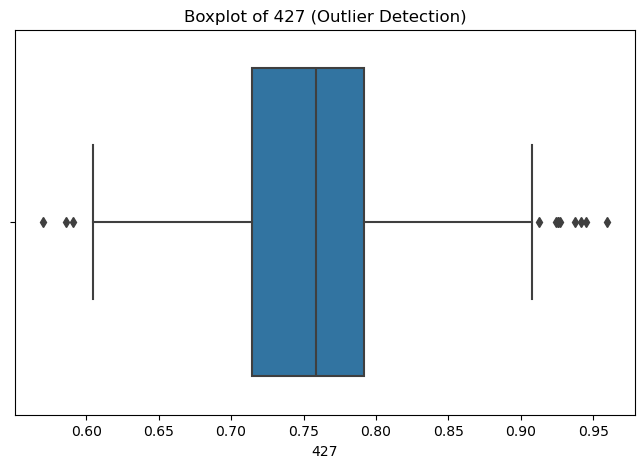

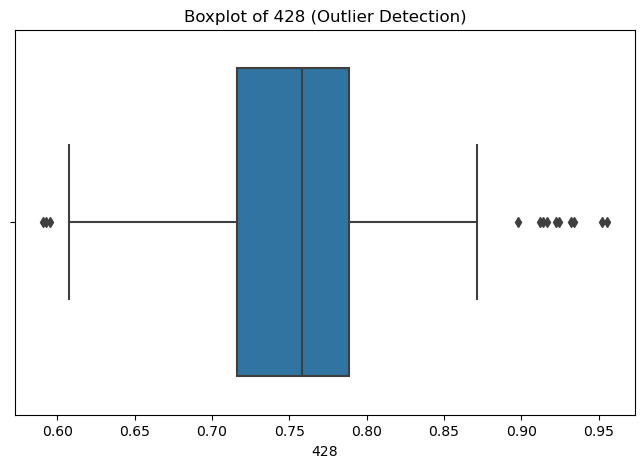

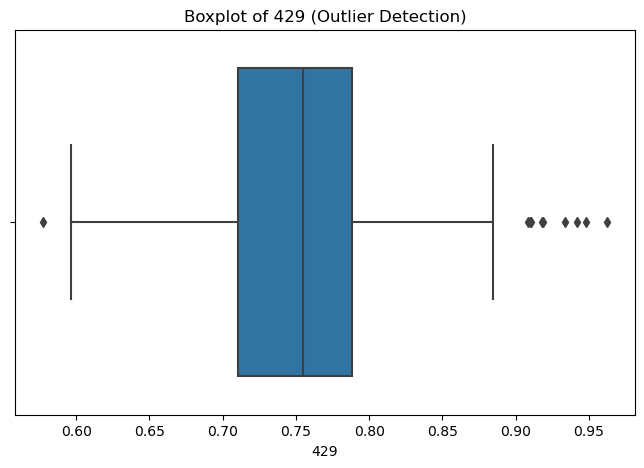

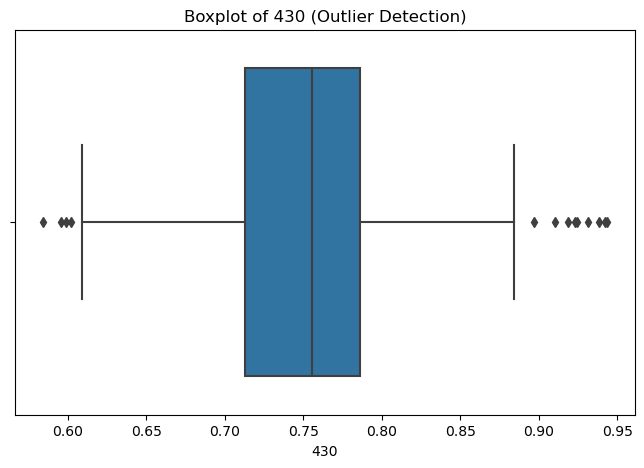

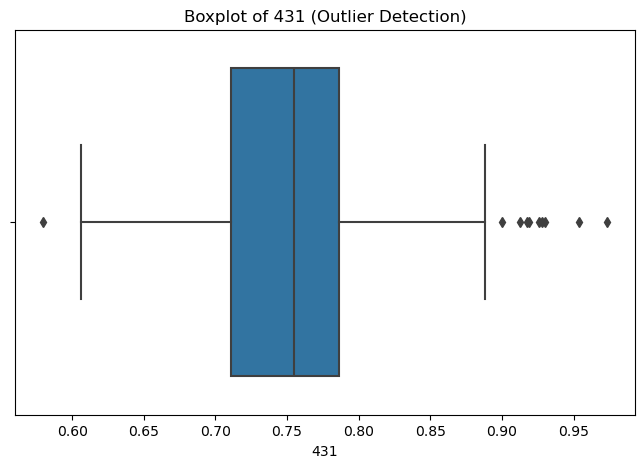

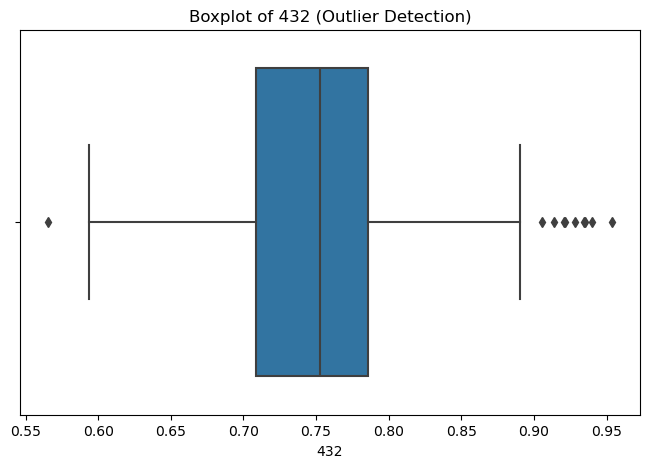

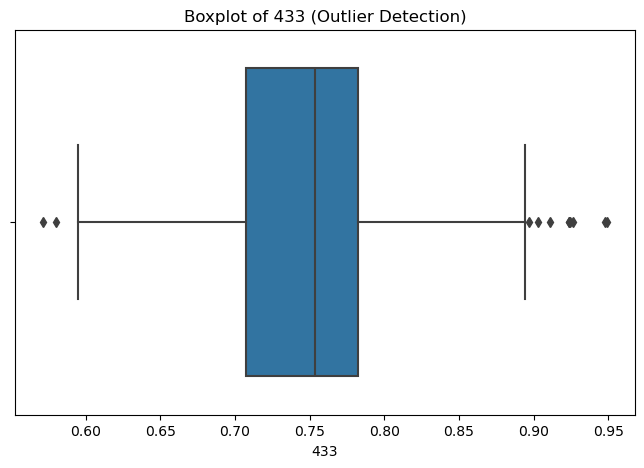

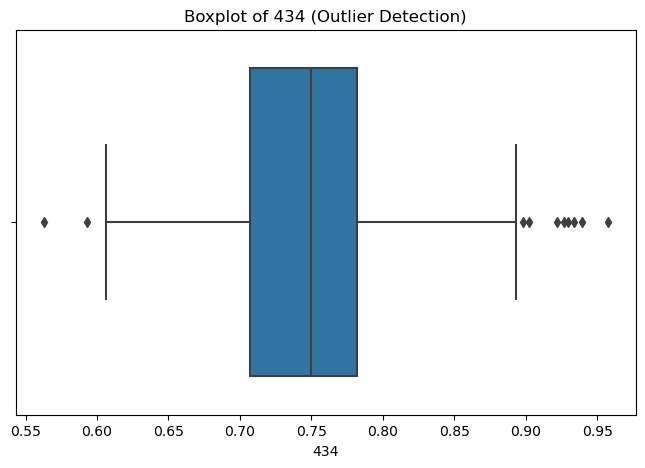

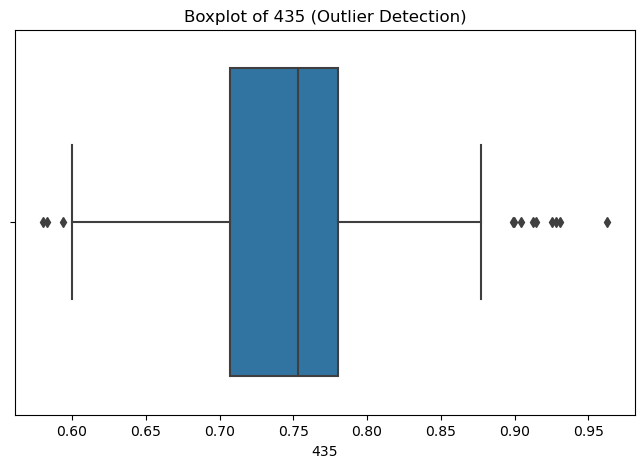

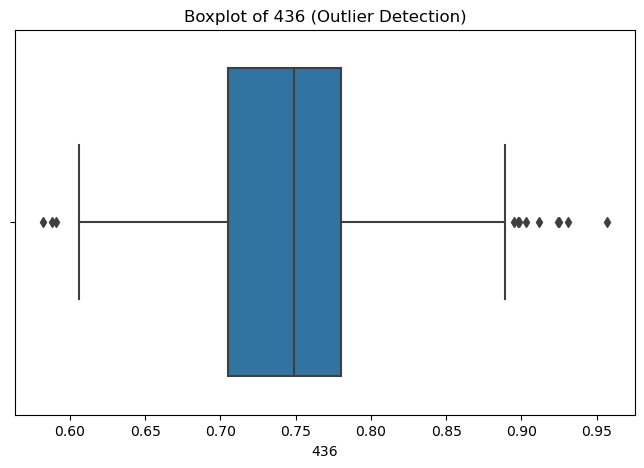

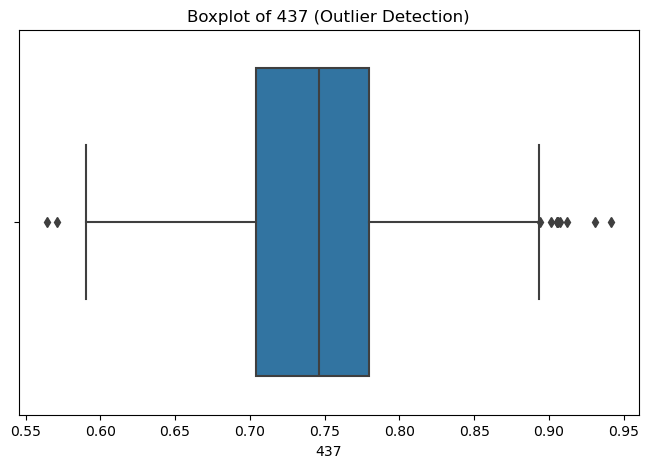

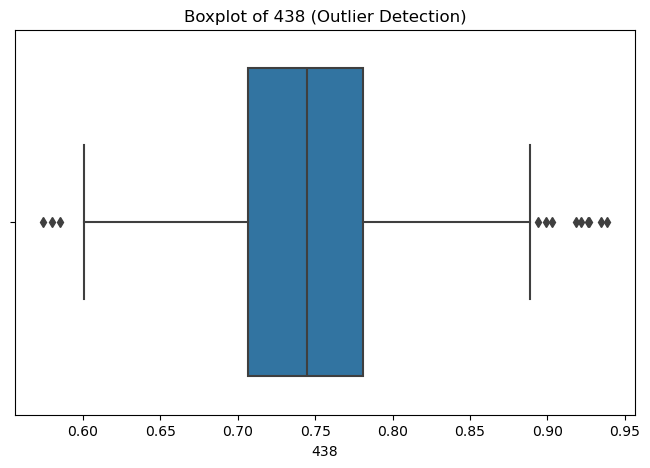

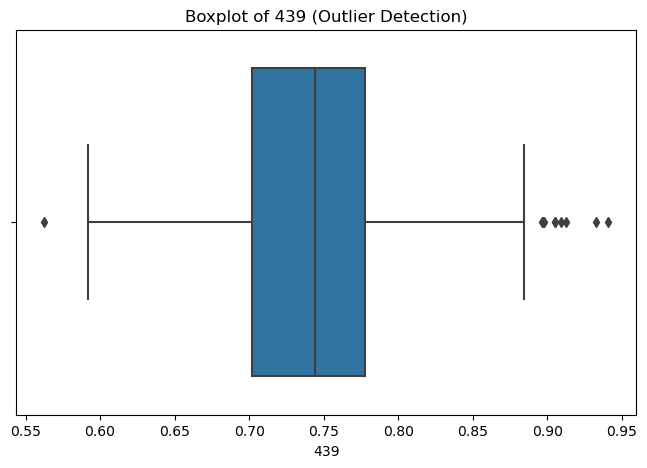

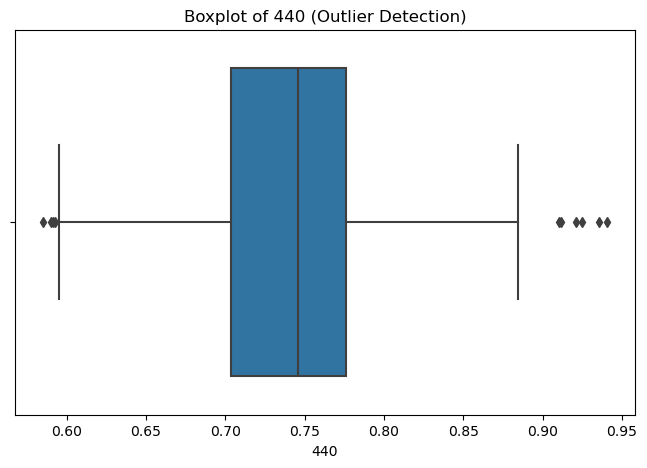

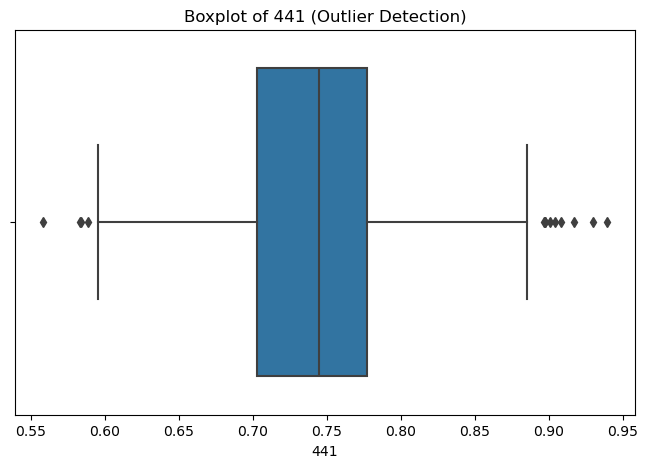

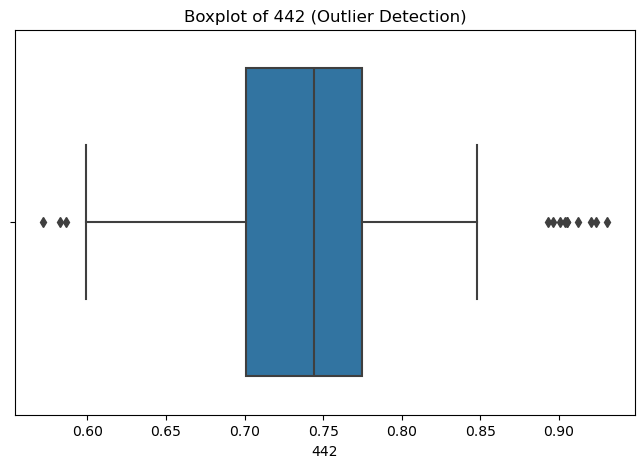

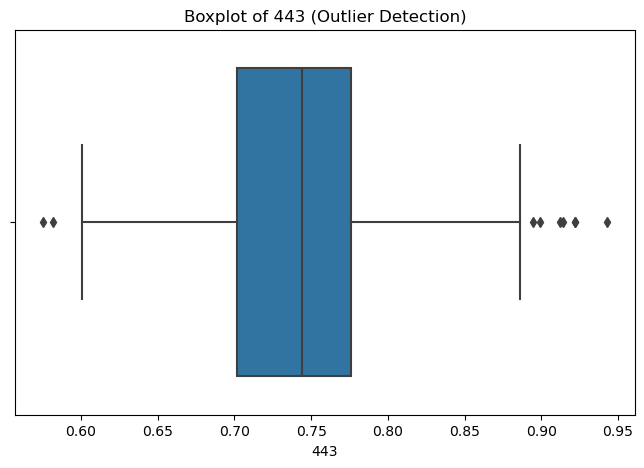

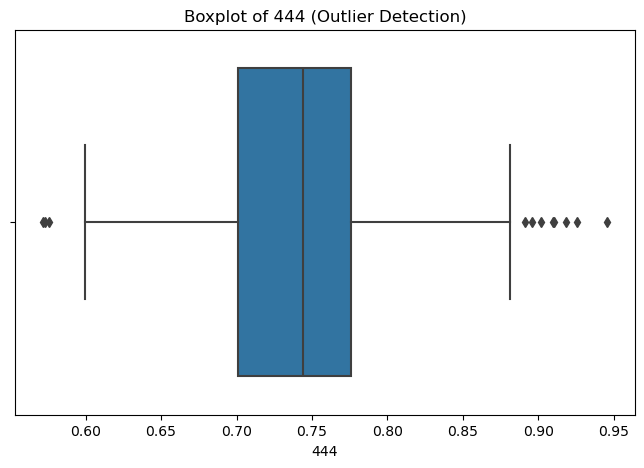

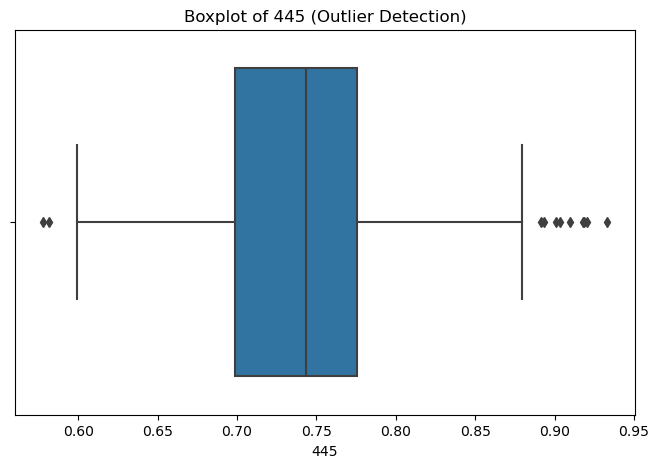

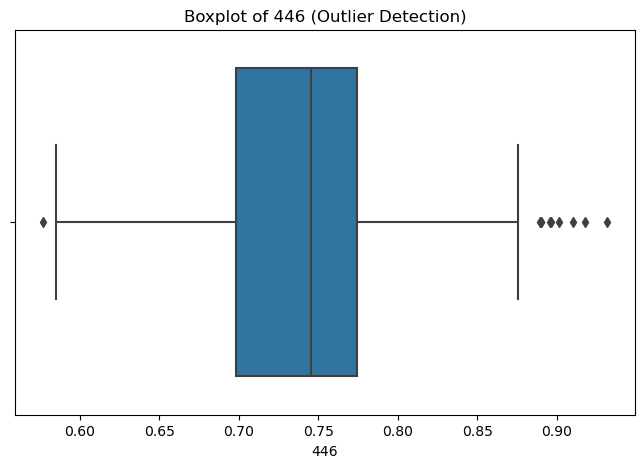

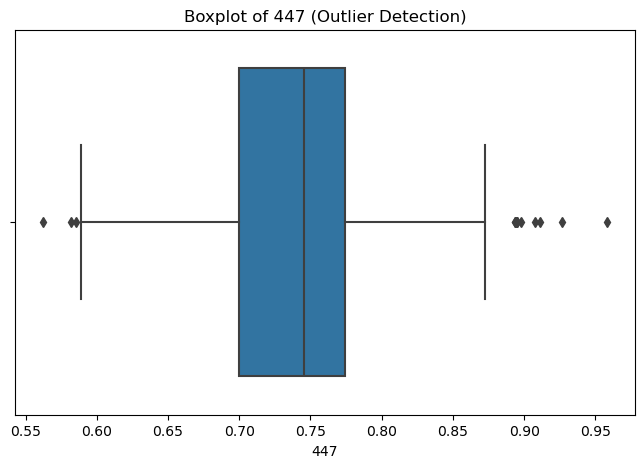

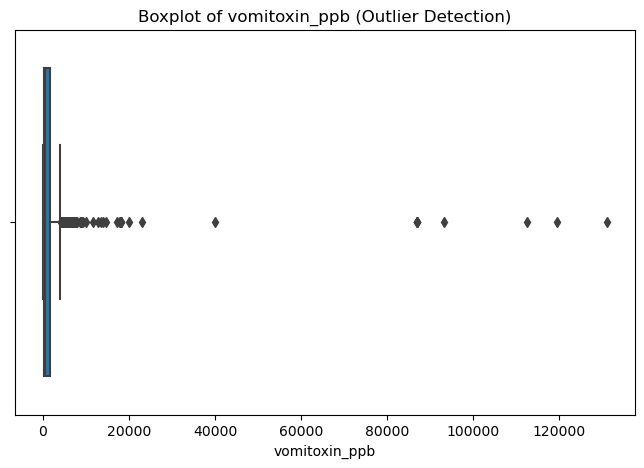

In [13]:
for cols in numeric_cols:
   plt.figure(figsize=(8, 5))
   sns.boxplot(x=df[cols])
   plt.title(f'Boxplot of {cols} (Outlier Detection)')
   plt.show()

In [14]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [15]:
lower_bound

0                   0.305771
1                   0.292542
2                   0.282857
3                   0.275151
4                   0.266406
                    ...     
444                 0.588066
445                 0.583205
446                 0.583314
447                 0.587717
vomitoxin_ppb   -2206.250000
Length: 449, dtype: float64

In [16]:
outliers = ((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).sum()

In [17]:
outliers.sort_values(ascending=False).head(10)

vomitoxin_ppb    80
100              17
144              16
97               16
135              15
143              15
419              15
147              14
161              14
409              14
dtype: int64

In [18]:
df1= numeric_cols[(numeric_cols["vomitoxin_ppb"] >= lower_bound["vomitoxin_ppb"]) & (numeric_cols["vomitoxin_ppb"] <= upper_bound["vomitoxin_ppb"])]

In [19]:
df1

0         1         2         3         4         5         6  \
0    0.416181  0.396844  0.408985  0.372865  0.385293  0.365390  0.355226   
1    0.415797  0.402956  0.402564  0.396014  0.397192  0.389634  0.375671   
2    0.389023  0.371206  0.373098  0.373872  0.361056  0.349709  0.333882   
3    0.468837  0.473255  0.462949  0.459335  0.461672  0.459824  0.458194   
4    0.483352  0.487274  0.469153  0.487648  0.464026  0.451152  0.458229   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.478140  0.444033  0.442120  0.437473  0.428672  0.413238  0.417758   
496  0.409367  0.394941  0.380236  0.375340  0.346122  0.354650  0.361170   
497  0.486526  0.501372  0.500175  0.508139  0.489411  0.457311  0.462321   
498  0.464595  0.498822  0.489077  0.453381  0.487636  0.461950  0.461671   
499  0.460840  0.457656  0.434632  0.412675  0.418638  0.408338  0.403807   

            7         8         9  ...       439       440       441  \
0    0.343350  0.344837  0.361567  ...  0.710280  0.717482  0.715078   
1    0.363689  0.373883  0.359674  ...  0.684011  0.697271  0.701995   
2    0.330841  0.328925  0.323854  ...  0.683054  0.669286  0.663179   
3    0.427737  0.415360  0.413106  ...  0.742782  0.730801  0.736787   
4    0.440782  0.426193  0.430482  ...  0.770227  0.773013  0.761431   
..        ...       ...       ...  ...       ...       ...       ...   
495  0.420388  0.413290  0.402912  ...  0.747858  0.730535  0.716969   
496  0.342974  0.352137  0.327545  ...  0.670232  0.659045  0.661587   
497  0.462927  0.442647  0.437731  ...  0.787532  0.780347  0.768362   
498  0.447362  0.451952  0.427200  ...  0.739432  0.759722  0.752118   
499  0.388811  0.382484  0.386995  ...  0.717509  0.726149  0.728631   

          442       443       444       445       446       447  vomitoxin_ppb  
0    0.705379  0.696691  0.692793  0.711369  0.697679  0.704520         1100.0  
1    0.696077  0.701012  0.677418  0.696921  0.696544  0.689054         1000.0  
2    0.676165  0.676591  0.655951  0.658945  0.670989  0.665176         1300.0  
3    0.730044  0.751437  0.738497  0.742446  0.754657  0.733474         1300.0  
4    0.763488  0.762473  0.744012  0.775486  0.760431  0.751988          220.0  
..        ...       ...       ...       ...       ...       ...            ...  
495  0.739297  0.724827  0.720484  0.740626  0.740116  0.721839         1200.0  
496  0.658422  0.644254  0.646479  0.656779  0.646700  0.646733            0.0  
497  0.771411  0.770919  0.761464  0.770314  0.763324  0.797187            0.0  
498  0.761910  0.761111  0.730431  0.753545  0.749619  0.756383            0.0  
499  0.725808  0.716943  0.718320  0.707611  0.729484  0.718706         1400.0  

[420 rows x 449 columns]

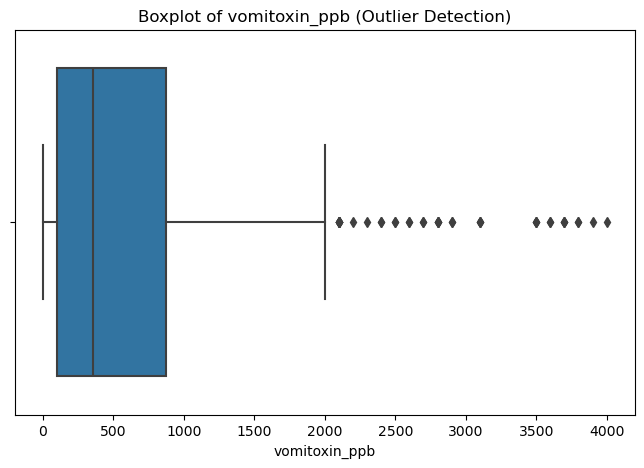

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df1["vomitoxin_ppb"])
plt.title(f'Boxplot of {"vomitoxin_ppb"} (Outlier Detection)')
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)
y = df['vomitoxin_ppb'].values

## Recognising Principal components by applying PCA

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=10) 
principal_components = pca.fit_transform(scaled_data)

In [25]:
num= pca.n_components_
num

10

In [26]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

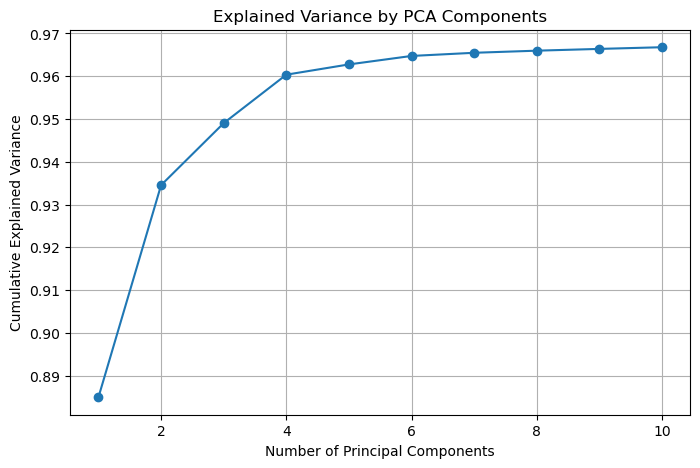

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

In [28]:
pca1 = PCA(n_components=4) 
principal_components = pca1.fit_transform(scaled_data)

In [29]:
n= pca1.n_components_
n

4

In [30]:
explained_variance1 = np.cumsum(pca1.explained_variance_ratio_)

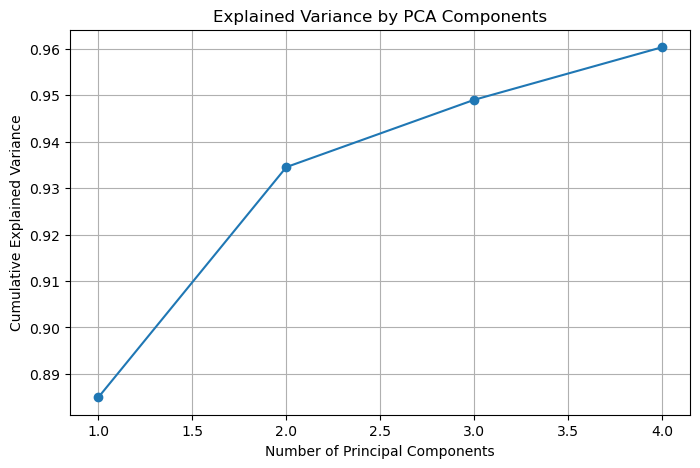

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance1) + 1), explained_variance1, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

In [32]:
feature_contributions = pd.DataFrame(pca1.components_, columns=df1.columns)

In [33]:
feature_contributions

0         1         2         3         4         5         6  \
0  0.036853  0.037806  0.037869  0.038793  0.037834  0.038547  0.039209   
1 -0.071533 -0.067738 -0.071390 -0.070194 -0.075712 -0.076150 -0.079753   
2  0.061799  0.055184  0.066355  0.055729  0.060780  0.053388  0.041932   
3 -0.214032 -0.215960 -0.206213 -0.195931 -0.204503 -0.198324 -0.185396   

          7         8         9  ...       439       440       441       442  \
0  0.039871  0.040638  0.040277  ...  0.048080  0.048187  0.048020  0.047923   
1 -0.080088 -0.081242 -0.079695  ...  0.011133  0.008856  0.009150  0.009130   
2  0.043244  0.047440  0.052042  ...  0.060744  0.053623  0.060200  0.066316   
3 -0.174073 -0.157191 -0.162963  ...  0.054642  0.048417  0.056306  0.056209   

        443       444       445       446       447  vomitoxin_ppb  
0  0.047986  0.047982  0.048123  0.047953  0.048221      -0.004337  
1  0.007247  0.011814  0.011149  0.011974  0.011292      -0.025453  
2  0.067263  0.061479  0.058228  0.065325  0.055775       0.120158  
3  0.050692  0.053945  0.051134  0.048429  0.045358       0.098558  

[4 rows x 449 columns]

In [34]:
top_10_pc1 = feature_contributions.iloc[0].abs().nlargest(10)
top_10_pc2 = feature_contributions.iloc[1].abs().nlargest(10)
top_10_pc3 = feature_contributions.iloc[2].abs().nlargest(10)
top_10_pc4 = feature_contributions.iloc[3].abs().nlargest(10)

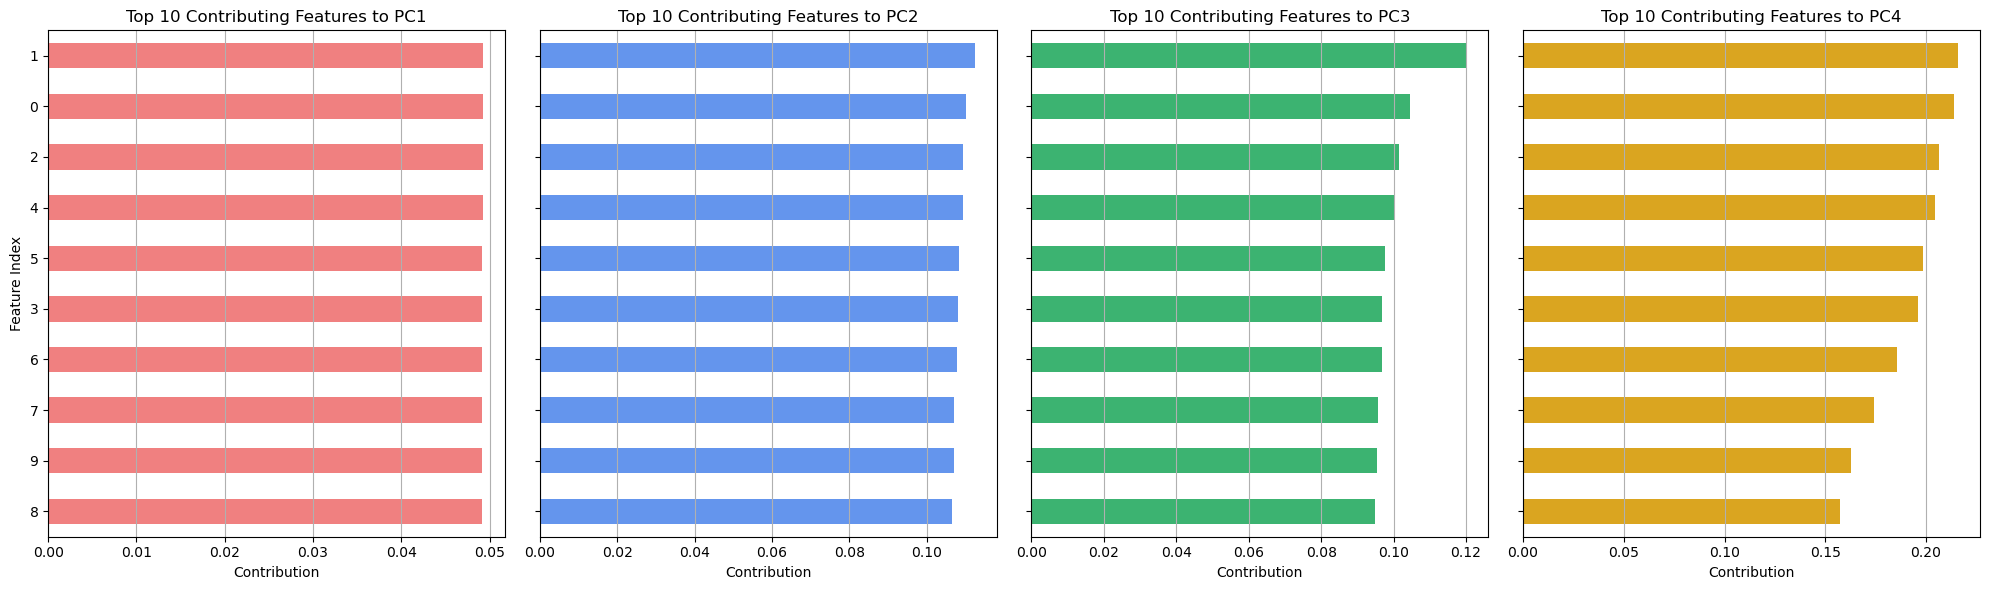

In [35]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

top_pcs = [top_10_pc1, top_10_pc2, top_10_pc3, top_10_pc4]
pc_labels = ["PC1", "PC2", "PC3", "PC4"]
colors = ["lightcoral", "cornflowerblue", "mediumseagreen", "goldenrod"]

for i in range(n):
    ax = axes[i] if isinstance(axes, (list, np.ndarray)) else axes
    
    top_pcs[i].sort_values(ascending=True).plot(kind="barh", ax=ax, color=colors[i])
    
    ax.set_title(f"Top 10 Contributing Features to {pc_labels[i]}")
    ax.set_xlabel("Contribution")
    ax.set_ylabel("Feature Index")
    ax.grid(axis="x")

plt.tight_layout()
plt.show()

In [36]:
print(top_10_pc1)
print(top_10_pc2)
print(top_10_pc3)
print(top_10_pc4)

278    0.049297
271    0.049237
295    0.049213
247    0.049195
290    0.049182
286    0.049175
305    0.049172
269    0.049166
310    0.049164
309    0.049153
Name: 0, dtype: float64
41    0.112432
46    0.110039
52    0.109438
47    0.109291
43    0.108346
49    0.108129
48    0.107779
42    0.107092
40    0.107091
38    0.106482
Name: 1, dtype: float64
vomitoxin_ppb    0.120158
104              0.104660
101              0.101513
107              0.100292
99               0.097530
108              0.096891
111              0.096889
103              0.095644
102              0.095489
110              0.094744
Name: 2, dtype: float64
1    0.215960
0    0.214032
2    0.206213
4    0.204503
5    0.198324
3    0.195931
6    0.185396
7    0.174073
9    0.162963
8    0.157191
Name: 3, dtype: float64


In [37]:
feature_columns = [col for col in df1.columns if col != 'vomitoxin_ppb']

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_columns])
y = df['vomitoxin_ppb'].values

## Feature Selection

In [39]:
pca2 = PCA(n_components=4)
X_pca = pca2.fit_transform(X_scaled)

In [40]:
loading_matrix = np.abs(pca2.components_)

In [41]:
top_features_pc1 = np.argsort(loading_matrix[0])[-150:]
top_features_pc2 = np.argsort(loading_matrix[1])[-150:]
top_features_pc3 = np.argsort(loading_matrix[2])[-150:]
top_features_pc4 = np.argsort(loading_matrix[3])[-150:]

In [42]:
selected_feature_indices = np.unique(np.concatenate([top_features_pc1, top_features_pc2, top_features_pc3, top_features_pc4]))
selected_features = [feature_columns[i] for i in selected_feature_indices]

In [43]:
selected_features

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'

In [44]:
len(selected_features)

423

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [46]:
X_selected = df[selected_features].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
regressor = RandomForestRegressor(n_estimators=900, max_depth=6, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=900, random_state=42)

In [50]:
y_pred = regressor.predict(X_test)

In [51]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
print(f"MAE: {mae}")

RMSE: 11095.237259573893
R² Score: 0.559607487910612
MAE: 3836.4763345870683


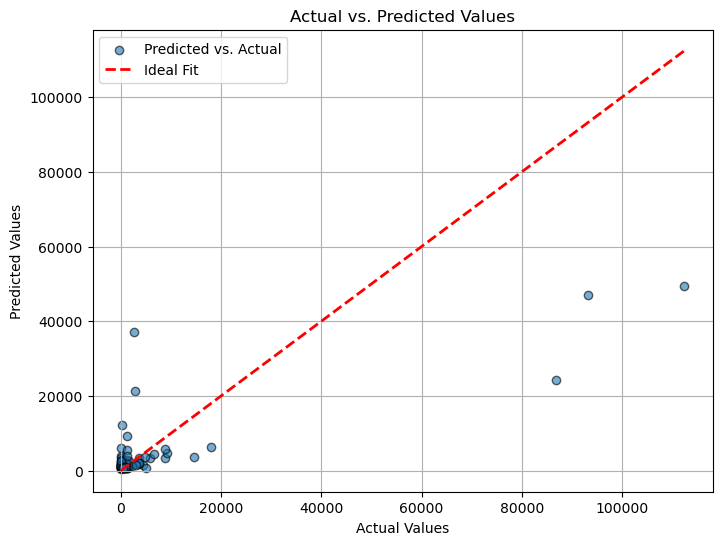

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', label="Predicted vs. Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

## Though R2 score is slightly better, it has very high RMSE and MAE values.

## Applying log transformation to the outliers.

In [52]:
df3 = pd.read_csv("TASK-ML-INTERN.csv")

In [53]:
if 'hsi_id' in df3.columns:
    df3 = df3.drop(columns=['hsi_id'])


In [54]:
df3['vomitoxin_ppb'] = np.log1p(df3['vomitoxin_ppb'])

In [55]:
df3['vomitoxin_ppb'] 

0      7.003974
1      6.908755
2      7.170888
3      7.170888
4      5.398163
         ...   
495    7.090910
496    0.000000
497    0.000000
498    0.000000
499    7.244942
Name: vomitoxin_ppb, Length: 500, dtype: float64

In [56]:
fea_cols = [col for col in df3.columns if col != 'vomitoxin_ppb']

In [57]:
X_sca = scaler.fit_transform(df3[fea_cols])
y1 = df3['vomitoxin_ppb'].values

In [58]:
p = PCA(n_components=4)
X_pca4 = p.fit_transform(X_sca)

In [59]:
load_mat = np.abs(p.components_)

In [60]:
top_pc1 = np.argsort(load_mat[0])[-150:]
top_pc2 = np.argsort(load_mat[1])[-150:]
top_pc3 = np.argsort(load_mat[2])[-150:]
top_pc4 = np.argsort(load_mat[3])[-150:]


In [61]:
selected_feature_ind = np.unique(np.concatenate([top_pc1, top_pc2, top_pc3, top_pc4]))
sel_features = [fea_cols[i] for i in selected_feature_ind]

In [62]:
sel_features

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'

In [63]:
len(sel_features)

423

In [64]:
X_sel = df[sel_features].values

In [65]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sel, y1, test_size=0.2, random_state=42)

In [66]:
X_sel

array([[0.41618118, 0.39684365, 0.40898487, ..., 0.71136944, 0.69767889,
        0.7045196 ],
       [0.41579684, 0.40295639, 0.40256357, ..., 0.69692056, 0.69654401,
        0.68905392],
       [0.38902334, 0.37120555, 0.37309768, ..., 0.65894515, 0.6709893 ,
        0.66517639],
       ...,
       [0.48652606, 0.50137243, 0.50017548, ..., 0.77031393, 0.76332389,
        0.79718723],
       [0.46459495, 0.49882201, 0.4890769 , ..., 0.75354539, 0.7496192 ,
        0.75638268],
       [0.46084036, 0.45765625, 0.43463187, ..., 0.70761068, 0.72948366,
        0.71870559]])

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
reg = RandomForestRegressor(n_estimators=900, max_depth=6, random_state=42)
reg.fit(X_train1, y_train1)

RandomForestRegressor(max_depth=6, n_estimators=900, random_state=42)

In [69]:
y_pred1 = reg.predict(X_test1)

In [70]:
rmse1 = np.sqrt(mean_squared_error(y_test1, y_pred1))
r2_1 = r2_score(y_test1, y_pred1)
mae1 = mean_absolute_error(y_test1, y_pred1)

print(f"RMSE: {rmse1}")
print(f"R² Score: {r2_1}")
print(f"MAE: {mae1}")


RMSE: 2.665965428341797
R² Score: 0.12453103373042618
MAE: 1.9759457541084504


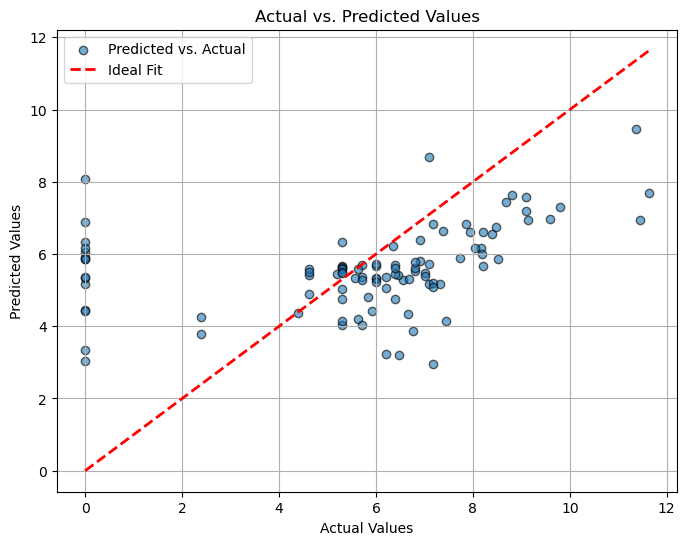

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test1, y_pred1, alpha=0.6, edgecolors='k', label="Predicted vs. Actual")
plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], color='red', linestyle='--', linewidth=2, label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

## After applying Log transformation to the outliers RMSE and MAE value got very low, but R2 score also decreased.

## I have also trained and tested XGboost model which performed nearly same as RandomForest.